In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from matplotlib.pylab import rcParams
import seaborn as sns
import json

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('zillow_data.csv')
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,329121.0,334059.0,338019.0,346657.0,354457.0,361917.0,369769.0,376112.0,381673.0,386586.0,394154.0,402687.0,412006.0,420541.0,429242.0,436291.0,442139.0,447655.0,452725.0,457455.0,461020.0,465658.0,469811.0,475268.0,478912.0,482464.0,484481.0,488259.0,493127.0,499165.0,503717.0,507932.0,511068.0,514280.0,518252.0,522487.0,527352.0,531284.0,535317.0,539349.0,549450.0,567133.0,588505.0,605851.0,613242.0,617110.0,619549.0,625388.0,631255.0,636089.0,639742.0,643306.0,647193.0,652314.0,659961.0,669842.0,683972.0,696806.0,708743.0,716797.0,728843.0,739511.0,759399.0,771571.0,785979.0,795559.0,805064.0,814587.0,817033.0,832764.0,850933.0,876511.0,901911.0,921178.0,927869.0,922251.0,924475.0,931610.0,934145.0,909286.0,874103.0,840213.0,841253.0,864029.0,878088.0,880955.0,875206.0,881249.0,884836.0,877242.0,872894.0,865069.0,888219.0,909058.0,932691.0,932638.0,933780.0,929386.0,935242.0,949011.0,950769.0,940471.0,901618.0,887671.0,894583.0,898397.0,891086.0,854973.0,823871.0,7

In [4]:
df = df.rename(columns={'RegionName': 'Zipcode'})

## Average House Prices by State

Maximum median : 682497.1739130435
Maximum mean : 190265.94346289753


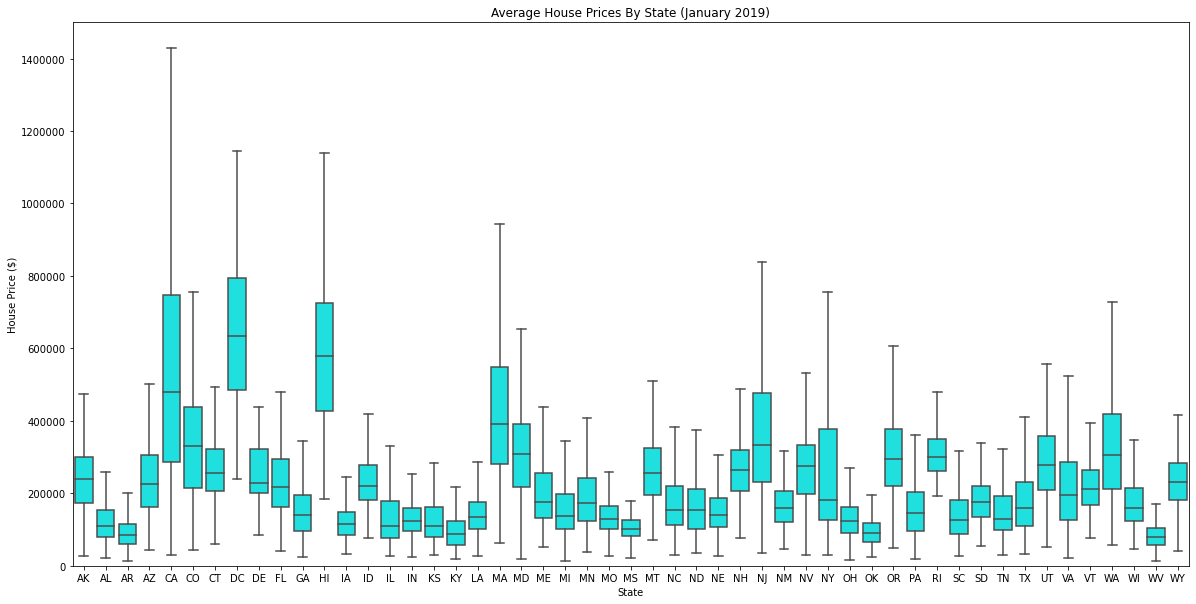

In [5]:
import seaborn as sns
plt.figure(figsize=(20,10))
# Put states in descending order based on their medians:
state_order = sorted(list(set(df['State'])))
# Create a boxplot for each state:
sns.boxplot(x='State',y='2019-01-31',
            data=df,order=state_order,
            showfliers=False, color = 'Aqua')
# Set labels and axis limits:
plt.ylim(0,);
plt.xlabel('State')
plt.ylabel('House Price ($)')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Average House Prices By State (January 2019)');
# Print maximum mean and median value
print('Maximum median',':',df.groupby('State').mean()['2019-01-31'].max())
print('Maximum mean',':',df.groupby('State').mean()['2019-01-31'].median())

# Sample Map Creation

In [6]:
x = {
"type": "FeatureCollection",
                                                                                
"features": [
{ "type": "Feature", "id": 0, "properties": { "OBJECTID": 1, "postalCode": "11372", "PO_NAME": "Jackson Heights", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 20624.692316500000743, "Shape_Area": 20163283.8744, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11372" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.869424572841751, 40.749156870967873 ], [ -73.895071432408557, 40.74646547081214 ], [ -73.896187378678192, 40.748509425180863 ], [ -73.895839541851387, 40.748546875706005 ], [ -73.895252427743955, 40.748306609450232 ], [ -73.896540410855607, 40.750541998143575 ], [ -73.895798686138278, 40.750619721332605 ], [ -73.89652230661433, 40.754388796109019 ], [ -73.87221855882477, 40.756943248067465 ], [ -73.87167992356791, 40.753987174396023 ], [ -73.87207046513889, 40.753862007052042 ], [ -73.869424572841751, 40.749156870967873 ] ] ] } }
,
{ "type": "Feature", "id": 1, "properties": { "OBJECTID": 2, "postalCode": "11004", "PO_NAME": "Glen Oaks", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 23002.816038500001014, "Shape_Area": 22606526.9139, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11004" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.710683740740066, 40.75004039450917 ], [ -73.708693923799473, 40.748758365571753 ], [ -73.70713084684175, 40.749582740537946 ], [ -73.704199679363612, 40.750169552569758 ], [ -73.702185286982299, 40.74474188775384 ], [ -73.703087218307346, 40.744547257355123 ], [ -73.700982786255466, 40.738895699230341 ], [ -73.713710332469077, 40.736174704865455 ], [ -73.715678959688944, 40.739629149156258 ], [ -73.71867075939582, 40.746314990574277 ], [ -73.719661429357032, 40.748945236431474 ], [ -73.720828890493109, 40.751173028173014 ], [ -73.721178091104562, 40.752321892245611 ], [ -73.722506222474152, 40.753358470814895 ], [ -73.722704471441219, 40.753733714383358 ], [ -73.721836102760676, 40.754865131303148 ], [ -73.721092896517689, 40.756281341811302 ], [ -73.717753415024774, 40.755347559423377 ], [ -73.717309573357355, 40.755957829956152 ], [ -73.715346010023453, 40.755508933301257 ], [ -73.715531030195962, 40.755064580723911 ], [ -73.715417815357725, 40.754998444081501 ], [ -73.715098061792872, 40.751811770759261 ], [ -73.711329111253079, 40.749474508160851 ], [ -73.710683740740066, 40.75004039450917 ] ] ] } }
,
{ "type": "Feature", "id": 2, "properties": { "OBJECTID": 3, "postalCode": "11040", "PO_NAME": "New Hyde Park", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 15749.161510500000077, "Shape_Area": 6269333.41234, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11040" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.700982786255466, 40.738895699230341 ], [ -73.703087218307346, 40.744547257355123 ], [ -73.702185286982299, 40.74474188775384 ], [ -73.704199679363612, 40.750169552569758 ], [ -73.70713084684175, 40.749582740537946 ], [ -73.708693923799473, 40.748758365571753 ], [ -73.710683740740066, 40.75004039450917 ], [ -73.707499736370167, 40.752691975668995 ], [ -73.704775475382391, 40.755270233046005 ], [ -73.700931029902648, 40.752817486343396 ], [ -73.699744459532155, 40.742392622467612 ], [ -73.699604518153293, 40.739594699565956 ], [ -73.700982786255466, 40.738895699230341 ] ] ] } }
,
{ "type": "Feature", "id": 3, "properties": { "OBJECTID": 4, "postalCode": "11426", "PO_NAME": "Bellerose", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 35932.810638700000709, "Shape_Area": 49418364.0577, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11426" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.722704471441219, 40.753733714383358 ], [ -73.722506222474152, 40.753358470814895 ], [ -73.721178091104562, 40.752321892245611 ], [ -73.720828890493109, 40.751173028173014 ], [ -73.719661429357032, 40.748945236431474 ], [ -73.71867075939582, 40.746314990574277 ], [ -73.715678959688944, 40.739629149156258 ], [ -73.714741836008002, 40.737829368041147 ], [ -73.711478037403566, 40.732501419639718 ], [ -73.710748258190307, 40.730593131219372 ], [ -73.710504999700646, 40.727368669727738 ], [ -73.709055867626162, 40.726644159498072 ], [ -73.715705910947918, 40.725801511420826 ], [ -73.717276516951927, 40.725462871862398 ], [ -73.726209504108809, 40.72309859227402 ], [ -73.726848450407331, 40.722496454087548 ], [ -73.727619981252545, 40.72225436873579 ], [ -73.727967364916779, 40.723155272416086 ], [ -73.728162325996948, 40.723084164557328 ], [ -73.728364139082032, 40.723614375213877 ], [ -73.729905111023044, 40.723272516554005 ], [ -73.731607080504062, 40.727769038393518 ], [ -73.730726813614865, 40.730267094208131 ], [ -73.732819249103002, 40.730418745535133 ], [ -73.732910963727434, 40.73095235983029 ], [ -73.731932570900156, 40.730923671584762 ], [ -73.731166453894758, 40.732681342010551 ], [ -73.735446499389724, 40.733461630085451 ], [ -73.734810443822781, 40.735163200228719 ], [ -73.734528365323428, 40.735443057983424 ], [ -73.733772984135797, 40.738899303627669 ], [ -73.735675819186497, 40.738128079721065 ], [ -73.741686814244773, 40.736823401153138 ], [ -73.739155902753595, 40.73977681751699 ], [ -73.73793557936861, 40.740621677627551 ], [ -73.733773421906307, 40.742864415252633 ], [ -73.731245403011613, 40.744881626424565 ], [ -73.730050831304894, 40.74620598219407 ], [ -73.729129296267558, 40.747605625595902 ], [ -73.728276331384009, 40.749913866184038 ], [ -73.727639498211929, 40.750921269496523 ], [ -73.726903833776575, 40.751677049410759 ], [ -73.7242148710979, 40.753331685900932 ], [ -73.723045472231064, 40.754299838885771 ], [ -73.722704471441219, 40.753733714383358 ] ] ] } }
,
{ "type": "Feature", "id": 4, "properties": { "OBJECTID": 5, "postalCode": "11365", "PO_NAME": "Fresh Meadows", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 38693.565675500001817, "Shape_Area": 69385865.5943, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11365" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.81088634744755, 40.727171875759183 ], [ -73.811156380935444, 40.728305443478803 ], [ -73.810878577371909, 40.730440761119077 ], [ -73.810392836031554, 40.738328112568141 ], [ -73.814972314300789, 40.738572473549617 ], [ -73.815096296207599, 40.739233762735516 ], [ -73.813208393949282, 40.738986680797105 ], [ -73.810355119200779, 40.738871386398905 ], [ -73.810132611904123, 40.742295082069781 ], [ -73.814308843740463, 40.742973798706203 ], [ -73.813895485662755, 40.744183961977733 ], [ -73.813673612033796, 40.745555884799515 ], [ -73.814161704329337, 40.746138601796602 ], [ -73.807505981644908, 40.750136611370039 ], [ -73.80287800596291, 40.749783423093859 ], [ -73.802810943898805, 40.749085480094038 ], [ -73.79802487205751, 40.7487118822742 ], [ -73.797979268743575, 40.748983076885274 ], [ -73.796446168340381, 40.749859242501209 ], [ -73.79481030715543, 40.748647242481312 ], [ -73.79481559808444, 40.748421814974989 ], [ -73.792307801569336, 40.748328419362899 ], [ -73.792298279259384, 40.74847044303219 ], [ -73.779806386463363, 40.751895030177913 ], [ -73.775596196990094, 40.743188904269438 ], [ -73.77440965013578, 40.740482273694361 ], [ -73.772861303363754, 40.736275932035277 ], [ -73.779523030065917, 40.73428105057787 ], [ -73.788344683615563, 40.731318790240678 ], [ -73.800413159104508, 40.728372181852741 ], [ -73.81088634744755, 40.727171875759183 ] ] ] } }
,
{ "type": "Feature", "id": 5, "properties": { "OBJECTID": 6, "postalCode": "11373", "PO_NAME": "Elmhurst", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 33755.870988, "Shape_Area": 42659399.8982, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11373" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.887220984671572, 40.72752618766134 ], [ -73.887228203465952, 40.728933223655652 ], [ -73.887519641472622, 40.730075778644341 ], [ -73.887559614525017, 40.730197073952077 ], [ -73.88805974921776, 40.730087243450647 ], [ -73.888522985804343, 40.734530960639177 ], [ -73.889384363785439, 40.73585658165053 ], [ -73.891385317909808, 40.736008503768744 ], [ -73.888691097321143, 40.736552562299146 ], [ -73.890138094172826, 40.739190395841732 ], [ -73.889741631459444, 40.739115043354573 ], [ -73.889663220115722, 40.739661742329737 ], [ -73.890177191333066, 40.740367161130344 ], [ -73.890276183596683, 40.740758286625166 ], [ -73.890399178568103, 40.740747478778673 ], [ -73.891431299772748, 40.746844660419306 ], [ -73.869424572841751, 40.749156870967873 ], [ -73.868559119821327, 40.747722340408345 ], [ -73.867471136614554, 40.743213496737205 ], [ -73.867522760495518, 40.740771141537181 ], [ -73.866480104562655, 40.73821098897686 ], [ -73.865548505613774, 40.738425756112804 ], [ -73.86492970017666, 40.736894851756531 ], [ -73.865822829440162, 40.736629809007816 ], [ -73.864511989564818, 40.734071648417832 ], [ -73.868220960382146, 40.732859752840319 ], [ -73.86786146448776, 40.732697479762386 ], [ -73.868665580791955, 40.732215332315512 ], [ -73.869927622069056, 40.730343111035467 ], [ -73.871503743233404, 40.729566646826726 ], [ -73.871411841703804, 40.729158939395937 ], [ -73.87160566578396, 40.729112059029546 ], [ -73.874214296128017, 40.730061252093172 ], [ -73.874046015721902, 40.730364071549509 ], [ -73.874509663718982, 40.730618698805209 ], [ -73.876952065969064, 40.729833343903671 ], [ -73.879505069851177, 40.72878398756378 ], [ -73.881093005893149, 40.728492585490841 ], [ -73.885206172608534, 40.72810152589841 ], [ -73.887220984671572, 40.72752618766134 ] ] ] } }
,
{ "type": "Feature", "id": 6, "properties": { "OBJECTID": 7, "postalCode": "11001", "PO_NAME": "Floral Park", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 13594.924549299999853, "Shape_Area": 9155180.26263, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11001" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.700982786255466, 40.738895699230341 ], [ -73.699604518153293, 40.739594699565956 ], [ -73.69988457795381, 40.738374179671801 ], [ -73.700855436786355, 40.735876012935393 ], [ -73.706554337543665, 40.727465005527854 ], [ -73.709055867626162, 40.726644159498072 ], [ -73.710478770139488, 40.727332920021198 ], [ -73.710748258190307, 40.730593131219372 ], [ -73.711478037403566, 40.732501419639718 ], [ -73.713710332469077, 40.736174704865455 ], [ -73.700982786255466, 40.738895699230341 ] ] ] } }
,
{ "type": "Feature", "id": 7, "properties": { "OBJECTID": 8, "postalCode": "11375", "PO_NAME": "Forest Hills", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 36277.07683939999697, "Shape_Area": 55587771.835, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11375" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.856247464047797, 40.736722785482399 ], [ -73.852047572852086, 40.737682072495076 ], [ -73.851827624329502, 40.737263080110722 ], [ -73.851339056657423, 40.737401235090374 ], [ -73.85003821245904, 40.737806185894463 ], [ -73.84557652842895, 40.739853792741961 ], [ -73.844993223247641, 40.735759248696155 ], [ -73.844142096945916, 40.733731516275043 ], [ -73.842663753459888, 40.731631438281951 ], [ -73.840476533837943, 40.729654764361477 ], [ -73.839178275043153, 40.728044112434503 ], [ -73.836830963109477, 40.723602936379223 ], [ -73.834952634777395, 40.72103987666236 ], [ -73.832651304668715, 40.718515827851419 ], [ -73.831301602593371, 40.71737570949788 ], [ -73.829825820524846, 40.716743998771342 ], [ -73.827030511899608, 40.715966173441835 ], [ -73.826059565847999, 40.715398602770478 ], [ -73.830790504465554, 40.714199182629983 ], [ -73.831107161792971, 40.714367976747937 ], [ -73.831612383023838, 40.714213500974033 ], [ -73.83611475734719, 40.711825159426965 ], [ -73.835900721584153, 40.711641390449309 ], [ -73.836794548879084, 40.710780492604158 ], [ -73.837553197702434, 40.710714920557464 ], [ -73.839777271299113, 40.709880603398567 ], [ -73.842953099278361, 40.708381070038115 ], [ -73.844845151833269, 40.708074211601428 ], [ -73.848994081006126, 40.707889487674763 ], [ -73.850209744981512, 40.707531518466652 ], [ -73.851083037051154, 40.707007357368958 ], [ -73.852817057070098, 40.707378113352007 ], [ -73.856183012107039, 40.706318733006263 ], [ -73.856673712740715, 40.707453830489989 ], [ -73.858296793901488, 40.719606106307602 ], [ -73.856652218222152, 40.719868893587744 ], [ -73.857268161086509, 40.721503924805191 ], [ -73.853954571082397, 40.726752592736887 ], [ -73.853486850262001, 40.727182116399582 ], [ -73.851777661862187, 40.727697171091506 ], [ -73.851669313636421, 40.728345819329292 ], [ -73.854010871926874, 40.732654761043669 ], [ -73.854344000639642, 40.732970138754609 ], [ -73.854700347269983, 40.732829366553617 ], [ -73.856448026975798, 40.736253569759413 ], [ -73.856247464047797, 40.736722785482399 ] ] ] } }
,
{ "type": "Feature", "id": 8, "properties": { "OBJECTID": 9, "postalCode": "11427", "PO_NAME": "Queens Village", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 31231.968592900000658, "Shape_Area": 39568339.2748, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11427" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.741686814244773, 40.736823401153138 ], [ -73.735675819186497, 40.738128079721065 ], [ -73.733772984135797, 40.738899303627669 ], [ -73.734528365323428, 40.735443057983424 ], [ -73.734810443822781, 40.735163200228719 ], [ -73.735446499389724, 40.733461630085451 ], [ -73.731166453894758, 40.732681342010551 ], [ -73.731932570900156, 40.730923671584762 ], [ -73.732916842556619, 40.730883194289319 ], [ -73.73277501137521, 40.730333271582658 ], [ -73.730726813614865, 40.730267094208131 ], [ -73.731235130084173, 40.728947389802393 ], [ -73.733064241656123, 40.729358480960009 ], [ -73.73361727223616, 40.727933587080898 ], [ -73.738401739238256, 40.729011545848643 ], [ -73.738567427054903, 40.728615041006918 ], [ -73.747390791792498, 40.723193375799433 ], [ -73.748669385378463, 40.722576445312768 ], [ -73.751867890849937, 40.720463597450589 ], [ -73.757256709106926, 40.718138626132749 ], [ -73.760486374935496, 40.722243270578488 ], [ -73.76162389387558, 40.72304674724613 ], [ -73.76465842000448, 40.724571862670587 ], [ -73.765362425508314, 40.725161741981942 ], [ -73.770106785965339, 40.731779208488518 ], [ -73.747718009718568, 40.735564324537371 ], [ -73.741686814244773, 40.736823401153138 ] ] ] } }
,
{ "type": "Feature", "id": 9, "properties": { "OBJECTID": 10, "postalCode": "11374", "PO_NAME": "Rego Park", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 26323.994392600001447, "Shape_Area": 25203458.8689, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11374" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.864511989564818, 40.734071648417832 ], [ -73.858723601642197, 40.735797469217509 ], [ -73.85881661433109, 40.735951283952808 ], [ -73.856247464047797, 40.736722785482399 ], [ -73.856448026975798, 40.736253569759413 ], [ -73.854700347269983, 40.732829366553617 ], [ -73.854344000639642, 40.732970138754609 ], [ -73.854010871926874, 40.732654761043669 ], [ -73.851672652197351, 40.728389750507198 ], [ -73.851777661862187, 40.727697171091506 ], [ -73.853486850262001, 40.727182116399582 ], [ -73.853954571082397, 40.726752592736887 ], [ -73.857268161086509, 40.721503924805191 ], [ -73.856652218222152, 40.719868893587744 ], [ -73.858296793901488, 40.719606106307602 ], [ -73.857279190419092, 40.711460502200886 ], [ -73.862078713715917, 40.712201079226716 ], [ -73.859661086304428, 40.713389391177508 ], [ -73.859684701064864, 40.714130867015832 ], [ -73.859933600450745, 40.714796898483982 ], [ -73.864122963585046, 40.718844827327786 ], [ -73.869292691740299, 40.724435949058858 ], [ -73.871018421640159, 40.727978974022953 ], [ -73.871815403656797, 40.726793843997697 ], [ -73.873242102240596, 40.727911728663898 ], [ -73.871411841703804, 40.729158939395937 ], [ -73.871503743233404, 40.729566646826726 ], [ -73.869868454242905, 40.730395902288244 ], [ -73.868665580791955, 40.732215332315512 ], [ -73.86786146448776, 40.732697479762386 ], [ -73.868220960382146, 40.732859752840319 ], [ -73.864511989564818, 40.734071648417832 ] ] ] } }
,
{ "type": "Feature", "id": 10, "properties": { "OBJECTID": 11, "postalCode": "11366", "PO_NAME": "Fresh Meadows", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 27282.736836100000801, "Shape_Area": 20358592.7502, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11366" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.770106785965339, 40.731779208488518 ], [ -73.775097398147679, 40.730873828167603 ], [ -73.781389913273557, 40.729146772546827 ], [ -73.7928751206816, 40.725440177600376 ], [ -73.809040316521759, 40.719911623632683 ], [ -73.81062582389238, 40.724419862914708 ], [ -73.810684979658561, 40.726666854377925 ], [ -73.81088634744755, 40.727171875759183 ], [ -73.800413159104508, 40.728372181852741 ], [ -73.788344683615563, 40.731318790240678 ], [ -73.779523030065917, 40.73428105057787 ], [ -73.772861303363754, 40.736275932035277 ], [ -73.771774516787843, 40.734216917409036 ], [ -73.770106785965339, 40.731779208488518 ] ] ] } }
,
{ "type": "Feature", "id": 11, "properties": { "OBJECTID": 12, "postalCode": "11423", "PO_NAME": "Hollis", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 31339.803016900001239, "Shape_Area": 45095032.1013, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11423" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.770106785965339, 40.731779208488518 ], [ -73.765362425508314, 40.725161741981942 ], [ -73.764421615302524, 40.724433193874212 ], [ -73.76139941962434, 40.722913165794679 ], [ -73.759996859945915, 40.721759399821671 ], [ -73.753809192771698, 40.713575951290913 ], [ -73.752459638649441, 40.710316587834356 ], [ -73.764558023838788, 40.707407671996265 ], [ -73.76734431593259, 40.706636367997241 ], [ -73.767250749786626, 40.706312574452753 ], [ -73.774180610901453, 40.705086888427154 ], [ -73.775820752401344, 40.705373931181384 ], [ -73.776781746536685, 40.707728693026098 ], [ -73.778108558718543, 40.707403216311491 ], [ -73.778384495717631, 40.708050135086175 ], [ -73.779372787086643, 40.707812178923575 ], [ -73.781782727945995, 40.713140016000715 ], [ -73.773571345378471, 40.715120114450933 ], [ -73.776814994587198, 40.721857291063252 ], [ -73.777669189012386, 40.722719972196408 ], [ -73.779326005444616, 40.7253977849658 ], [ -73.781160541383258, 40.7292127846884 ], [ -73.775097398147679, 40.730873828167603 ], [ -73.770106785965339, 40.731779208488518 ] ] ] } }
,
{ "type": "Feature", "id": 12, "properties": { "OBJECTID": 13, "postalCode": "11428", "PO_NAME": "Queens Village", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 22515.69358210000064, "Shape_Area": 21985773.4995, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11428" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.727747395961146, 40.722584804748067 ], [ -73.727619981252545, 40.72225436873579 ], [ -73.728436736158343, 40.722122596978302 ], [ -73.728478472826609, 40.720765574181648 ], [ -73.732161552403937, 40.720048769707375 ], [ -73.732252734573436, 40.720374787723571 ], [ -73.733311353289466, 40.719495457021779 ], [ -73.736413288783709, 40.718061834062013 ], [ -73.749345401674347, 40.715145371075089 ], [ -73.75403679922151, 40.713879824589483 ], [ -73.757256709106926, 40.718138626132749 ], [ -73.751867890849937, 40.720463597450589 ], [ -73.748669385378463, 40.722576445312768 ], [ -73.747390791792498, 40.723193375799433 ], [ -73.738567427054903, 40.728615041006918 ], [ -73.738401739238256, 40.729011545848643 ], [ -73.73361727223616, 40.727933587080898 ], [ -73.733064241656123, 40.729358480960009 ], [ -73.731235130084173, 40.728947389802393 ], [ -73.731597461666169, 40.727979165086118 ], [ -73.731576401897158, 40.727618345273555 ], [ -73.729905111023044, 40.723272516554005 ], [ -73.728364139082032, 40.723614375213877 ], [ -73.728162325996948, 40.723084164557328 ], [ -73.727967364916779, 40.723155272416086 ], [ -73.727747395961146, 40.722584804748067 ] ] ] } }
,
{ "type": "Feature", "id": 13, "properties": { "OBJECTID": 14, "postalCode": "11432", "PO_NAME": "Jamaica", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 33123.943672300003527, "Shape_Area": 60177575.638, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11432" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.809040316521759, 40.719911623632683 ], [ -73.7928751206816, 40.725440177600376 ], [ -73.781160541383258, 40.7292127846884 ], [ -73.779326005444616, 40.7253977849658 ], [ -73.777669189012386, 40.722719972196408 ], [ -73.776814994587198, 40.721857291063252 ], [ -73.773571345378471, 40.715120114450933 ], [ -73.781782727945995, 40.713140016000715 ], [ -73.779682618135851, 40.708595809771261 ], [ -73.782952403830407, 40.707971646473837 ], [ -73.786453571128803, 40.707924150520761 ], [ -73.788889680428255, 40.707421245952624 ], [ -73.79272989814082, 40.706294549963744 ], [ -73.800394748912396, 40.703273491773849 ], [ -73.804441561544024, 40.702131613951657 ], [ -73.807621870683903, 40.70873062063049 ], [ -73.808897170803093, 40.710599322122626 ], [ -73.809046061071712, 40.711200439165694 ], [ -73.810104598373144, 40.713369961238421 ], [ -73.810221183390169, 40.715706242281804 ], [ -73.810439152378436, 40.716405570035221 ], [ -73.810951963101573, 40.716708420753292 ], [ -73.810715285648044, 40.716905211618574 ], [ -73.811804200960808, 40.717675083217188 ], [ -73.812117564008119, 40.719062222305929 ], [ -73.809040316521759, 40.719911623632683 ] ] ] } }
,
{ "type": "Feature", "id": 14, "properties": { "OBJECTID": 15, "postalCode": "11379", "PO_NAME": "Middle Village", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 33527.943942500001867, "Shape_Area": 57537331.4936, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11379" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.871900784715379, 40.726857864410285 ], [ -73.871815403656797, 40.726793843997697 ], [ -73.871018421640159, 40.727978974022953 ], [ -73.869292691740299, 40.724435949058858 ], [ -73.863018490231255, 40.717707907478939 ], [ -73.860037893329135, 40.714932256937651 ], [ -73.859684701064864, 40.714130867015832 ], [ -73.859661086304428, 40.713389391177508 ], [ -73.864871869250379, 40.710820659019404 ], [ -73.869562836527663, 40.709462324773924 ], [ -73.872503678658418, 40.708227388498777 ], [ -73.874886859359705, 40.70700284313498 ], [ -73.876227753017631, 40.706869011507813 ], [ -73.876541501346864, 40.707397437581662 ], [ -73.877427394364574, 40.707198639921657 ], [ -73.877771816507249, 40.706884398733749 ], [ -73.88598390240503, 40.706282220941588 ], [ -73.900309535529217, 40.712685783380266 ], [ -73.900595872290879, 40.712697404440746 ], [ -73.90115752128105, 40.71462233690481 ], [ -73.885640753376407, 40.72202158060076 ], [ -73.887080673245293, 40.723856354846191 ], [ -73.887220984671572, 40.72752618766134 ], [ -73.885206172608534, 40.72810152589841 ], [ -73.881093005893149, 40.728492585490841 ], [ -73.879505069851177, 40.72878398756378 ], [ -73.876952065969064, 40.729833343903671 ], [ -73.874509663718982, 40.730618698805209 ], [ -73.874046015721902, 40.730364071549509 ], [ -73.874214296128017, 40.730061252093172 ], [ -73.87160566578396, 40.729112059029546 ], [ -73.873242102240596, 40.727911728663898 ], [ -73.871900784715379, 40.726857864410285 ] ] ] } }
,
{ "type": "Feature", "id": 15, "properties": { "OBJECTID": 16, "postalCode": "11429", "PO_NAME": "Queens Village", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 26527.076004899998225, "Shape_Area": 39559398.2844, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11429" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.728478472826609, 40.720765574181648 ], [ -73.727926783862515, 40.7191867494533 ], [ -73.725822278610423, 40.710285375237675 ], [ -73.724691525215917, 40.708378911192703 ], [ -73.724643404422054, 40.707562218448523 ], [ -73.724657742510772, 40.705805340202438 ], [ -73.727900288193823, 40.705826120961063 ], [ -73.727707425265876, 40.701565186784961 ], [ -73.741045766811396, 40.701980811218583 ], [ -73.741143404681765, 40.70180796881732 ], [ -73.743454865725013, 40.702506466355892 ], [ -73.743861751697978, 40.702811119152422 ], [ -73.748642850473459, 40.701586957960494 ], [ -73.75403679922151, 40.713879824589483 ], [ -73.749345401674347, 40.715145371075089 ], [ -73.736413288783709, 40.718061834062013 ], [ -73.733311353289466, 40.719495457021779 ], [ -73.732252734573436, 40.720374787723571 ], [ -73.732161552403937, 40.720048769707375 ], [ -73.728478472826609, 40.720765574181648 ] ] ] } }
,
{ "type": "Feature", "id": 16, "properties": { "OBJECTID": 17, "postalCode": "11435", "PO_NAME": "Jamaica", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 34403.790362599997025, "Shape_Area": 42105899.157, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11435" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.826059565847999, 40.715398602770478 ], [ -73.823055778941097, 40.716152910103304 ], [ -73.821117161975693, 40.716377742830474 ], [ -73.819304685998418, 40.717136096235052 ], [ -73.812117564008119, 40.719062222305929 ], [ -73.811766803773068, 40.717544718880582 ], [ -73.810715285648044, 40.716905211618574 ], [ -73.810951963101573, 40.716708420753292 ], [ -73.810439152378436, 40.716405570035221 ], [ -73.810221183390169, 40.715706242281804 ], [ -73.810187096352763, 40.713579279169437 ], [ -73.809046061071712, 40.711200439165694 ], [ -73.808897170803093, 40.710599322122626 ], [ -73.807621870683903, 40.70873062063049 ], [ -73.803896193844579, 40.700899372526202 ], [ -73.802767823887649, 40.69910549924365 ], [ -73.80229521756587, 40.69768840411615 ], [ -73.801279859958015, 40.695580883584768 ], [ -73.800810312703405, 40.694059330760254 ], [ -73.799748410944645, 40.69334783427049 ], [ -73.798446683840226, 40.692135478227115 ], [ -73.797153438720485, 40.690406084826485 ], [ -73.79595950279348, 40.689132152409428 ], [ -73.793908411764278, 40.686304708052603 ], [ -73.805848476686819, 40.682909659633836 ], [ -73.807606738337256, 40.686462543295534 ], [ -73.814840654516615, 40.699109118337702 ], [ -73.817203611673776, 40.704027647102208 ], [ -73.817550194611286, 40.704002353148191 ], [ -73.817834661321157, 40.704746671096785 ], [ -73.819427614888838, 40.707106606952436 ], [ -73.821242014523463, 40.710247287975697 ], [ -73.820851183039636, 40.710064202294873 ], [ -73.823479954671328, 40.712380361860859 ], [ -73.826059565847999, 40.715398602770478 ] ] ] } }
,
{ "type": "Feature", "id": 17, "properties": { "OBJECTID": 18, "postalCode": "11415", "PO_NAME": "Kew Gardens", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 21074.651570900001389, "Shape_Area": 16802279.5098, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11415" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.826059565847999, 40.715398602770478 ], [ -73.823479954671328, 40.712380361860859 ], [ -73.820851183039636, 40.710064202294873 ], [ -73.821242014523463, 40.710247287975697 ], [ -73.81845942904549, 40.705663069664489 ], [ -73.82007914401278, 40.705030931877879 ], [ -73.820631865977461, 40.705841992661647 ], [ -73.822020451264578, 40.7052123461417 ], [ -73.82085937975927, 40.704267850646609 ], [ -73.81972992822898, 40.703855638646921 ], [ -73.822708104492605, 40.703624835946016 ], [ -73.831521090654562, 40.701389648529812 ], [ -73.832276655647405, 40.700869939976748 ], [ -73.834981631412063, 40.70709751380889 ], [ -73.834428276623157, 40.707794617543207 ], [ -73.833928803321811, 40.707985836929502 ], [ -73.83431088361742, 40.708968337197653 ], [ -73.834812296776676, 40.709643375163765 ], [ -73.836554473081094, 40.70868242879245 ], [ -73.837147026406512, 40.707957064585884 ], [ -73.838430245394832, 40.708443377491385 ], [ -73.841602094204532, 40.70898389149643 ], [ -73.840140916979337, 40.70972989761961 ], [ -73.837553197702434, 40.710714920557464 ], [ -73.836794548879084, 40.710780492604158 ], [ -73.835900721584153, 40.711641390449309 ], [ -73.83611475734719, 40.711825159426965 ], [ -73.831612383023838, 40.714213500974033 ], [ -73.831107161792971, 40.714367976747937 ], [ -73.830790504465554, 40.714199182629983 ], [ -73.826059565847999, 40.715398602770478 ] ] ] } }
,
{ "type": "Feature", "id": 18, "properties": { "OBJECTID": 19, "postalCode": "11418", "PO_NAME": "Richmond Hill", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 31854.377541300000303, "Shape_Area": 32025130.9227, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11418" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.837147026406512, 40.707957064585884 ], [ -73.836554473081094, 40.70868242879245 ], [ -73.834812296776676, 40.709643375163765 ], [ -73.834410663852097, 40.709137385427297 ], [ -73.833928803321811, 40.707985836929502 ], [ -73.834428276623157, 40.707794617543207 ], [ -73.834981631412063, 40.70709751380889 ], [ -73.832276655647405, 40.700869939976748 ], [ -73.831521090654562, 40.701389648529812 ], [ -73.822708104492605, 40.703624835946016 ], [ -73.81972992822898, 40.703855638646921 ], [ -73.82085937975927, 40.704267850646609 ], [ -73.822020451264578, 40.7052123461417 ], [ -73.820631865977461, 40.705841992661647 ], [ -73.82007914401278, 40.705030931877879 ], [ -73.81845942904549, 40.705663069664489 ], [ -73.817834661321157, 40.704746671096785 ], [ -73.817550194611286, 40.704002353148191 ], [ -73.817203611673776, 40.704027647102208 ], [ -73.815595449003169, 40.700526133713872 ], [ -73.81375879865962, 40.697198736295249 ], [ -73.820853162252803, 40.695345768079449 ], [ -73.821092615756456, 40.695824727082432 ], [ -73.82516713946724, 40.694666867697812 ], [ -73.82784872578938, 40.694111358346902 ], [ -73.844302434971468, 40.689443010406286 ], [ -73.847407281509234, 40.695789134858593 ], [ -73.849198240729876, 40.698267487785429 ], [ -73.845024718072381, 40.699359401535688 ], [ -73.842660418922321, 40.700706577737186 ], [ -73.84156161610936, 40.701099331427791 ], [ -73.839029775145477, 40.70302118352209 ], [ -73.837177885418811, 40.704034097442822 ], [ -73.836962363652646, 40.704212471294035 ], [ -73.838136487488612, 40.70624923375432 ], [ -73.838008941981428, 40.706695412446535 ], [ -73.837147026406512, 40.707957064585884 ] ] ] } }
,
{ "type": "Feature", "id": 19, "properties": { "OBJECTID": 20, "postalCode": "11433", "PO_NAME": "Jamaica", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 30603.73541159999877, "Shape_Area": 47739432.5954, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11433" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.779682618135851, 40.708595809771261 ], [ -73.779372787086643, 40.707812178923575 ], [ -73.778384495717631, 40.708050135086175 ], [ -73.778108558718543, 40.707403216311491 ], [ -73.776781746536685, 40.707728693026098 ], [ -73.775820752401344, 40.705373931181384 ], [ -73.775074338735863, 40.705241825722908 ], [ -73.771043587628981, 40.698489976377424 ], [ -73.769294132742061, 40.696650317414232 ], [ -73.777301329360469, 40.692248586836577 ], [ -73.777281003474613, 40.692118404045004 ], [ -73.779525248942946, 40.691549732569378 ], [ -73.786668758705574, 40.688704345729683 ], [ -73.790384666911294, 40.687753629526462 ], [ -73.793908411764278, 40.686304708052603 ], [ -73.79595950279348, 40.689132152409428 ], [ -73.797153438720485, 40.690406084826485 ], [ -73.798446683840226, 40.692135478227115 ], [ -73.799748410944645, 40.69334783427049 ], [ -73.800810312703405, 40.694059330760254 ], [ -73.801279859958015, 40.695580883584768 ], [ -73.80229521756587, 40.69768840411615 ], [ -73.802767823887649, 40.69910549924365 ], [ -73.803896193844579, 40.700899372526202 ], [ -73.804441561544024, 40.702131613951657 ], [ -73.800394748912396, 40.703273491773849 ], [ -73.79272989814082, 40.706294549963744 ], [ -73.788889680428255, 40.707421245952624 ], [ -73.786453571128803, 40.707924150520761 ], [ -73.782952403830407, 40.707971646473837 ], [ -73.779682618135851, 40.708595809771261 ] ] ] } }
,
{ "type": "Feature", "id": 20, "properties": { "OBJECTID": 21, "postalCode": "11451", "PO_NAME": "Jamaica", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 2961.554196569999931, "Shape_Area": 487599.72679899999639, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11451" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.801574250201639, 40.701214107518702 ], [ -73.798874104914745, 40.702120162327901 ], [ -73.797554966322693, 40.700196228626616 ], [ -73.798744427461472, 40.699683634585348 ], [ -73.801574250201639, 40.701214107518702 ] ] ] } }
,
{ "type": "Feature", "id": 21, "properties": { "OBJECTID": 22, "postalCode": "11221", "PO_NAME": "Brooklyn", "STATE": "NY", "borough": "Brooklyn", "ST_FIPS": "36", "CTY_FIPS": "047", "BLDGpostalCode": 0, "Shape_Leng": 30947.536927500001184, "Shape_Area": 38580480.4348, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11221" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.938223251916142, 40.683893319617582 ], [ -73.943891138247196, 40.683239502279839 ], [ -73.945641657076692, 40.692033469465123 ], [ -73.934133767379521, 40.693354363738536 ], [ -73.934796988275409, 40.696736616714858 ], [ -73.935222641331805, 40.696986563840333 ], [ -73.932267653717986, 40.69731469442813 ], [ -73.933246684177448, 40.697855612723679 ], [ -73.930769118626827, 40.698911046453716 ], [ -73.930520288813895, 40.698772303134724 ], [ -73.92758773780713, 40.701762599986949 ], [ -73.923081681497152, 40.699200696300665 ], [ -73.921631157014872, 40.700675580244926 ], [ -73.920879568016773, 40.700247366780346 ], [ -73.92232800953694, 40.698772119805298 ], [ -73.918487213787245, 40.696586022928443 ], [ -73.917819119628632, 40.696207728624522 ], [ -73.916367180523039, 40.697680904182626 ], [ -73.908852828717585, 40.693404451309675 ], [ -73.916045987442644, 40.686072088712351 ], [ -73.918046067536949, 40.687213268775999 ], [ -73.9178493642506, 40.686233187393562 ], [ -73.938223251916142, 40.683893319617582 ] ] ] } }
,
{ "type": "Feature", "id": 22, "properties": { "OBJECTID": 23, "postalCode": "11421", "PO_NAME": "Woodhaven", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 22224.355867900001613, "Shape_Area": 24314441.7637, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11421" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.849198240729876, 40.698267487785429 ], [ -73.847407281509234, 40.695789134858593 ], [ -73.844302434971468, 40.689443010406286 ], [ -73.86629521074903, 40.683188843153729 ], [ -73.866598476144063, 40.685269574606316 ], [ -73.867472425883818, 40.688446739105061 ], [ -73.868583928161712, 40.693861630861832 ], [ -73.869112824846283, 40.694515761636239 ], [ -73.857444462502144, 40.696913009316908 ], [ -73.852772380972297, 40.697557136314416 ], [ -73.852712940126608, 40.698197900862048 ], [ -73.853039331316339, 40.698947337313456 ], [ -73.854566304990968, 40.700594068157393 ], [ -73.854207003535308, 40.700755742904029 ], [ -73.852322129058223, 40.700457823892386 ], [ -73.851301226213096, 40.700622067055996 ], [ -73.849536414004191, 40.698251559041474 ], [ -73.849198240729876, 40.698267487785429 ] ] ] } }
,
{ "type": "Feature", "id": 23, "properties": { "OBJECTID": 24, "postalCode": "11419", "PO_NAME": "South Richmond Hill", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 23068.83558020000055, "Shape_Area": 31278858.1025, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11419" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.83754416389462, 40.691364161117839 ], [ -73.828121376927086, 40.694041592372827 ], [ -73.82516713946724, 40.694666867697812 ], [ -73.821092615756456, 40.695824727082432 ], [ -73.820853162252803, 40.695345768079449 ], [ -73.81375879865962, 40.697198736295249 ], [ -73.807954301967328, 40.687073075606811 ], [ -73.810472257815988, 40.686200637800653 ], [ -73.81377910266194, 40.684633728077308 ], [ -73.831745757193957, 40.679537312547069 ], [ -73.833789940640003, 40.683693236360114 ], [ -73.833524131237667, 40.683806166680753 ], [ -73.835080702305703, 40.686995575943328 ], [ -73.835246465841919, 40.687324631088273 ], [ -73.835518693614389, 40.68724711425137 ], [ -73.83754416389462, 40.691364161117839 ] ] ] } }
,
{ "type": "Feature", "id": 24, "properties": { "OBJECTID": 25, "postalCode": "11434", "PO_NAME": "Jamaica", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 43829.857170600000245, "Shape_Area": 87379704.1564, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11434" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.769892911455472, 40.696312071285504 ], [ -73.766050928827894, 40.692159346163471 ], [ -73.766314647356523, 40.692197120111011 ], [ -73.764727409534231, 40.689250345713738 ], [ -73.764353586295982, 40.689507057435407 ], [ -73.764138489034124, 40.689081038952473 ], [ -73.763258108437199, 40.687300758381056 ], [ -73.76294870468476, 40.686008483928106 ], [ -73.76066613020862, 40.682612327533377 ], [ -73.758009518186782, 40.679239297985809 ], [ -73.756339596492836, 40.6768029891564 ], [ -73.762485988581091, 40.674194997770357 ], [ -73.763676761134235, 40.674745543055536 ], [ -73.764047179642205, 40.672846627569669 ], [ -73.762250967504684, 40.671943164085413 ], [ -73.762933507281488, 40.671813183285877 ], [ -73.762598005386323, 40.670722489344513 ], [ -73.763644429003648, 40.66716312260688 ], [ -73.766754012625768, 40.66743301704917 ], [ -73.767129531658341, 40.666695851175923 ], [ -73.763531708551881, 40.666287348698489 ], [ -73.766158794184491, 40.660085184028667 ], [ -73.766527495362823, 40.660135660572458 ], [ -73.766961301347692, 40.658478501494088 ], [ -73.766122822667924, 40.658554441612807 ], [ -73.76582365411717, 40.656303821641522 ], [ -73.767352731468577, 40.65616014702816 ], [ -73.774236985750406, 40.659898882253266 ], [ -73.779820166379707, 40.662202348405415 ], [ -73.785334589265332, 40.663855738275196 ], [ -73.787692983976029, 40.665163370018028 ], [ -73.788628525703714, 40.66526549252945 ], [ -73.790140052844052, 40.665160784835301 ], [ -73.789738814946972, 40.665511530843169 ], [ -73.78953657312465, 40.665976418390443 ], [ -73.788063288130317, 40.673236181364075 ], [ -73.789449390251477, 40.674556015244896 ], [ -73.790662562026327, 40.676670383535011 ], [ -73.791868221049185, 40.679746826280315 ], [ -73.79267323529173, 40.682516872416805 ], [ -73.792569387972733, 40.684030294110983 ], [ -73.792749526036317, 40.684742277878868 ], [ -73.793908411764278, 40.686304708052603 ], [ -73.790384666911294, 40.687753629526462 ], [ -73.786668758705574, 40.688704345729683 ], [ -73.779525248942946, 40.691549732569378 ], [ -73.777281003474613, 40.692118404045004 ], [ -73.777301329360469, 40.692248586836577 ], [ -73.769892911455472, 40.696312071285504 ] ] ] } }
,
{ "type": "Feature", "id": 25, "properties": { "OBJECTID": 26, "postalCode": "11216", "PO_NAME": "Brooklyn", "STATE": "NY", "borough": "Brooklyn", "ST_FIPS": "36", "CTY_FIPS": "047", "BLDGpostalCode": 0, "Shape_Leng": 26472.771070099999633, "Shape_Area": 26478229.2634, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11216" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.945641657076692, 40.692033469465123 ], [ -73.943891138247196, 40.683239502279839 ], [ -73.938223251916142, 40.683893319617582 ], [ -73.937397631085346, 40.679729922441062 ], [ -73.941208640013272, 40.679938369462853 ], [ -73.941609319287252, 40.67564320442343 ], [ -73.947146023222885, 40.675944381095775 ], [ -73.947731236479584, 40.669704707883596 ], [ -73.9550528799369, 40.670103650008677 ], [ -73.957973160224867, 40.670657292166297 ], [ -73.955163066963323, 40.678520747125987 ], [ -73.957131860427367, 40.688463152023246 ], [ -73.95131871695537, 40.689132317504821 ], [ -73.951757467909275, 40.69132933067435 ], [ -73.945641657076692, 40.692033469465123 ] ] ] } }
,
{ "type": "Feature", "id": 26, "properties": { "OBJECTID": 27, "postalCode": "11416", "PO_NAME": "Ozone Park", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 21630.675484200000938, "Shape_Area": 18854849.8011, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11416" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.844302434971468, 40.689443010406286 ], [ -73.83754416389462, 40.691364161117839 ], [ -73.835518693614389, 40.68724711425137 ], [ -73.835246465841919, 40.687324631088273 ], [ -73.834265447176207, 40.685327358195757 ], [ -73.84680064291166, 40.681835021503801 ], [ -73.853923890508895, 40.67968616983886 ], [ -73.863302752024708, 40.6791673971059 ], [ -73.864100960282968, 40.682372866103137 ], [ -73.866026665772424, 40.681918071472445 ], [ -73.86629521074903, 40.683188843153729 ], [ -73.844302434971468, 40.689443010406286 ] ] ] } }
,
{ "type": "Feature", "id": 27, "properties": { "OBJECTID": 28, "postalCode": "11233", "PO_NAME": "Brooklyn", "STATE": "NY", "borough": "Brooklyn", "ST_FIPS": "36", "CTY_FIPS": "047", "BLDGpostalCode": 0, "Shape_Leng": 30234.156913499999064, "Shape_Area": 37871693.6822, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11233" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.938223251916142, 40.683893319617582 ], [ -73.9178493642506, 40.686233187393562 ], [ -73.918046067536949, 40.687213268775999 ], [ -73.903466887253799, 40.678896538170257 ], [ -73.90329155804092, 40.677867924387058 ], [ -73.903462563338664, 40.676015806333304 ], [ -73.902407834227176, 40.675875410491351 ], [ -73.904388719648551, 40.675171370389066 ], [ -73.925653595542002, 40.66582990624871 ], [ -73.925805011110768, 40.666456157208003 ], [ -73.924995905196738, 40.674735895942391 ], [ -73.927761434663907, 40.674887420353478 ], [ -73.927687910180211, 40.675662884318925 ], [ -73.930457084726726, 40.675818766809869 ], [ -73.93020074773672, 40.678040222525787 ], [ -73.929057270713827, 40.679276454065132 ], [ -73.937397631085346, 40.679729922441062 ], [ -73.938223251916142, 40.683893319617582 ] ] ] } }
,
{ "type": "Feature", "id": 28, "properties": { "OBJECTID": 29, "postalCode": "11436", "PO_NAME": "Jamaica", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 20579.416852599999402, "Shape_Area": 22699295.4596, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11436" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.805848476686819, 40.682909659633836 ], [ -73.793908411764278, 40.686304708052603 ], [ -73.792749526036317, 40.684742277878868 ], [ -73.792569387972733, 40.684030294110983 ], [ -73.79267323529173, 40.682516872416805 ], [ -73.791868221049185, 40.679746826280315 ], [ -73.790662562026327, 40.676670383535011 ], [ -73.789449390251477, 40.674556015244896 ], [ -73.788063288130317, 40.673236181364075 ], [ -73.789409982746733, 40.66684117788391 ], [ -73.793062035982175, 40.667087224318053 ], [ -73.797371692850575, 40.666941454875229 ], [ -73.799041013629989, 40.66653031762192 ], [ -73.801662956014724, 40.66675904203224 ], [ -73.801395361510231, 40.667989384087463 ], [ -73.801218226275026, 40.670224727159301 ], [ -73.801265248558948, 40.672303142706902 ], [ -73.801469590967642, 40.673464532628422 ], [ -73.80183075187054, 40.674541211315216 ], [ -73.805848476686819, 40.682909659633836 ] ] ] } }
,
{ "type": "Feature", "id": 29, "properties": { "OBJECTID": 30, "postalCode": "11213", "PO_NAME": "Brooklyn", "STATE": "NY", "borough": "Brooklyn", "ST_FIPS": "36", "CTY_FIPS": "047", "BLDGpostalCode": 0, "Shape_Leng": 23899.442290300001332, "Shape_Area": 29631004.4378, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11213" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.937397631085346, 40.679729922441062 ], [ -73.929057270713827, 40.679276454065132 ], [ -73.93020074773672, 40.678040222525787 ], [ -73.930457084726726, 40.675818766809869 ], [ -73.927687910180211, 40.675662884318925 ], [ -73.927761434663907, 40.674887420353478 ], [ -73.924995905196738, 40.674735895942391 ], [ -73.925805011110768, 40.666456157208003 ], [ -73.925653595542002, 40.66582990624871 ], [ -73.930652068712135, 40.66363834202987 ], [ -73.937263771748846, 40.663191830160088 ], [ -73.937158467069622, 40.663752617869321 ], [ -73.942696284507264, 40.66405515298856 ], [ -73.942528428133684, 40.665837939962032 ], [ -73.948067075565589, 40.666138917330244 ], [ -73.947146023222885, 40.675944381095775 ], [ -73.941609319287252, 40.67564320442343 ], [ -73.941208640013272, 40.679938369462853 ], [ -73.937397631085346, 40.679729922441062 ] ] ] } }
,
{ "type": "Feature", "id": 30, "properties": { "OBJECTID": 31, "postalCode": "11212", "PO_NAME": "Brooklyn", "STATE": "NY", "borough": "Brooklyn", "ST_FIPS": "36", "CTY_FIPS": "047", "BLDGpostalCode": 0, "Shape_Leng": 26621.841577600000164, "Shape_Area": 41972104.0712, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11212" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.902941324969504, 40.670840109090534 ], [ -73.902226524061462, 40.66833055629683 ], [ -73.901922643803601, 40.668375073995392 ], [ -73.900722465943119, 40.663778679506301 ], [ -73.900916251915376, 40.663733459644718 ], [ -73.899463532961221, 40.658682735868801 ], [ -73.899822596901473, 40.657291287969969 ], [ -73.900448311542519, 40.657252107602595 ], [ -73.901279688094931, 40.65643865647322 ], [ -73.903173070675479, 40.655301535483545 ], [ -73.910887567244146, 40.654159912930297 ], [ -73.92172993981653, 40.654382340637333 ], [ -73.931537538230714, 40.663236530701454 ], [ -73.903474225634241, 40.675506702559403 ], [ -73.903258356028459, 40.6733963820095 ], [ -73.90361711807671, 40.673344111917622 ], [ -73.902941324969504, 40.670840109090534 ] ] ] } }
,
{ "type": "Feature", "id": 31, "properties": { "OBJECTID": 32, "postalCode": "11225", "PO_NAME": "Brooklyn", "STATE": "NY", "borough": "Brooklyn", "ST_FIPS": "36", "CTY_FIPS": "047", "BLDGpostalCode": 0, "Shape_Leng": 23346.076536100001249, "Shape_Area": 23698630.1254, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11225" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.957973160224867, 40.670657292166297 ], [ -73.9550528799369, 40.670103650008677 ], [ -73.947731236479584, 40.669704707883596 ], [ -73.948067075565589, 40.666138917330244 ], [ -73.942528428133684, 40.665837939962032 ], [ -73.942848015181426, 40.662846286216698 ], [ -73.942611673475255, 40.660610358981003 ], [ -73.94767622887619, 40.660297348464887 ], [ -73.947263666124456, 40.656437452209239 ], [ -73.959861028799793, 40.655634804116318 ], [ -73.960136248904305, 40.656762642456179 ], [ -73.961229190842786, 40.656600188181933 ], [ -73.961515926380812, 40.655019172016672 ], [ -73.961900279495353, 40.654870979405473 ], [ -73.963079512968505, 40.662177942333905 ], [ -73.962902100680324, 40.662608939903294 ], [ -73.962382314297628, 40.663065456219087 ], [ -73.962468906048358, 40.66318762962603 ], [ -73.960955952404746, 40.663285076107506 ], [ -73.962621344314584, 40.671629341176192 ], [ -73.957973160224867, 40.670657292166297 ] ] ] } }
,
{ "type": "Feature", "id": 32, "properties": { "OBJECTID": 33, "postalCode": "11218", "PO_NAME": "Brooklyn", "STATE": "NY", "borough": "Brooklyn", "ST_FIPS": "36", "CTY_FIPS": "047", "BLDGpostalCode": 0, "Shape_Leng": 30622.765755500000523, "Shape_Area": 36868798.99, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11218" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.972081095503128, 40.650596920467528 ], [ -73.971396308813453, 40.648257808048982 ], [ -73.967909477999626, 40.649599393254832 ], [ -73.965791959838768, 40.638440851930838 ], [ -73.964925466464464, 40.63885058896998 ], [ -73.964512687124881, 40.63668758541607 ], [ -73.978129944151917, 40.630295031493333 ], [ -73.978903798473212, 40.634353539230247 ], [ -73.991928121108756, 40.642204924430835 ], [ -73.988288763367322, 40.644595588052908 ], [ -73.981805337077731, 40.647127813815992 ], [ -73.980291150353736, 40.647297184029547 ], [ -73.981795677248272, 40.655246112788269 ], [ -73.979512662001952, 40.657478890015113 ], [ -73.97730806733415, 40.65614941060246 ], [ -73.975157379180743, 40.658722816086126 ], [ -73.974482342419037, 40.65833946694913 ], [ -73.974217830508564, 40.65793528217479 ], [ -73.972329008158141, 40.651444902219183 ], [ -73.972669708943343, 40.651245134552916 ], [ -73.972729358871348, 40.650923420841437 ], [ -73.972508082888567, 40.65067626526362 ], [ -73.972081095503128, 40.650596920467528 ] ] ] } }
,
{ "type": "Feature", "id": 33, "properties": { "OBJECTID": 34, "postalCode": "11226", "PO_NAME": "Brooklyn", "STATE": "NY", "borough": "Brooklyn", "ST_FIPS": "36", "CTY_FIPS": "047", "BLDGpostalCode": 0, "Shape_Leng": 28635.807529599998816, "Shape_Area": 39408598.2793, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11226" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.961900279495353, 40.654870979405473 ], [ -73.961515926380812, 40.655019172016672 ], [ -73.961229190842786, 40.656600188181933 ], [ -73.960136248904305, 40.656762642456179 ], [ -73.959861028799793, 40.655634804116318 ], [ -73.947263666124456, 40.656437452209239 ], [ -73.945372713079223, 40.638786978288721 ], [ -73.951291311360848, 40.638419471289708 ], [ -73.953600049233401, 40.638422362185828 ], [ -73.953742603697592, 40.638566135216195 ], [ -73.963104817042066, 40.634065122565005 ], [ -73.96334864739849, 40.6355180944865 ], [ -73.964215667213722, 40.635100053961473 ], [ -73.964925466464464, 40.63885058896998 ], [ -73.965791959838768, 40.638440851930838 ], [ -73.967909477999626, 40.649599393254832 ], [ -73.971396308813453, 40.648257808048982 ], [ -73.972081095503128, 40.650596920467528 ], [ -73.971726575580021, 40.650761038724966 ], [ -73.971621570426834, 40.651080782115805 ], [ -73.961900279495353, 40.654870979405473 ] ] ] } }
,
{ "type": "Feature", "id": 34, "properties": { "OBJECTID": 35, "postalCode": "11219", "PO_NAME": "Brooklyn", "STATE": "NY", "borough": "Brooklyn", "ST_FIPS": "36", "CTY_FIPS": "047", "BLDGpostalCode": 0, "Shape_Leng": 29464.195305199998984, "Shape_Area": 42002738.4672, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11219" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.989058714823216, 40.644119262794923 ], [ -73.991928121108756, 40.642204924430835 ], [ -73.980849881735509, 40.635515670952081 ], [ -73.997284849431665, 40.619711371605604 ], [ -74.012702703852696, 40.629023774849017 ], [ -74.008537041782503, 40.633028182289813 ], [ -74.010742190772461, 40.634356564840388 ], [ -74.01016057415103, 40.634912360436473 ], [ -74.007960788372031, 40.633583922314365 ], [ -73.993927374074715, 40.647066540082733 ], [ -73.989058714823216, 40.644119262794923 ] ] ] } }
,
{ "type": "Feature", "id": 35, "properties": { "OBJECTID": 36, "postalCode": "11210", "PO_NAME": "Brooklyn", "STATE": "NY", "borough": "Brooklyn", "ST_FIPS": "36", "CTY_FIPS": "047", "BLDGpostalCode": 0, "Shape_Leng": 29974.872503300000972, "Shape_Area": 47887022.9918, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11210" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.958399600065988, 40.636326958652788 ], [ -73.953742603697592, 40.638566135216195 ], [ -73.953600049233401, 40.638422362185828 ], [ -73.951291311360848, 40.638419471289708 ], [ -73.938731241011453, 40.639200188016986 ], [ -73.938480199042303, 40.636862002436359 ], [ -73.935606582903333, 40.637037920516171 ], [ -73.93535984966374, 40.634767329201296 ], [ -73.934394402362287, 40.634826814623445 ], [ -73.93344820426077, 40.625704020344642 ], [ -73.935410823469368, 40.623955319903295 ], [ -73.936047369734951, 40.62274048204619 ], [ -73.93679641695995, 40.622328034682077 ], [ -73.939576283951936, 40.621390218965267 ], [ -73.940350409864678, 40.620918587477675 ], [ -73.940842433851088, 40.620410496945716 ], [ -73.941591701360011, 40.620170085362084 ], [ -73.941726426374629, 40.620023001457113 ], [ -73.941630432426976, 40.619462076060159 ], [ -73.943957797251215, 40.61681632439447 ], [ -73.945736908794473, 40.615363427328958 ], [ -73.947520030527315, 40.61416131213138 ], [ -73.950265147455966, 40.61392437001534 ], [ -73.949783794910957, 40.611371768242407 ], [ -73.953598887253989, 40.610949883461515 ], [ -73.958399600065988, 40.636326958652788 ] ] ] } }
,
{ "type": "Feature", "id": 36, "properties": { "OBJECTID": 37, "postalCode": "11230", "PO_NAME": "Brooklyn", "STATE": "NY", "borough": "Brooklyn", "ST_FIPS": "36", "CTY_FIPS": "047", "BLDGpostalCode": 0, "Shape_Leng": 31794.694373800000903, "Shape_Area": 49926703.3932, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11230" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.964512687124881, 40.63668758541607 ], [ -73.964215667213722, 40.635100053961473 ], [ -73.96334864739849, 40.6355180944865 ], [ -73.963104817042066, 40.634065122565005 ], [ -73.958399600065988, 40.636326958652788 ], [ -73.953598887253989, 40.610949883461515 ], [ -73.972994339435274, 40.608814159567949 ], [ -73.973483735408664, 40.611371081624782 ], [ -73.974515439852027, 40.611256817317887 ], [ -73.974892947740827, 40.613186383257485 ], [ -73.975480966701284, 40.616311942039971 ], [ -73.974443276480997, 40.616421665109549 ], [ -73.975354727000877, 40.621259868716997 ], [ -73.975801319556695, 40.623593563685723 ], [ -73.976834644301391, 40.623481062039268 ], [ -73.977109552383311, 40.624948306565841 ], [ -73.976249161570792, 40.625904893086897 ], [ -73.976577756252794, 40.627573209539321 ], [ -73.976787610726134, 40.627539402462226 ], [ -73.979861471454157, 40.629450311086416 ], [ -73.964512687124881, 40.63668758541607 ] ] ] } }
,
{ "type": "Feature", "id": 37, "properties": { "OBJECTID": 38, "postalCode": "11204", "PO_NAME": "Brooklyn", "STATE": "NY", "borough": "Brooklyn", "ST_FIPS": "36", "CTY_FIPS": "047", "BLDGpostalCode": 0, "Shape_Leng": 30324.567487299998902, "Shape_Area": 43555184.6142, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11204" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.981083874444394, 40.635290189109071 ], [ -73.980849881735509, 40.635515670952081 ], [ -73.978903798473212, 40.634353539230247 ], [ -73.978129944151917, 40.630295031493333 ], [ -73.979861471454157, 40.629450311086416 ], [ -73.976787610726134, 40.627539402462226 ], [ -73.976577756252794, 40.627573209539321 ], [ -73.976249161570792, 40.625904893086897 ], [ -73.977109552383311, 40.624948306565841 ], [ -73.976834644301391, 40.623481062039268 ], [ -73.975801319556695, 40.623593563685723 ], [ -73.975354727000877, 40.621259868716997 ], [ -73.974443276480997, 40.616421665109549 ], [ -73.975480966701284, 40.616311942039971 ], [ -73.974892947740827, 40.613186383257485 ], [ -73.974515439852027, 40.611256817317887 ], [ -73.973483735408664, 40.611371081624782 ], [ -73.972994339435274, 40.608814159567949 ], [ -73.988422676527748, 40.607119169568008 ], [ -73.987339168679839, 40.608168307967709 ], [ -74.000824012110201, 40.616313650797167 ], [ -73.981083874444394, 40.635290189109071 ] ] ] } }
,
{ "type": "Feature", "id": 38, "properties": { "OBJECTID": 39, "postalCode": "10471", "PO_NAME": "Bronx", "STATE": "NY", "borough": "Bronx", "ST_FIPS": "36", "CTY_FIPS": "005", "BLDGpostalCode": 0, "Shape_Leng": 53208.969025200000033, "Shape_Area": 89651407.0575, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10471" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.88191900140626, 40.906665988554323 ], [ -73.877902615751097, 40.90555223733508 ], [ -73.878876403548745, 40.899741936052862 ], [ -73.879709175727882, 40.896954339034224 ], [ -73.880402177221129, 40.893153470858806 ], [ -73.880200576434888, 40.892138712609864 ], [ -73.87914317736228, 40.890229146770189 ], [ -73.878116970056652, 40.887880040919192 ], [ -73.878019743658541, 40.887089555107721 ], [ -73.881244218110794, 40.882709658252651 ], [ -73.882655488570506, 40.883378886792499 ], [ -73.884238464404291, 40.883190401513204 ], [ -73.886877055688615, 40.884380391834114 ], [ -73.887649267156675, 40.884267492044188 ], [ -73.89441962053094, 40.885623599002351 ], [ -73.894700191894614, 40.885467411072867 ], [ -73.895091619325754, 40.885655570290417 ], [ -73.899840087931935, 40.886536971297538 ], [ -73.897841190904984, 40.890517347053134 ], [ -73.898446813206363, 40.890494176168119 ], [ -73.900699631333438, 40.888988245648392 ], [ -73.901121684497298, 40.888897807460594 ], [ -73.901809006678448, 40.889143990021445 ], [ -73.902861535618698, 40.889164014099109 ], [ -73.9028722549062, 40.89011604283057 ], [ -73.902370891882043, 40.890910399329528 ], [ -73.902363316420733, 40.891070435325247 ], [ -73.902765667688172, 40.89110463950977 ], [ -73.903348563294301, 40.890979056560738 ], [ -73.904432456059467, 40.890156830505646 ], [ -73.904359399281333, 40.889773361179564 ], [ -73.90533515880125, 40.887354630896382 ], [ -73.907389149468102, 40.887818658976521 ], [ -73.90805268255383, 40.889005789510065 ], [ -73.909040346941779, 40.889494724490923 ], [ -73.915323592629562, 40.88993973870673 ], [ -73.915808307492568, 40.88735649674264 ], [ -73.91684541896268, 40.887605187479252 ], [ -73.91676570846225, 40.887061227449401 ], [ -73.916574931804419, 40.886902478096921 ], [ -73.913978944878522, 40.886374149278055 ], [ -73.915871619512274, 40.884859642185674 ], [ -73.918761507383607, 40.885569705412301 ], [ -73.918631173032153, 40.886061093614138 ], [ -73.918654911936798, 40.88838640755155 ], [ -73.917952994275154, 40.890320437685673 ], [ -73.916973883387428, 40.891962556151775 ], [ -73.91648720470647, 40.893161835929881 ], [ -73.918212988615792, 40.892780986737506 ], [ -73.920375983634372, 40.887145995989904 ], [ -73.920646364558564, 40.887237593230282 ], [ -73.917883841979076, 40.894286180278932 ], [ -73.917950720940624, 40.894757013009041 ], [ -73.917612804930002, 40.895047606403814 ], [ -73.917034096124922, 40.896396423183759 ], [ -73.915285060645033, 40.901236715697763 ], [ -73.915219663201981, 40.901594012936201 ], [ -73.915453286604304, 40.901795986245112 ], [ -73.915077569839724, 40.902932967152239 ], [ -73.914607243243765, 40.904074763586173 ], [ -73.914071054825172, 40.904416433222572 ], [ -73.912955870766908, 40.907367471879063 ], [ -73.913115829111135, 40.907823401366862 ], [ -73.912617594454048, 40.908290965642671 ], [ -73.911556880595654, 40.912332789979061 ], [ -73.911673287658871, 40.913436182635643 ], [ -73.910519702641324, 40.915167267999252 ], [ -73.904285985036779, 40.913394013381122 ], [ -73.902853991929717, 40.912778994190191 ], [ -73.896636199911754, 40.911472472062982 ], [ -73.892970988292205, 40.91002700231963 ], [ -73.891844659748386, 40.910127672186569 ], [ -73.886150888151022, 40.90797753231201 ], [ -73.884765992617147, 40.907571007754875 ], [ -73.884049659220324, 40.907741266209285 ], [ -73.882757004296693, 40.907330012340793 ], [ -73.88191900140626, 40.906665988554323 ] ] ] } }
,
{ "type": "Feature", "id": 39, "properties": { "OBJECTID": 40, "postalCode": "10470", "PO_NAME": "Bronx", "STATE": "NY", "borough": "Bronx", "ST_FIPS": "36", "CTY_FIPS": "005", "BLDGpostalCode": 0, "Shape_Leng": 32648.904373299999861, "Shape_Area": 21543461.5815, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10470" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.877902615751097, 40.90555223733508 ], [ -73.877860141142776, 40.905915090821914 ], [ -73.872922074645572, 40.904481953719461 ], [ -73.867885046276172, 40.902984483381445 ], [ -73.867295915068254, 40.902433956836276 ], [ -73.865576996478225, 40.902112010916575 ], [ -73.865096982167557, 40.901778993141924 ], [ -73.863848592469395, 40.901417742748073 ], [ -73.862753233142826, 40.901510209614237 ], [ -73.861564376015068, 40.901062149011587 ], [ -73.860638984579126, 40.901359995594035 ], [ -73.859594991451331, 40.900875993534541 ], [ -73.859467987237053, 40.901445996054555 ], [ -73.859054984318036, 40.901540998862856 ], [ -73.85935899956813, 40.90193499654594 ], [ -73.858849993819476, 40.902346001142817 ], [ -73.858463997147524, 40.902180989388796 ], [ -73.857307999996465, 40.902888011610635 ], [ -73.857197990999325, 40.903876996171761 ], [ -73.856720984565243, 40.904566989962767 ], [ -73.856308990536448, 40.905737001576803 ], [ -73.855555983478908, 40.90636600344795 ], [ -73.855252987625391, 40.906292990076118 ], [ -73.854942994359845, 40.906566991001306 ], [ -73.854321004333855, 40.907757997830778 ], [ -73.854779987669346, 40.907971989690125 ], [ -73.854389005437611, 40.908623009568863 ], [ -73.853309006484366, 40.909753010501007 ], [ -73.853061002540358, 40.909697008383958 ], [ -73.851336002700805, 40.910137993744591 ], [ -73.851773007028044, 40.909211989042355 ], [ -73.853074989349139, 40.90835601035684 ], [ -73.853653399475164, 40.90732063700549 ], [ -73.852586989696491, 40.90687600025327 ], [ -73.851451814726417, 40.906748965687953 ], [ -73.851187653388251, 40.90637751278139 ], [ -73.850468012128033, 40.907433989421278 ], [ -73.848595109465521, 40.906857269713626 ], [ -73.847154018240332, 40.906085005312349 ], [ -73.844835067649882, 40.905272161856566 ], [ -73.844635680412622, 40.904751112270858 ], [ -73.845619581972443, 40.90477625168419 ], [ -73.845433300426109, 40.904278526387586 ], [ -73.846047465555898, 40.904133733282293 ], [ -73.845985156978983, 40.903163191974372 ], [ -73.846577687675591, 40.903153106645327 ], [ -73.846802246589405, 40.901552233570925 ], [ -73.846936980518834, 40.90152005786689 ], [ -73.847392522678632, 40.90205050694447 ], [ -73.849550089441649, 40.903044983678939 ], [ -73.852232120611333, 40.899640104511725 ], [ -73.853003658983226, 40.899991654515794 ], [ -73.854298816881339, 40.898449678855577 ], [ -73.859150521366942, 40.900304853778238 ], [ -73.861505589012509, 40.897131746072546 ], [ -73.86145695281914, 40.896718656785502 ], [ -73.862039471746726, 40.895804606362688 ], [ -73.862193265243192, 40.894931578552857 ], [ -73.865120202929475, 40.89579299457408 ], [ -73.870486721082528, 40.896640237308382 ], [ -73.874594577630546, 40.895750220135675 ], [ -73.880108367368422, 40.895195544265036 ], [ -73.878930777119038, 40.899475921549197 ], [ -73.877902615751097, 40.90555223733508 ] ] ] } }
,
{ "type": "Feature", "id": 40, "properties": { "OBJECTID": 41, "postalCode": "10466", "PO_NAME": "Bronx", "STATE": "NY", "borough": "Bronx", "ST_FIPS": "36", "CTY_FIPS": "005", "BLDGpostalCode": 0, "Shape_Leng": 35358.303138700001, "Shape_Area": 55262490.6118, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10466" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.844635680412622, 40.904751112270858 ], [ -73.844434293279861, 40.904226346893886 ], [ -73.843320289458703, 40.903968939976266 ], [ -73.842402554049499, 40.904234279260727 ], [ -73.841381041425251, 40.904204385436302 ], [ -73.840804134683523, 40.901678166440369 ], [ -73.839187240669446, 40.899366719292338 ], [ -73.839236037220402, 40.898735644392787 ], [ -73.839732019423593, 40.897692293326486 ], [ -73.838394102006745, 40.894062189226439 ], [ -73.835827217205377, 40.89326572692697 ], [ -73.835222483171265, 40.893312463188124 ], [ -73.833624785343645, 40.892587696922703 ], [ -73.832675816986452, 40.892610668122778 ], [ -73.831898007373539, 40.892080988519176 ], [ -73.830984063928739, 40.891820897342981 ], [ -73.830080083994233, 40.891767163683191 ], [ -73.828299014340999, 40.891065992723021 ], [ -73.827224042203454, 40.890929980269483 ], [ -73.82740200435488, 40.890131884764479 ], [ -73.828134642630005, 40.888578839958349 ], [ -73.827560404268098, 40.888274142925553 ], [ -73.824937629508511, 40.887855674449391 ], [ -73.824464002589252, 40.887381043932805 ], [ -73.830509408429435, 40.884899928782254 ], [ -73.83361798758186, 40.884185655426208 ], [ -73.834548724027044, 40.883739574296889 ], [ -73.836751554999879, 40.882052134047449 ], [ -73.841277839682405, 40.880317574253034 ], [ -73.84324113067845, 40.879108941376003 ], [ -73.850111886650666, 40.882019784899583 ], [ -73.865380486461063, 40.886883503277787 ], [ -73.861606945509124, 40.893727080080239 ], [ -73.861359269402925, 40.894662340614268 ], [ -73.862193265243192, 40.894931578552857 ], [ -73.862039471746726, 40.895804606362688 ], [ -73.86145695281914, 40.896718656785502 ], [ -73.861505589012509, 40.897131746072546 ], [ -73.859150521366942, 40.900304853778238 ], [ -73.854298816881339, 40.898449678855577 ], [ -73.853003658983226, 40.899991654515794 ], [ -73.852232120611333, 40.899640104511725 ], [ -73.849550089441649, 40.903044983678939 ], [ -73.847392522678632, 40.90205050694447 ], [ -73.846936980518834, 40.90152005786689 ], [ -73.846802246589405, 40.901552233570925 ], [ -73.846577687675591, 40.903153106645327 ], [ -73.845985156978983, 40.903163191974372 ], [ -73.846047465555898, 40.904133733282293 ], [ -73.845433300426109, 40.904278526387586 ], [ -73.845619581972443, 40.90477625168419 ], [ -73.844635680412622, 40.904751112270858 ] ] ] } }
,
{ "type": "Feature", "id": 41, "properties": { "OBJECTID": 42, "postalCode": "10467", "PO_NAME": "Bronx", "STATE": "NY", "borough": "Bronx", "ST_FIPS": "36", "CTY_FIPS": "005", "BLDGpostalCode": 0, "Shape_Leng": 43944.750629800000752, "Shape_Area": 69336166.3722, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10467" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.880108367368422, 40.895195544265036 ], [ -73.874594577630546, 40.895750220135675 ], [ -73.870486721082528, 40.896640237308382 ], [ -73.864916314760904, 40.895749521170764 ], [ -73.861359269402925, 40.894662340614268 ], [ -73.861701557350756, 40.893478355048245 ], [ -73.865380486461063, 40.886883503277787 ], [ -73.85588385892531, 40.883861742213135 ], [ -73.861073888291799, 40.874471534009608 ], [ -73.861223914377575, 40.87448625291286 ], [ -73.861791023679686, 40.857386272168014 ], [ -73.867613900356233, 40.857236900509726 ], [ -73.867587520055636, 40.857830114949422 ], [ -73.868352549434391, 40.857851127218886 ], [ -73.868848132474398, 40.857238480346176 ], [ -73.870401396923086, 40.856970386198846 ], [ -73.871060954742248, 40.857095427256269 ], [ -73.871637902438351, 40.857524410998082 ], [ -73.872146976036603, 40.858107227702682 ], [ -73.872351567463951, 40.858756117750161 ], [ -73.871790727570485, 40.861598955712509 ], [ -73.871663990226281, 40.863463021384341 ], [ -73.87221022368692, 40.865035339947283 ], [ -73.87264749239209, 40.865756304691395 ], [ -73.873651974246854, 40.866722194888744 ], [ -73.875054104881912, 40.86715016577331 ], [ -73.875850197087956, 40.868344247822691 ], [ -73.876793440231594, 40.868955294582037 ], [ -73.877438392786004, 40.869046649895843 ], [ -73.878010387836227, 40.868921579187329 ], [ -73.879548132915104, 40.867718840167576 ], [ -73.880726031773506, 40.869910427930876 ], [ -73.880910550227966, 40.870487444930632 ], [ -73.880935926850341, 40.871675790814542 ], [ -73.882573699155472, 40.876270795890598 ], [ -73.883199133435568, 40.876497723279208 ], [ -73.884228672596507, 40.878722031413325 ], [ -73.884770745902642, 40.878395050263265 ], [ -73.885323242874691, 40.879177871461657 ], [ -73.885655546282166, 40.878889255355233 ], [ -73.885917331962531, 40.88044825589067 ], [ -73.887064898921011, 40.882653677602512 ], [ -73.887070696176721, 40.884399805052666 ], [ -73.884238464404291, 40.883190401513204 ], [ -73.882655488570506, 40.883378886792499 ], [ -73.881244218110794, 40.882709658252651 ], [ -73.878019743658541, 40.887089555107721 ], [ -73.878324025827638, 40.888371044258591 ], [ -73.880340848102819, 40.892508969408183 ], [ -73.880402177221129, 40.893153470858806 ], [ -73.880108367368422, 40.895195544265036 ] ] ] } }
,
{ "type": "Feature", "id": 42, "properties": { "OBJECTID": 43, "postalCode": "10463", "PO_NAME": "Bronx", "STATE": "NY", "borough": "Bronx", "ST_FIPS": "36", "CTY_FIPS": "005", "BLDGpostalCode": 0, "Shape_Leng": 47484.992298500001198, "Shape_Area": 36703381.5083, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10463" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.920646364558564, 40.887237593230282 ], [ -73.920375983634372, 40.887145995989904 ], [ -73.918212988615792, 40.892780986737506 ], [ -73.91648720470647, 40.893161835929881 ], [ -73.916973883387428, 40.891962556151775 ], [ -73.917952994275154, 40.890320437685673 ], [ -73.918654911936798, 40.88838640755155 ], [ -73.918631173032153, 40.886061093614138 ], [ -73.918761507383607, 40.885569705412301 ], [ -73.916135445199814, 40.884873880871062 ], [ -73.915871619512274, 40.884859642185674 ], [ -73.913978944878522, 40.886374149278055 ], [ -73.916574931804419, 40.886902478096921 ], [ -73.91676570846225, 40.887061227449401 ], [ -73.91684541896268, 40.887605187479252 ], [ -73.915808307492568, 40.88735649674264 ], [ -73.915323592629562, 40.88993973870673 ], [ -73.909040346941779, 40.889494724490923 ], [ -73.90805268255383, 40.889005789510065 ], [ -73.907389149468102, 40.887818658976521 ], [ -73.90533515880125, 40.887354630896382 ], [ -73.904359399281333, 40.889773361179564 ], [ -73.904432456059467, 40.890156830505646 ], [ -73.903273149620034, 40.891015362203248 ], [ -73.902363316420733, 40.891070435325247 ], [ -73.902400331109305, 40.89075570548804 ], [ -73.902890901158528, 40.890047812505991 ], [ -73.902861535618698, 40.889164014099109 ], [ -73.901809006678448, 40.889143990021445 ], [ -73.901091650712374, 40.888894796618061 ], [ -73.900699631333438, 40.888988245648392 ], [ -73.898446813206363, 40.890494176168119 ], [ -73.89790102338462, 40.890540451524693 ], [ -73.899840087931935, 40.886536971297538 ], [ -73.895091619325754, 40.885655570290417 ], [ -73.894700191894614, 40.885467411072867 ], [ -73.89441962053094, 40.885623599002351 ], [ -73.887649267156675, 40.884267492044188 ], [ -73.887070696176721, 40.884399805052666 ], [ -73.887011498699437, 40.882471958352447 ], [ -73.887786041086329, 40.882443080770038 ], [ -73.888445537459731, 40.882167326341325 ], [ -73.889812211060914, 40.882140059535843 ], [ -73.892673329359994, 40.881634933025076 ], [ -73.89465441567657, 40.881456433900794 ], [ -73.89546237087832, 40.882479466413905 ], [ -73.896099895738459, 40.882110293074042 ], [ -73.896500411728468, 40.881578585674738 ], [ -73.896717719676488, 40.88009751288044 ], [ -73.89692732043298, 40.879671880434444 ], [ -73.897466138664782, 40.878961353400634 ], [ -73.898246979182474, 40.878317738335902 ], [ -73.899185856218963, 40.87696927942261 ], [ -73.900680471538465, 40.875676608278376 ], [ -73.901223573768917, 40.875014591545131 ], [ -73.90214589519816, 40.872502398609214 ], [ -73.902446393021421, 40.870989918348982 ], [ -73.902778220381819, 40.870406045818349 ], [ -73.903740526515605, 40.869570859249137 ], [ -73.903874821596062, 40.869714286737924 ], [ -73.906899115196197, 40.868082052559529 ], [ -73.907443998906643, 40.867400979842479 ], [ -73.907928240611994, 40.866080961457712 ], [ -73.908488133309916, 40.865345466361852 ], [ -73.908422546005497, 40.866877673041465 ], [ -73.907990536255696, 40.86824634608157 ], [ -73.905713885270586, 40.87313792796742 ], [ -73.907179366189538, 40.873488695539336 ], [ -73.907438986275011, 40.876405986028708 ], [ -73.908186012701833, 40.877392993373974 ], [ -73.90928099401809, 40.878035988091483 ], [ -73.90963499168187, 40.878810008880556 ], [ -73.911604995309261, 40.879205994002675 ], [ -73.912399011805675, 40.878104993406986 ], [ -73.915087002707367, 40.876495992064427 ], [ -73.915441048974998, 40.875590963592956 ], [ -73.916602585198433, 40.875805159641097 ], [ -73.917689715590157, 40.875662470794175 ], [ -73.918754628688262, 40.875929146702937 ], [ -73.920016825593649, 40.876573342311779 ], [ -73.922120774532203, 40.878579002872783 ], [ -73.92299304019275, 40.878903196348745 ], [ -73.924971972706558, 40.878922973315078 ], [ -73.923651788783914, 40.880605310866081 ], [ -73.920646364558564, 40.887237593230282 ] ] ] } }
,
{ "type": "Feature", "id": 43, "properties": { "OBJECTID": 44, "postalCode": "10475", "PO_NAME": "Bronx", "STATE": "NY", "borough": "Bronx", "ST_FIPS": "36", "CTY_FIPS": "005", "BLDGpostalCode": 0, "Shape_Leng": 45027.655118800001219, "Shape_Area": 38633296.936, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10475" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.827224042203454, 40.890929980269483 ], [ -73.825114808841789, 40.890628433007116 ], [ -73.823664001487202, 40.889725986463411 ], [ -73.823174014661646, 40.890113992456591 ], [ -73.823035007368389, 40.890956998103292 ], [ -73.816172007860672, 40.88928600117648 ], [ -73.815387092624817, 40.889394532283156 ], [ -73.81524906595314, 40.887983059460218 ], [ -73.815365594178346, 40.886650406239866 ], [ -73.819897450134619, 40.885584827190684 ], [ -73.820067149362302, 40.885974830185667 ], [ -73.819968554668904, 40.886324925652509 ], [ -73.820553985054602, 40.887023961048371 ], [ -73.820810765111389, 40.88695470095152 ], [ -73.822190635173357, 40.887296107054354 ], [ -73.823622912374901, 40.887881507040007 ], [ -73.823971601469566, 40.887672799379466 ], [ -73.82356374206941, 40.887242622533392 ], [ -73.822080763324252, 40.886982892261784 ], [ -73.821545190191898, 40.886671762844962 ], [ -73.820721382267692, 40.885614166400899 ], [ -73.820443920258953, 40.884186266313343 ], [ -73.8207746046468, 40.882164195497474 ], [ -73.821262972194589, 40.880543250473558 ], [ -73.821502096491173, 40.880207377183652 ], [ -73.821458237149642, 40.879895733041423 ], [ -73.82171618234716, 40.879223394625249 ], [ -73.821859600546304, 40.879173664167915 ], [ -73.821718395559287, 40.878553762977425 ], [ -73.821790090709968, 40.878400169245573 ], [ -73.822102963456643, 40.878343236768735 ], [ -73.823570975689734, 40.874705981977449 ], [ -73.823686204784366, 40.872436892435154 ], [ -73.82357695198678, 40.870086165312379 ], [ -73.822890195088775, 40.869408356972492 ], [ -73.822648080972954, 40.869409352958264 ], [ -73.821054504731435, 40.86839662878662 ], [ -73.820379800208471, 40.867778935283233 ], [ -73.820039698120041, 40.866625944580449 ], [ -73.819883064981411, 40.865333112831408 ], [ -73.820087492070286, 40.863217008825494 ], [ -73.818712825141404, 40.862383301812059 ], [ -73.819368572485175, 40.861718576947865 ], [ -73.819421458922307, 40.861437419045473 ], [ -73.82045293527851, 40.861027887643104 ], [ -73.82024421464601, 40.860767471790361 ], [ -73.820457056845825, 40.860323652674147 ], [ -73.819916608325158, 40.859871018259454 ], [ -73.820560532629941, 40.859729126943321 ], [ -73.821002109879444, 40.860007333690902 ], [ -73.820903229769328, 40.859309745561177 ], [ -73.821462895602323, 40.859354663240211 ], [ -73.821347062807504, 40.859556134726141 ], [ -73.821689473541966, 40.860236299036274 ], [ -73.821383267033099, 40.860760941844362 ], [ -73.822801458238573, 40.860102680873659 ], [ -73.821954209951755, 40.860150479465588 ], [ -73.821923907746395, 40.859952230820021 ], [ -73.822100251263919, 40.859999461714011 ], [ -73.822403598503683, 40.859756861050741 ], [ -73.821663610373648, 40.859732402290298 ], [ -73.821616774182843, 40.859532022639677 ], [ -73.822210611918379, 40.859432593816194 ], [ -73.821959960517432, 40.859235393954044 ], [ -73.820469385761854, 40.859048709304389 ], [ -73.820199572264585, 40.859187499824358 ], [ -73.820299938657186, 40.859355049569785 ], [ -73.820075258830897, 40.85940971137024 ], [ -73.819359367745463, 40.85933458669713 ], [ -73.818627986716564, 40.859494067258936 ], [ -73.818570045014212, 40.859904222340248 ], [ -73.818737592113493, 40.860185301421218 ], [ -73.818474949169271, 40.860947845604869 ], [ -73.81804199661174, 40.861040731038251 ], [ -73.817114521797635, 40.86087145976969 ], [ -73.816867461924289, 40.861214855888768 ], [ -73.81641392884228, 40.861180650347094 ], [ -73.817170667393341, 40.860102606942213 ], [ -73.817736976943564, 40.859584940172972 ], [ -73.818817341965385, 40.858792663459269 ], [ -73.820114757972675, 40.858120967822494 ], [ -73.823185239805838, 40.857110206628917 ], [ -73.826555438425686, 40.856653377076306 ], [ -73.826947092814152, 40.858417075001121 ], [ -73.827629764734027, 40.860150300375636 ], [ -73.829108185773279, 40.861557679062436 ], [ -73.829622924082145, 40.862260985762774 ], [ -73.833241908862945, 40.868464576764723 ], [ -73.833582580584746, 40.870176694290585 ], [ -73.834576158579068, 40.872713923972881 ], [ -73.835257159477294, 40.875160971487801 ], [ -73.8362376164404, 40.876666607891764 ], [ -73.83874272605091, 40.881265991317932 ], [ -73.836734500065617, 40.882061146320886 ], [ -73.834953280979107, 40.883463888342909 ], [ -73.83361798758186, 40.884185655426208 ], [ -73.830509408429435, 40.884899928782254 ], [ -73.824464002589252, 40.887381043932805 ], [ -73.824937629508511, 40.887855674449391 ], [ -73.827560404268098, 40.888274142925553 ], [ -73.828134642630005, 40.888578839958349 ], [ -73.82740200435488, 40.890131884764479 ], [ -73.827224042203454, 40.890929980269483 ] ] ] } }
,
{ "type": "Feature", "id": 44, "properties": { "OBJECTID": 45, "postalCode": "10464", "PO_NAME": "Bronx", "STATE": "NY", "borough": "Bronx", "ST_FIPS": "36", "CTY_FIPS": "005", "BLDGpostalCode": 0, "Shape_Leng": 95375.546077199993306, "Shape_Area": 76257484.8965, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10464" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.815387092624817, 40.889394532283156 ], [ -73.813646817950072, 40.888820052400789 ], [ -73.809173983511698, 40.887779992382086 ], [ -73.80539599380171, 40.886459992557882 ], [ -73.804948996727418, 40.886730001287191 ], [ -73.804909015864496, 40.886217012141188 ], [ -73.803941985818255, 40.88641699196635 ], [ -73.798778349458075, 40.884507894133257 ], [ -73.797164003041942, 40.884456990427466 ], [ -73.796408455120201, 40.884835363763692 ], [ -73.794403532309218, 40.883196836681712 ], [ -73.79301155164535, 40.883301064745325 ], [ -73.793281057632427, 40.882703862680344 ], [ -73.793516731948316, 40.882705547033524 ], [ -73.793739189465938, 40.882421017496881 ], [ -73.793929405633733, 40.881757827451672 ], [ -73.794577880067436, 40.881220309992244 ], [ -73.794739973126667, 40.880748482718943 ], [ -73.795039326960705, 40.88063134960138 ], [ -73.79566842292418, 40.880969239037391 ], [ -73.795662643367578, 40.880520032382421 ], [ -73.795281495093406, 40.88020127351156 ], [ -73.795153478840049, 40.879673597347328 ], [ -73.795930544087128, 40.877559718659938 ], [ -73.796543153212923, 40.876777929798159 ], [ -73.79707721715053, 40.876585121607896 ], [ -73.797175829445266, 40.875706744591895 ], [ -73.797934833366966, 40.874611535813884 ], [ -73.79859230911768, 40.874408594468257 ], [ -73.79887739583215, 40.874574843987503 ], [ -73.799609781333942, 40.874041944604002 ], [ -73.799755235918624, 40.873481702251794 ], [ -73.800469803419759, 40.872542303970334 ], [ -73.800779452831748, 40.871507565747265 ], [ -73.801789328663631, 40.871073253909941 ], [ -73.80214350643584, 40.87072770051104 ], [ -73.802095452471946, 40.870375307425142 ], [ -73.802647996364215, 40.870109963305566 ], [ -73.802728389696384, 40.869726830278061 ], [ -73.802598399199638, 40.869351599464636 ], [ -73.802798431448977, 40.86888355833765 ], [ -73.803081486269974, 40.868777327239471 ], [ -73.803393373666296, 40.868947125241455 ], [ -73.803616520966742, 40.868803188946217 ], [ -73.803962336927398, 40.869005237495216 ], [ -73.804064366926539, 40.868761187742116 ], [ -73.804496607828852, 40.868701344850876 ], [ -73.805197410395238, 40.86911250645457 ], [ -73.805386393706826, 40.868744321952271 ], [ -73.805945328970566, 40.86895515058211 ], [ -73.806048393847462, 40.869109822876375 ], [ -73.805680008501795, 40.869316317801228 ], [ -73.8057201906323, 40.869522677997111 ], [ -73.806440327238803, 40.870091190142318 ], [ -73.807436552066335, 40.870092884797565 ], [ -73.807673983291252, 40.869909385262751 ], [ -73.807099192214721, 40.87004903655351 ], [ -73.806741234899974, 40.869789255680359 ], [ -73.806681546540531, 40.86912792982919 ], [ -73.806457005113174, 40.868883439370315 ], [ -73.806576856787743, 40.86874876570716 ], [ -73.806270462898425, 40.868465712784413 ], [ -73.804873642677023, 40.868283252025051 ], [ -73.804613825759333, 40.867323373349009 ], [ -73.804329719690585, 40.866941625756546 ], [ -73.803837302114303, 40.867414250857976 ], [ -73.80292412413668, 40.867061098046612 ], [ -73.802993880820679, 40.865994351056848 ], [ -73.802404279639305, 40.865590200974289 ], [ -73.801880816835492, 40.86588781810196 ], [ -73.801749653200545, 40.866455718257328 ], [ -73.800716871998461, 40.868162571829053 ], [ -73.800028061053894, 40.868910519417334 ], [ -73.799099342911006, 40.870529268481896 ], [ -73.79814882344489, 40.871739531537862 ], [ -73.79755110447762, 40.872307489151588 ], [ -73.796129851947711, 40.87276365367557 ], [ -73.795264734551068, 40.872843557029732 ], [ -73.794534346234727, 40.873261731678404 ], [ -73.793901955976096, 40.874467119696995 ], [ -73.79384599229931, 40.875315022154147 ], [ -73.793459433808636, 40.876249669086384 ], [ -73.793637675848885, 40.876713237790419 ], [ -73.793084811055778, 40.877005958851555 ], [ -73.794277686477798, 40.877459374581747 ], [ -73.794448026308444, 40.877662484596975 ], [ -73.793728315674173, 40.878687881153667 ], [ -73.793149713704679, 40.878763203481832 ], [ -73.79305337197475, 40.879078808138253 ], [ -73.792822384864039, 40.879085913703307 ], [ -73.792821379607389, 40.879443162196218 ], [ -73.792266917093443, 40.879382934930959 ], [ -73.791682662190809, 40.879817300901742 ], [ -73.791008855372468, 40.879965888139871 ], [ -73.790529131204252, 40.880343210487617 ], [ -73.79073655252526, 40.88075891405898 ], [ -73.789979807679941, 40.881057781514954 ], [ -73.789414150889428, 40.881079943796578 ], [ -73.789307343968872, 40.880846257392314 ], [ -73.789471517229117, 40.880573926629921 ], [ -73.789196254986905, 40.880126806654907 ], [ -73.789518498192535, 40.879818232446802 ], [ -73.790038954305984, 40.879757863423222 ], [ -73.790147371270351, 40.879504643052165 ], [ -73.789642583554482, 40.87897976162165 ], [ -73.788527745478447, 40.878811614501593 ], [ -73.786134032297795, 40.878990246981424 ], [ -73.7852779156906, 40.878561280396148 ], [ -73.784899259637356, 40.878541637074576 ], [ -73.785008657240311, 40.878102497326246 ], [ -73.784757963797759, 40.878098763967508 ], [ -73.784903450233216, 40.878285592402015 ], [ -73.784575264152181, 40.878471262803039 ], [ -73.784355130444951, 40.878265026722026 ], [ -73.784618785982019, 40.878118924720113 ], [ -73.784227047760808, 40.878108476688112 ], [ -73.784388970443743, 40.877932679505378 ], [ -73.784233694958587, 40.877776573031134 ], [ -73.784345916915612, 40.877426312086001 ], [ -73.784763596439618, 40.876883613661505 ], [ -73.785293879114093, 40.87740277311628 ], [ -73.785555100288704, 40.877403917960336 ], [ -73.785243174689597, 40.877292534438872 ], [ -73.785028870090258, 40.876872799745414 ], [ -73.785120339509589, 40.877012153439033 ], [ -73.785208048922797, 40.876871542202331 ], [ -73.784887344478577, 40.876643319880181 ], [ -73.78495220994543, 40.876112238018287 ], [ -73.785176389073825, 40.876038164288147 ], [ -73.785190239995131, 40.875791688972974 ], [ -73.785520139207719, 40.87572052808769 ], [ -73.785398882345689, 40.875511843670125 ], [ -73.785958742656859, 40.875422335507395 ], [ -73.78600155956083, 40.875151952645702 ], [ -73.786483861134641, 40.874531006060252 ], [ -73.786155429145026, 40.87432775696265 ], [ -73.786550910293613, 40.874393044388114 ], [ -73.786715488350282, 40.874268231830925 ], [ -73.786693617479528, 40.874058509496741 ], [ -73.78714915362913, 40.873865163428398 ], [ -73.787204217972871, 40.872691823050538 ], [ -73.786795970023391, 40.872551775309674 ], [ -73.787247470271353, 40.872576872314191 ], [ -73.787549184817749, 40.872007573298141 ], [ -73.787983275733083, 40.871662730857025 ], [ -73.788410882111179, 40.871592839770841 ], [ -73.788411591247112, 40.870688132238428 ], [ -73.787825882412292, 40.870676654328484 ], [ -73.787159776975301, 40.870975561314459 ], [ -73.78629162832739, 40.872239043880484 ], [ -73.786691090458007, 40.872524655918831 ], [ -73.786272958551478, 40.87236674842611 ], [ -73.785721943728419, 40.872523848268088 ], [ -73.785691012223197, 40.871956708534377 ], [ -73.785460441333669, 40.871584482717154 ], [ -73.785940764926082, 40.871470536899352 ], [ -73.785999427207955, 40.871140649981321 ], [ -73.785866019172914, 40.870923132029318 ], [ -73.785283644898144, 40.87089718281937 ], [ -73.785123696977649, 40.871239917245973 ], [ -73.785378451679819, 40.87146735108081 ], [ -73.785011482108004, 40.871614497984922 ], [ -73.784875598806778, 40.872129782095406 ], [ -73.784560730617287, 40.872588960095342 ], [ -73.784427384095707, 40.872553907103004 ], [ -73.784007768779603, 40.873577719734548 ], [ -73.783548105004257, 40.873715054077024 ], [ -73.78337845662756, 40.873279508796344 ], [ -73.784007093604345, 40.873128576230094 ], [ -73.784260707485657, 40.872850545962905 ], [ -73.783890896636734, 40.872422283865468 ], [ -73.783157679400702, 40.871991087914928 ], [ -73.783268595901944, 40.871197172190513 ], [ -73.783499992331471, 40.870978661157309 ], [ -73.783274935281696, 40.870849594539251 ], [ -73.7834436402064, 40.870562293493983 ], [ -73.784087276869073, 40.870405377834963 ], [ -73.784350429136467, 40.869947806252171 ], [ -73.784936452234831, 40.869826953605674 ], [ -73.785616008749614, 40.868405637219396 ], [ -73.785302824063919, 40.869234779404223 ], [ -73.785553105894479, 40.869490419719718 ], [ -73.786539477763625, 40.869889544398468 ], [ -73.788541378783705, 40.869840888278766 ], [ -73.789968461839777, 40.869298836101834 ], [ -73.791204072549192, 40.868389123079602 ], [ -73.79201239216448, 40.867389095986326 ], [ -73.79301831526908, 40.865726132689367 ], [ -73.793263216861149, 40.865810312959546 ], [ -73.793578390334659, 40.865502782991854 ], [ -73.793662410087393, 40.864862786278877 ], [ -73.79348979863623, 40.86346975954261 ], [ -73.793056428075829, 40.862354687994319 ], [ -73.792444398310181, 40.861787684176306 ], [ -73.791815965875472, 40.861855335192914 ], [ -73.791607765419243, 40.86219133824963 ], [ -73.791928901072552, 40.86138350440666 ], [ -73.791877392768114, 40.861184118123028 ], [ -73.792806237490709, 40.861094143134736 ], [ -73.793626301512091, 40.860700677588511 ], [ -73.794865479316826, 40.858765234436383 ], [ -73.795105018257715, 40.857695937621607 ], [ -73.794711060452371, 40.857073230778205 ], [ -73.794300525676647, 40.856752083408075 ], [ -73.794355274057963, 40.856524287812789 ], [ -73.794998309687173, 40.856685338175268 ], [ -73.796854784929394, 40.856264037704989 ], [ -73.797643122634497, 40.855532749478996 ], [ -73.797985650353809, 40.854830522880299 ], [ -73.798277419650503, 40.854808413021281 ], [ -73.798568518579714, 40.855086300591111 ], [ -73.798818750428325, 40.854727606993656 ], [ -73.799188474670686, 40.853670262360531 ], [ -73.798747152830799, 40.853027875480805 ], [ -73.798205719782899, 40.852967108993276 ], [ -73.79794483217573, 40.852393864552901 ], [ -73.797964745119089, 40.85206747225444 ], [ -73.797762676526062, 40.851939152627587 ], [ -73.798053084002063, 40.851870831220964 ], [ -73.797997964353641, 40.851591755435685 ], [ -73.798176527394219, 40.851482457156045 ], [ -73.798370604333584, 40.850761563957562 ], [ -73.799633109758062, 40.849824871727833 ], [ -73.799932918002881, 40.848799007059839 ], [ -73.800438291016235, 40.848106327161631 ], [ -73.800695834257212, 40.848159959210186 ], [ -73.801417344922967, 40.84897321518406 ], [ -73.801563596407277, 40.849870614699455 ], [ -73.802161701801268, 40.851056664947784 ], [ -73.802847923239995, 40.851567199529448 ], [ -73.803760302550756, 40.85267191836288 ], [ -73.804317926905156, 40.853404029320501 ], [ -73.804746584587733, 40.854383271256289 ], [ -73.804707592973315, 40.855055988021491 ], [ -73.803976354543252, 40.855259970263745 ], [ -73.803620881845305, 40.855634183368501 ], [ -73.803868187548915, 40.856390743522368 ], [ -73.804243478079727, 40.856458310948632 ], [ -73.804026562170478, 40.856524954670775 ], [ -73.804021613580517, 40.856793213900474 ], [ -73.804403638048825, 40.858553452880535 ], [ -73.804262025631814, 40.858838894878446 ], [ -73.804654796433439, 40.859788652585223 ], [ -73.804667555057293, 40.861094577976814 ], [ -73.804982810955167, 40.861682615728242 ], [ -73.805419107506978, 40.861653654112466 ], [ -73.805626311549702, 40.861809409378985 ], [ -73.805992270509364, 40.861256006571075 ], [ -73.805975120930228, 40.860801865848806 ], [ -73.805677413358111, 40.860355405059281 ], [ -73.805694110693892, 40.859850050788808 ], [ -73.806270282675868, 40.859716061995726 ], [ -73.806473717789629, 40.859450878825733 ], [ -73.806883359318419, 40.859819659468435 ], [ -73.807417902123788, 40.859953314324933 ], [ -73.807927257616129, 40.859509054551467 ], [ -73.807899459930425, 40.85935755536326 ], [ -73.807512743213778, 40.859573111842963 ], [ -73.807631203610711, 40.859175628572068 ], [ -73.807406174444807, 40.858785176039945 ], [ -73.807519427913419, 40.858449796510008 ], [ -73.807842463708894, 40.858414763728561 ], [ -73.808547842026911, 40.859616992451585 ], [ -73.809970706022753, 40.860961204144289 ], [ -73.810602638577862, 40.861926870023197 ], [ -73.811093931490021, 40.862353406372719 ], [ -73.812438424924608, 40.862605450239975 ], [ -73.812795668723325, 40.862970856526417 ], [ -73.813424989310406, 40.863033768459005 ], [ -73.813819472755029, 40.863840854415713 ], [ -73.814753946358593, 40.8624075376554 ], [ -73.814981353046633, 40.862210585886004 ], [ -73.815201704609706, 40.862287679826935 ], [ -73.81504561763812, 40.862969653934144 ], [ -73.815253859776021, 40.863281346931927 ], [ -73.81490118506845, 40.863771692774158 ], [ -73.815194567331858, 40.864491998795692 ], [ -73.815037971862012, 40.865305439941842 ], [ -73.815189139262188, 40.865624013014397 ], [ -73.816458405706044, 40.864241111290966 ], [ -73.81672232745737, 40.864195306784715 ], [ -73.817019866355892, 40.864403005493678 ], [ -73.815703129782847, 40.865825261933367 ], [ -73.814428935996588, 40.867785472544618 ], [ -73.81442812799051, 40.868068638696514 ], [ -73.815107363555214, 40.868054164961094 ], [ -73.815376967594958, 40.86820158735086 ], [ -73.815307073660307, 40.868799916430241 ], [ -73.81563290687987, 40.869152344731731 ], [ -73.815420607479751, 40.869569425051964 ], [ -73.815761977190647, 40.870163951235405 ], [ -73.815639973021547, 40.870244325962524 ], [ -73.816024231553484, 40.870239409319829 ], [ -73.816432444161563, 40.869344058761023 ], [ -73.816885477594042, 40.869219805773682 ], [ -73.817695079245439, 40.868518634746273 ], [ -73.818290801776641, 40.868841904102069 ], [ -73.81797763024781, 40.868978915440081 ], [ -73.818443555584977, 40.869328855195995 ], [ -73.818257551789202, 40.869816336484291 ], [ -73.818717645063771, 40.869453361101606 ], [ -73.818639871437099, 40.86879158184037 ], [ -73.817888080807052, 40.868287205427102 ], [ -73.817235942726072, 40.868280042931801 ], [ -73.817073235002283, 40.867879281937171 ], [ -73.817302905610063, 40.867312933598377 ], [ -73.817687595088756, 40.86790868813253 ], [ -73.818559888608974, 40.868331397229923 ], [ -73.818928017556601, 40.868998660026222 ], [ -73.819487616415884, 40.869104798724486 ], [ -73.820139744488102, 40.868895060813173 ], [ -73.820236533941227, 40.869147130170241 ], [ -73.820555832592817, 40.869267497739109 ], [ -73.820387341401783, 40.869603502157183 ], [ -73.820940848999911, 40.869653330144708 ], [ -73.821108165584803, 40.870300595587032 ], [ -73.821538530103595, 40.869986660352737 ], [ -73.822091401032196, 40.870416068209678 ], [ -73.821914679330604, 40.871081753166628 ], [ -73.821979264335582, 40.871811060710414 ], [ -73.821650639518026, 40.872152552193661 ], [ -73.821241390277635, 40.872276821434504 ], [ -73.821151226415523, 40.872548170453378 ], [ -73.820730292966843, 40.872391498416739 ], [ -73.821211517162268, 40.872628927966502 ], [ -73.821127928441982, 40.872834531563853 ], [ -73.821365615955003, 40.87277833546738 ], [ -73.821478247768979, 40.872460516149822 ], [ -73.821867924256964, 40.87258456468647 ], [ -73.82192202982975, 40.872805576188718 ], [ -73.821650531600596, 40.873118477858142 ], [ -73.821181213542658, 40.873075270967739 ], [ -73.82048264958415, 40.87359548625939 ], [ -73.821280964868066, 40.874144187997643 ], [ -73.821545115107071, 40.874116376330264 ], [ -73.821933423063257, 40.87372651210255 ], [ -73.822158150100819, 40.874750848656298 ], [ -73.820763381789504, 40.874188489900504 ], [ -73.820744965642461, 40.874499942473804 ], [ -73.820409175048937, 40.874399019404798 ], [ -73.819985251951209, 40.8734525988339 ], [ -73.819326784108554, 40.873403883462039 ], [ -73.818928019790221, 40.873704383161595 ], [ -73.819253720494956, 40.873842582240343 ], [ -73.819711679111975, 40.873647750044519 ], [ -73.819969448829582, 40.873812445925971 ], [ -73.819835301418408, 40.874036325249648 ], [ -73.819205637726895, 40.874098808819959 ], [ -73.819200907477963, 40.874468055320193 ], [ -73.819891916291482, 40.874211835324452 ], [ -73.820325348733178, 40.874844023460504 ], [ -73.821321642443493, 40.874783461755335 ], [ -73.821616833484711, 40.875119887472579 ], [ -73.821353689000375, 40.875302187942502 ], [ -73.820895834655147, 40.875126882356462 ], [ -73.820398521223112, 40.875311469830528 ], [ -73.819787129453019, 40.876347564480909 ], [ -73.820008928364544, 40.876536487496487 ], [ -73.820033594174589, 40.876822195389018 ], [ -73.820672953271497, 40.877227163620979 ], [ -73.820774356268316, 40.877218314449998 ], [ -73.82050722159741, 40.87674598709048 ], [ -73.820404624019787, 40.875984680748942 ], [ -73.820572113445067, 40.875978379411407 ], [ -73.821201776029412, 40.876696252440851 ], [ -73.820978207655017, 40.877059954744631 ], [ -73.82105069278856, 40.877549130940046 ], [ -73.820735384653958, 40.877910194281 ], [ -73.820230010955811, 40.878143936951979 ], [ -73.820565333977783, 40.878530526349032 ], [ -73.820536497481257, 40.879187169370354 ], [ -73.820414808516361, 40.87923163262181 ], [ -73.820170613159803, 40.878938319739468 ], [ -73.820001985582024, 40.879060756584764 ], [ -73.820387689140205, 40.87953482283617 ], [ -73.820032583025053, 40.879782628061321 ], [ -73.820337799019313, 40.879929605016436 ], [ -73.82017630921996, 40.88011868487316 ], [ -73.820302474357561, 40.880430954748093 ], [ -73.820172814509803, 40.880864196702021 ], [ -73.82006165687784, 40.8810383238268 ], [ -73.819140502952365, 40.881334395527759 ], [ -73.819854516237399, 40.881656988410974 ], [ -73.819740782478448, 40.881921898429653 ], [ -73.819257683446196, 40.882097728683249 ], [ -73.819807674960671, 40.882163962323723 ], [ -73.819623777358458, 40.882508002013758 ], [ -73.819826869515566, 40.882738364285423 ], [ -73.819334853442115, 40.883533206255976 ], [ -73.819720373674969, 40.884549114801061 ], [ -73.819282956110754, 40.88476774820505 ], [ -73.81925550132047, 40.885059344449822 ], [ -73.818841469835689, 40.885248377729738 ], [ -73.818372251327702, 40.885248358006258 ], [ -73.817974772619138, 40.885052226907575 ], [ -73.817911947829487, 40.88466239300454 ], [ -73.818298936166386, 40.884060720430142 ], [ -73.817758298410581, 40.884667323807093 ], [ -73.817859172292046, 40.885113564978511 ], [ -73.818073912517065, 40.885273055889357 ], [ -73.818938907261767, 40.885340041803595 ], [ -73.819521694393785, 40.885097338351848 ], [ -73.819890268818284, 40.885586757436613 ], [ -73.815365594178346, 40.886650406239866 ], [ -73.81524906595314, 40.887983059460218 ], [ -73.815387092624817, 40.889394532283156 ] ] ] } }
,
{ "type": "Feature", "id": 45, "properties": { "OBJECTID": 46, "postalCode": "10469", "PO_NAME": "Bronx", "STATE": "NY", "borough": "Bronx", "ST_FIPS": "36", "CTY_FIPS": "005", "BLDGpostalCode": 0, "Shape_Leng": 34900.72556440000335, "Shape_Area": 68040887.07, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10469" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.85588385892531, 40.883861742213135 ], [ -73.850111886650666, 40.882019784899583 ], [ -73.84324113067845, 40.879108941376003 ], [ -73.841277839682405, 40.880317574253034 ], [ -73.83874272605091, 40.881265991317932 ], [ -73.8362376164404, 40.876666607891764 ], [ -73.835257159477294, 40.875160971487801 ], [ -73.834576158579068, 40.872713923972881 ], [ -73.833582580584746, 40.870176694290585 ], [ -73.833241908862945, 40.868464576764723 ], [ -73.829622924082145, 40.862260985762774 ], [ -73.829108185773279, 40.861557679062436 ], [ -73.827629764734027, 40.860150300375636 ], [ -73.826947092814152, 40.858417075001121 ], [ -73.826555438425686, 40.856653377076306 ], [ -73.832427872376158, 40.856063857172913 ], [ -73.843901906418779, 40.857785830025513 ], [ -73.847161767796024, 40.858082687762206 ], [ -73.849658324154674, 40.858108741437619 ], [ -73.856145346434516, 40.857558550700126 ], [ -73.861791023679686, 40.857386272168014 ], [ -73.861223914377575, 40.87448625291286 ], [ -73.861073888291799, 40.874471534009608 ], [ -73.85588385892531, 40.883861742213135 ] ] ] } }
,
{ "type": "Feature", "id": 46, "properties": { "OBJECTID": 47, "postalCode": "10468", "PO_NAME": "Bronx", "STATE": "NY", "borough": "Bronx", "ST_FIPS": "36", "CTY_FIPS": "005", "BLDGpostalCode": 0, "Shape_Leng": 37082.721177699997497, "Shape_Area": 34447604.6725, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10468" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.887011498699437, 40.882471958352447 ], [ -73.885917331962531, 40.88044825589067 ], [ -73.885655546282166, 40.878889255355233 ], [ -73.885323242874691, 40.879177871461657 ], [ -73.884804695103185, 40.878455659074703 ], [ -73.887376701422497, 40.872722983008046 ], [ -73.888237769026802, 40.871783301860255 ], [ -73.890975936170221, 40.870158935708865 ], [ -73.891880215539487, 40.869344186422659 ], [ -73.897132023022195, 40.862454088768764 ], [ -73.899949559679669, 40.857419976900566 ], [ -73.903691346149557, 40.858708963105563 ], [ -73.903908160179853, 40.858367612912396 ], [ -73.906797346394328, 40.859373612459045 ], [ -73.907257860701449, 40.859353455965419 ], [ -73.909154949803394, 40.860300353470187 ], [ -73.91010178096785, 40.86010444416867 ], [ -73.911014468707364, 40.860601286846013 ], [ -73.912287280191279, 40.860176538396864 ], [ -73.913595593015074, 40.859436925228998 ], [ -73.915418400509239, 40.858732457830243 ], [ -73.915710723147839, 40.858455271087969 ], [ -73.915856074123113, 40.858012914730494 ], [ -73.916902311115734, 40.858315891244096 ], [ -73.916228415057105, 40.859203778509979 ], [ -73.915473060159727, 40.859870222773267 ], [ -73.915851952689664, 40.860153926421276 ], [ -73.913440407765876, 40.862132189228298 ], [ -73.914238621950716, 40.862492124091858 ], [ -73.913389142865469, 40.863357439532244 ], [ -73.912789317656774, 40.863028231416365 ], [ -73.912587634869794, 40.863159107306494 ], [ -73.912322347638209, 40.863643701026632 ], [ -73.912609604919879, 40.86383280932408 ], [ -73.912634365997746, 40.86407886353139 ], [ -73.910361626032099, 40.866705661453139 ], [ -73.909518138167684, 40.868749875730636 ], [ -73.909443286769715, 40.868982248573055 ], [ -73.909577224065742, 40.869063717300534 ], [ -73.909361975172189, 40.869126339535363 ], [ -73.908993476788936, 40.87112291347983 ], [ -73.908689112605828, 40.871360548861418 ], [ -73.908728943838042, 40.871682941831168 ], [ -73.908185990655184, 40.872547996865592 ], [ -73.907246990561788, 40.872973993782097 ], [ -73.907173189562641, 40.873487515433673 ], [ -73.905713885270586, 40.87313792796742 ], [ -73.907990536255696, 40.86824634608157 ], [ -73.908422546005497, 40.866877673041465 ], [ -73.908488133309916, 40.865345466361852 ], [ -73.907928240611994, 40.866080961457712 ], [ -73.907443998906643, 40.867400979842479 ], [ -73.906899115196197, 40.868082052559529 ], [ -73.903874821596062, 40.869714286737924 ], [ -73.903740526515605, 40.869570859249137 ], [ -73.902778220381819, 40.870406045818349 ], [ -73.902446393021421, 40.870989918348982 ], [ -73.90214589519816, 40.872502398609214 ], [ -73.901223573768917, 40.875014591545131 ], [ -73.900680471538465, 40.875676608278376 ], [ -73.899185856218963, 40.87696927942261 ], [ -73.898246979182474, 40.878317738335902 ], [ -73.897466138664782, 40.878961353400634 ], [ -73.89692732043298, 40.879671880434444 ], [ -73.896717719676488, 40.88009751288044 ], [ -73.896500411728468, 40.881578585674738 ], [ -73.896099895738459, 40.882110293074042 ], [ -73.89546237087832, 40.882479466413905 ], [ -73.89465441567657, 40.881456433900794 ], [ -73.892673329359994, 40.881634933025076 ], [ -73.889812211060914, 40.882140059535843 ], [ -73.888445537459731, 40.882167326341325 ], [ -73.887786041086329, 40.882443080770038 ], [ -73.887011498699437, 40.882471958352447 ] ] ] } }
,
{ "type": "Feature", "id": 47, "properties": { "OBJECTID": 48, "postalCode": "10463", "PO_NAME": "Bronx", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 0, "Shape_Leng": 7791.517127389999587, "Shape_Area": 3119701.91325, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10463" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.915441048974998, 40.875590963592956 ], [ -73.915087002707367, 40.876495992064427 ], [ -73.912399011805675, 40.878104993406986 ], [ -73.911604995309261, 40.879205994002675 ], [ -73.90963499168187, 40.878810008880556 ], [ -73.90928099401809, 40.878035988091483 ], [ -73.908186012701833, 40.877392993373974 ], [ -73.907438986275011, 40.876405986028708 ], [ -73.907173189562641, 40.873487515433673 ], [ -73.907246990561788, 40.872973993782097 ], [ -73.908185990655184, 40.872547996865592 ], [ -73.908728943838042, 40.871682941831168 ], [ -73.90953181249003, 40.873021682983698 ], [ -73.910818607526906, 40.874095946080338 ], [ -73.911672431612089, 40.874489121975628 ], [ -73.915441048974998, 40.875590963592956 ] ] ] } }
,
{ "type": "Feature", "id": 48, "properties": { "OBJECTID": 49, "postalCode": "10458", "PO_NAME": "Bronx", "STATE": "NY", "borough": "Bronx", "ST_FIPS": "36", "CTY_FIPS": "005", "BLDGpostalCode": 0, "Shape_Leng": 29391.281627600001229, "Shape_Area": 35968812.9034, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10458" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.884804695103185, 40.878455659074703 ], [ -73.884228672596507, 40.878722031413325 ], [ -73.883199133435568, 40.876497723279208 ], [ -73.882573699155472, 40.876270795890598 ], [ -73.880935926850341, 40.871675790814542 ], [ -73.880910550227966, 40.870487444930632 ], [ -73.880726031773506, 40.869910427930876 ], [ -73.879548132915104, 40.867718840167576 ], [ -73.878386169351856, 40.868722394938587 ], [ -73.877816455744096, 40.86899192195736 ], [ -73.877051886114415, 40.86901450908087 ], [ -73.876299766082269, 40.868731281118329 ], [ -73.875765220344931, 40.86824518624644 ], [ -73.875095678439564, 40.867185585626295 ], [ -73.87442492287272, 40.866923208567442 ], [ -73.875369026268302, 40.865908158875577 ], [ -73.873936800478134, 40.863327859971427 ], [ -73.874784234683204, 40.862018984052426 ], [ -73.875602702382182, 40.861285855968141 ], [ -73.875863529307864, 40.860643874395741 ], [ -73.876589782008196, 40.859942393922942 ], [ -73.876643104004714, 40.859686538601139 ], [ -73.876343970653309, 40.859007703748702 ], [ -73.876999445052093, 40.85760277627778 ], [ -73.877195639224141, 40.856478018412943 ], [ -73.876874619283157, 40.855394098471479 ], [ -73.878193380244497, 40.855603502932453 ], [ -73.880790713978413, 40.857062242296585 ], [ -73.880684254008642, 40.856782577385765 ], [ -73.881667602155702, 40.853348219720758 ], [ -73.882732842784407, 40.853650690384903 ], [ -73.883820089214382, 40.851499318128369 ], [ -73.889635215701801, 40.853177636024498 ], [ -73.88963202953525, 40.853656925169638 ], [ -73.89038953537019, 40.8546890823024 ], [ -73.890902027632251, 40.854116911200947 ], [ -73.892391032341223, 40.854927183513901 ], [ -73.895417386297481, 40.856197837878078 ], [ -73.89558075750972, 40.856245294971082 ], [ -73.8957336177223, 40.856012665210997 ], [ -73.899949559679669, 40.857419976900566 ], [ -73.897132023022195, 40.862454088768764 ], [ -73.891880215539487, 40.869344186422659 ], [ -73.890975936170221, 40.870158935708865 ], [ -73.888237769026802, 40.871783301860255 ], [ -73.88754526170068, 40.872474582762415 ], [ -73.884804695103185, 40.878455659074703 ] ] ] } }
,
{ "type": "Feature", "id": 49, "properties": { "OBJECTID": 50, "postalCode": "10034", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 0, "Shape_Leng": 28233.75352009999915, "Shape_Area": 24503892.12, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10034" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.920620948471111, 40.873001790648004 ], [ -73.920043011429868, 40.873280856420614 ], [ -73.919925674171935, 40.87369184797123 ], [ -73.920613377098007, 40.874207416773523 ], [ -73.921170504135191, 40.875115641968371 ], [ -73.920863162454708, 40.875473023508995 ], [ -73.91884517214379, 40.874634323948932 ], [ -73.919205176888468, 40.874161611357565 ], [ -73.91927190176753, 40.873674590269808 ], [ -73.918859093011335, 40.87327094952586 ], [ -73.918496754257774, 40.873166305074449 ], [ -73.918621259028114, 40.873402528900286 ], [ -73.918202971361097, 40.873787964538884 ], [ -73.916411627022953, 40.874508864373766 ], [ -73.915272470532031, 40.874502977395764 ], [ -73.911853435623698, 40.873493361736713 ], [ -73.911188336834414, 40.872980488289564 ], [ -73.910508455874762, 40.871970069633754 ], [ -73.910420987683182, 40.871385666553572 ], [ -73.910725305543068, 40.870960647464166 ], [ -73.910851925871896, 40.869641240945022 ], [ -73.910956909899099, 40.869398680730434 ], [ -73.911351235105897, 40.869526456664666 ], [ -73.911471457387549, 40.869433902145836 ], [ -73.911051181365465, 40.869148260788819 ], [ -73.911103067481719, 40.868959742855921 ], [ -73.911328566882943, 40.86879113407673 ], [ -73.91185599855892, 40.867642097876953 ], [ -73.912715353051198, 40.866611060408864 ], [ -73.912549319567745, 40.86650556661796 ], [ -73.913918745035133, 40.864757412353931 ], [ -73.915907996542899, 40.86428512166971 ], [ -73.915883887972498, 40.864138106334444 ], [ -73.915175824312229, 40.863926043995299 ], [ -73.91548575386129, 40.86313187179303 ], [ -73.916303030233578, 40.862336805307038 ], [ -73.91718702447028, 40.861821138123354 ], [ -73.918390821764774, 40.860106737364084 ], [ -73.919379751851423, 40.860527189931098 ], [ -73.919846237473976, 40.859897805580943 ], [ -73.921623453737809, 40.860774734556891 ], [ -73.922949989656743, 40.858868994351248 ], [ -73.927300373820628, 40.865535388200826 ], [ -73.929450001070975, 40.865776164509157 ], [ -73.930996628019059, 40.866809982700893 ], [ -73.932055275158902, 40.866632924574624 ], [ -73.932977908529935, 40.865107954039317 ], [ -73.933788988188951, 40.863071872995604 ], [ -73.934530484545192, 40.86319804411761 ], [ -73.931276710333265, 40.86884361367126 ], [ -73.932131266275533, 40.869450652750444 ], [ -73.932195163532924, 40.870130368450432 ], [ -73.931852229587292, 40.871299611232345 ], [ -73.929106214386152, 40.875686557366663 ], [ -73.928072824647231, 40.876576209494267 ], [ -73.927435149175153, 40.876782890055622 ], [ -73.926474009816602, 40.877610170232522 ], [ -73.926280341398979, 40.877527188320251 ], [ -73.926357811800443, 40.877161914458846 ], [ -73.925894152397561, 40.877040520082815 ], [ -73.924872258967866, 40.877455381290964 ], [ -73.923804919863912, 40.877217347219769 ], [ -73.92301212607488, 40.877219597275491 ], [ -73.922405815061438, 40.876730212881775 ], [ -73.922389889451836, 40.875766598254174 ], [ -73.922665386087857, 40.875199460481575 ], [ -73.922558723928617, 40.874292899131746 ], [ -73.922142334370662, 40.873685000140213 ], [ -73.921675739296475, 40.873323454425325 ], [ -73.921291258104034, 40.873313178500169 ], [ -73.921153963553238, 40.873067361320217 ], [ -73.920620948471111, 40.873001790648004 ] ] ] } }
,
{ "type": "Feature", "id": 50, "properties": { "OBJECTID": 51, "postalCode": "10033", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 0, "Shape_Leng": 29415.607122599998547, "Shape_Area": 16156054.1726, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10033" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.932131266275533, 40.869450652750444 ], [ -73.931276710333265, 40.86884361367126 ], [ -73.934530484545192, 40.86319804411761 ], [ -73.933788988188951, 40.863071872995604 ], [ -73.934841119744974, 40.861457552123454 ], [ -73.93524365776949, 40.860124379659091 ], [ -73.935672597758753, 40.85962974162257 ], [ -73.936551677265015, 40.859095036316432 ], [ -73.937688907185006, 40.857651755474727 ], [ -73.936576120127086, 40.857350531084421 ], [ -73.937953322227443, 40.855569573191495 ], [ -73.937787691425854, 40.85537404141855 ], [ -73.93355655605933, 40.854142245185649 ], [ -73.928151157478965, 40.851863350802304 ], [ -73.927695651580578, 40.852487812004014 ], [ -73.92706993465309, 40.852180831357444 ], [ -73.927036320507696, 40.851616779926935 ], [ -73.927596754598412, 40.850513638834265 ], [ -73.928876622425591, 40.849394041089113 ], [ -73.929727025454227, 40.848177924419836 ], [ -73.93062108080143, 40.848480999466993 ], [ -73.930884298922194, 40.848118956988955 ], [ -73.928480766882558, 40.846982967849748 ], [ -73.929829936051064, 40.845045046703326 ], [ -73.931490993412041, 40.845738235003054 ], [ -73.931502526593817, 40.845296027019955 ], [ -73.932405501813832, 40.844838179179284 ], [ -73.932947668146952, 40.844209714810191 ], [ -73.933285186938775, 40.844113811719623 ], [ -73.933715538183776, 40.844246398049457 ], [ -73.934671062889976, 40.84295727251731 ], [ -73.942609992162232, 40.846230301329072 ], [ -73.942053943426302, 40.848316754865053 ], [ -73.9413764439321, 40.848860597038467 ], [ -73.941525064436803, 40.849281923539451 ], [ -73.942614612993367, 40.849639601292118 ], [ -73.942581345934599, 40.849735301626723 ], [ -73.946881562397152, 40.850575614388198 ], [ -73.946522268989511, 40.85097125952732 ], [ -73.946256703232919, 40.850938325798403 ], [ -73.946130919699897, 40.851179507952168 ], [ -73.945635248252444, 40.851252753747687 ], [ -73.944658593159261, 40.851939419386305 ], [ -73.944333122450288, 40.851847017338486 ], [ -73.943464577592252, 40.852307111739371 ], [ -73.942015104041431, 40.85370952809815 ], [ -73.940280782765825, 40.8566499011432 ], [ -73.939010573962577, 40.858150005312623 ], [ -73.93836114276391, 40.859310668914461 ], [ -73.937529758653525, 40.860103714963984 ], [ -73.937577084198537, 40.860234765519003 ], [ -73.936534013117338, 40.861838425108346 ], [ -73.934062879074844, 40.864986425036584 ], [ -73.932451487919465, 40.867524411011495 ], [ -73.932096146815454, 40.868486356127022 ], [ -73.932280637658494, 40.868534112120088 ], [ -73.932313975846768, 40.868922588212321 ], [ -73.932564856633448, 40.869016756048183 ], [ -73.932131266275533, 40.869450652750444 ] ] ] } }
,
{ "type": "Feature", "id": 51, "properties": { "OBJECTID": 52, "postalCode": "10462", "PO_NAME": "Bronx", "STATE": "NY", "borough": "Bronx", "ST_FIPS": "36", "CTY_FIPS": "005", "BLDGpostalCode": 0, "Shape_Leng": 49496.07234459999745, "Shape_Area": 53022514.1123, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10462" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.842182352103009, 40.835374169063577 ], [ -73.83915346515785, 40.835675065342237 ], [ -73.838911313125962, 40.834133981323696 ], [ -73.839076947344736, 40.833379854694691 ], [ -73.8393011696255, 40.833082968612693 ], [ -73.841990830082466, 40.830604445413876 ], [ -73.842455361176022, 40.829340510502924 ], [ -73.842128191242821, 40.828053889462005 ], [ -73.843898984707536, 40.827939424605916 ], [ -73.8458008756281, 40.828323172515532 ], [ -73.846998654532186, 40.827999846260418 ], [ -73.847177612987778, 40.828747881854468 ], [ -73.8487791472634, 40.829529518417488 ], [ -73.860377368005913, 40.83292603904782 ], [ -73.860324215838105, 40.833115862161144 ], [ -73.862868631125039, 40.833871474887161 ], [ -73.863156369245914, 40.835530843877073 ], [ -73.864115009780932, 40.835437106567845 ], [ -73.864515914784405, 40.837770283049707 ], [ -73.86355551154783, 40.837865637995648 ], [ -73.863937466283375, 40.840044594268342 ], [ -73.864464807031183, 40.841088578169547 ], [ -73.863580132634681, 40.841277979841372 ], [ -73.865033494018647, 40.84221530200233 ], [ -73.865911221969327, 40.843197329118176 ], [ -73.867486742991773, 40.84418327240509 ], [ -73.867817939398776, 40.844868852363128 ], [ -73.868700500412615, 40.8445288362309 ], [ -73.870995170011327, 40.843112151974204 ], [ -73.872468245099881, 40.841337059880807 ], [ -73.871934816670759, 40.84369841457665 ], [ -73.874591749824631, 40.841520666646893 ], [ -73.878171742717257, 40.842624458389402 ], [ -73.877374750811541, 40.843928963086796 ], [ -73.875389334745549, 40.848127347999515 ], [ -73.875065729077505, 40.850062868255733 ], [ -73.87528412338385, 40.851064663848049 ], [ -73.874144248575874, 40.852862457340429 ], [ -73.874390233080945, 40.853258837509784 ], [ -73.874694306290934, 40.853426576865111 ], [ -73.874787487369375, 40.853856843078056 ], [ -73.875418125978641, 40.853685296817517 ], [ -73.87732278477327, 40.854591992791903 ], [ -73.876858524214526, 40.855337783451127 ], [ -73.877193361629367, 40.856418538521865 ], [ -73.877104028136586, 40.857226181560506 ], [ -73.876343970653309, 40.859007703748702 ], [ -73.876643104004714, 40.859686538601139 ], [ -73.876589782008196, 40.859942393922942 ], [ -73.875880408699089, 40.8606220826656 ], [ -73.875614643933886, 40.861269989587612 ], [ -73.874784234683204, 40.862018984052426 ], [ -73.873939341807699, 40.863289971908621 ], [ -73.875295651877011, 40.865617979514077 ], [ -73.875368221495833, 40.865926806255004 ], [ -73.87514700407597, 40.866266828068497 ], [ -73.87442492287272, 40.866923208567442 ], [ -73.873651974246854, 40.866722194888744 ], [ -73.872906261247437, 40.866079380585141 ], [ -73.87221022368692, 40.865035339947283 ], [ -73.871673963714301, 40.863525440971586 ], [ -73.871675722101585, 40.862876038856491 ], [ -73.872345473827394, 40.85865588452986 ], [ -73.872146976036603, 40.858107227702682 ], [ -73.871637902438351, 40.857524410998082 ], [ -73.871060954742248, 40.857095427256269 ], [ -73.870240750033517, 40.856971284418911 ], [ -73.868848132474398, 40.857238480346176 ], [ -73.868352549434391, 40.857851127218886 ], [ -73.867587520055636, 40.857830114949422 ], [ -73.867613900356233, 40.857236900509726 ], [ -73.861791023679686, 40.857386272168014 ], [ -73.86191994971891, 40.856783619400879 ], [ -73.860970600442826, 40.85680693573844 ], [ -73.860986119813447, 40.85647590575082 ], [ -73.859708131635912, 40.853883820645045 ], [ -73.85208575711836, 40.844122587676488 ], [ -73.851927556362853, 40.843326022080973 ], [ -73.85429908731561, 40.84267082414982 ], [ -73.853811580641135, 40.842424632677321 ], [ -73.853335251544422, 40.842470175621131 ], [ -73.853094593031273, 40.841046979532464 ], [ -73.852900648680091, 40.841071516661273 ], [ -73.845815311171904, 40.836207053310488 ], [ -73.845427219724101, 40.83493650587198 ], [ -73.842182352103009, 40.835374169063577 ] ] ] } }
,
{ "type": "Feature", "id": 52, "properties": { "OBJECTID": 53, "postalCode": "10040", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 0, "Shape_Leng": 24554.784403400000883, "Shape_Area": 16340742.7954, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10040" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.933788988188951, 40.863071872995604 ], [ -73.932977908529935, 40.865107954039317 ], [ -73.932055275158902, 40.866632924574624 ], [ -73.930996628019059, 40.866809982700893 ], [ -73.929450001070975, 40.865776164509157 ], [ -73.927300373820628, 40.865535388200826 ], [ -73.922949989656743, 40.858868994351248 ], [ -73.921623453737809, 40.860774734556891 ], [ -73.919846237473976, 40.859897805580943 ], [ -73.919379751851423, 40.860527189931098 ], [ -73.918390821764774, 40.860106737364084 ], [ -73.919505142214319, 40.858783963826653 ], [ -73.920662494740682, 40.859283445484543 ], [ -73.921328760414383, 40.86026678799297 ], [ -73.921496423270597, 40.860220395465419 ], [ -73.921862434427936, 40.859173416687995 ], [ -73.921243309047298, 40.858868484919014 ], [ -73.921053247144428, 40.858350579182797 ], [ -73.920758909223622, 40.858140339735968 ], [ -73.920796368482996, 40.857981272150546 ], [ -73.921549655659732, 40.857294031543361 ], [ -73.921583838464372, 40.857061112191822 ], [ -73.921909045361915, 40.856923567563243 ], [ -73.921961717437398, 40.856686844318084 ], [ -73.922240446037691, 40.856592760114928 ], [ -73.922375202625588, 40.856021197538695 ], [ -73.922270518275809, 40.855642946902229 ], [ -73.924316916506541, 40.853012853007023 ], [ -73.928480766882558, 40.846982967849748 ], [ -73.930884298922194, 40.848118956988955 ], [ -73.93062108080143, 40.848480999466993 ], [ -73.929727025454227, 40.848177924419836 ], [ -73.928876622425591, 40.849394041089113 ], [ -73.92747679283157, 40.850694399361906 ], [ -73.927045546767616, 40.851555289379952 ], [ -73.927102693809545, 40.852215121172399 ], [ -73.927695651580578, 40.852487812004014 ], [ -73.928151157478965, 40.851863350802304 ], [ -73.93355655605933, 40.854142245185649 ], [ -73.937787691425854, 40.85537404141855 ], [ -73.937953322227443, 40.855569573191495 ], [ -73.936576120127086, 40.857350531084421 ], [ -73.937688907185006, 40.857651755474727 ], [ -73.936551677265015, 40.859095036316432 ], [ -73.935338894864728, 40.859978440176207 ], [ -73.934841119744974, 40.861457552123454 ], [ -73.933788988188951, 40.863071872995604 ] ] ] } }
,
{ "type": "Feature", "id": 53, "properties": { "OBJECTID": 54, "postalCode": "10453", "PO_NAME": "Bronx", "STATE": "NY", "borough": "Bronx", "ST_FIPS": "36", "CTY_FIPS": "005", "BLDGpostalCode": 0, "Shape_Leng": 26398.781483200000366, "Shape_Area": 25748509.2714, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10453" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.899949559679669, 40.857419976900566 ], [ -73.901336667139674, 40.855265345875168 ], [ -73.906767026080857, 40.848540723064431 ], [ -73.908389583085551, 40.847129640147813 ], [ -73.910542738779, 40.845634714728284 ], [ -73.911320523874735, 40.844782932138223 ], [ -73.91226538833638, 40.844717300041467 ], [ -73.91481777696751, 40.845779561467616 ], [ -73.914387644641295, 40.84645383364176 ], [ -73.91526645813974, 40.846812745319944 ], [ -73.919442017810127, 40.846064187582719 ], [ -73.920599363204985, 40.846285491857351 ], [ -73.921043573738302, 40.846520050910847 ], [ -73.922120056119866, 40.845667109383513 ], [ -73.922446782921995, 40.845215621640229 ], [ -73.924252869523571, 40.845529882577544 ], [ -73.924734330751065, 40.844812706708666 ], [ -73.925115272399552, 40.844841394006714 ], [ -73.925212363399766, 40.845199467713172 ], [ -73.925608370523634, 40.845492328990623 ], [ -73.925523736368248, 40.845650921379786 ], [ -73.927318904798327, 40.84645628559003 ], [ -73.92636295049391, 40.847809338269606 ], [ -73.924832079461851, 40.849540008221361 ], [ -73.92383215660638, 40.851390167650074 ], [ -73.922491285408128, 40.853263084238925 ], [ -73.921748633033431, 40.854214857104083 ], [ -73.921549231756671, 40.854107086846525 ], [ -73.92136772282997, 40.854288924668239 ], [ -73.921509976555441, 40.854515079085225 ], [ -73.92107795128247, 40.855058121882969 ], [ -73.920809281511154, 40.855377884109693 ], [ -73.920339917837126, 40.855184520873813 ], [ -73.920528833452892, 40.855673855610412 ], [ -73.919701196323899, 40.856673774951481 ], [ -73.91789719477039, 40.858610418335161 ], [ -73.917215369623491, 40.858922743578496 ], [ -73.916404563613042, 40.860081311862039 ], [ -73.915898292449683, 40.860409869694621 ], [ -73.915382849007784, 40.861221374957708 ], [ -73.914238621950716, 40.862492124091858 ], [ -73.913440407765876, 40.862132189228298 ], [ -73.915851952689664, 40.860153926421276 ], [ -73.915473060159727, 40.859870222773267 ], [ -73.916228415057105, 40.859203778509979 ], [ -73.916902311115734, 40.858315891244096 ], [ -73.915856074123113, 40.858012914730494 ], [ -73.915710723147839, 40.858455271087969 ], [ -73.915418400509239, 40.858732457830243 ], [ -73.913595593015074, 40.859436925228998 ], [ -73.912287280191279, 40.860176538396864 ], [ -73.911014468707364, 40.860601286846013 ], [ -73.91010178096785, 40.86010444416867 ], [ -73.909154949803394, 40.860300353470187 ], [ -73.907257860701449, 40.859353455965419 ], [ -73.906797346394328, 40.859373612459045 ], [ -73.903908160179853, 40.858367612912396 ], [ -73.903691346149557, 40.858708963105563 ], [ -73.899949559679669, 40.857419976900566 ] ] ] } }
,
{ "type": "Feature", "id": 54, "properties": { "OBJECTID": 55, "postalCode": "10465", "PO_NAME": "Bronx", "STATE": "NY", "borough": "Bronx", "ST_FIPS": "36", "CTY_FIPS": "005", "BLDGpostalCode": 0, "Shape_Leng": 96349.473583300001337, "Shape_Area": 108423743.439, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10465" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.83915346515785, 40.835675065342237 ], [ -73.838694243190744, 40.835687102066352 ], [ -73.838643235439719, 40.835151103544618 ], [ -73.836390637149719, 40.835837624954308 ], [ -73.835311495709064, 40.833885537243418 ], [ -73.832239263835689, 40.835267843871016 ], [ -73.829921225819277, 40.83475704561792 ], [ -73.829071602359875, 40.834251518228349 ], [ -73.82818975932426, 40.832951117349658 ], [ -73.826012521379909, 40.834020799681774 ], [ -73.826220064614091, 40.834355351453453 ], [ -73.825562212830761, 40.835082604619963 ], [ -73.825399227219364, 40.835579788235712 ], [ -73.825831563125632, 40.836949148385955 ], [ -73.825983803916827, 40.84064110680368 ], [ -73.826249581555714, 40.842550295210728 ], [ -73.826241311453217, 40.842993616042584 ], [ -73.825792146909833, 40.842878188525326 ], [ -73.825888627158548, 40.845193841148507 ], [ -73.826150837272749, 40.846226186685314 ], [ -73.827195283500458, 40.848383621176282 ], [ -73.827401099397065, 40.849492088426835 ], [ -73.827261734854758, 40.850824637078446 ], [ -73.826372997983768, 40.853756961680759 ], [ -73.826555438425686, 40.856653377076306 ], [ -73.823185239805838, 40.857110206628917 ], [ -73.820114757972675, 40.858120967822494 ], [ -73.818817341965385, 40.858792663459269 ], [ -73.817736976943564, 40.859584940172972 ], [ -73.817170667393341, 40.860102606942213 ], [ -73.81641392884228, 40.861180650347094 ], [ -73.815899790914187, 40.861015280637957 ], [ -73.815665682383113, 40.861128839792023 ], [ -73.815482217584375, 40.8609569199768 ], [ -73.815231388712505, 40.861128391862685 ], [ -73.814818082157103, 40.861135003423676 ], [ -73.814842292807398, 40.860892080546442 ], [ -73.813817809889443, 40.860548029737544 ], [ -73.812718566474913, 40.858833033642256 ], [ -73.812286359506828, 40.854192650576962 ], [ -73.816395565211025, 40.854090395699622 ], [ -73.816852356022892, 40.853520042588919 ], [ -73.817202649131744, 40.851802547146512 ], [ -73.816918679775227, 40.851684811174366 ], [ -73.81712140844003, 40.851389065807844 ], [ -73.816911560928034, 40.850972134062381 ], [ -73.815694409920184, 40.850817992694189 ], [ -73.816242084773847, 40.850218202048772 ], [ -73.815479912198768, 40.849264073100549 ], [ -73.815079603551922, 40.849188177827791 ], [ -73.815306875472416, 40.848878781051368 ], [ -73.815294097014757, 40.848621100478198 ], [ -73.815897848673487, 40.848030997601242 ], [ -73.815871062754994, 40.847779056062059 ], [ -73.815610132038003, 40.847676910462063 ], [ -73.816085072767848, 40.847519138480251 ], [ -73.816092104815624, 40.846445567978364 ], [ -73.815638421076898, 40.846293399555648 ], [ -73.815105604080031, 40.846556232180475 ], [ -73.814758199768434, 40.846141017022589 ], [ -73.814478181719679, 40.846230717293217 ], [ -73.814612411279285, 40.845910104084183 ], [ -73.815104178414472, 40.845612652351427 ], [ -73.815019620409899, 40.845502316982788 ], [ -73.814175089930558, 40.845994568270179 ], [ -73.813850165887189, 40.845869881519434 ], [ -73.812961345106785, 40.846380517064787 ], [ -73.81289419283452, 40.846289558191565 ], [ -73.814034569355243, 40.845591665049191 ], [ -73.813754159338473, 40.845320802271488 ], [ -73.812628520342301, 40.844973078675999 ], [ -73.813637241000777, 40.84503736019969 ], [ -73.814187700731338, 40.844792460048382 ], [ -73.813925937312206, 40.844524257126203 ], [ -73.813457668317724, 40.84445635091619 ], [ -73.813290315121009, 40.843775050464266 ], [ -73.814102414417931, 40.843488229028047 ], [ -73.814378525861869, 40.843090124617468 ], [ -73.815161263454854, 40.843514239490531 ], [ -73.815448138394018, 40.843886120463573 ], [ -73.815813718235546, 40.843983075726911 ], [ -73.81558701416391, 40.8441578272895 ], [ -73.81567242179257, 40.84437679208601 ], [ -73.816034454223029, 40.844382053515247 ], [ -73.815899251397767, 40.844297834272759 ], [ -73.815971388824934, 40.8440577505609 ], [ -73.816293240160491, 40.843914571673857 ], [ -73.81704165622854, 40.844075493619336 ], [ -73.81709447892834, 40.844261920329956 ], [ -73.817473674492319, 40.844362038235985 ], [ -73.818271478431726, 40.844357528435822 ], [ -73.818188856905451, 40.844112194483117 ], [ -73.817632662955134, 40.84426237173524 ], [ -73.817187396321472, 40.84391570950563 ], [ -73.816625950779709, 40.843952439184186 ], [ -73.816174617967533, 40.843031616054382 ], [ -73.815679512074027, 40.842496195890853 ], [ -73.815375618837763, 40.842385512718842 ], [ -73.815579024136014, 40.841781488067156 ], [ -73.815224034045059, 40.841229699033661 ], [ -73.814980577882665, 40.840089042395071 ], [ -73.814702735943754, 40.839762606286804 ], [ -73.814789874205786, 40.839073644890966 ], [ -73.81599267132377, 40.838562435343292 ], [ -73.816477906446551, 40.837695934932711 ], [ -73.816120617306325, 40.836236915864546 ], [ -73.815878345193482, 40.835925148705904 ], [ -73.815491111822055, 40.835967350250158 ], [ -73.816078556038775, 40.835702746710062 ], [ -73.816014614411358, 40.835501404605715 ], [ -73.815561350694139, 40.835506123247214 ], [ -73.816085534515466, 40.835331805755558 ], [ -73.816050647137914, 40.834517598183268 ], [ -73.815681218297286, 40.834494683271515 ], [ -73.816003880428767, 40.834386505907958 ], [ -73.816030805535732, 40.834079963256869 ], [ -73.815935564340251, 40.833669146326791 ], [ -73.815699968935675, 40.833466978788067 ], [ -73.815745485693668, 40.832925184193208 ], [ -73.815466039804676, 40.832247784759346 ], [ -73.815230118719583, 40.83221602022342 ], [ -73.815336960035879, 40.832145090850624 ], [ -73.815032476197487, 40.831680241191833 ], [ -73.81487821778839, 40.831024153030825 ], [ -73.814185805145598, 40.830237379543526 ], [ -73.813704353525281, 40.829934966106286 ], [ -73.813872905442722, 40.829741582822066 ], [ -73.813563460394789, 40.829620178669195 ], [ -73.813594783057738, 40.829367575094508 ], [ -73.813368405014529, 40.829385974415622 ], [ -73.813503413783181, 40.829222522111422 ], [ -73.813413113220236, 40.829047817416743 ], [ -73.812922487341837, 40.828967562710154 ], [ -73.81318358719237, 40.828801578636295 ], [ -73.812841143952511, 40.828652101893198 ], [ -73.812755220553115, 40.828248175035959 ], [ -73.810328071956064, 40.828280877722079 ], [ -73.809814791712654, 40.828070568631681 ], [ -73.809931574867534, 40.82785273999562 ], [ -73.810492287629884, 40.828057315623951 ], [ -73.812059077360445, 40.828025646401109 ], [ -73.812599312799648, 40.827872808909731 ], [ -73.812761677869602, 40.827729186709455 ], [ -73.81266057207489, 40.827546877142261 ], [ -73.8138552770763, 40.826801802510175 ], [ -73.813697958722031, 40.826339019727278 ], [ -73.814035149072012, 40.825926317637247 ], [ -73.813851629846752, 40.825387992329418 ], [ -73.813068862795646, 40.825008073188911 ], [ -73.814052830662916, 40.824324324146716 ], [ -73.813856580275797, 40.824067968120794 ], [ -73.813281077404611, 40.824037163677801 ], [ -73.813202280757892, 40.824227282406177 ], [ -73.812810910102357, 40.824308711012748 ], [ -73.812741739278692, 40.824778326188088 ], [ -73.812263847480708, 40.824388462137975 ], [ -73.811759360486548, 40.824341747647352 ], [ -73.81167193514068, 40.824687243817507 ], [ -73.811205295720541, 40.824595528711185 ], [ -73.811215111949025, 40.824797469672149 ], [ -73.811034891577421, 40.824708316983546 ], [ -73.81086641161545, 40.825157815020312 ], [ -73.810411484895667, 40.824990670431426 ], [ -73.81029416637503, 40.82517697234524 ], [ -73.809965058741213, 40.825158130548772 ], [ -73.809497212565674, 40.825598558300833 ], [ -73.809310753959835, 40.825578252771471 ], [ -73.809097879007709, 40.825948367046657 ], [ -73.807847302497805, 40.825771855515455 ], [ -73.807655937367215, 40.825905725928187 ], [ -73.807204978300305, 40.825609502501656 ], [ -73.80697886583782, 40.825398326760499 ], [ -73.806735847634044, 40.824657490903768 ], [ -73.806577428329419, 40.824605280976428 ], [ -73.806791703512587, 40.824400928231157 ], [ -73.806521876422948, 40.82420044734387 ], [ -73.806747426327945, 40.824134432755159 ], [ -73.806799907757664, 40.823942058192848 ], [ -73.806466655975143, 40.823788259846268 ], [ -73.806753108732593, 40.823683160476236 ], [ -73.806701715768227, 40.82342168950963 ], [ -73.806599618405173, 40.823295661123858 ], [ -73.806218188544136, 40.823326134770063 ], [ -73.806495747243517, 40.823090828890294 ], [ -73.806318157637492, 40.822845252192998 ], [ -73.805954015459093, 40.8229103943575 ], [ -73.806212183770995, 40.822784579588976 ], [ -73.806227240962173, 40.822574863586539 ], [ -73.805835465879397, 40.8221927976942 ], [ -73.80595249480136, 40.822056255850406 ], [ -73.805722053646946, 40.822097319558296 ], [ -73.805873135397292, 40.821899787688047 ], [ -73.805632191405152, 40.821567350101489 ], [ -73.805922244533633, 40.821343869433541 ], [ -73.805793803136964, 40.821191095265434 ], [ -73.805933030220018, 40.821133749109322 ], [ -73.80588019602564, 40.820954453808802 ], [ -73.803869645895475, 40.821057684064364 ], [ -73.805730972119136, 40.820758338704273 ], [ -73.805624187205424, 40.820110233934201 ], [ -73.805868723426713, 40.820032289023096 ], [ -73.805273810426868, 40.819378233555113 ], [ -73.805344227787316, 40.819039144538806 ], [ -73.804282386693913, 40.818349651525352 ], [ -73.802674073678759, 40.818238594748287 ], [ -73.802521625214069, 40.8185260088947 ], [ -73.802078918367258, 40.81855675918451 ], [ -73.801884520779595, 40.818358970264796 ], [ -73.800812802912546, 40.818091214650082 ], [ -73.800221750901429, 40.817521704420251 ], [ -73.798084569958704, 40.816834709959601 ], [ -73.79794803526643, 40.816622824667185 ], [ -73.797590322952303, 40.816507550209479 ], [ -73.797367274444341, 40.816007837021267 ], [ -73.797620686631177, 40.815504652662661 ], [ -73.798161442028757, 40.815658097414818 ], [ -73.798875636464217, 40.81533716931304 ], [ -73.800080270892678, 40.814250869497414 ], [ -73.800102640421088, 40.814020323689284 ], [ -73.800989346830335, 40.813711346494934 ], [ -73.801461722864602, 40.812939630431735 ], [ -73.80309160999812, 40.812439700981614 ], [ -73.80367472416161, 40.812606586340877 ], [ -73.803258411452461, 40.813181940664279 ], [ -73.80322191164916, 40.813589415632023 ], [ -73.804353501835749, 40.814617650432005 ], [ -73.805090317719319, 40.815625580837221 ], [ -73.80596078135693, 40.816042354716927 ], [ -73.806606514876506, 40.816664868567905 ], [ -73.807046174769013, 40.816534044975199 ], [ -73.806584542652303, 40.815612809325913 ], [ -73.805732723470157, 40.815245285619696 ], [ -73.805309609760997, 40.814748983993042 ], [ -73.805053301017495, 40.812907469993341 ], [ -73.804384932265307, 40.812233330655779 ], [ -73.803721314328868, 40.812023356215434 ], [ -73.802783634628042, 40.810673764579832 ], [ -73.802323766041852, 40.810333947785644 ], [ -73.801962826187122, 40.810280575262098 ], [ -73.801355752857958, 40.810668623401135 ], [ -73.801185339954813, 40.810552228196329 ], [ -73.801266919162885, 40.810355571783347 ], [ -73.800753241080059, 40.809929252040931 ], [ -73.799938524753841, 40.80967900324557 ], [ -73.79842117017165, 40.809559902095586 ], [ -73.792306790104959, 40.806816338916903 ], [ -73.791341966130872, 40.806825301819501 ], [ -73.791142433381353, 40.807110501887671 ], [ -73.791492677008435, 40.807433861816513 ], [ -73.790945753306787, 40.80731476527076 ], [ -73.790842547586649, 40.80656842316592 ], [ -73.790407948129456, 40.806199267784329 ], [ -73.790165351921075, 40.805744732688375 ], [ -73.790315207333833, 40.804916890247917 ], [ -73.79076243631188, 40.804465897155637 ], [ -73.791382849245977, 40.804215912331344 ], [ -73.792255804800988, 40.804159648702857 ], [ -73.793408305001108, 40.804324896057942 ], [ -73.793428452391666, 40.804074034555214 ], [ -73.793955299654172, 40.804066166922397 ], [ -73.793925664456054, 40.804794648091843 ], [ -73.794481853398494, 40.80499195920229 ], [ -73.794541219047119, 40.805353641347139 ], [ -73.795305132616818, 40.805948520380461 ], [ -73.796318955429456, 40.806373738706078 ], [ -73.797029200019395, 40.806345595430713 ], [ -73.798406906436497, 40.806887085812185 ], [ -73.800420350466666, 40.808232926322631 ], [ -73.801984626014416, 40.809011531647776 ], [ -73.80294067483085, 40.809084834276305 ], [ -73.803711361757976, 40.808526060439007 ], [ -73.803926723724885, 40.808527991085072 ], [ -73.804042581938518, 40.808769779661468 ], [ -73.804926339778888, 40.809387772496031 ], [ -73.807053199391063, 40.81062348674849 ], [ -73.808208078659845, 40.811860021340578 ], [ -73.809827737926042, 40.812889149466727 ], [ -73.810390079599685, 40.812987651064404 ], [ -73.810729598075028, 40.812756224071229 ], [ -73.811352019855264, 40.813020024308535 ], [ -73.811862679680743, 40.812936019086138 ], [ -73.813335636114957, 40.81337389201061 ], [ -73.813614047066423, 40.813157481486655 ], [ -73.813622734689616, 40.813398344869654 ], [ -73.813877781821589, 40.813540797126038 ], [ -73.815637598959512, 40.813499928758148 ], [ -73.815879015443812, 40.813766745233728 ], [ -73.816415634965537, 40.813858258687723 ], [ -73.819803301849916, 40.813179260654429 ], [ -73.82013396803724, 40.812856173600331 ], [ -73.820630156908507, 40.813016662754464 ], [ -73.822402197963584, 40.812638684856871 ], [ -73.823308409455478, 40.812380480410859 ], [ -73.823487118426812, 40.812190718199091 ], [ -73.824139992759754, 40.812143866069718 ], [ -73.824578847321064, 40.811909641209454 ], [ -73.82467079259051, 40.811701209232133 ], [ -73.825074099904185, 40.811822123149675 ], [ -73.826187084443262, 40.811267395144121 ], [ -73.828027304639789, 40.811484325907749 ], [ -73.829235148102541, 40.811257376420656 ], [ -73.830303077389857, 40.810772834027816 ], [ -73.831102240126512, 40.810155511293409 ], [ -73.831792689429093, 40.809338838437384 ], [ -73.832113481126513, 40.808488824744266 ], [ -73.832162847693169, 40.807477243779019 ], [ -73.832002270485191, 40.807038403464958 ], [ -73.831574418289108, 40.806616709956984 ], [ -73.831428217233167, 40.805195357811655 ], [ -73.831656812824292, 40.80490147235556 ], [ -73.832081115139232, 40.80478040119624 ], [ -73.834394831967998, 40.805027453211132 ], [ -73.83571311447443, 40.805527727463314 ], [ -73.837246630915047, 40.805881420009037 ], [ -73.838012952942037, 40.806892284684395 ], [ -73.838243393848487, 40.807985422182703 ], [ -73.840702138829812, 40.811586415025282 ], [ -73.840476602082163, 40.81226328198364 ], [ -73.84046761965125, 40.813117071210364 ], [ -73.839724911208634, 40.813970802619963 ], [ -73.839604039809558, 40.814447393618373 ], [ -73.839729454330921, 40.815594946282715 ], [ -73.839593461666396, 40.815988459562959 ], [ -73.840189861404255, 40.817188567714361 ], [ -73.839991743153675, 40.818057080014839 ], [ -73.839045258409172, 40.818978511975949 ], [ -73.838745310017927, 40.819591263507661 ], [ -73.839066919151094, 40.819867173307067 ], [ -73.838910076987489, 40.822092319868759 ], [ -73.8391402746675, 40.822268468757066 ], [ -73.839219418728703, 40.82275461450152 ], [ -73.839618109531301, 40.822955780708263 ], [ -73.839472163266137, 40.823290571626622 ], [ -73.840531754106451, 40.824879655197577 ], [ -73.841148338101718, 40.826089186493967 ], [ -73.841292981931105, 40.8267100404478 ], [ -73.842115771647798, 40.828027553647594 ], [ -73.842455361176022, 40.829340510502924 ], [ -73.84173028619081, 40.830954259562589 ], [ -73.839076947344736, 40.833379854694691 ], [ -73.838911313125962, 40.834133981323696 ], [ -73.83915346515785, 40.835675065342237 ] ] ] } }
,
{ "type": "Feature", "id": 55, "properties": { "OBJECTID": 56, "postalCode": "10464", "PO_NAME": "Bronx", "STATE": "NY", "borough": "Bronx", "ST_FIPS": "36", "CTY_FIPS": "005", "BLDGpostalCode": 0, "Shape_Leng": 14922.29258, "Shape_Area": 4512530.57672, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10464" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.77200435481511, 40.85711639255333 ], [ -73.772044913934508, 40.858941457770747 ], [ -73.772387570222079, 40.85969632528365 ], [ -73.772286417336275, 40.859834074937922 ], [ -73.77136102502341, 40.860021053025143 ], [ -73.770846304303262, 40.8599781760458 ], [ -73.769510482653985, 40.859276437047825 ], [ -73.768440700705611, 40.858311341486079 ], [ -73.768373684036931, 40.857541589321045 ], [ -73.765207074789657, 40.855229384653278 ], [ -73.765442091797993, 40.854948145831273 ], [ -73.766080681644368, 40.854962233018469 ], [ -73.767635684890109, 40.854497758772858 ], [ -73.76807624017853, 40.854213854087121 ], [ -73.768552507282791, 40.853379072669433 ], [ -73.769065750855802, 40.853384465901492 ], [ -73.769441846949192, 40.852890236237386 ], [ -73.769337749737005, 40.852064391839093 ], [ -73.768669905199459, 40.850721191561277 ], [ -73.76972182793952, 40.84767482461659 ], [ -73.769417113727897, 40.847043315475297 ], [ -73.767886837712538, 40.845436317298194 ], [ -73.767847397955009, 40.84520010998115 ], [ -73.7686354206174, 40.845162141681129 ], [ -73.768954685498642, 40.844936329477996 ], [ -73.769677755963087, 40.845507597381655 ], [ -73.769854873246942, 40.845343393448111 ], [ -73.769710251452437, 40.845537519089284 ], [ -73.7706103921834, 40.846663410916328 ], [ -73.771498389846428, 40.847439484865298 ], [ -73.771476045858321, 40.847757140683221 ], [ -73.77118163802848, 40.848201338600397 ], [ -73.770870580872085, 40.849773168098537 ], [ -73.771962095732988, 40.851549705168324 ], [ -73.772468375411449, 40.851684565131869 ], [ -73.772446711358455, 40.852364940471311 ], [ -73.771782865486003, 40.852491308424057 ], [ -73.771668703829789, 40.85276772248897 ], [ -73.771798234789316, 40.853047938855752 ], [ -73.772218524012317, 40.853036747862959 ], [ -73.772206567164503, 40.853520205897738 ], [ -73.772378276956474, 40.853824302202774 ], [ -73.771771946011341, 40.854641247279339 ], [ -73.771562701431691, 40.855446158390635 ], [ -73.771850790601349, 40.85605152623409 ], [ -73.771682333108799, 40.856936911391628 ], [ -73.771992307465482, 40.857572649737783 ], [ -73.771961148589483, 40.857023591438697 ], [ -73.77200435481511, 40.85711639255333 ] ] ] } }
,
{ "type": "Feature", "id": 56, "properties": { "OBJECTID": 57, "postalCode": "10464", "PO_NAME": "Bronx", "STATE": "NY", "borough": "Bronx", "ST_FIPS": "36", "CTY_FIPS": "005", "BLDGpostalCode": 0, "Shape_Leng": 26773.634440099998756, "Shape_Area": 11587953.8276, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10464" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.792349367710358, 40.856074541942483 ], [ -73.792035600205224, 40.855991168315406 ], [ -73.791672031178862, 40.856885452245614 ], [ -73.791870966497655, 40.856988244189139 ], [ -73.791612170416613, 40.85736896206388 ], [ -73.791295197479002, 40.85723392567666 ], [ -73.791046507573768, 40.857365249191417 ], [ -73.790775440580788, 40.857748989318345 ], [ -73.79027643904395, 40.857950533059196 ], [ -73.78998599150988, 40.858505479213107 ], [ -73.788991703394814, 40.858471414785278 ], [ -73.788726952120143, 40.857056005321802 ], [ -73.788905228518004, 40.856604773023861 ], [ -73.788359744519056, 40.855635165198585 ], [ -73.788409478613161, 40.855185308660161 ], [ -73.788553828083096, 40.855146083972045 ], [ -73.788292791215639, 40.854819396968601 ], [ -73.788502268219418, 40.854433902575977 ], [ -73.788324790165845, 40.854101247198152 ], [ -73.78727980674995, 40.854195252912874 ], [ -73.7871305022, 40.854052609466976 ], [ -73.787981951215016, 40.853741471942151 ], [ -73.788000877821574, 40.853507822293238 ], [ -73.787302379288903, 40.852777431947942 ], [ -73.786781357231206, 40.852549646544958 ], [ -73.785882858838519, 40.851780919088931 ], [ -73.785461909233106, 40.851663651805282 ], [ -73.785501836169146, 40.851545043625848 ], [ -73.784354176139004, 40.851790230136167 ], [ -73.783957290126011, 40.851487157449974 ], [ -73.783564508014777, 40.851568763291588 ], [ -73.783446280051507, 40.85140059384787 ], [ -73.784527295937565, 40.851014408676896 ], [ -73.784473372015938, 40.850744903473128 ], [ -73.784017013633388, 40.850581166749947 ], [ -73.784284271718121, 40.850239529390642 ], [ -73.784206104725897, 40.850047271723852 ], [ -73.78349483658306, 40.849176173000714 ], [ -73.783162748644344, 40.84921417056659 ], [ -73.783036043739216, 40.849063330016115 ], [ -73.782425803432602, 40.849327649169354 ], [ -73.781494407438927, 40.848699545179514 ], [ -73.781492520980947, 40.848580338621332 ], [ -73.78268071906048, 40.848151389389017 ], [ -73.7825011889785, 40.847907258284565 ], [ -73.781532376214969, 40.847975332965603 ], [ -73.781420774495103, 40.847514112322827 ], [ -73.782224154021236, 40.846874208385373 ], [ -73.782140198724861, 40.846578246261984 ], [ -73.782501718933645, 40.846417435501749 ], [ -73.782360901100304, 40.845998079507545 ], [ -73.782606110100701, 40.845950619344279 ], [ -73.782527424770052, 40.845696501690405 ], [ -73.783166682399468, 40.845490040130201 ], [ -73.783248562128193, 40.845064352550779 ], [ -73.783008406016023, 40.844705029365663 ], [ -73.783386576770297, 40.844435307905869 ], [ -73.783318261439319, 40.844320157530319 ], [ -73.783065509758401, 40.844373217810734 ], [ -73.782984299990019, 40.844172536448738 ], [ -73.783627406730361, 40.844039129537357 ], [ -73.783416420818298, 40.84384016714057 ], [ -73.783512711089159, 40.843649151113716 ], [ -73.783030138571831, 40.842605701130267 ], [ -73.78220054787198, 40.841645107954825 ], [ -73.78188552385059, 40.841726913445562 ], [ -73.781806629139808, 40.84126424167556 ], [ -73.781419594621653, 40.840721664301782 ], [ -73.781571151993759, 40.840398636446643 ], [ -73.781365209316903, 40.839818170138223 ], [ -73.781203842268738, 40.839752375569979 ], [ -73.781333924688695, 40.839693637961808 ], [ -73.781278282780946, 40.839403058531779 ], [ -73.781135953924661, 40.839384262637239 ], [ -73.781364324909518, 40.839240872113834 ], [ -73.781502125681911, 40.838581219911688 ], [ -73.782036651524677, 40.838012675483363 ], [ -73.781913046360017, 40.837629196885665 ], [ -73.782338464796325, 40.837345949725112 ], [ -73.782722997496137, 40.837496728082186 ], [ -73.782912771372594, 40.837317663324271 ], [ -73.782690893548505, 40.836826187668741 ], [ -73.782779647528244, 40.836350997153268 ], [ -73.783045772218827, 40.836339887958495 ], [ -73.783372089140514, 40.836921009093743 ], [ -73.784268373482746, 40.836774776193387 ], [ -73.784646127801508, 40.837267253143771 ], [ -73.785162104648222, 40.837462761338614 ], [ -73.785272340703401, 40.83776104350482 ], [ -73.785571691828679, 40.837926529918789 ], [ -73.785443429176468, 40.838353754243386 ], [ -73.785822409865929, 40.83939152214316 ], [ -73.786508475931129, 40.83973544449173 ], [ -73.787332624087398, 40.839711771132983 ], [ -73.787623762918585, 40.84048593256999 ], [ -73.787380450677105, 40.840657441186977 ], [ -73.787860917366999, 40.841078639453286 ], [ -73.787609190001163, 40.841188746269786 ], [ -73.787861378455986, 40.841496261378303 ], [ -73.788260536255763, 40.841536984919735 ], [ -73.787992288518069, 40.841733278388752 ], [ -73.788046327704066, 40.841865326420141 ], [ -73.788971511101039, 40.843165767765569 ], [ -73.789600430314337, 40.843119885591626 ], [ -73.789800766855336, 40.84358664617686 ], [ -73.789325772389176, 40.843676330717372 ], [ -73.78947773283501, 40.844314889073793 ], [ -73.791437992194176, 40.846852955140548 ], [ -73.791335473766154, 40.846931479281281 ], [ -73.791530403345106, 40.847529740369936 ], [ -73.791254195489742, 40.847596184546184 ], [ -73.7913377398622, 40.848294289215104 ], [ -73.791017566094666, 40.848800959958879 ], [ -73.790133843081762, 40.84910110859115 ], [ -73.789708756569198, 40.848797236139902 ], [ -73.789562717233622, 40.848857901781479 ], [ -73.789746678557549, 40.849206815910854 ], [ -73.789635103724521, 40.849331140967159 ], [ -73.789763980589939, 40.849736934252 ], [ -73.789598987343481, 40.84976731868575 ], [ -73.789828711037131, 40.849864488354513 ], [ -73.789915971115093, 40.850138515521692 ], [ -73.789752668755582, 40.850250832921439 ], [ -73.790005906060259, 40.850276202748631 ], [ -73.790057770526531, 40.850445838595434 ], [ -73.789857402269334, 40.850634021047156 ], [ -73.790121917549698, 40.851174370427167 ], [ -73.789500879621698, 40.851284078009932 ], [ -73.789724746785538, 40.85169699899825 ], [ -73.790176049476898, 40.851671388522284 ], [ -73.790158648944868, 40.852275328071464 ], [ -73.791134510892149, 40.852042648209313 ], [ -73.791439844789537, 40.852768517796562 ], [ -73.790406526097783, 40.853023824319827 ], [ -73.79047991937324, 40.853202638112116 ], [ -73.790767654341735, 40.853122438262865 ], [ -73.790848381010704, 40.853326270025455 ], [ -73.79111045968601, 40.85326671795297 ], [ -73.791262528243649, 40.853855679234542 ], [ -73.791086941737532, 40.85397525042309 ], [ -73.791614584426142, 40.853921144926915 ], [ -73.791832491791695, 40.854080868961027 ], [ -73.791803539652008, 40.854276514678986 ], [ -73.79109114353659, 40.854525407374972 ], [ -73.792067793831151, 40.855683957318881 ], [ -73.792511878616381, 40.855790647655091 ], [ -73.792349367710358, 40.856074541942483 ] ] ] } }
,
{ "type": "Feature", "id": 57, "properties": { "OBJECTID": 58, "postalCode": "10461", "PO_NAME": "Bronx", "STATE": "NY", "borough": "Bronx", "ST_FIPS": "36", "CTY_FIPS": "005", "BLDGpostalCode": 0, "Shape_Leng": 35943.350555700002587, "Shape_Area": 62824057.5538, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10461" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.842182352103009, 40.835374169063577 ], [ -73.845427219724101, 40.83493650587198 ], [ -73.845815311171904, 40.836207053310488 ], [ -73.852900648680091, 40.841071516661273 ], [ -73.853094593031273, 40.841046979532464 ], [ -73.853335251544422, 40.842470175621131 ], [ -73.853811580641135, 40.842424632677321 ], [ -73.85429908731561, 40.84267082414982 ], [ -73.851927556362853, 40.843326022080973 ], [ -73.85208575711836, 40.844122587676488 ], [ -73.859708131635912, 40.853883820645045 ], [ -73.860986119813447, 40.85647590575082 ], [ -73.860970600442826, 40.85680693573844 ], [ -73.86191994971891, 40.856783619400879 ], [ -73.861791023679686, 40.857386272168014 ], [ -73.856145346434516, 40.857558550700126 ], [ -73.849658324154674, 40.858108741437619 ], [ -73.847161767796024, 40.858082687762206 ], [ -73.843901906418779, 40.857785830025513 ], [ -73.832427872376158, 40.856063857172913 ], [ -73.826555438425686, 40.856653377076306 ], [ -73.826372997983768, 40.853756961680759 ], [ -73.827261734854758, 40.850824637078446 ], [ -73.827401099397065, 40.849492088426835 ], [ -73.827195283500458, 40.848383621176282 ], [ -73.826150837272749, 40.846226186685314 ], [ -73.825888627158548, 40.845193841148507 ], [ -73.825792146909833, 40.842878188525326 ], [ -73.826241311453217, 40.842993616042584 ], [ -73.826249581555714, 40.842550295210728 ], [ -73.825983803916827, 40.84064110680368 ], [ -73.825831563125632, 40.836949148385955 ], [ -73.825399227219364, 40.835579788235712 ], [ -73.825562212830761, 40.835082604619963 ], [ -73.826220064614091, 40.834355351453453 ], [ -73.826012521379909, 40.834020799681774 ], [ -73.82818975932426, 40.832951117349658 ], [ -73.828846442063039, 40.833999637996527 ], [ -73.829462255974931, 40.834569360116468 ], [ -73.832004637186316, 40.835237729264819 ], [ -73.832239263835689, 40.835267843871016 ], [ -73.835311495709064, 40.833885537243418 ], [ -73.836390637149719, 40.835837624954308 ], [ -73.838643235439719, 40.835151103544618 ], [ -73.838694243190744, 40.835687102066352 ], [ -73.842182352103009, 40.835374169063577 ] ] ] } }
,
{ "type": "Feature", "id": 58, "properties": { "OBJECTID": 59, "postalCode": "10457", "PO_NAME": "Bronx", "STATE": "NY", "borough": "Bronx", "ST_FIPS": "36", "CTY_FIPS": "005", "BLDGpostalCode": 0, "Shape_Leng": 29927.275133600000117, "Shape_Area": 37640607.3796, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10457" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.899949559679669, 40.857419976900566 ], [ -73.8957336177223, 40.856012665210997 ], [ -73.89558075750972, 40.856245294971082 ], [ -73.895417386297481, 40.856197837878078 ], [ -73.892391032341223, 40.854927183513901 ], [ -73.890902027632251, 40.854116911200947 ], [ -73.89038953537019, 40.8546890823024 ], [ -73.88963202953525, 40.853656925169638 ], [ -73.889635215701801, 40.853177636024498 ], [ -73.883820089214382, 40.851499318128369 ], [ -73.884877655141793, 40.849211624727495 ], [ -73.890412155694108, 40.842749669865341 ], [ -73.89216815101075, 40.841049668334577 ], [ -73.889419898169223, 40.839427489303112 ], [ -73.88853907917327, 40.839074277245444 ], [ -73.888417991608122, 40.838516529167208 ], [ -73.888727095950955, 40.837994311511785 ], [ -73.890759320892229, 40.836818883080923 ], [ -73.893858049321878, 40.836402724134366 ], [ -73.894489303129774, 40.836053213607904 ], [ -73.89513914629471, 40.835429533032105 ], [ -73.895687993485552, 40.836237473542461 ], [ -73.896039763421882, 40.836459872891105 ], [ -73.89724960068844, 40.836574459872566 ], [ -73.898199911541582, 40.836412677788452 ], [ -73.898895304140396, 40.836537011998637 ], [ -73.899561726623546, 40.837421721168155 ], [ -73.899967918201227, 40.8376547906892 ], [ -73.900566105586094, 40.836592531120871 ], [ -73.905979401399037, 40.838505215366773 ], [ -73.905383574379698, 40.839769006240473 ], [ -73.905607396857633, 40.839843641553863 ], [ -73.906774155301065, 40.838253660033629 ], [ -73.90798076079534, 40.837178116240658 ], [ -73.909092436298295, 40.836973463620069 ], [ -73.909458710558056, 40.837057232045481 ], [ -73.90891034814139, 40.838376507642273 ], [ -73.910724564089875, 40.838997766728838 ], [ -73.911390562088883, 40.837865607516477 ], [ -73.912708300469461, 40.838360114562882 ], [ -73.912078808041343, 40.839453247489764 ], [ -73.913136209162133, 40.839814109286969 ], [ -73.911363859083991, 40.844722102927577 ], [ -73.910542738779, 40.845634714728284 ], [ -73.908389583085551, 40.847129640147813 ], [ -73.906767026080857, 40.848540723064431 ], [ -73.901336667139674, 40.855265345875168 ], [ -73.899949559679669, 40.857419976900566 ] ] ] } }
,
{ "type": "Feature", "id": 59, "properties": { "OBJECTID": 60, "postalCode": "10460", "PO_NAME": "Bronx", "STATE": "NY", "borough": "Bronx", "ST_FIPS": "36", "CTY_FIPS": "005", "BLDGpostalCode": 0, "Shape_Leng": 41386.404897599997639, "Shape_Area": 35155666.6459, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10460" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.876874619283157, 40.855394098471479 ], [ -73.877321135943831, 40.854576099158585 ], [ -73.875418125978641, 40.853685296817517 ], [ -73.874787487369375, 40.853856843078056 ], [ -73.874694306290934, 40.853426576865111 ], [ -73.874390233080945, 40.853258837509784 ], [ -73.874144248575874, 40.852862457340429 ], [ -73.87528412338385, 40.851064663848049 ], [ -73.875065729077505, 40.850062868255733 ], [ -73.875389334745549, 40.848127347999515 ], [ -73.877374750811541, 40.843928963086796 ], [ -73.878171742717257, 40.842624458389402 ], [ -73.874591749824631, 40.841520666646893 ], [ -73.871934816670759, 40.84369841457665 ], [ -73.872468245099881, 40.841337059880807 ], [ -73.870995170011327, 40.843112151974204 ], [ -73.868700500412615, 40.8445288362309 ], [ -73.867817939398776, 40.844868852363128 ], [ -73.867486742991773, 40.84418327240509 ], [ -73.865911221969327, 40.843197329118176 ], [ -73.865033494018647, 40.84221530200233 ], [ -73.863580132634681, 40.841277979841372 ], [ -73.864464807031183, 40.841088578169547 ], [ -73.863937466283375, 40.840044594268342 ], [ -73.86355551154783, 40.837865637995648 ], [ -73.864515914784405, 40.837770283049707 ], [ -73.864115009780932, 40.835437106567845 ], [ -73.863156369245914, 40.835530843877073 ], [ -73.862836944748949, 40.833688049541003 ], [ -73.866806202777056, 40.834837047514753 ], [ -73.866529470394468, 40.834960021576379 ], [ -73.869700799263967, 40.835818899399563 ], [ -73.871837951312287, 40.836169636955795 ], [ -73.877471947695582, 40.836564236026391 ], [ -73.880301612110017, 40.837302928583334 ], [ -73.881370826962325, 40.835165221643635 ], [ -73.882221915320528, 40.835462971727168 ], [ -73.88312499337512, 40.834505142599468 ], [ -73.883641786173953, 40.833635565521455 ], [ -73.884729470852832, 40.832333869208931 ], [ -73.8856326545163, 40.830641920089583 ], [ -73.89162677257228, 40.832732800740068 ], [ -73.891736870109341, 40.832663579534497 ], [ -73.892997093737222, 40.835643018834176 ], [ -73.893622170323255, 40.835396463529939 ], [ -73.894771138465245, 40.834311199508598 ], [ -73.89630199034309, 40.833543242971515 ], [ -73.896965879991086, 40.834342175237659 ], [ -73.895587319763919, 40.83500743657553 ], [ -73.894331893034419, 40.836161547566419 ], [ -73.893376750838343, 40.836540037836031 ], [ -73.890759320892229, 40.836818883080923 ], [ -73.888727095950955, 40.837994311511785 ], [ -73.888417991608122, 40.838516529167208 ], [ -73.88853907917327, 40.839074277245444 ], [ -73.889419898169223, 40.839427489303112 ], [ -73.89216815101075, 40.841049668334577 ], [ -73.890412155694108, 40.842749669865341 ], [ -73.884732953559677, 40.84939861699393 ], [ -73.882732842784407, 40.853650690384903 ], [ -73.881667602155702, 40.853348219720758 ], [ -73.880684254008642, 40.856782577385765 ], [ -73.880790713978413, 40.857062242296585 ], [ -73.878193380244497, 40.855603502932453 ], [ -73.876874619283157, 40.855394098471479 ] ] ] } }
,
{ "type": "Feature", "id": 60, "properties": { "OBJECTID": 61, "postalCode": "10032", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 0, "Shape_Leng": 31657.925047500000801, "Shape_Area": 23159566.0919, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10032" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.946916310355462, 40.850533964629349 ], [ -73.942581345934599, 40.849735301626723 ], [ -73.942614612993367, 40.849639601292118 ], [ -73.941525064436803, 40.849281923539451 ], [ -73.9413764439321, 40.848860597038467 ], [ -73.942053943426302, 40.848316754865053 ], [ -73.942609992162232, 40.846230301329072 ], [ -73.934851060647176, 40.843014772647408 ], [ -73.934671062889976, 40.84295727251731 ], [ -73.933715538183776, 40.844246398049457 ], [ -73.932991954468918, 40.844184084603611 ], [ -73.932405501813832, 40.844838179179284 ], [ -73.931527906461895, 40.845270529329298 ], [ -73.931490993412041, 40.845738235003054 ], [ -73.929829936051064, 40.845045046703326 ], [ -73.930889932083275, 40.842477920254296 ], [ -73.934395755361351, 40.836103940685447 ], [ -73.934401604582121, 40.836469017808476 ], [ -73.935069803715734, 40.835673572568773 ], [ -73.938557486208168, 40.832918320070092 ], [ -73.939912462408202, 40.830927343272023 ], [ -73.940087739070407, 40.83034967785467 ], [ -73.94107858204309, 40.82908318828013 ], [ -73.949713836462863, 40.832696491505523 ], [ -73.948521050785288, 40.836348666990972 ], [ -73.949170828076632, 40.836680143337723 ], [ -73.950353332379478, 40.832706901832033 ], [ -73.951191526473039, 40.830482220167625 ], [ -73.952186962749181, 40.828926686376832 ], [ -73.953470852188801, 40.827525921315825 ], [ -73.954541879016602, 40.827861498392842 ], [ -73.951169102404194, 40.83265118172919 ], [ -73.950913995342844, 40.83330463429175 ], [ -73.950159091257419, 40.834384172504045 ], [ -73.949541960930347, 40.836609539186945 ], [ -73.949167049964245, 40.83668873778727 ], [ -73.94954429666501, 40.83688311385108 ], [ -73.948828461275852, 40.8389157386598 ], [ -73.94738278950409, 40.841940471142472 ], [ -73.946130380882039, 40.843950834255715 ], [ -73.946234821482108, 40.845391933311831 ], [ -73.946557441159314, 40.845983058463261 ], [ -73.946356431026871, 40.846226293530087 ], [ -73.946829112936925, 40.847063691126301 ], [ -73.946646940755954, 40.848136792028676 ], [ -73.946676328131204, 40.848965699563458 ], [ -73.947051473255542, 40.85023681853292 ], [ -73.946916310355462, 40.850533964629349 ] ] ] } }
,
{ "type": "Feature", "id": 61, "properties": { "OBJECTID": 62, "postalCode": "10452", "PO_NAME": "Bronx", "STATE": "NY", "borough": "Bronx", "ST_FIPS": "36", "CTY_FIPS": "005", "BLDGpostalCode": 0, "Shape_Leng": 24379.371524900001532, "Shape_Area": 27550385.8534, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10452" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.92809812060851, 40.8453184972172 ], [ -73.927318904798327, 40.84645628559003 ], [ -73.925523736368248, 40.845650921379786 ], [ -73.925608370523634, 40.845492328990623 ], [ -73.925212363399766, 40.845199467713172 ], [ -73.925115272399552, 40.844841394006714 ], [ -73.924734330751065, 40.844812706708666 ], [ -73.924252869523571, 40.845529882577544 ], [ -73.922446782921995, 40.845215621640229 ], [ -73.922120056119866, 40.845667109383513 ], [ -73.921043573738302, 40.846520050910847 ], [ -73.920599363204985, 40.846285491857351 ], [ -73.919442017810127, 40.846064187582719 ], [ -73.91526645813974, 40.846812745319944 ], [ -73.914387644641295, 40.84645383364176 ], [ -73.91481777696751, 40.845779561467616 ], [ -73.91226538833638, 40.844717300041467 ], [ -73.911320523874735, 40.844782932138223 ], [ -73.912891008851304, 40.840372130480866 ], [ -73.913878545412274, 40.838565584712697 ], [ -73.919029031134897, 40.833090305012284 ], [ -73.919856377937194, 40.831948617025944 ], [ -73.921171003767412, 40.829627754322168 ], [ -73.922413099489276, 40.830052563277604 ], [ -73.924046825413484, 40.827243947914297 ], [ -73.927133551450055, 40.828211032968547 ], [ -73.929902834646441, 40.829956437759513 ], [ -73.931036783922437, 40.829639709525765 ], [ -73.92968227038422, 40.828713794879192 ], [ -73.930964386073711, 40.828352333599788 ], [ -73.933113659080618, 40.828152794258919 ], [ -73.933239269347851, 40.830293901383577 ], [ -73.933399336570432, 40.830391061888321 ], [ -73.933615859712759, 40.83265781133958 ], [ -73.933077237367215, 40.835448573444033 ], [ -73.932531972524657, 40.836731323877075 ], [ -73.930522236271983, 40.83998269800756 ], [ -73.930454336368996, 40.840512766790354 ], [ -73.929692503071777, 40.841845547450625 ], [ -73.929602259748421, 40.842355569575943 ], [ -73.929178597775191, 40.842839822355664 ], [ -73.929199774306412, 40.843181782286862 ], [ -73.928651621812392, 40.844601282345003 ], [ -73.92823315220744, 40.844978152729801 ], [ -73.92809812060851, 40.8453184972172 ] ] ] } }
,
{ "type": "Feature", "id": 62, "properties": { "OBJECTID": 63, "postalCode": "10456", "PO_NAME": "Bronx", "STATE": "NY", "borough": "Bronx", "ST_FIPS": "36", "CTY_FIPS": "005", "BLDGpostalCode": 0, "Shape_Leng": 30925.044797800001106, "Shape_Area": 29933452.4366, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10456" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.913136209162133, 40.839814109286969 ], [ -73.912078808041343, 40.839453247489764 ], [ -73.912708300469461, 40.838360114562882 ], [ -73.911390562088883, 40.837865607516477 ], [ -73.910724564089875, 40.838997766728838 ], [ -73.90891034814139, 40.838376507642273 ], [ -73.909458710558056, 40.837057232045481 ], [ -73.909306170856752, 40.836958409932663 ], [ -73.90798076079534, 40.837178116240658 ], [ -73.906774155301065, 40.838253660033629 ], [ -73.905607396857633, 40.839843641553863 ], [ -73.905383574379698, 40.839769006240473 ], [ -73.905979401399037, 40.838505215366773 ], [ -73.900566105586094, 40.836592531120871 ], [ -73.899967918201227, 40.8376547906892 ], [ -73.899561726623546, 40.837421721168155 ], [ -73.898895304140396, 40.836537011998637 ], [ -73.898199911541582, 40.836412677788452 ], [ -73.89724960068844, 40.836574459872566 ], [ -73.896039763421882, 40.836459872891105 ], [ -73.895687993485552, 40.836237473542461 ], [ -73.89513914629471, 40.835429533032105 ], [ -73.895662352936242, 40.83495746849519 ], [ -73.896965879991086, 40.834342175237659 ], [ -73.89630199034309, 40.833543242971515 ], [ -73.896692156328442, 40.831966170882481 ], [ -73.898842622005589, 40.831750922781055 ], [ -73.8986266161061, 40.830505361776595 ], [ -73.903437141760193, 40.818967659600276 ], [ -73.903374730666172, 40.818783819487955 ], [ -73.905312869706052, 40.8179242793546 ], [ -73.910612084714529, 40.819223793095176 ], [ -73.90953288060507, 40.822309273905525 ], [ -73.909637049633233, 40.822618057444657 ], [ -73.908708580359288, 40.824066660415184 ], [ -73.911306435364295, 40.824842600234213 ], [ -73.911367582640651, 40.825012548327592 ], [ -73.911793613300446, 40.826428181625481 ], [ -73.911694302670455, 40.827758733824218 ], [ -73.910307704996569, 40.828772504117822 ], [ -73.911273970450836, 40.829101492957385 ], [ -73.911948602365186, 40.827835474895366 ], [ -73.912115941165837, 40.827885972661136 ], [ -73.914610508939731, 40.826294535013176 ], [ -73.920201433392236, 40.828099825860242 ], [ -73.919642227288335, 40.829113606924999 ], [ -73.921171003767412, 40.829627754322168 ], [ -73.919856377937194, 40.831948617025944 ], [ -73.919029031134897, 40.833090305012284 ], [ -73.914568265931976, 40.837730021441978 ], [ -73.913136209162133, 40.839814109286969 ] ] ] } }
,
{ "type": "Feature", "id": 63, "properties": { "OBJECTID": 64, "postalCode": "10472", "PO_NAME": "Bronx", "STATE": "NY", "borough": "Bronx", "ST_FIPS": "36", "CTY_FIPS": "005", "BLDGpostalCode": 0, "Shape_Leng": 27006.042410699999891, "Shape_Area": 30963245.188, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10472" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.880111024557408, 40.837234420019854 ], [ -73.877471947695582, 40.836564236026391 ], [ -73.871447397869645, 40.836123077161815 ], [ -73.867673878308764, 40.83530014341919 ], [ -73.866529470394468, 40.834960021576379 ], [ -73.866806202777056, 40.834837047514753 ], [ -73.8630319674145, 40.833710283118407 ], [ -73.862836944748949, 40.833688049541003 ], [ -73.862868631125039, 40.833871474887161 ], [ -73.860324215838105, 40.833115862161144 ], [ -73.860377368005913, 40.83292603904782 ], [ -73.8487791472634, 40.829529518417488 ], [ -73.847177612987778, 40.828747881854468 ], [ -73.846998654532186, 40.827999846260418 ], [ -73.859703330436332, 40.826277367196667 ], [ -73.859529082855587, 40.825890937526957 ], [ -73.869603354988996, 40.824683654599134 ], [ -73.86984338421631, 40.824925494771307 ], [ -73.872003904046039, 40.824650254922062 ], [ -73.873594527699652, 40.824432814236523 ], [ -73.873423148849128, 40.82407446184542 ], [ -73.884058639814967, 40.822666347853819 ], [ -73.884246527595494, 40.823046104942399 ], [ -73.884137124784147, 40.823210486977281 ], [ -73.884398701060903, 40.824987075959214 ], [ -73.884327040438421, 40.825927893881456 ], [ -73.883304576770698, 40.829156844457373 ], [ -73.883480250525722, 40.829610725112254 ], [ -73.883927047486253, 40.829927669257316 ], [ -73.883999511503362, 40.830179394651651 ], [ -73.883378922054845, 40.83202715350027 ], [ -73.882518525718808, 40.832147595867077 ], [ -73.88139058261531, 40.833539384876616 ], [ -73.880963917409019, 40.835673836769693 ], [ -73.880111024557408, 40.837234420019854 ] ] ] } }
,
{ "type": "Feature", "id": 64, "properties": { "OBJECTID": 65, "postalCode": "10031", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 0, "Shape_Leng": 23227.665125399998942, "Shape_Area": 16902152.3658, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10031" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.940087739070407, 40.83034967785467 ], [ -73.93967968247685, 40.829702546860119 ], [ -73.939728624630746, 40.82930186115972 ], [ -73.943842748521817, 40.823647824134895 ], [ -73.944756487328689, 40.824031579575568 ], [ -73.944868978519224, 40.823866404131259 ], [ -73.94800732455235, 40.817116524741621 ], [ -73.95087990584247, 40.818394457212143 ], [ -73.951703725943588, 40.81794207332058 ], [ -73.952271852244223, 40.817220667105836 ], [ -73.958873892691898, 40.820005542693117 ], [ -73.958206564230238, 40.82085070937795 ], [ -73.95746185705265, 40.821119573760441 ], [ -73.956154273933265, 40.822257975625433 ], [ -73.955743069556561, 40.822875584896543 ], [ -73.957277748529123, 40.823206489008278 ], [ -73.958143126432972, 40.823020738710831 ], [ -73.959546483691895, 40.823656871678601 ], [ -73.957260817435639, 40.827111720492319 ], [ -73.956937106014408, 40.826987566742083 ], [ -73.956305198445193, 40.827936505964715 ], [ -73.955039131135166, 40.827413452921107 ], [ -73.954697361232263, 40.827918401535491 ], [ -73.953470852188801, 40.827525921315825 ], [ -73.952186962749181, 40.828926686376832 ], [ -73.951463739212556, 40.829950335296914 ], [ -73.950857286304142, 40.831216365071391 ], [ -73.949170828076632, 40.836680143337723 ], [ -73.948521050785288, 40.836348666990972 ], [ -73.949713836462863, 40.832696491505523 ], [ -73.94107858204309, 40.82908318828013 ], [ -73.940087739070407, 40.83034967785467 ] ] ] } }
,
{ "type": "Feature", "id": 65, "properties": { "OBJECTID": 66, "postalCode": "10039", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 0, "Shape_Leng": 15005.37823, "Shape_Area": 8419027.88454, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10039" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.934395755361351, 40.836103940685447 ], [ -73.934917905724674, 40.835193428104738 ], [ -73.935142919632568, 40.832750484738476 ], [ -73.934421242211172, 40.827040143954164 ], [ -73.933964838008492, 40.819724278282443 ], [ -73.933827283102573, 40.819698317351751 ], [ -73.933823167157527, 40.819499686157954 ], [ -73.943842748521817, 40.823647824134895 ], [ -73.939728624630746, 40.82930186115972 ], [ -73.93967968247685, 40.829702546860119 ], [ -73.940087739070407, 40.83034967785467 ], [ -73.939975259866443, 40.830787705622726 ], [ -73.939392084032676, 40.831520642011867 ], [ -73.938853195477193, 40.83255914208199 ], [ -73.938140909556083, 40.83330373505747 ], [ -73.934897635148872, 40.83582227676596 ], [ -73.934401604582121, 40.836469017808476 ], [ -73.934395755361351, 40.836103940685447 ] ] ] } }
,
{ "type": "Feature", "id": 66, "properties": { "OBJECTID": 67, "postalCode": "10459", "PO_NAME": "Bronx", "STATE": "NY", "borough": "Bronx", "ST_FIPS": "36", "CTY_FIPS": "005", "BLDGpostalCode": 0, "Shape_Leng": 24993.630340299998352, "Shape_Area": 22551940.5373, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10459" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.89630199034309, 40.833543242971515 ], [ -73.894771138465245, 40.834311199508598 ], [ -73.893622170323255, 40.835396463529939 ], [ -73.892997093737222, 40.835643018834176 ], [ -73.891736870109341, 40.832663579534497 ], [ -73.89162677257228, 40.832732800740068 ], [ -73.8856326545163, 40.830641920089583 ], [ -73.884729470852832, 40.832333869208931 ], [ -73.883641786173953, 40.833635565521455 ], [ -73.883228320954544, 40.834377190587404 ], [ -73.882221915320528, 40.835462971727168 ], [ -73.881327088217873, 40.835149919563356 ], [ -73.881625550044475, 40.833536305259159 ], [ -73.88262704401626, 40.832499915251567 ], [ -73.883586462888289, 40.832495796286061 ], [ -73.884345514667899, 40.83032018794443 ], [ -73.884402137772526, 40.830018145580098 ], [ -73.883939677161905, 40.829748101539828 ], [ -73.883712132316475, 40.829247438983693 ], [ -73.883951859027491, 40.828132732563517 ], [ -73.884622735407845, 40.827698336551173 ], [ -73.884625136524946, 40.82682428786925 ], [ -73.884822633551224, 40.826243757188109 ], [ -73.885044022464314, 40.823607320445277 ], [ -73.884432202518241, 40.822620826339097 ], [ -73.887413577892787, 40.822156564826145 ], [ -73.890387536550563, 40.820013836270995 ], [ -73.892885090464247, 40.817615831870832 ], [ -73.893322761708276, 40.817877895118976 ], [ -73.89542858297601, 40.815844692940054 ], [ -73.901663207909934, 40.819531845331511 ], [ -73.901601209291215, 40.819694882330374 ], [ -73.903374730666172, 40.818783819487955 ], [ -73.903437141760193, 40.818967659600276 ], [ -73.8986266161061, 40.830505361776595 ], [ -73.898842622005589, 40.831750922781055 ], [ -73.896692156328442, 40.831966170882481 ], [ -73.89630199034309, 40.833543242971515 ] ] ] } }
,
{ "type": "Feature", "id": 67, "properties": { "OBJECTID": 68, "postalCode": "10451", "PO_NAME": "Bronx", "STATE": "NY", "borough": "Bronx", "ST_FIPS": "36", "CTY_FIPS": "005", "BLDGpostalCode": 0, "Shape_Leng": 32573.914437799998268, "Shape_Area": 28944106.5181, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10451" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.932935795656675, 40.827724561262286 ], [ -73.933113659080618, 40.828152794258919 ], [ -73.930964386073711, 40.828352333599788 ], [ -73.92968227038422, 40.828713794879192 ], [ -73.931036783922437, 40.829639709525765 ], [ -73.929902834646441, 40.829956437759513 ], [ -73.927133551450055, 40.828211032968547 ], [ -73.924046825413484, 40.827243947914297 ], [ -73.922413099489276, 40.830052563277604 ], [ -73.919642227288335, 40.829113606924999 ], [ -73.920201433392236, 40.828099825860242 ], [ -73.914610508939731, 40.826294535013176 ], [ -73.912115941165837, 40.827885972661136 ], [ -73.911948602365186, 40.827835474895366 ], [ -73.911273970450836, 40.829101492957385 ], [ -73.910307704996569, 40.828772504117822 ], [ -73.911694302670455, 40.827758733824218 ], [ -73.911793613300446, 40.826428181625481 ], [ -73.911306435364295, 40.824842600234213 ], [ -73.908708580359288, 40.824066660415184 ], [ -73.909637049633233, 40.822618057444657 ], [ -73.90953288060507, 40.822309273905525 ], [ -73.910612084714529, 40.819223793095176 ], [ -73.913046748766746, 40.820154212829848 ], [ -73.917416562613013, 40.821277277412079 ], [ -73.920348930876358, 40.8146288822998 ], [ -73.926443655961137, 40.811506608415463 ], [ -73.927223224466601, 40.811038428234276 ], [ -73.927191378926807, 40.810862415719541 ], [ -73.928134620899172, 40.809621583710829 ], [ -73.928806168547709, 40.809899116935043 ], [ -73.930622948429715, 40.808509144934533 ], [ -73.931756447180405, 40.807934577789489 ], [ -73.93245010764808, 40.808873023607447 ], [ -73.932566685292173, 40.809625075303941 ], [ -73.932233435025452, 40.809929424731223 ], [ -73.932744852926817, 40.810036308949485 ], [ -73.932873274404926, 40.810344530593412 ], [ -73.932582940212981, 40.810911762206558 ], [ -73.932635014106936, 40.811703078970815 ], [ -73.932503146087839, 40.811775500017504 ], [ -73.932356987317604, 40.813248886012865 ], [ -73.932299865107822, 40.813424848419018 ], [ -73.932103209517464, 40.81331025973406 ], [ -73.932012355524321, 40.813418222671118 ], [ -73.932441715348091, 40.813743316911811 ], [ -73.932331960332888, 40.814631076326663 ], [ -73.931660125368609, 40.814731832932587 ], [ -73.931699864208653, 40.814942471089225 ], [ -73.932274024464462, 40.81496011103421 ], [ -73.932354104937417, 40.815400219336766 ], [ -73.932237307023541, 40.817388794940641 ], [ -73.932060185682133, 40.81804376075479 ], [ -73.932235427114577, 40.818097714488047 ], [ -73.932377885403426, 40.819301742418361 ], [ -73.932177599070073, 40.81999231646315 ], [ -73.932314982731171, 40.821250630232186 ], [ -73.931663952175171, 40.821471074960826 ], [ -73.931742856067615, 40.821589658525021 ], [ -73.932318672919735, 40.821573346863261 ], [ -73.932339908924121, 40.822135338321132 ], [ -73.931642543293279, 40.822261323371507 ], [ -73.931594466170694, 40.822423946983101 ], [ -73.931629220311862, 40.82254896186447 ], [ -73.932333641053049, 40.822544053647185 ], [ -73.932428167086158, 40.822667618425776 ], [ -73.932359696924749, 40.823426002184725 ], [ -73.932514595079127, 40.824079004741286 ], [ -73.93182599481176, 40.824150401636672 ], [ -73.931862791337835, 40.824560456077606 ], [ -73.932587814402197, 40.824526710183619 ], [ -73.93263422881698, 40.825148443208434 ], [ -73.931926032077541, 40.825185876953597 ], [ -73.931945872077918, 40.825500735288593 ], [ -73.932464590745312, 40.825476716054339 ], [ -73.932458206484853, 40.826913824041952 ], [ -73.932667815378238, 40.8269297251003 ], [ -73.932528199473822, 40.827694545024421 ], [ -73.932935795656675, 40.827724561262286 ] ] ] } }
,
{ "type": "Feature", "id": 68, "properties": { "OBJECTID": 69, "postalCode": "10473", "PO_NAME": "Bronx", "STATE": "NY", "borough": "Bronx", "ST_FIPS": "36", "CTY_FIPS": "005", "BLDGpostalCode": 0, "Shape_Leng": 46333.34669710000162, "Shape_Area": 59522354.5398, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10473" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.846998654532186, 40.827999846260418 ], [ -73.8458008756281, 40.828323172515532 ], [ -73.844289387383199, 40.827974112738303 ], [ -73.842653662051816, 40.82798730181284 ], [ -73.841763278737702, 40.825757426234254 ], [ -73.840424921095007, 40.823347281820354 ], [ -73.840437346905134, 40.823062397888037 ], [ -73.839777029701139, 40.821553641687444 ], [ -73.840055377588229, 40.820381646866117 ], [ -73.839944377103976, 40.820025282957076 ], [ -73.840179449340781, 40.8195686676276 ], [ -73.841295896919405, 40.818896737249368 ], [ -73.841950037240835, 40.81876487353923 ], [ -73.842188589870943, 40.818355934778801 ], [ -73.842137139251534, 40.817961392200793 ], [ -73.843058940731481, 40.816559520535201 ], [ -73.843191754483314, 40.816019457221692 ], [ -73.843742845317877, 40.815310118336683 ], [ -73.845193284627499, 40.811873290461619 ], [ -73.84580355515142, 40.811573999918338 ], [ -73.846189204708622, 40.810670803130485 ], [ -73.846916178738297, 40.810517829499737 ], [ -73.847231101125132, 40.810601385798932 ], [ -73.848242970337168, 40.812492410894173 ], [ -73.848714430959561, 40.812896120718115 ], [ -73.850429859546054, 40.813556159580806 ], [ -73.850796372016234, 40.814018077800384 ], [ -73.851130234002255, 40.814009231528665 ], [ -73.851687371922367, 40.814286206257378 ], [ -73.852446281069092, 40.814270491950815 ], [ -73.852548399058804, 40.814504089399406 ], [ -73.852905620624739, 40.814503474998205 ], [ -73.852818854804852, 40.814334865721811 ], [ -73.852638996030365, 40.814344709859611 ], [ -73.852644978202932, 40.813976320012735 ], [ -73.852941258509503, 40.813825628878718 ], [ -73.852862230204664, 40.813687276326831 ], [ -73.85352814137299, 40.813589944679556 ], [ -73.855345762232488, 40.814401137335082 ], [ -73.855353210920541, 40.814198558871333 ], [ -73.854726681262775, 40.813846198573835 ], [ -73.853656410179667, 40.813530657553571 ], [ -73.852432344440686, 40.813745244006206 ], [ -73.851060292452445, 40.813526317330954 ], [ -73.849647968261465, 40.812747012654441 ], [ -73.849059768032987, 40.812158626371236 ], [ -73.849034921456251, 40.811852337811104 ], [ -73.849403837296521, 40.811291358365629 ], [ -73.849175623657516, 40.810898756797201 ], [ -73.849746345433289, 40.810072158667445 ], [ -73.850014363626272, 40.809345210566327 ], [ -73.849980953375692, 40.808621931170919 ], [ -73.849448326570794, 40.807913234581029 ], [ -73.848533952222411, 40.807480866951522 ], [ -73.848299134366812, 40.807046123035455 ], [ -73.848301639378761, 40.806358847064196 ], [ -73.847665522519847, 40.806124267368283 ], [ -73.847462450212035, 40.805837695785002 ], [ -73.847655293857514, 40.805148776727265 ], [ -73.848635815655115, 40.804718158005443 ], [ -73.848799155055588, 40.804925873628221 ], [ -73.848998823506363, 40.804771415064103 ], [ -73.849203251937013, 40.804970894823875 ], [ -73.849755406443023, 40.805065430733613 ], [ -73.850000111998767, 40.804993617565266 ], [ -73.850168400106313, 40.804528166356491 ], [ -73.850586133473868, 40.804468076983106 ], [ -73.855463090740002, 40.804474844151393 ], [ -73.856556906687047, 40.804812713614979 ], [ -73.856493691921997, 40.804931509901472 ], [ -73.855631855389447, 40.804688293059705 ], [ -73.855633314249417, 40.805131953070443 ], [ -73.856204344407459, 40.80535603299078 ], [ -73.857091885023252, 40.805274465379703 ], [ -73.856732133607053, 40.804912565501709 ], [ -73.857862718885215, 40.805291419344222 ], [ -73.858951126199301, 40.805909716314417 ], [ -73.859349430672637, 40.806565177613798 ], [ -73.859391714798647, 40.807649918425277 ], [ -73.859205216901827, 40.807630120261337 ], [ -73.859099890082746, 40.806858394263266 ], [ -73.858598597775099, 40.806902683892652 ], [ -73.858474349166954, 40.807236345627175 ], [ -73.858583444290602, 40.807506478002466 ], [ -73.858432818078569, 40.80825025136096 ], [ -73.858638425344552, 40.808559752165309 ], [ -73.858937244683005, 40.810226880557053 ], [ -73.859101211447609, 40.809920193746507 ], [ -73.860085435895101, 40.809583434259423 ], [ -73.859540467498306, 40.809019800344061 ], [ -73.859326340554773, 40.808995687747853 ], [ -73.859418422152757, 40.808840393745683 ], [ -73.859267045939603, 40.808012042535701 ], [ -73.859386078469171, 40.807923039262882 ], [ -73.85961318432858, 40.808779697905862 ], [ -73.860008325616974, 40.809267230399321 ], [ -73.860633148359952, 40.809633969095195 ], [ -73.863721574457699, 40.81019489525216 ], [ -73.867702056853062, 40.810602897459354 ], [ -73.868242252317273, 40.81113678775607 ], [ -73.869769143201381, 40.813423478732503 ], [ -73.870733266299354, 40.814488335660791 ], [ -73.871757786515744, 40.814934839056534 ], [ -73.877695485525265, 40.816508307866712 ], [ -73.878932320598793, 40.817141694963503 ], [ -73.881283422757065, 40.818843835668019 ], [ -73.882474692285953, 40.819790804979974 ], [ -73.882746630320469, 40.820616089292642 ], [ -73.883678246414746, 40.822368685589836 ], [ -73.884078035673554, 40.822636880591304 ], [ -73.873423148849128, 40.82407446184542 ], [ -73.873594527699652, 40.824432814236523 ], [ -73.872003904046039, 40.824650254922062 ], [ -73.86984338421631, 40.824925494771307 ], [ -73.869603354988996, 40.824683654599134 ], [ -73.859529082855587, 40.825890937526957 ], [ -73.859703330436332, 40.826277367196667 ], [ -73.846998654532186, 40.827999846260418 ] ] ] } }
,
{ "type": "Feature", "id": 69, "properties": { "OBJECTID": 70, "postalCode": "10030", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 0, "Shape_Leng": 11274.113830199999938, "Shape_Area": 7757661.45487, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10030" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.936232279738363, 40.820435949004768 ], [ -73.941803354880392, 40.812815090070558 ], [ -73.94867681672001, 40.815692310572906 ], [ -73.944756487328689, 40.824031579575568 ], [ -73.936232279738363, 40.820435949004768 ] ] ] } }
,
{ "type": "Feature", "id": 70, "properties": { "OBJECTID": 71, "postalCode": "10027", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 0, "Shape_Leng": 31598.159967499999766, "Shape_Area": 24695278.5688, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10027" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.96568887491037, 40.809026213085566 ], [ -73.964424077695753, 40.810755158333357 ], [ -73.963476714601398, 40.810373213164659 ], [ -73.963058437864532, 40.810947220125954 ], [ -73.964019517439525, 40.811330691214849 ], [ -73.963745960779164, 40.81186442047553 ], [ -73.96197563381331, 40.813894552851849 ], [ -73.96056136920501, 40.815882203355564 ], [ -73.960505990801011, 40.816421274981174 ], [ -73.960803548284147, 40.817146553811455 ], [ -73.960672219023067, 40.817504291754581 ], [ -73.961999295128777, 40.818130631467476 ], [ -73.959996190348122, 40.820385177038922 ], [ -73.959820832257151, 40.820300548660171 ], [ -73.958818887770462, 40.821510952863321 ], [ -73.958944880582308, 40.821560539485709 ], [ -73.958659341189417, 40.82190896187452 ], [ -73.958516995171962, 40.821839085387062 ], [ -73.957939046466123, 40.822774377015293 ], [ -73.958228383502927, 40.822887886145871 ], [ -73.958143126432972, 40.823020738710831 ], [ -73.957277748529123, 40.823206489008278 ], [ -73.955743069556561, 40.822875584896543 ], [ -73.956154273933265, 40.822257975625433 ], [ -73.95746185705265, 40.821119573760441 ], [ -73.958206564230238, 40.82085070937795 ], [ -73.958873892691898, 40.820005542693117 ], [ -73.952271852244223, 40.817220667105836 ], [ -73.951703725943588, 40.81794207332058 ], [ -73.95087990584247, 40.818394457212143 ], [ -73.94800732455235, 40.817116524741621 ], [ -73.94867681672001, 40.815692310572906 ], [ -73.941803354880392, 40.812815090070558 ], [ -73.943171842008368, 40.810941947892104 ], [ -73.93994875480017, 40.809581446611887 ], [ -73.942753661313048, 40.805744036840075 ], [ -73.941166904181401, 40.805063177834185 ], [ -73.94299315982731, 40.802561570480769 ], [ -73.956344934351236, 40.808173378718259 ], [ -73.954966569557399, 40.810064580452469 ], [ -73.957808894444156, 40.811264800761464 ], [ -73.958272078591037, 40.810628889285645 ], [ -73.957295375676239, 40.810154452884568 ], [ -73.957154036602432, 40.809587131824394 ], [ -73.957948615875807, 40.808053415239435 ], [ -73.959356747670398, 40.806120906236877 ], [ -73.961053625312886, 40.806820967568591 ], [ -73.962008279661603, 40.805509284325147 ], [ -73.964847830577952, 40.806706347733133 ], [ -73.963903171930454, 40.808003884416529 ], [ -73.965900084323238, 40.808805366494632 ], [ -73.96568887491037, 40.809026213085566 ] ] ] } }
,
{ "type": "Feature", "id": 71, "properties": { "OBJECTID": 72, "postalCode": "10474", "PO_NAME": "Bronx", "STATE": "NY", "borough": "Bronx", "ST_FIPS": "36", "CTY_FIPS": "005", "BLDGpostalCode": 0, "Shape_Leng": 30197.003337699999975, "Shape_Area": 40614090.1894, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10474" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.89542858297601, 40.815844692940054 ], [ -73.893322761708276, 40.817877895118976 ], [ -73.892885090464247, 40.817615831870832 ], [ -73.890387536550563, 40.820013836270995 ], [ -73.887413577892787, 40.822156564826145 ], [ -73.884432202518241, 40.822620826339097 ], [ -73.882960378662176, 40.819504585212833 ], [ -73.88241499772117, 40.818896156923202 ], [ -73.879586576948441, 40.816734212454186 ], [ -73.879328724041557, 40.816380917197669 ], [ -73.876519356142239, 40.815257464177471 ], [ -73.874110552113137, 40.814608229716463 ], [ -73.872532113604848, 40.813925255182262 ], [ -73.871545965410149, 40.813180752643412 ], [ -73.870962888982376, 40.812139109286676 ], [ -73.870497190312349, 40.812068734570168 ], [ -73.870461655079296, 40.811098213934713 ], [ -73.868111644823571, 40.806751746393189 ], [ -73.868649162279979, 40.805627598647277 ], [ -73.871731281433298, 40.801564342687549 ], [ -73.873533078299431, 40.800856600886661 ], [ -73.874660962540418, 40.800977173334125 ], [ -73.874734331907788, 40.801259658868339 ], [ -73.874988810281636, 40.801192497585937 ], [ -73.875203547116598, 40.801381511960194 ], [ -73.877981246869524, 40.801675152579747 ], [ -73.878136878229384, 40.802509071907387 ], [ -73.878356300129596, 40.802671254020083 ], [ -73.880081474257906, 40.802749941729282 ], [ -73.883665198894505, 40.80215926990779 ], [ -73.883994339401127, 40.80190102132326 ], [ -73.885048739166137, 40.80213025338864 ], [ -73.88523945705694, 40.802405293904172 ], [ -73.885780843044998, 40.80264761483167 ], [ -73.886216022865284, 40.803236734141798 ], [ -73.887275151576517, 40.80391717716541 ], [ -73.887882837542961, 40.804974600226693 ], [ -73.888733620584361, 40.804813951512443 ], [ -73.889369876770701, 40.805282841431747 ], [ -73.889296847893718, 40.805864352355499 ], [ -73.889791389293265, 40.805887661948347 ], [ -73.890003588502552, 40.80570196379022 ], [ -73.891497472729611, 40.80592739124269 ], [ -73.891712579086146, 40.806392920036082 ], [ -73.894952044069768, 40.806216933346903 ], [ -73.895029155828539, 40.806863634716763 ], [ -73.895823698670512, 40.806797822989203 ], [ -73.896287352482645, 40.80671438928924 ], [ -73.896189947854111, 40.806186322023009 ], [ -73.897206126842832, 40.806011465114842 ], [ -73.897335753374492, 40.806513151300088 ], [ -73.898252847175627, 40.8064035992222 ], [ -73.898246096272558, 40.80585818900078 ], [ -73.898018218017938, 40.805729945693784 ], [ -73.898397355920025, 40.805461798501177 ], [ -73.901477999247277, 40.806776001304115 ], [ -73.901567014775139, 40.807723012949623 ], [ -73.899858987134849, 40.810239990301305 ], [ -73.897255622572857, 40.812678571836067 ], [ -73.896358378108701, 40.812309626276196 ], [ -73.895291712635427, 40.813558588731681 ], [ -73.896423033063044, 40.81420115315295 ], [ -73.894985597103087, 40.81558051388226 ], [ -73.89542858297601, 40.815844692940054 ] ] ] } }
,
{ "type": "Feature", "id": 72, "properties": { "OBJECTID": 73, "postalCode": "10455", "PO_NAME": "Bronx", "STATE": "NY", "borough": "Bronx", "ST_FIPS": "36", "CTY_FIPS": "005", "BLDGpostalCode": 0, "Shape_Leng": 26037.937959099999716, "Shape_Area": 19846918.841, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10455" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.903374730666172, 40.818783819487955 ], [ -73.901601209291215, 40.819694882330374 ], [ -73.901663207909934, 40.819531845331511 ], [ -73.894985597103087, 40.81558051388226 ], [ -73.896423033063044, 40.81420115315295 ], [ -73.895291712635427, 40.813558588731681 ], [ -73.896358378108701, 40.812309626276196 ], [ -73.897255622572857, 40.812678571836067 ], [ -73.899858987134849, 40.810239990301305 ], [ -73.901567014775139, 40.807723012949623 ], [ -73.901477999247277, 40.806776001304115 ], [ -73.898450061565597, 40.805394317422198 ], [ -73.900947882632707, 40.804854489317911 ], [ -73.902084908124039, 40.80478179265004 ], [ -73.902240223903689, 40.804933241620624 ], [ -73.903074570672331, 40.809880626559199 ], [ -73.904960227779057, 40.808531611879609 ], [ -73.910365233922761, 40.809645259426333 ], [ -73.909596354842776, 40.811776781027802 ], [ -73.910221116819713, 40.811912711318385 ], [ -73.910947787980859, 40.813620938364508 ], [ -73.912954493822212, 40.814269357695011 ], [ -73.914474251551312, 40.811651266860778 ], [ -73.91798334769986, 40.812812880591345 ], [ -73.921211162015496, 40.814173822125348 ], [ -73.920348930876358, 40.8146288822998 ], [ -73.917416562613013, 40.821277277412079 ], [ -73.913046748766746, 40.820154212829848 ], [ -73.910429542538139, 40.819161449619692 ], [ -73.905312869706052, 40.8179242793546 ], [ -73.903374730666172, 40.818783819487955 ] ] ] } }
,
{ "type": "Feature", "id": 73, "properties": { "OBJECTID": 74, "postalCode": "10037", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 0, "Shape_Leng": 12511.896744499999841, "Shape_Area": 7188980.95327, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10037" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.933823167157527, 40.819499686157954 ], [ -73.933812039217187, 40.81563948472332 ], [ -73.933925316680359, 40.815563353227475 ], [ -73.933968715875352, 40.814539105704682 ], [ -73.93385530360429, 40.814242266491334 ], [ -73.934338976254097, 40.809614589944452 ], [ -73.934095433078383, 40.808617474408344 ], [ -73.933256459712695, 40.807238209110274 ], [ -73.933794861608902, 40.807010338667979 ], [ -73.93435249340358, 40.807548725142304 ], [ -73.935105278196104, 40.807539873513342 ], [ -73.943171842008368, 40.810941947892104 ], [ -73.936232279738363, 40.820435949004768 ], [ -73.933823167157527, 40.819499686157954 ] ] ] } }
,
{ "type": "Feature", "id": 74, "properties": { "OBJECTID": 75, "postalCode": "10024", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 0, "Shape_Leng": 40063.670973799999047, "Shape_Area": 22877335.4506, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10024" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.965900084323238, 40.808805366494632 ], [ -73.966890750828327, 40.807764518340989 ], [ -73.968807117543918, 40.804428566833977 ], [ -73.971347051686877, 40.800874529489015 ], [ -73.972777431065879, 40.799726718109149 ], [ -73.973863580067601, 40.798436239674814 ], [ -73.974143592859789, 40.797763863847472 ], [ -73.974114515318107, 40.796864758011104 ], [ -73.974255324102316, 40.796588558571358 ], [ -73.975723238665282, 40.795607654729636 ], [ -73.976025841119295, 40.795216788568155 ], [ -73.976262461372983, 40.794735460904768 ], [ -73.976367677156176, 40.793683574232283 ], [ -73.977091656334082, 40.792723582813835 ], [ -73.967009760223092, 40.788476809657411 ], [ -73.973571165779134, 40.779477881809051 ], [ -73.976427464654222, 40.780654270730345 ], [ -73.97690313877095, 40.779997376132741 ], [ -73.979747870552913, 40.781195362608159 ], [ -73.979284945804025, 40.78183902023342 ], [ -73.98081059690513, 40.7824731961474 ], [ -73.981063454840253, 40.781750750153627 ], [ -73.984452199603069, 40.78319175363302 ], [ -73.982654795332522, 40.784970606976074 ], [ -73.984192251449898, 40.785616802690505 ], [ -73.984709137477324, 40.785595702546885 ], [ -73.984737057055753, 40.785042514824362 ], [ -73.985162501699577, 40.7839982850751 ], [ -73.986565263421198, 40.782064038410304 ], [ -73.987685992785543, 40.78216290002316 ], [ -73.980391281539724, 40.792801656031088 ], [ -73.972083605150587, 40.804477453840406 ], [ -73.968601025603348, 40.809022183012416 ], [ -73.964112708804777, 40.815820174639875 ], [ -73.961999295128777, 40.818130631467476 ], [ -73.960672219023067, 40.817504291754581 ], [ -73.960801724340882, 40.817119997541738 ], [ -73.960492211197675, 40.816304561362045 ], [ -73.960622988482612, 40.815741517263334 ], [ -73.96197563381331, 40.813894552851849 ], [ -73.963745960779164, 40.81186442047553 ], [ -73.965900084323238, 40.808805366494632 ] ] ] } }
,
{ "type": "Feature", "id": 75, "properties": { "OBJECTID": 76, "postalCode": "10454", "PO_NAME": "Bronx", "STATE": "NY", "borough": "Bronx", "ST_FIPS": "36", "CTY_FIPS": "005", "BLDGpostalCode": 0, "Shape_Leng": 25984.026841099999729, "Shape_Area": 31063613.3255, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10454" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.931756447180405, 40.807934577789489 ], [ -73.930622948429715, 40.808509144934533 ], [ -73.928806168547709, 40.809899116935043 ], [ -73.928134620899172, 40.809621583710829 ], [ -73.927191378926807, 40.810862415719541 ], [ -73.927223224466601, 40.811038428234276 ], [ -73.921211162015496, 40.814173822125348 ], [ -73.91798334769986, 40.812812880591345 ], [ -73.914474251551312, 40.811651266860778 ], [ -73.912954493822212, 40.814269357695011 ], [ -73.910947787980859, 40.813620938364508 ], [ -73.910221116819713, 40.811912711318385 ], [ -73.909596354842776, 40.811776781027802 ], [ -73.910365233922761, 40.809645259426333 ], [ -73.904960227779057, 40.808531611879609 ], [ -73.903074570672331, 40.809880626559199 ], [ -73.902193211038494, 40.804798984164272 ], [ -73.902440725610177, 40.804421492172033 ], [ -73.90320806421353, 40.803887822449809 ], [ -73.903764151553005, 40.803752092923787 ], [ -73.90453556811724, 40.803164184260332 ], [ -73.907574504969375, 40.799952036310245 ], [ -73.908176258997941, 40.799389490593612 ], [ -73.908439167741392, 40.799519662547937 ], [ -73.908614653577146, 40.799343561399105 ], [ -73.908238169205816, 40.799100135478071 ], [ -73.908290845619405, 40.798956958309802 ], [ -73.910907890720097, 40.797017087160782 ], [ -73.911668809829791, 40.796632751321901 ], [ -73.91395232494618, 40.796808934296735 ], [ -73.920187082474428, 40.799467490087828 ], [ -73.920771349238663, 40.800153224643971 ], [ -73.921431012507114, 40.801386058234378 ], [ -73.922990847960946, 40.802433648541971 ], [ -73.924304165975329, 40.802534042477049 ], [ -73.926704822298532, 40.802376644961896 ], [ -73.927402269642883, 40.802622438095582 ], [ -73.92767849866226, 40.802571697506494 ], [ -73.927280760711099, 40.803217528350373 ], [ -73.927415465980857, 40.803273660304612 ], [ -73.927293084149341, 40.803476748361348 ], [ -73.927534738366944, 40.803857873710832 ], [ -73.927719875175683, 40.804019127016339 ], [ -73.928271154598576, 40.803982061025657 ], [ -73.928503649613972, 40.804195579564094 ], [ -73.928719412993061, 40.804117956002379 ], [ -73.930539613502944, 40.806495859558432 ], [ -73.930501429831608, 40.806717762599582 ], [ -73.931756447180405, 40.807934577789489 ] ] ] } }
,
{ "type": "Feature", "id": 76, "properties": { "OBJECTID": 77, "postalCode": "10026", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 0, "Shape_Leng": 15644.925148399999671, "Shape_Area": 11092681.4885, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10026" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.944597504836054, 40.803228173507172 ], [ -73.949220458162756, 40.796909883482762 ], [ -73.961077940682983, 40.801800372611318 ], [ -73.959826795678097, 40.805434877684917 ], [ -73.957948615875807, 40.808053415239435 ], [ -73.957154036602432, 40.809587131824394 ], [ -73.957295375676239, 40.810154452884568 ], [ -73.958272078591037, 40.810628889285645 ], [ -73.957808894444156, 40.811264800761464 ], [ -73.954966569557399, 40.810064580452469 ], [ -73.956344934351236, 40.808173378718259 ], [ -73.944597504836054, 40.803228173507172 ] ] ] } }
,
{ "type": "Feature", "id": 77, "properties": { "OBJECTID": 78, "postalCode": "10035", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 0, "Shape_Leng": 17087.401269300000422, "Shape_Area": 15445657.3339, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10035" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.933256459712695, 40.807238209110274 ], [ -73.931293065998304, 40.805146038621224 ], [ -73.930301457916329, 40.803796045897592 ], [ -73.929947899978089, 40.803213279008681 ], [ -73.930024949951274, 40.803070983927626 ], [ -73.929197903893666, 40.801134787553117 ], [ -73.929035173344019, 40.8010788052027 ], [ -73.928897112132489, 40.799838487522642 ], [ -73.928962069822006, 40.798300574221344 ], [ -73.929031934315191, 40.796764310546685 ], [ -73.929270224408995, 40.795856088460162 ], [ -73.930183743771337, 40.794591928089446 ], [ -73.93091566910087, 40.794196316491082 ], [ -73.946461329060853, 40.800665328885913 ], [ -73.944597504836054, 40.803228173507172 ], [ -73.94299315982731, 40.802561570480769 ], [ -73.941166904181401, 40.805063177834185 ], [ -73.942753661313048, 40.805744036840075 ], [ -73.93994875480017, 40.809581446611887 ], [ -73.935105278196104, 40.807539873513342 ], [ -73.93435249340358, 40.807548725142304 ], [ -73.933794861608902, 40.807010338667979 ], [ -73.933256459712695, 40.807238209110274 ] ] ] } }
,
{ "type": "Feature", "id": 78, "properties": { "OBJECTID": 79, "postalCode": "10025", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 0, "Shape_Leng": 20734.09171, "Shape_Area": 19631043.8226, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10025" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.959356747670398, 40.806120906236877 ], [ -73.959826795678097, 40.805434877684917 ], [ -73.961077940682983, 40.801800372611318 ], [ -73.958195007544433, 40.800552514089894 ], [ -73.967009760223092, 40.788476809657411 ], [ -73.977091656334082, 40.792723582813835 ], [ -73.976367677156176, 40.793683574232283 ], [ -73.976262461372983, 40.794735460904768 ], [ -73.976025841119295, 40.795216788568155 ], [ -73.975723238665282, 40.795607654729636 ], [ -73.974255324102316, 40.796588558571358 ], [ -73.974114515318107, 40.796864758011104 ], [ -73.974143592859789, 40.797763863847472 ], [ -73.973863580067601, 40.798436239674814 ], [ -73.972777431065879, 40.799726718109149 ], [ -73.971347051686877, 40.800874529489015 ], [ -73.968807117543918, 40.804428566833977 ], [ -73.966890750828327, 40.807764518340989 ], [ -73.965900084323238, 40.808805366494632 ], [ -73.963903171930454, 40.808003884416529 ], [ -73.964847830577952, 40.806706347733133 ], [ -73.962008279661603, 40.805509284325147 ], [ -73.961053625312886, 40.806820967568591 ], [ -73.959356747670398, 40.806120906236877 ] ] ] } }
,
{ "type": "Feature", "id": 79, "properties": { "OBJECTID": 80, "postalCode": "10035", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 0, "Shape_Leng": 25009.755264600000373, "Shape_Area": 23494871.4627, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10035" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.927417716095647, 40.798394278053514 ], [ -73.926935267549482, 40.799768858762 ], [ -73.926503754591181, 40.80037617124448 ], [ -73.926676947985513, 40.800451916287635 ], [ -73.925645402420628, 40.801896381336093 ], [ -73.924333018826061, 40.801999689899901 ], [ -73.922508101874811, 40.801843840243457 ], [ -73.921666504983847, 40.801298881772752 ], [ -73.920263586637432, 40.799372245860098 ], [ -73.916694591705152, 40.797924183767869 ], [ -73.915421198459669, 40.797182425951533 ], [ -73.913818305595029, 40.794625428232656 ], [ -73.913754705831238, 40.794130852856689 ], [ -73.913922658860358, 40.793629923736432 ], [ -73.915160184010944, 40.792015374714701 ], [ -73.917125692447527, 40.790461892884153 ], [ -73.91852754471681, 40.789743103938314 ], [ -73.918493324902087, 40.789425724270536 ], [ -73.921875296986642, 40.785708211751604 ], [ -73.921988019174975, 40.785753658078477 ], [ -73.923036069803729, 40.783360359206327 ], [ -73.924493010847343, 40.782310525521268 ], [ -73.925627404330243, 40.782186701267193 ], [ -73.927225067566681, 40.781110543419594 ], [ -73.928054886160567, 40.780923370113278 ], [ -73.928658082545184, 40.78107855134067 ], [ -73.930677989962717, 40.782268306308517 ], [ -73.935003397053421, 40.782982600816332 ], [ -73.935920725677263, 40.783869643190371 ], [ -73.936056655865727, 40.784477396103703 ], [ -73.93572405603301, 40.785671118495223 ], [ -73.932707619048841, 40.789163116236523 ], [ -73.932453434121669, 40.789683890223664 ], [ -73.932241772450851, 40.789687306750686 ], [ -73.930840018536713, 40.790997028792972 ], [ -73.929713094366519, 40.791364882383576 ], [ -73.928016486305836, 40.790804843122444 ], [ -73.925923709022854, 40.79078743592553 ], [ -73.926162898731718, 40.791730017444664 ], [ -73.926571122221446, 40.791893585833591 ], [ -73.92556212011884, 40.791842796019999 ], [ -73.926732623664776, 40.791938431785148 ], [ -73.92635749289137, 40.791624384443494 ], [ -73.926470582172712, 40.791051057415473 ], [ -73.927818105790109, 40.790933352884863 ], [ -73.927862649591702, 40.791118158122117 ], [ -73.927136790994354, 40.791921855841174 ], [ -73.927801410311659, 40.791997500101672 ], [ -73.928261205033706, 40.792368257643574 ], [ -73.928319564538313, 40.793106230696985 ], [ -73.927354826782505, 40.794443619835512 ], [ -73.92704553078093, 40.795162906146139 ], [ -73.926903387365556, 40.796149781305928 ], [ -73.926983403520211, 40.796876415734069 ], [ -73.927438682668281, 40.797777005881279 ], [ -73.927417716095647, 40.798394278053514 ] ] ] } }
,
{ "type": "Feature", "id": 80, "properties": { "OBJECTID": 81, "postalCode": "11357", "PO_NAME": "Whitestone", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 44132.674858099999256, "Shape_Area": 77359110.6086, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11357" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.82481668656844, 40.797145521272796 ], [ -73.824231718697916, 40.797355701066429 ], [ -73.823872014222388, 40.797796395850696 ], [ -73.824034938377196, 40.798194163762453 ], [ -73.823682031559812, 40.798221264471827 ], [ -73.823128404523786, 40.79868847522205 ], [ -73.822300018597048, 40.798938646299682 ], [ -73.821617886022253, 40.799992009264784 ], [ -73.820080863049057, 40.800802445113028 ], [ -73.81941366438673, 40.80056464209553 ], [ -73.81811517671666, 40.799232283060007 ], [ -73.817952976744678, 40.799295786999465 ], [ -73.817103268341853, 40.798928760067419 ], [ -73.816967028876491, 40.799065880167738 ], [ -73.813679072963453, 40.797545804233216 ], [ -73.813682715590588, 40.797056781928646 ], [ -73.812824314880586, 40.797186863547672 ], [ -73.812539709481783, 40.798059199576116 ], [ -73.812241839965637, 40.798125850756641 ], [ -73.811778371606522, 40.798025077088397 ], [ -73.81160938146995, 40.797372431753431 ], [ -73.806373835586072, 40.796395276170657 ], [ -73.805868194190111, 40.79647155365663 ], [ -73.804914019067468, 40.796065861341553 ], [ -73.803675843830007, 40.796392442292841 ], [ -73.803349953751763, 40.796713048074366 ], [ -73.80297167472321, 40.796685146597248 ], [ -73.803020216075623, 40.79618445862554 ], [ -73.802915095459454, 40.796143101679341 ], [ -73.801149256425603, 40.796283234259569 ], [ -73.801011261347782, 40.796522391868848 ], [ -73.800863064126162, 40.796332557749622 ], [ -73.8006218473286, 40.796426779020301 ], [ -73.799749562555959, 40.796170911994601 ], [ -73.799605477703153, 40.796332244071898 ], [ -73.79817107018674, 40.795627116466243 ], [ -73.797232408364181, 40.795447555911252 ], [ -73.797251149056081, 40.795342492162646 ], [ -73.796482713852143, 40.795114313104968 ], [ -73.794706713920036, 40.794856982385468 ], [ -73.794407425589981, 40.794266513593904 ], [ -73.794609064743057, 40.793913324101887 ], [ -73.794707364462909, 40.792674496812438 ], [ -73.794937290060034, 40.792469161061064 ], [ -73.794911916580716, 40.79154979354162 ], [ -73.793758371831103, 40.78907332481419 ], [ -73.793975979482951, 40.789127818945929 ], [ -73.794446447255567, 40.788904903754023 ], [ -73.794908890828992, 40.788367363538612 ], [ -73.794974531741929, 40.788072279139307 ], [ -73.794704895995338, 40.786983728102406 ], [ -73.795038117340766, 40.785861470717386 ], [ -73.794115655301425, 40.786097458566566 ], [ -73.793380103259636, 40.78236791380774 ], [ -73.792452446393753, 40.782478037228223 ], [ -73.792096602195699, 40.780683070777251 ], [ -73.791326446872461, 40.780770394642701 ], [ -73.791056645066959, 40.779031537578767 ], [ -73.793681672691051, 40.778734293045659 ], [ -73.793187286163757, 40.776205110757296 ], [ -73.791170639956661, 40.776585074402199 ], [ -73.790349710350355, 40.774573117728835 ], [ -73.792712579829953, 40.773787554941784 ], [ -73.792758084079495, 40.774023006371635 ], [ -73.814053633937917, 40.775703898337689 ], [ -73.818732154618658, 40.776546752885359 ], [ -73.82167154455216, 40.776853496319156 ], [ -73.825824110877093, 40.776659787371905 ], [ -73.828502250505935, 40.776746996534939 ], [ -73.825696783319771, 40.781690552339619 ], [ -73.826647266683011, 40.781668445990306 ], [ -73.827013089381566, 40.78464471873243 ], [ -73.830594919927989, 40.78468062241727 ], [ -73.831263967143911, 40.788131864033176 ], [ -73.830779392958874, 40.788350712281719 ], [ -73.830955166356745, 40.789219400363848 ], [ -73.831185809433833, 40.789435928326029 ], [ -73.831898374157873, 40.789363351968106 ], [ -73.832148202994333, 40.790054483273408 ], [ -73.831743305307, 40.79100612529983 ], [ -73.831341549116544, 40.791392715268223 ], [ -73.830659714659717, 40.791650235233405 ], [ -73.829974216240061, 40.791563455914776 ], [ -73.829144789005568, 40.791881723894313 ], [ -73.828313283163865, 40.79241621044094 ], [ -73.827898204450008, 40.792955825027221 ], [ -73.827784573936768, 40.79342080504118 ], [ -73.828013714440701, 40.794932426814533 ], [ -73.828412794133172, 40.795613390153761 ], [ -73.828774950699341, 40.795910355787228 ], [ -73.828806151943382, 40.796178590373984 ], [ -73.829131268823232, 40.796293638177197 ], [ -73.829459911303246, 40.796823391860812 ], [ -73.829058635140726, 40.79656212933503 ], [ -73.827433303987817, 40.796784419493235 ], [ -73.826970907105292, 40.797128300446161 ], [ -73.827173649905561, 40.79762221709359 ], [ -73.826715439574699, 40.79779807063511 ], [ -73.82614856077555, 40.797415999729303 ], [ -73.825520097595032, 40.79743805164324 ], [ -73.82481668656844, 40.797145521272796 ] ] ] } }
,
{ "type": "Feature", "id": 81, "properties": { "OBJECTID": 82, "postalCode": "10029", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 0, "Shape_Leng": 19646.789381800001138, "Shape_Area": 22963435.6768, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10029" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.946461329060853, 40.800665328885913 ], [ -73.93091566910087, 40.794196316491082 ], [ -73.933303769648603, 40.79287694754548 ], [ -73.93582854012827, 40.791097406928543 ], [ -73.93706994781985, 40.789386009816283 ], [ -73.938112658347706, 40.787187549984203 ], [ -73.939827143913718, 40.785260007295058 ], [ -73.942454537097177, 40.783906219540818 ], [ -73.943192472325691, 40.783393024160439 ], [ -73.943591743291435, 40.782832068131682 ], [ -73.955771638458074, 40.787905470847036 ], [ -73.946461329060853, 40.800665328885913 ] ] ] } }
,
{ "type": "Feature", "id": 82, "properties": { "OBJECTID": 83, "postalCode": "00083", "PO_NAME": "Central Park", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 0, "Shape_Leng": 32710.772800200000347, "Shape_Area": 38300990.4037, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/00083" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.949220458162756, 40.796909883482762 ], [ -73.973014865747928, 40.764278906417395 ], [ -73.981362842091826, 40.767834550031857 ], [ -73.9813139998747, 40.768160340727896 ], [ -73.981642763080288, 40.768438184523731 ], [ -73.958195007544433, 40.800552514089894 ], [ -73.949220458162756, 40.796909883482762 ] ] ] } }
,
{ "type": "Feature", "id": 83, "properties": { "OBJECTID": 84, "postalCode": "11356", "PO_NAME": "College Point", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 39905.989552300001378, "Shape_Area": 43321159.2727, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11356" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.854645756181156, 40.789432657365893 ], [ -73.854465988015775, 40.790265027308124 ], [ -73.852658296193567, 40.791106438542705 ], [ -73.852858785904274, 40.79153380531254 ], [ -73.853778545578706, 40.792421289996327 ], [ -73.853630794533686, 40.793098201205183 ], [ -73.853733508372457, 40.793935392618003 ], [ -73.852766271081379, 40.794389265469697 ], [ -73.85263097963977, 40.794944872905255 ], [ -73.852426510960498, 40.794609781547386 ], [ -73.851590764741488, 40.794086551031839 ], [ -73.848983421635268, 40.79339363243048 ], [ -73.848858485217178, 40.7935911170254 ], [ -73.849078146336865, 40.794145401407263 ], [ -73.848783697731534, 40.794542123955104 ], [ -73.848845664908339, 40.79522918411822 ], [ -73.847923650133808, 40.795753532612096 ], [ -73.846245277647569, 40.796161973233033 ], [ -73.845591661859601, 40.796011840545098 ], [ -73.845616064321092, 40.795845735273645 ], [ -73.845285196263433, 40.795443407862528 ], [ -73.844599145573568, 40.794911571021814 ], [ -73.843732320599514, 40.794882375481421 ], [ -73.843337608425585, 40.795021409274561 ], [ -73.843306321426937, 40.795500953916431 ], [ -73.842895454913716, 40.795182801345561 ], [ -73.842892540926286, 40.795392796974532 ], [ -73.842088049344312, 40.795637076114147 ], [ -73.841489247088418, 40.795436575245432 ], [ -73.841350342930326, 40.795739924208114 ], [ -73.84148779870614, 40.796014505048753 ], [ -73.840599820339094, 40.796806823720146 ], [ -73.839015344017781, 40.797047501237422 ], [ -73.838397080910639, 40.796749161847131 ], [ -73.837362252668484, 40.794263545510603 ], [ -73.837084068711761, 40.793903483319646 ], [ -73.837126036598121, 40.79369557358752 ], [ -73.836632886804395, 40.792516396283219 ], [ -73.836508145625942, 40.791737181750221 ], [ -73.837423291978212, 40.791392859111404 ], [ -73.83764565193259, 40.791035568814543 ], [ -73.837180682448917, 40.789439898552814 ], [ -73.837244313414971, 40.789102233451423 ], [ -73.837116624418272, 40.789569275943379 ], [ -73.836378094311655, 40.789460199290836 ], [ -73.83565807730831, 40.789572689463498 ], [ -73.835331503602831, 40.789212764445097 ], [ -73.834149529794232, 40.789073377422191 ], [ -73.833901287569418, 40.788583811215318 ], [ -73.833456641963707, 40.788458224832453 ], [ -73.832161001866893, 40.788750101793994 ], [ -73.831588296997552, 40.78926737220084 ], [ -73.831723827539321, 40.789326648519754 ], [ -73.831086175101461, 40.789396326836346 ], [ -73.830779392958874, 40.788350712281719 ], [ -73.831263967143911, 40.788131864033176 ], [ -73.830594919927989, 40.78468062241727 ], [ -73.827013089381566, 40.78464471873243 ], [ -73.826647266683011, 40.781668445990306 ], [ -73.825696783319771, 40.781690552339619 ], [ -73.829992726556682, 40.774385868626226 ], [ -73.831640984728722, 40.772830571694264 ], [ -73.833506738287042, 40.771619139499293 ], [ -73.835753002031225, 40.777270293113773 ], [ -73.836444720130089, 40.778626755855541 ], [ -73.838861547423164, 40.778616522652435 ], [ -73.838946665878808, 40.776888452389628 ], [ -73.839137464891806, 40.776623049531217 ], [ -73.8399807321466, 40.776507162638936 ], [ -73.846122902550363, 40.776665473182369 ], [ -73.846250678125131, 40.776684126581173 ], [ -73.846222558512721, 40.776905735460566 ], [ -73.848009982671655, 40.776963802189734 ], [ -73.849044336994083, 40.776721952908332 ], [ -73.84896007890174, 40.777993113243078 ], [ -73.849478435563995, 40.778296088745265 ], [ -73.849455666497406, 40.778652251362701 ], [ -73.849797587549929, 40.778744430935348 ], [ -73.849792236945916, 40.779092990832709 ], [ -73.849570764456786, 40.779195214341016 ], [ -73.849577540969392, 40.779397432124206 ], [ -73.849803304052386, 40.779510885656002 ], [ -73.849846133275307, 40.77977090147678 ], [ -73.849571936095117, 40.779872170171778 ], [ -73.849487468394557, 40.780080521889516 ], [ -73.849617398155644, 40.780546025674269 ], [ -73.849815033027937, 40.780641730450519 ], [ -73.84985467461297, 40.781572337736812 ], [ -73.849187085877475, 40.781641834015431 ], [ -73.849547737052404, 40.781841098685234 ], [ -73.849267645102643, 40.782277960202798 ], [ -73.850273301807903, 40.782458012924039 ], [ -73.853149924395211, 40.782323951029809 ], [ -73.853319337389124, 40.78203462447707 ], [ -73.85522449539404, 40.781961766023556 ], [ -73.855393008660684, 40.782099056658758 ], [ -73.855450619292853, 40.783143096278081 ], [ -73.855712132652982, 40.783170960473555 ], [ -73.85582618440128, 40.783368545643434 ], [ -73.856268389536353, 40.783386972092153 ], [ -73.856452058827415, 40.783323005982069 ], [ -73.856439933600086, 40.783157538809832 ], [ -73.856703771386918, 40.783149263773652 ], [ -73.856864190403002, 40.783381583917667 ], [ -73.857340519936869, 40.783371293778615 ], [ -73.857558830520674, 40.783655379749852 ], [ -73.858068732613276, 40.783711906664514 ], [ -73.858168546446421, 40.784047835078937 ], [ -73.857845337277567, 40.784508776019592 ], [ -73.858525946726687, 40.785216525093013 ], [ -73.858991559767347, 40.785204191532067 ], [ -73.859082138775349, 40.7855220049709 ], [ -73.858940342611859, 40.785567668873654 ], [ -73.859135276094534, 40.785699221258646 ], [ -73.858985794258714, 40.786004957102016 ], [ -73.85858452800241, 40.786153165367253 ], [ -73.858696813649175, 40.786493210280668 ], [ -73.858429526088102, 40.786802832419504 ], [ -73.858021091161959, 40.787063052377391 ], [ -73.857011180978219, 40.786647376483032 ], [ -73.856709103791189, 40.786697187190555 ], [ -73.856192039539337, 40.787160610670682 ], [ -73.856174361333558, 40.787487074676513 ], [ -73.855958682231289, 40.787675201171666 ], [ -73.853451840324595, 40.787826127546502 ], [ -73.852842297776135, 40.788211391622916 ], [ -73.852842007825799, 40.788342573695957 ], [ -73.854631101165751, 40.788417999187601 ], [ -73.85480083048553, 40.788607647254018 ], [ -73.854645756181156, 40.789432657365893 ] ] ] } }
,
{ "type": "Feature", "id": 84, "properties": { "OBJECTID": 85, "postalCode": "11359", "PO_NAME": "Bayside", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 12841.612895399999616, "Shape_Area": 6567982.08563, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11359" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.78177608464604, 40.79484590011937 ], [ -73.783232892445255, 40.794897934462639 ], [ -73.781787088801138, 40.7949670196531 ], [ -73.78156268904273, 40.795645749189056 ], [ -73.779803048161995, 40.796205544757214 ], [ -73.779362459936891, 40.796685410295886 ], [ -73.77748973653658, 40.796637400301186 ], [ -73.776218232655907, 40.796123100278038 ], [ -73.774372239418426, 40.794320984003932 ], [ -73.773645760492315, 40.792656824770667 ], [ -73.772464575908032, 40.791434325105826 ], [ -73.772198669829592, 40.790146022199245 ], [ -73.770825704728196, 40.788646868430902 ], [ -73.770755581793409, 40.788267212512793 ], [ -73.771807037982725, 40.787538017923751 ], [ -73.773799975834848, 40.78692586148729 ], [ -73.775166338764691, 40.78748086015419 ], [ -73.776162644391363, 40.788541364207227 ], [ -73.776344106398739, 40.788499007402699 ], [ -73.775168949147272, 40.787307095006952 ], [ -73.781777891735288, 40.790376976365934 ], [ -73.78155362966038, 40.790864240702973 ], [ -73.781747082717573, 40.791133423620892 ], [ -73.781242567069114, 40.791475638114001 ], [ -73.780971067871832, 40.791914642770784 ], [ -73.780696226919162, 40.793569526553036 ], [ -73.780972876386528, 40.794405992079092 ], [ -73.78177608464604, 40.79484590011937 ] ] ] } }
,
{ "type": "Feature", "id": 85, "properties": { "OBJECTID": 86, "postalCode": "11360", "PO_NAME": "Bayside", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 31490.883732800000871, "Shape_Area": 38834824.1716, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11360" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.78663963052189, 40.790321656986613 ], [ -73.783892130337833, 40.79062713242368 ], [ -73.782530794873097, 40.791276804511504 ], [ -73.784346928106288, 40.791718136997865 ], [ -73.782238802433568, 40.791347383947517 ], [ -73.781747082717573, 40.791133423620892 ], [ -73.78155362966038, 40.790864240702973 ], [ -73.781777891735288, 40.790376976365934 ], [ -73.775168949147272, 40.787307095006952 ], [ -73.771850069841321, 40.783252984178631 ], [ -73.769719187698669, 40.781199327592084 ], [ -73.7685623394988, 40.779827903811224 ], [ -73.768165261859096, 40.779641313422232 ], [ -73.768222635415867, 40.779485993534934 ], [ -73.767621850690773, 40.778362823345432 ], [ -73.7674998195764, 40.777700371631447 ], [ -73.76703963010759, 40.776753341377457 ], [ -73.766417195683303, 40.775953061750997 ], [ -73.767911540529909, 40.775538856253505 ], [ -73.767719476481574, 40.775125274874881 ], [ -73.770571061495403, 40.774488404102371 ], [ -73.770263808625018, 40.773697945612838 ], [ -73.772369191572025, 40.773258883369508 ], [ -73.772285323218838, 40.772554126656651 ], [ -73.773485536982747, 40.772306280471298 ], [ -73.774234708219112, 40.775574892966198 ], [ -73.775174587547042, 40.775317943329867 ], [ -73.774813613219564, 40.77367334459813 ], [ -73.778742860587357, 40.772831182598949 ], [ -73.789308641018962, 40.769708169592612 ], [ -73.791635255087215, 40.77423867767925 ], [ -73.790349710350355, 40.774573117728835 ], [ -73.791170639956661, 40.776585074402199 ], [ -73.793187286163757, 40.776205110757296 ], [ -73.793681672691051, 40.778734293045659 ], [ -73.791056645066959, 40.779031537578767 ], [ -73.791192520638901, 40.779966795798693 ], [ -73.791326446872461, 40.780770394642701 ], [ -73.792096602195699, 40.780683070777251 ], [ -73.792452446393753, 40.782478037228223 ], [ -73.793380103259636, 40.78236791380774 ], [ -73.794115655301425, 40.786097458566566 ], [ -73.795038117340766, 40.785861470717386 ], [ -73.794701822330595, 40.787074145782448 ], [ -73.794974531741929, 40.788072279139307 ], [ -73.794760082695859, 40.788627441333766 ], [ -73.794343152122835, 40.788958064389554 ], [ -73.793935268529424, 40.789129318442995 ], [ -73.792587625023998, 40.78879614621524 ], [ -73.790269550171715, 40.790320688695438 ], [ -73.78663963052189, 40.790321656986613 ] ] ] } }
,
{ "type": "Feature", "id": 86, "properties": { "OBJECTID": 87, "postalCode": "11105", "PO_NAME": "Astoria", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 36787.57425, "Shape_Area": 48795608.0803, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11105" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.89671713692546, 40.782942039580391 ], [ -73.896178574827616, 40.78324148770875 ], [ -73.894774287055938, 40.782253610275653 ], [ -73.895421978913916, 40.781717788627702 ], [ -73.89528419689907, 40.78153862202403 ], [ -73.894104270517687, 40.782473995112525 ], [ -73.891683231160258, 40.780884552718355 ], [ -73.891583785424274, 40.780579618375633 ], [ -73.892431604708463, 40.779863202176735 ], [ -73.892527342321458, 40.779551262820661 ], [ -73.891715141452764, 40.779536634733134 ], [ -73.891229243404638, 40.778929827184008 ], [ -73.891195895820047, 40.778563305456572 ], [ -73.892510642757728, 40.777392884179562 ], [ -73.891874640491153, 40.776660600703622 ], [ -73.892349349884668, 40.775815197138577 ], [ -73.892794710640814, 40.773887446476991 ], [ -73.893012892440566, 40.773841999141375 ], [ -73.893703045020189, 40.774226039828626 ], [ -73.90162630902455, 40.767749159597578 ], [ -73.904002738871881, 40.768159934490832 ], [ -73.90464128651125, 40.768542273983677 ], [ -73.911673179528506, 40.769644631841103 ], [ -73.922648875341523, 40.777422674307637 ], [ -73.923757613299074, 40.776547028669825 ], [ -73.923025708648211, 40.775384329666899 ], [ -73.923981422348433, 40.774615131329618 ], [ -73.928282855101401, 40.776900110628183 ], [ -73.926262414561279, 40.778255964931141 ], [ -73.924841206225381, 40.778663240028038 ], [ -73.923600195502544, 40.779677948427313 ], [ -73.923135135051055, 40.780335392165881 ], [ -73.921758925376039, 40.781033673564551 ], [ -73.920909117133263, 40.781965462553487 ], [ -73.92051632662708, 40.782144149080459 ], [ -73.91916558141186, 40.783368018281031 ], [ -73.918109527059741, 40.783984209218865 ], [ -73.917246079883981, 40.78417572349754 ], [ -73.91694011153605, 40.785078549034694 ], [ -73.915838226574763, 40.786069450431476 ], [ -73.915473968435094, 40.786114717709651 ], [ -73.915346245200098, 40.786255676721922 ], [ -73.915589738873635, 40.786429291009952 ], [ -73.913136422832096, 40.788865721326054 ], [ -73.912437117352795, 40.789059831877836 ], [ -73.911274614458151, 40.789735131804299 ], [ -73.910970267189356, 40.789735000665772 ], [ -73.910908144064308, 40.790041248191592 ], [ -73.909714189147579, 40.790907916664274 ], [ -73.903317531982623, 40.789589641049162 ], [ -73.902120764783248, 40.789510119808817 ], [ -73.90035410735581, 40.789019587818444 ], [ -73.897306763907537, 40.786779541237124 ], [ -73.89681948629898, 40.786679470908631 ], [ -73.895937431917417, 40.785670332001928 ], [ -73.895629769761555, 40.785205125578599 ], [ -73.8987489781926, 40.782781177745825 ], [ -73.901145768839527, 40.782711129312311 ], [ -73.902171329839007, 40.781789716405449 ], [ -73.902668318795662, 40.78065067307034 ], [ -73.902650967547359, 40.780304451238749 ], [ -73.902266123618944, 40.780259468672703 ], [ -73.902031501219312, 40.781210485473785 ], [ -73.901291276899116, 40.78185843880803 ], [ -73.900349604021116, 40.782164431297808 ], [ -73.898654375473527, 40.781995443304005 ], [ -73.89671713692546, 40.782942039580391 ] ] ] } }
,
{ "type": "Feature", "id": 87, "properties": { "OBJECTID": 88, "postalCode": "10128", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 0, "Shape_Leng": 15005.09632319999946, "Shape_Area": 11011681.5568, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10128" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.943591743291435, 40.782832068131682 ], [ -73.943878547631186, 40.781278206679232 ], [ -73.943212212758638, 40.779276100957389 ], [ -73.942971334633611, 40.779621764053637 ], [ -73.942711192771071, 40.779524302436329 ], [ -73.942712767838231, 40.779215059941656 ], [ -73.942550691965323, 40.779148090846157 ], [ -73.942894258057962, 40.778611652286664 ], [ -73.942527715556039, 40.777655534513706 ], [ -73.943006298960427, 40.777491824928546 ], [ -73.944278104158442, 40.775607346458166 ], [ -73.944778181938361, 40.775822813654678 ], [ -73.945274801069274, 40.775148188597392 ], [ -73.947121431736932, 40.775929657923015 ], [ -73.946628484806951, 40.776604092642451 ], [ -73.959920936828127, 40.782212964376157 ], [ -73.955771638458074, 40.787905470847036 ], [ -73.943591743291435, 40.782832068131682 ] ] ] } }
,
{ "type": "Feature", "id": 88, "properties": { "OBJECTID": 89, "postalCode": "11371", "PO_NAME": "Flushing", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 33739.062576600001194, "Shape_Area": 30558474.9085, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11371" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.885096343405223, 40.778464378189874 ], [ -73.885250272970524, 40.778612924554388 ], [ -73.885056758671482, 40.778729124396122 ], [ -73.884957683433001, 40.779898091632809 ], [ -73.884599563352225, 40.78010828190893 ], [ -73.883784719486385, 40.780270610710957 ], [ -73.882763263760623, 40.780219364026422 ], [ -73.881360697102977, 40.780605605822153 ], [ -73.880843527246455, 40.780520949963744 ], [ -73.879213047318771, 40.780767428355723 ], [ -73.878705626124756, 40.780585932155375 ], [ -73.879051158840511, 40.781730548760599 ], [ -73.879308679632558, 40.781853676118736 ], [ -73.878339225418685, 40.783025940346569 ], [ -73.875157545482452, 40.781509464488423 ], [ -73.874845271654891, 40.781684946213744 ], [ -73.871248564621453, 40.786038166584142 ], [ -73.869693257937328, 40.785296177831384 ], [ -73.869870068632707, 40.785085924835023 ], [ -73.869424861161463, 40.783589599483008 ], [ -73.870480296227882, 40.782306129967203 ], [ -73.871485133253842, 40.782111982732481 ], [ -73.872557318849474, 40.780821137535305 ], [ -73.869204457672225, 40.778975387543269 ], [ -73.865039777088867, 40.777063759573679 ], [ -73.864710665433932, 40.776733201347852 ], [ -73.863797305432527, 40.776278069885095 ], [ -73.855384698338952, 40.772375638280764 ], [ -73.855051058024898, 40.772195411764351 ], [ -73.855059875456234, 40.771897712537587 ], [ -73.856479049592522, 40.77030983310253 ], [ -73.85738091400107, 40.770570823238941 ], [ -73.857529746743282, 40.770386330112558 ], [ -73.858205102469142, 40.770323473236104 ], [ -73.856212671898618, 40.769195819063853 ], [ -73.856233038686042, 40.768892304165867 ], [ -73.857047905277497, 40.769139576373746 ], [ -73.857677997295283, 40.768276283441018 ], [ -73.858052621085932, 40.768090679694993 ], [ -73.858773766087467, 40.767350018200077 ], [ -73.859986502563615, 40.766957957012856 ], [ -73.860928839001886, 40.76694197072834 ], [ -73.861102770369669, 40.76727196162895 ], [ -73.861313857119171, 40.766940650928156 ], [ -73.86226565060359, 40.76680318248529 ], [ -73.863982566321738, 40.767240565859993 ], [ -73.86556020096782, 40.768760646789168 ], [ -73.867859241704053, 40.770365622587676 ], [ -73.868174707893886, 40.77010491244036 ], [ -73.870840271309518, 40.771328696270523 ], [ -73.87356715417765, 40.771666977512616 ], [ -73.875512321352687, 40.771516035947514 ], [ -73.877185706644298, 40.771163319519886 ], [ -73.878269671798009, 40.770767830194373 ], [ -73.882261442494269, 40.76863444886461 ], [ -73.884350835579184, 40.767735011595803 ], [ -73.885228384258824, 40.767415907465399 ], [ -73.885388125251112, 40.767633362703059 ], [ -73.885890879665098, 40.767617251023509 ], [ -73.887819360121256, 40.767210214990591 ], [ -73.888273142248821, 40.768669088442046 ], [ -73.888725506659455, 40.768916258967948 ], [ -73.889414402860169, 40.77298367626598 ], [ -73.889649080496056, 40.773650340553871 ], [ -73.889471151079064, 40.773508639670879 ], [ -73.886485111667511, 40.773977991345795 ], [ -73.883916275153851, 40.774132628434181 ], [ -73.884542358333874, 40.774353552156569 ], [ -73.884833662306079, 40.774935184407546 ], [ -73.884786765531501, 40.775319548025379 ], [ -73.884287378292598, 40.775472078267214 ], [ -73.884420088596201, 40.775578868877659 ], [ -73.885096343405223, 40.778464378189874 ] ] ] } }
,
{ "type": "Feature", "id": 89, "properties": { "OBJECTID": 90, "postalCode": "10023", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 0, "Shape_Leng": 22471.385988900001394, "Shape_Area": 15212712.6783, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10023" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.993066724759842, 40.774338506548268 ], [ -73.989637666619828, 40.77295649332293 ], [ -73.987044519710622, 40.77660488774179 ], [ -73.988233524377932, 40.777161669853378 ], [ -73.987149737575464, 40.779286918532037 ], [ -73.986745818188467, 40.780584027884373 ], [ -73.988210693463444, 40.78122505891703 ], [ -73.987685992785543, 40.78216290002316 ], [ -73.986565263421198, 40.782064038410304 ], [ -73.985162501699577, 40.7839982850751 ], [ -73.984737057055753, 40.785042514824362 ], [ -73.984709137477324, 40.785595702546885 ], [ -73.984192251449898, 40.785616802690505 ], [ -73.982654795332522, 40.784970606976074 ], [ -73.984452199603069, 40.78319175363302 ], [ -73.981063454840253, 40.781750750153627 ], [ -73.98081059690513, 40.7824731961474 ], [ -73.979284945804025, 40.78183902023342 ], [ -73.979747870552913, 40.781195362608159 ], [ -73.97690313877095, 40.779997376132741 ], [ -73.976427464654222, 40.780654270730345 ], [ -73.973571165779134, 40.779477881809051 ], [ -73.981642763080288, 40.768438184523731 ], [ -73.981279428489529, 40.768009742997208 ], [ -73.981636273196131, 40.767644883031949 ], [ -73.982140998852657, 40.76767624947194 ], [ -73.982453902613599, 40.768012086349771 ], [ -73.982425951870511, 40.768274993119753 ], [ -73.982191049097096, 40.768432752290643 ], [ -73.982205008529135, 40.768939179619238 ], [ -73.984319367739403, 40.769842016332767 ], [ -73.984774340662369, 40.769219333323136 ], [ -73.99386535381521, 40.773057392049239 ], [ -73.993797535705227, 40.77342509886936 ], [ -73.993066724759842, 40.774338506548268 ] ] ] } }
,
{ "type": "Feature", "id": 90, "properties": { "OBJECTID": 91, "postalCode": "11363", "PO_NAME": "Little Neck", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 27323.239165899998625, "Shape_Area": 24242790.0243, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11363" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.755055296569893, 40.776456965492144 ], [ -73.754830551699698, 40.776876316015567 ], [ -73.754699832526924, 40.777530058131617 ], [ -73.754814132040622, 40.777632387232579 ], [ -73.754489205962145, 40.777861345107091 ], [ -73.75465006417231, 40.77799007822604 ], [ -73.754378982352875, 40.77805651637 ], [ -73.754114873721164, 40.779428014011401 ], [ -73.753047581707293, 40.78077005771182 ], [ -73.752998389375321, 40.781289505180894 ], [ -73.751928926280897, 40.782286350127869 ], [ -73.750669962240124, 40.782639258001147 ], [ -73.750135203642387, 40.782276244338625 ], [ -73.749416728184286, 40.780897233365515 ], [ -73.748514525043774, 40.780857994283053 ], [ -73.748066371693497, 40.780489000374438 ], [ -73.748057188923156, 40.780109985385522 ], [ -73.748330291163796, 40.779694670983325 ], [ -73.747701452570496, 40.779595473075197 ], [ -73.747375900729523, 40.779355256827799 ], [ -73.748352033341362, 40.778957588750167 ], [ -73.748059125436328, 40.778806042860623 ], [ -73.747494703332876, 40.778994276598496 ], [ -73.747189075312349, 40.778836551966869 ], [ -73.746849682621658, 40.778913074786949 ], [ -73.745950349360925, 40.778181209409304 ], [ -73.745421935878937, 40.777296886298373 ], [ -73.745653659728561, 40.777017961941105 ], [ -73.745424794272552, 40.776579888872917 ], [ -73.745457223218892, 40.776096500307702 ], [ -73.744887077401401, 40.775389591846334 ], [ -73.744859925404214, 40.775097600149124 ], [ -73.74465450338657, 40.775072844949555 ], [ -73.745162985843223, 40.776702542648337 ], [ -73.745113100539896, 40.777395171010518 ], [ -73.744662796799219, 40.777703306131102 ], [ -73.744728073502415, 40.777502663104876 ], [ -73.744392514398825, 40.777399930632711 ], [ -73.744404142611359, 40.77809550284281 ], [ -73.744114775860822, 40.778092988490407 ], [ -73.743982874756441, 40.778576304182799 ], [ -73.743082213837198, 40.778740392585469 ], [ -73.733407694130946, 40.773077394384288 ], [ -73.736949864265014, 40.768905603132097 ], [ -73.7405650186993, 40.765981088122764 ], [ -73.742007501627882, 40.765546664280919 ], [ -73.744592994206684, 40.765299054491884 ], [ -73.747492310611648, 40.764354222846549 ], [ -73.751952709668672, 40.763361307870717 ], [ -73.752118872051057, 40.763728629638109 ], [ -73.753698443791876, 40.764993231490493 ], [ -73.753754739605682, 40.765279600662062 ], [ -73.751515578381131, 40.766555029247186 ], [ -73.749597597300962, 40.768136081236726 ], [ -73.749737773853155, 40.768252652993894 ], [ -73.75142065326483, 40.767303895323231 ], [ -73.753047452149929, 40.769151262242161 ], [ -73.754471945854149, 40.768661147572026 ], [ -73.754431710780139, 40.768992218779559 ], [ -73.754014249770805, 40.769452769659047 ], [ -73.754225124823421, 40.769663810425371 ], [ -73.754719998340519, 40.769783291549416 ], [ -73.755513219092208, 40.771539085341544 ], [ -73.753949114786963, 40.772002591134552 ], [ -73.753195988448383, 40.772848770437427 ], [ -73.754200585156653, 40.775343123121878 ], [ -73.755055296569893, 40.776456965492144 ] ] ] } }
,
{ "type": "Feature", "id": 91, "properties": { "OBJECTID": 92, "postalCode": "10028", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 0, "Shape_Leng": 18177.331340799999452, "Shape_Area": 9842046.47962, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10028" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.959920936828127, 40.782212964376157 ], [ -73.946628484806951, 40.776604092642451 ], [ -73.947121431736932, 40.775929657923015 ], [ -73.945274801069274, 40.775148188597392 ], [ -73.944778181938361, 40.775822813654678 ], [ -73.944278104158442, 40.775607346458166 ], [ -73.943006298960427, 40.777491824928546 ], [ -73.942527715556039, 40.777655534513706 ], [ -73.942408748337414, 40.77718359829133 ], [ -73.942071493052453, 40.776921443328646 ], [ -73.941971339145951, 40.776378730243827 ], [ -73.942107864080086, 40.775951800350853 ], [ -73.942418898659241, 40.775762103206212 ], [ -73.9427515599061, 40.774948734922987 ], [ -73.94355736955913, 40.77394221891133 ], [ -73.947474579928908, 40.770141051555903 ], [ -73.947697700563367, 40.770231860768277 ], [ -73.946531169212676, 40.771454047737194 ], [ -73.947118119639555, 40.771712810784742 ], [ -73.947583568684422, 40.771079633756159 ], [ -73.949937042689825, 40.772073668011672 ], [ -73.949476236201917, 40.772707840731549 ], [ -73.954092654429701, 40.774656277145823 ], [ -73.954555196594498, 40.774020320961206 ], [ -73.963229913063032, 40.77767706998322 ], [ -73.959920936828127, 40.782212964376157 ] ] ] } }
,
{ "type": "Feature", "id": 92, "properties": { "OBJECTID": 93, "postalCode": "11354", "PO_NAME": "Flushing", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 44428.747165, "Shape_Area": 61985147.4503, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11354" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.842820556209475, 40.766150780762032 ], [ -73.842867767604389, 40.765936656795432 ], [ -73.843947478848591, 40.765494902780958 ], [ -73.8449133296795, 40.765528402733651 ], [ -73.846351581030675, 40.766252939342053 ], [ -73.847230669489463, 40.76631317518342 ], [ -73.847855426196688, 40.766881203075862 ], [ -73.848566966427654, 40.768090926195072 ], [ -73.848152523280191, 40.768375532816755 ], [ -73.848242422094046, 40.768563034622382 ], [ -73.848835215191912, 40.768752322877567 ], [ -73.849012869091482, 40.76921531983762 ], [ -73.848509480850097, 40.769762619812383 ], [ -73.848718147307764, 40.77007473604943 ], [ -73.848621914371989, 40.770688063121391 ], [ -73.849494027275341, 40.771328634063146 ], [ -73.849962925745416, 40.771996504969401 ], [ -73.848976188642069, 40.773561682704248 ], [ -73.849161144111918, 40.774474194179824 ], [ -73.848897713812292, 40.775445210988316 ], [ -73.849136317798113, 40.775901400123509 ], [ -73.849044336994083, 40.776721952908332 ], [ -73.848009982671655, 40.776963802189734 ], [ -73.846222558512721, 40.776905735460566 ], [ -73.846250678125131, 40.776684126581173 ], [ -73.846122902550363, 40.776665473182369 ], [ -73.8399807321466, 40.776507162638936 ], [ -73.839137464891806, 40.776623049531217 ], [ -73.838946665878808, 40.776888452389628 ], [ -73.838861547423164, 40.778616522652435 ], [ -73.836444720130089, 40.778626755855541 ], [ -73.835753002031225, 40.777270293113773 ], [ -73.833506738287042, 40.771619139499293 ], [ -73.831960676824139, 40.772590565812031 ], [ -73.83041569824934, 40.773937682289329 ], [ -73.829579635641025, 40.774964955412166 ], [ -73.828502250505935, 40.776746996534939 ], [ -73.825824110877093, 40.776659787371905 ], [ -73.82167154455216, 40.776853496319156 ], [ -73.818732154618658, 40.776546752885359 ], [ -73.814053633937917, 40.775703898337689 ], [ -73.803887088600234, 40.774900886139598 ], [ -73.804278641172189, 40.772060946345981 ], [ -73.806152698899282, 40.772208734684966 ], [ -73.80629119818154, 40.771194312454483 ], [ -73.8053556081381, 40.771094615783525 ], [ -73.805453063464228, 40.770361259251359 ], [ -73.80556455646061, 40.769560402737731 ], [ -73.80649701262476, 40.769634783798388 ], [ -73.807493265249889, 40.762343074118405 ], [ -73.809262724214605, 40.762511529450975 ], [ -73.809350338914683, 40.762889584607478 ], [ -73.812599711897462, 40.763152890349112 ], [ -73.813995573324888, 40.76277156018088 ], [ -73.813920007245969, 40.762594648947093 ], [ -73.825962072208966, 40.759318113784516 ], [ -73.829428014904892, 40.758601247347656 ], [ -73.829623367990166, 40.758514699687495 ], [ -73.829469287990406, 40.75819355457044 ], [ -73.833678103342066, 40.756320589339182 ], [ -73.833795753952629, 40.756703282702965 ], [ -73.837873119638772, 40.754480020279139 ], [ -73.838399079146313, 40.756107638358003 ], [ -73.838041012491857, 40.756901106808357 ], [ -73.838202912971653, 40.757376569457016 ], [ -73.8378181662206, 40.758376910769456 ], [ -73.837312316998521, 40.75873048914162 ], [ -73.836987652664206, 40.759355229229293 ], [ -73.836243020921813, 40.761245825989022 ], [ -73.836454054061292, 40.763081895387593 ], [ -73.837385555263154, 40.764601004621291 ], [ -73.83822190743706, 40.76567178180612 ], [ -73.839526785630284, 40.766139568712504 ], [ -73.839737779645318, 40.766650892866465 ], [ -73.839509999128509, 40.766974181370934 ], [ -73.839590715498971, 40.767110844591315 ], [ -73.839942964586072, 40.76715055688382 ], [ -73.839901908632839, 40.766824177454815 ], [ -73.84031169489954, 40.766294817704242 ], [ -73.84268195749101, 40.765830620866829 ], [ -73.842820556209475, 40.766150780762032 ] ] ] } }
,
{ "type": "Feature", "id": 93, "properties": { "OBJECTID": 94, "postalCode": "11102", "PO_NAME": "Astoria", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 21056.950024500001746, "Shape_Area": 19116258.4366, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11102" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.928282855101401, 40.776900110628183 ], [ -73.923981422348433, 40.774615131329618 ], [ -73.923025708648211, 40.775384329666899 ], [ -73.923757613299074, 40.776547028669825 ], [ -73.922648875341523, 40.777422674307637 ], [ -73.914310265428739, 40.771523093725719 ], [ -73.915827662144437, 40.77027768826958 ], [ -73.916755807331285, 40.770468123015455 ], [ -73.917258369608618, 40.770772052894046 ], [ -73.918116263141016, 40.770028510246163 ], [ -73.916821281461267, 40.769791782147642 ], [ -73.92188014977431, 40.76357440470882 ], [ -73.929990655805241, 40.767390921832124 ], [ -73.93522718173368, 40.769525743764376 ], [ -73.934510113745432, 40.770338105040551 ], [ -73.934212208570202, 40.771129391442848 ], [ -73.934460338055828, 40.771181458578816 ], [ -73.934365510456743, 40.771330844942661 ], [ -73.934826531469483, 40.771574610853733 ], [ -73.934792405516845, 40.771730300282528 ], [ -73.937458971330557, 40.772531924293922 ], [ -73.937819031507757, 40.773809356779516 ], [ -73.937651290877298, 40.775044940798331 ], [ -73.93644195605637, 40.776856900297567 ], [ -73.935078506492488, 40.777934174147767 ], [ -73.934105034021627, 40.778115903105068 ], [ -73.931835703479791, 40.777848752024909 ], [ -73.931080810599553, 40.777440462692127 ], [ -73.931087664055397, 40.777190361194727 ], [ -73.930673835136986, 40.776621398704179 ], [ -73.929934893519629, 40.776196109879045 ], [ -73.928556127948141, 40.776574332618743 ], [ -73.928282855101401, 40.776900110628183 ] ] ] } }
,
{ "type": "Feature", "id": 94, "properties": { "OBJECTID": 95, "postalCode": "11370", "PO_NAME": "East Elmhurst", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 28831.160961500001576, "Shape_Area": 23600231.4882, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11370" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.891443632237753, 40.776358316632802 ], [ -73.891448985151811, 40.776532866666322 ], [ -73.891111935556225, 40.77715621189224 ], [ -73.890537488855855, 40.777421021571449 ], [ -73.890461819191088, 40.777724321924119 ], [ -73.890201532102992, 40.777851442247929 ], [ -73.889461148119352, 40.775637129313317 ], [ -73.88981772498164, 40.774141510486238 ], [ -73.890191710582215, 40.773646894932845 ], [ -73.889686904332379, 40.773676359900641 ], [ -73.889414402860169, 40.77298367626598 ], [ -73.888725506659455, 40.768916258967948 ], [ -73.888273142248821, 40.768669088442046 ], [ -73.887552169227206, 40.766349843953307 ], [ -73.884603524987682, 40.766990459518269 ], [ -73.88427107137386, 40.765167028299572 ], [ -73.883343801918699, 40.76526536747636 ], [ -73.882676529111961, 40.761608127156585 ], [ -73.883607070838082, 40.7615110285452 ], [ -73.883245185040565, 40.759525817898314 ], [ -73.882316015046712, 40.75962404422247 ], [ -73.881648121884794, 40.755951617041866 ], [ -73.89652230661433, 40.754388796109019 ], [ -73.897553004183607, 40.760043845530952 ], [ -73.898453259536268, 40.759930957405906 ], [ -73.896282438368516, 40.763065075659242 ], [ -73.895067450246088, 40.764038242425428 ], [ -73.894288850396435, 40.765329875550876 ], [ -73.893602448293407, 40.765746789671887 ], [ -73.893080147046291, 40.765823628870713 ], [ -73.90202516735927, 40.767416804577181 ], [ -73.893703045020189, 40.774226039828626 ], [ -73.893012892440566, 40.773841999141375 ], [ -73.892794710640814, 40.773887446476991 ], [ -73.892349349884668, 40.775815197138577 ], [ -73.891998113608111, 40.776480432169677 ], [ -73.891874640491153, 40.776660600703622 ], [ -73.891443632237753, 40.776358316632802 ] ], [ [ -73.891440465696576, 40.776255060749527 ], [ -73.891839204840991, 40.774884107799359 ], [ -73.891422811643949, 40.775679390106127 ], [ -73.891440465696576, 40.776255060749527 ] ] ] } }
,
{ "type": "Feature", "id": 95, "properties": { "OBJECTID": 96, "postalCode": "10021", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 0, "Shape_Leng": 14364.131745900000169, "Shape_Area": 10495132.7484, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10021" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.949083456918814, 40.768284399570277 ], [ -73.952324715285386, 40.764539940295833 ], [ -73.954700850072328, 40.765545394295692 ], [ -73.955159201682889, 40.764918030312465 ], [ -73.968445087584399, 40.770512715327335 ], [ -73.964687358820939, 40.775677102757207 ], [ -73.95022258897437, 40.769576921926017 ], [ -73.950081186139855, 40.769501673206783 ], [ -73.950518252355593, 40.768873643424705 ], [ -73.949083456918814, 40.768284399570277 ] ] ] } }
,
{ "type": "Feature", "id": 96, "properties": { "OBJECTID": 97, "postalCode": "11361", "PO_NAME": "Bayside", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 33141.107485499996983, "Shape_Area": 50163518.2437, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11361" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.766417195683303, 40.775953061750997 ], [ -73.765744619277555, 40.774605379847195 ], [ -73.764869000388231, 40.773531745691713 ], [ -73.7611386396662, 40.770283210790161 ], [ -73.759674635740225, 40.768779997813645 ], [ -73.759073522822916, 40.768453809800413 ], [ -73.758861521868582, 40.767504412905964 ], [ -73.758622212378697, 40.767261514194772 ], [ -73.757890415253087, 40.766939180260962 ], [ -73.756981176623242, 40.766825517561387 ], [ -73.756413259588172, 40.766518261057492 ], [ -73.756504934862733, 40.766345887930768 ], [ -73.755992072897655, 40.76646424887717 ], [ -73.754957988137207, 40.766106224085618 ], [ -73.754085281470978, 40.765337011627295 ], [ -73.75378361256729, 40.765316732662285 ], [ -73.753698443791876, 40.764993231490493 ], [ -73.752118872051057, 40.763728629638109 ], [ -73.751952709668672, 40.763361307870717 ], [ -73.758480734679608, 40.761994757354877 ], [ -73.758001309258589, 40.760379893362433 ], [ -73.762395093093204, 40.759497020442097 ], [ -73.761766912018089, 40.757278824074767 ], [ -73.761855710914062, 40.756516997475337 ], [ -73.769326412156872, 40.755207862365893 ], [ -73.772483793975951, 40.754376496931812 ], [ -73.774465976964493, 40.753574785645171 ], [ -73.776257522097154, 40.753204895291702 ], [ -73.776178363805272, 40.752894159725336 ], [ -73.779806386463363, 40.751895030177913 ], [ -73.780531656607906, 40.753328895451538 ], [ -73.782273005946379, 40.755590381857736 ], [ -73.784882072510754, 40.760723420628239 ], [ -73.785317922907112, 40.762392337630821 ], [ -73.785956960717456, 40.76309657590047 ], [ -73.789308641018962, 40.769708169592612 ], [ -73.778742860587357, 40.772831182598949 ], [ -73.774813613219564, 40.77367334459813 ], [ -73.775174587547042, 40.775317943329867 ], [ -73.774234708219112, 40.775574892966198 ], [ -73.773485536982747, 40.772306280471298 ], [ -73.772285323218838, 40.772554126656651 ], [ -73.772369191572025, 40.773258883369508 ], [ -73.770263808625018, 40.773697945612838 ], [ -73.770571061495403, 40.774488404102371 ], [ -73.767719476481574, 40.775125274874881 ], [ -73.767911540529909, 40.775538856253505 ], [ -73.766417195683303, 40.775953061750997 ] ] ] } }
,
{ "type": "Feature", "id": 97, "properties": { "OBJECTID": 98, "postalCode": "11358", "PO_NAME": "Flushing", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 31560.350850899998477, "Shape_Area": 54622541.0856, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11358" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.803887088600234, 40.774900886139598 ], [ -73.792758084079495, 40.774023006371635 ], [ -73.792712579829953, 40.773787554941784 ], [ -73.791635255087215, 40.77423867767925 ], [ -73.785956960717456, 40.76309657590047 ], [ -73.785317922907112, 40.762392337630821 ], [ -73.785168369614382, 40.761432839566062 ], [ -73.784098659730802, 40.759038415070521 ], [ -73.782124616898969, 40.755339330515348 ], [ -73.780531656607906, 40.753328895451538 ], [ -73.779806386463363, 40.751895030177913 ], [ -73.792298279259384, 40.74847044303219 ], [ -73.792307801569336, 40.748328419362899 ], [ -73.79481559808444, 40.748421814974989 ], [ -73.79481030715543, 40.748647242481312 ], [ -73.796446168340381, 40.749859242501209 ], [ -73.797979268743575, 40.748983076885274 ], [ -73.79802487205751, 40.7487118822742 ], [ -73.802810943898805, 40.749085480094038 ], [ -73.80287800596291, 40.749783423093859 ], [ -73.809134704280808, 40.750268699539326 ], [ -73.80649701262476, 40.769634783798388 ], [ -73.80556455646061, 40.769560402737731 ], [ -73.805453063464228, 40.770361259251359 ], [ -73.8053556081381, 40.771094615783525 ], [ -73.80629119818154, 40.771194312454483 ], [ -73.806152698899282, 40.772208734684966 ], [ -73.804278641172189, 40.772060946345981 ], [ -73.803887088600234, 40.774900886139598 ] ] ] } }
,
{ "type": "Feature", "id": 98, "properties": { "OBJECTID": 99, "postalCode": "11362", "PO_NAME": "Little Neck", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 34988.067927800002508, "Shape_Area": 54680551.2195, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11362" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.751952709668672, 40.763361307870717 ], [ -73.747492310611648, 40.764354222846549 ], [ -73.744592994206684, 40.765299054491884 ], [ -73.742007501627882, 40.765546664280919 ], [ -73.7405650186993, 40.765981088122764 ], [ -73.736949864265014, 40.768905603132097 ], [ -73.733407694130946, 40.773077394384288 ], [ -73.7123933986705, 40.759929407856824 ], [ -73.714463028051, 40.759927443084699 ], [ -73.717029931260697, 40.759582301666391 ], [ -73.718887932302081, 40.758935833564152 ], [ -73.720426080517612, 40.757951207250144 ], [ -73.721372853874982, 40.756991934284969 ], [ -73.722417126972303, 40.755103796510625 ], [ -73.723066249693815, 40.754275126617493 ], [ -73.7242148710979, 40.753331685900932 ], [ -73.726415231089362, 40.752087121401587 ], [ -73.727639498211929, 40.750921269496523 ], [ -73.728410247813727, 40.749619738557314 ], [ -73.729129296267558, 40.747605625595902 ], [ -73.730451530793829, 40.745720683560137 ], [ -73.732065928578777, 40.744131746637898 ], [ -73.734537118574508, 40.742403219921499 ], [ -73.734935221283152, 40.742865261524912 ], [ -73.735029525445881, 40.744415719751608 ], [ -73.735505377973524, 40.745546116991434 ], [ -73.736058989829701, 40.746366104192496 ], [ -73.73805752430755, 40.74814453249202 ], [ -73.741614047672329, 40.750468746761037 ], [ -73.74302114842736, 40.751884459325971 ], [ -73.746557792305012, 40.756105649007054 ], [ -73.748431679235466, 40.758017429418231 ], [ -73.750578050454777, 40.759363609344874 ], [ -73.755287176578307, 40.761027092267646 ], [ -73.757069537773035, 40.762244972521742 ], [ -73.751952709668672, 40.763361307870717 ] ] ] } }
,
{ "type": "Feature", "id": 99, "properties": { "OBJECTID": 100, "postalCode": "10044", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 0, "Shape_Leng": 21449.370644200000243, "Shape_Area": 6296113.26978, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10044" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.960251881163259, 40.751601739163327 ], [ -73.959301776842736, 40.75327932065025 ], [ -73.958441404031035, 40.753926612959773 ], [ -73.954096117558066, 40.759009137609162 ], [ -73.95211797592772, 40.760848649040227 ], [ -73.951628059008044, 40.761690264019087 ], [ -73.950155622759866, 40.763470881026571 ], [ -73.949051506822556, 40.764272972501765 ], [ -73.945911874563606, 40.768212130610735 ], [ -73.945190445519785, 40.768761080731196 ], [ -73.945148649491244, 40.76911287681024 ], [ -73.944684441764181, 40.769817422301749 ], [ -73.942141093684114, 40.772025207991994 ], [ -73.940806705417288, 40.772414956890344 ], [ -73.940286956191372, 40.772931099366026 ], [ -73.940075134589179, 40.77291651110901 ], [ -73.940281883466184, 40.772299103790992 ], [ -73.940226014011046, 40.770830391716096 ], [ -73.941140566654198, 40.769398919665392 ], [ -73.94282981252708, 40.768321539554989 ], [ -73.94943175296811, 40.760548633636134 ], [ -73.951778224940739, 40.758402563265989 ], [ -73.952883668368116, 40.756715033766149 ], [ -73.955195034239168, 40.754774538479445 ], [ -73.957943609634754, 40.752081743699897 ], [ -73.959021691813945, 40.751390317761022 ], [ -73.961218252130251, 40.749486980832671 ], [ -73.961571582793766, 40.749406907383992 ], [ -73.961542404685503, 40.749849352313895 ], [ -73.96120354981727, 40.750207735541252 ], [ -73.96101163761999, 40.750784611423448 ], [ -73.960251881163259, 40.751601739163327 ] ] ] } }
,
{ "type": "Feature", "id": 100, "properties": { "OBJECTID": 101, "postalCode": "11369", "PO_NAME": "East Elmhurst", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 25542.205930299998727, "Shape_Area": 30060493.2465, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11369" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.887819360121256, 40.767210214990591 ], [ -73.885890879665098, 40.767617251023509 ], [ -73.885388125251112, 40.767633362703059 ], [ -73.885228384258824, 40.767415907465399 ], [ -73.884350835579184, 40.767735011595803 ], [ -73.882261442494269, 40.76863444886461 ], [ -73.878269671798009, 40.770767830194373 ], [ -73.877185706644298, 40.771163319519886 ], [ -73.875512321352687, 40.771516035947514 ], [ -73.873807538302998, 40.771665781317253 ], [ -73.872164252131796, 40.771592287931973 ], [ -73.870890806297083, 40.771342695412926 ], [ -73.868949579171684, 40.770544973226798 ], [ -73.866310884917766, 40.768842557574473 ], [ -73.863646873592771, 40.766519998426126 ], [ -73.859452001948469, 40.761546368244844 ], [ -73.858455118857407, 40.76083052444983 ], [ -73.855251389071313, 40.759147555796076 ], [ -73.854488248984566, 40.758268557740138 ], [ -73.855604137481492, 40.758310804309048 ], [ -73.858561391019137, 40.757912452981166 ], [ -73.865152173906353, 40.757675193743488 ], [ -73.881648121884794, 40.755951617041866 ], [ -73.882316015046712, 40.75962404422247 ], [ -73.883245185040565, 40.759525817898314 ], [ -73.883607070838082, 40.7615110285452 ], [ -73.882676529111961, 40.761608127156585 ], [ -73.883343801918699, 40.76526536747636 ], [ -73.88427107137386, 40.765167028299572 ], [ -73.884603524987682, 40.766990459518269 ], [ -73.887552169227206, 40.766349843953307 ], [ -73.887819360121256, 40.767210214990591 ] ] ] } }
,
{ "type": "Feature", "id": 101, "properties": { "OBJECTID": 102, "postalCode": "11103", "PO_NAME": "Astoria", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 21848.957043599999452, "Shape_Area": 20222394.6253, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11103" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.914310265428739, 40.771523093725719 ], [ -73.911673179528506, 40.769644631841103 ], [ -73.90464128651125, 40.768542273983677 ], [ -73.904002738871881, 40.768159934490832 ], [ -73.90162630902455, 40.767749159597578 ], [ -73.903417087845938, 40.765962748621291 ], [ -73.909802882287224, 40.758024033787848 ], [ -73.910683632502725, 40.758319004278015 ], [ -73.912610866602435, 40.755970967220485 ], [ -73.912168355118084, 40.75576352877939 ], [ -73.910691148462689, 40.752996927767562 ], [ -73.9146850512154, 40.753666774343003 ], [ -73.914670255646598, 40.75378922228218 ], [ -73.922459652358569, 40.757427388409432 ], [ -73.918685962809604, 40.762072064499684 ], [ -73.92188014977431, 40.76357440470882 ], [ -73.916821281461267, 40.769791782147642 ], [ -73.918116263141016, 40.770028510246163 ], [ -73.917258369608618, 40.770772052894046 ], [ -73.916755807331285, 40.770468123015455 ], [ -73.915827662144437, 40.77027768826958 ], [ -73.914310265428739, 40.771523093725719 ] ] ] } }
,
{ "type": "Feature", "id": 102, "properties": { "OBJECTID": 103, "postalCode": "11106", "PO_NAME": "Astoria", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 22168.70612489999985, "Shape_Area": 23866112.7254, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11106" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.934460338055828, 40.771181458578816 ], [ -73.934212208570202, 40.771129391442848 ], [ -73.934474489644302, 40.770411617203386 ], [ -73.93522718173368, 40.769525743764376 ], [ -73.929990655805241, 40.767390921832124 ], [ -73.918685962809604, 40.762072064499684 ], [ -73.926491526971716, 40.752424578321659 ], [ -73.937718382571632, 40.75862315690884 ], [ -73.943303544866737, 40.760657960148656 ], [ -73.942471799002263, 40.76199393007245 ], [ -73.944590932722704, 40.762812808788354 ], [ -73.944446834520647, 40.763000742212014 ], [ -73.944545712230052, 40.763126104046044 ], [ -73.943641335820502, 40.764346776999382 ], [ -73.941305140481887, 40.766926964964114 ], [ -73.93978863877922, 40.768013011354199 ], [ -73.939353284139003, 40.768149724431375 ], [ -73.938991729330397, 40.767986720662009 ], [ -73.938250923028079, 40.768675925502627 ], [ -73.937815840001633, 40.768583485324207 ], [ -73.937940349014454, 40.768753849418736 ], [ -73.937727305341681, 40.768891798798641 ], [ -73.936762091826338, 40.768934893477038 ], [ -73.936687447669499, 40.769242052112503 ], [ -73.936365023567006, 40.769502138053774 ], [ -73.935718311936768, 40.76946377870803 ], [ -73.935311553993287, 40.769631662476719 ], [ -73.934800998322871, 40.770315460254764 ], [ -73.93481779945887, 40.770453950993947 ], [ -73.935143359991002, 40.770551468332798 ], [ -73.935003609603058, 40.771139504792913 ], [ -73.934466616212049, 40.771063088272491 ], [ -73.934939180684552, 40.771161590197615 ], [ -73.934460338055828, 40.771181458578816 ] ] ] } }
,
{ "type": "Feature", "id": 103, "properties": { "OBJECTID": 104, "postalCode": "11368", "PO_NAME": "Corona", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 51118.00128, "Shape_Area": 72489663.2825, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11368" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.8626379895192, 40.766886517574797 ], [ -73.862720214175198, 40.766670660101418 ], [ -73.86215785483239, 40.766191771922593 ], [ -73.859750835355811, 40.762877853390911 ], [ -73.85938812744854, 40.762496605519324 ], [ -73.858920556072775, 40.762406417381733 ], [ -73.858984225461569, 40.762171490405578 ], [ -73.858843715850128, 40.762058783052936 ], [ -73.857476622161968, 40.761308937309209 ], [ -73.855302659290345, 40.760649601917592 ], [ -73.854663660008825, 40.7601711836558 ], [ -73.853599311067995, 40.760215508739449 ], [ -73.85258878796482, 40.75989695477098 ], [ -73.851585525243394, 40.759355437774353 ], [ -73.850189187641718, 40.759583131563552 ], [ -73.849175448701331, 40.760300789911319 ], [ -73.84858834612713, 40.760179580700068 ], [ -73.844745068350448, 40.762755653770924 ], [ -73.84306960471163, 40.763592589259801 ], [ -73.842984798068713, 40.764423610640506 ], [ -73.842311478391821, 40.764831685321035 ], [ -73.84052635408429, 40.765388004442741 ], [ -73.839928123124537, 40.765350230690501 ], [ -73.839467587552065, 40.76521860958988 ], [ -73.83831931688394, 40.764447816360857 ], [ -73.837320793533337, 40.762871146165551 ], [ -73.837237261685374, 40.762397915907862 ], [ -73.837437068240448, 40.762042286564061 ], [ -73.8370808233079, 40.76118286899132 ], [ -73.837590621075293, 40.76096513504303 ], [ -73.837466361419985, 40.760866752406351 ], [ -73.837537298344458, 40.760672167547099 ], [ -73.837966118096077, 40.760100573665937 ], [ -73.838296701715564, 40.760231989771896 ], [ -73.838068371495964, 40.759926288490838 ], [ -73.83815263134295, 40.75965511589046 ], [ -73.838361108155127, 40.759564844679886 ], [ -73.838188437472596, 40.759407689058961 ], [ -73.839189281533393, 40.757254857671548 ], [ -73.839488110548956, 40.757032181144616 ], [ -73.83919817678985, 40.756944146697961 ], [ -73.839053951173995, 40.756678743388811 ], [ -73.839510492053577, 40.75641602897803 ], [ -73.839746270906147, 40.755921141587748 ], [ -73.840662687452593, 40.755208827871527 ], [ -73.840692364606227, 40.754121993169008 ], [ -73.840849412525202, 40.75391597886005 ], [ -73.840651871799949, 40.753770426076024 ], [ -73.839934475324952, 40.753980475152964 ], [ -73.839714690314366, 40.754318763748351 ], [ -73.839390422079802, 40.754418823964691 ], [ -73.838399079146313, 40.756107638358003 ], [ -73.837735054354511, 40.754228119776926 ], [ -73.83488088588507, 40.749999558148396 ], [ -73.834625059602487, 40.748784658453452 ], [ -73.834887322014353, 40.747402804738115 ], [ -73.837162079862154, 40.74452217068513 ], [ -73.837607585635524, 40.743237979665629 ], [ -73.838876630511791, 40.742923437738234 ], [ -73.841226208867994, 40.741938289240316 ], [ -73.85003821245904, 40.737806185894463 ], [ -73.851827624329502, 40.737263080110722 ], [ -73.852047572852086, 40.737682072495076 ], [ -73.855395645546082, 40.736976983578458 ], [ -73.85881661433109, 40.735951283952808 ], [ -73.858723601642197, 40.735797469217509 ], [ -73.864511989564818, 40.734071648417832 ], [ -73.865822829440162, 40.736629809007816 ], [ -73.86492970017666, 40.736894851756531 ], [ -73.865548505613774, 40.738425756112804 ], [ -73.866480104562655, 40.73821098897686 ], [ -73.867546321939543, 40.740848062129722 ], [ -73.867471136614554, 40.743213496737205 ], [ -73.868559119821327, 40.747722340408345 ], [ -73.87207046513889, 40.753862007052042 ], [ -73.87167992356791, 40.753987174396023 ], [ -73.87221855882477, 40.756943248067465 ], [ -73.865152173906353, 40.757675193743488 ], [ -73.858561391019137, 40.757912452981166 ], [ -73.855604137481492, 40.758310804309048 ], [ -73.854488248984566, 40.758268557740138 ], [ -73.855251389071313, 40.759147555796076 ], [ -73.858455118857407, 40.76083052444983 ], [ -73.859452001948469, 40.761546368244844 ], [ -73.863646873592771, 40.766519998426126 ], [ -73.866310884917766, 40.768842557574473 ], [ -73.868174707893886, 40.77010491244036 ], [ -73.867859241704053, 40.770365622587676 ], [ -73.86556020096782, 40.768760646789168 ], [ -73.863982566321738, 40.767240565859993 ], [ -73.8626379895192, 40.766886517574797 ] ] ] } }
,
{ "type": "Feature", "id": 104, "properties": { "OBJECTID": 105, "postalCode": "11377", "PO_NAME": "Woodside", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 46886.719086800003424, "Shape_Area": 71832387.4936, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11377" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.90202516735927, 40.767416804577181 ], [ -73.893080147046291, 40.765823628870713 ], [ -73.893602448293407, 40.765746789671887 ], [ -73.894288850396435, 40.765329875550876 ], [ -73.895067450246088, 40.764038242425428 ], [ -73.896282438368516, 40.763065075659242 ], [ -73.898453259536268, 40.759930957405906 ], [ -73.897553004183607, 40.760043845530952 ], [ -73.895798686138278, 40.750619721332605 ], [ -73.896540410855607, 40.750541998143575 ], [ -73.895252427743955, 40.748306609450232 ], [ -73.895839541851387, 40.748546875706005 ], [ -73.896187378678192, 40.748509425180863 ], [ -73.895071432408557, 40.74646547081214 ], [ -73.891431299772748, 40.746844660419306 ], [ -73.890399178568103, 40.740747478778673 ], [ -73.890276183596683, 40.740758286625166 ], [ -73.890177191333066, 40.740367161130344 ], [ -73.889663220115722, 40.739661742329737 ], [ -73.889741631459444, 40.739115043354573 ], [ -73.890138094172826, 40.739190395841732 ], [ -73.888691097321143, 40.736552562299146 ], [ -73.891385317909808, 40.736008503768744 ], [ -73.889384363785439, 40.73585658165053 ], [ -73.888522985804343, 40.734530960639177 ], [ -73.891750161304884, 40.734484823957672 ], [ -73.892130967305221, 40.733680521862588 ], [ -73.895956450679762, 40.733503482537664 ], [ -73.900067433148379, 40.733657840676059 ], [ -73.900027777054632, 40.734339215699777 ], [ -73.900711382187268, 40.734358749331157 ], [ -73.905104632364598, 40.729042397708191 ], [ -73.90573454811134, 40.72851155526633 ], [ -73.908528201041577, 40.729844854497607 ], [ -73.911616583391918, 40.729941447949123 ], [ -73.917425047069216, 40.731483043561937 ], [ -73.918861152530582, 40.732007948854509 ], [ -73.919738935124286, 40.732507540324711 ], [ -73.922772554032889, 40.734792562032027 ], [ -73.92420859750851, 40.735519512128803 ], [ -73.923971567785898, 40.735783802705129 ], [ -73.923039570265374, 40.740436154421161 ], [ -73.920956293259366, 40.741361813204939 ], [ -73.919098618297937, 40.741155159822455 ], [ -73.918734979059451, 40.742969524316628 ], [ -73.916859606816487, 40.742840900889547 ], [ -73.915846921276184, 40.743138517869944 ], [ -73.914668360636611, 40.749034293237422 ], [ -73.910271527229696, 40.748517220171074 ], [ -73.910201256964697, 40.748405589033396 ], [ -73.909456410258883, 40.750888962134688 ], [ -73.910433445821326, 40.752967933095775 ], [ -73.910691148462689, 40.752996927767562 ], [ -73.911900889247917, 40.755334255181062 ], [ -73.912168355118084, 40.75576352877939 ], [ -73.912610866602435, 40.755970967220485 ], [ -73.910683632502725, 40.758319004278015 ], [ -73.909802882287224, 40.758024033787848 ], [ -73.903417087845938, 40.765962748621291 ], [ -73.90202516735927, 40.767416804577181 ] ] ] } }
,
{ "type": "Feature", "id": 105, "properties": { "OBJECTID": 106, "postalCode": "10036", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 0, "Shape_Leng": 16418.606668199998239, "Shape_Area": 11395110.5096, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10036" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.981341068447747, 40.758645323851304 ], [ -73.978116060581371, 40.757284452663598 ], [ -73.98088709157031, 40.753481009691896 ], [ -73.984117545825669, 40.754842071375435 ], [ -73.984595832126772, 40.754176960006426 ], [ -73.99273700488898, 40.757604509292449 ], [ -73.993959681063146, 40.758252769648045 ], [ -74.00170164222186, 40.761380755429769 ], [ -74.001162972474546, 40.762021861852659 ], [ -73.999254839708684, 40.763513250810199 ], [ -73.997735973140436, 40.765557990235976 ], [ -73.981341068447747, 40.758645323851304 ] ] ] } }
,
{ "type": "Feature", "id": 106, "properties": { "OBJECTID": 107, "postalCode": "11355", "PO_NAME": "Flushing", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 33070.180238900000404, "Shape_Area": 49383079.0839, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11355" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.837873119638772, 40.754480020279139 ], [ -73.833795753952629, 40.756703282702965 ], [ -73.833678103342066, 40.756320589339182 ], [ -73.829469287990406, 40.75819355457044 ], [ -73.829623367990166, 40.758514699687495 ], [ -73.829428014904892, 40.758601247347656 ], [ -73.825962072208966, 40.759318113784516 ], [ -73.813920007245969, 40.762594648947093 ], [ -73.813995573324888, 40.76277156018088 ], [ -73.812599711897462, 40.763152890349112 ], [ -73.809350338914683, 40.762889584607478 ], [ -73.809262724214605, 40.762511529450975 ], [ -73.807493265249889, 40.762343074118405 ], [ -73.809134704280808, 40.750268699539326 ], [ -73.807505981644908, 40.750136611370039 ], [ -73.814161704329337, 40.746138601796602 ], [ -73.813673612033796, 40.745555884799515 ], [ -73.813895485662755, 40.744183961977733 ], [ -73.814308843740463, 40.742973798706203 ], [ -73.810132611904123, 40.742295082069781 ], [ -73.810355119200779, 40.738871386398905 ], [ -73.813743325919688, 40.739027634262555 ], [ -73.815945515198734, 40.739433667360252 ], [ -73.825442037130998, 40.742599182232055 ], [ -73.825355378806279, 40.742173552376066 ], [ -73.827536523558322, 40.742590360000918 ], [ -73.835161850285076, 40.743337503581401 ], [ -73.837607585635524, 40.743237979665629 ], [ -73.837162079862154, 40.74452217068513 ], [ -73.834887322014353, 40.747402804738115 ], [ -73.834625059602487, 40.748784658453452 ], [ -73.834721898996918, 40.749577336958829 ], [ -73.835077431938615, 40.75035744838739 ], [ -73.837873119638772, 40.754480020279139 ] ] ] } }
,
{ "type": "Feature", "id": 107, "properties": { "OBJECTID": 108, "postalCode": "11101", "PO_NAME": "Long Island City", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 55296.683289100001275, "Shape_Area": 79311462.7741, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11101" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.922459652358569, 40.757427388409432 ], [ -73.914670255646598, 40.75378922228218 ], [ -73.9146850512154, 40.753666774343003 ], [ -73.910433445821326, 40.752967933095775 ], [ -73.909835130192633, 40.751620309120732 ], [ -73.91236265909113, 40.751265516210154 ], [ -73.912678642216477, 40.750885384136048 ], [ -73.915310357170881, 40.750560534703126 ], [ -73.92523202078246, 40.748615756463671 ], [ -73.927635196498869, 40.736596848215555 ], [ -73.928145511076849, 40.736686508952793 ], [ -73.929946258878203, 40.73753598693547 ], [ -73.931613697070659, 40.73682591573386 ], [ -73.925930093718236, 40.735722799029375 ], [ -73.924730280004695, 40.735342613573501 ], [ -73.924142072921072, 40.73480462781427 ], [ -73.92421699876563, 40.734355202853806 ], [ -73.927014397314863, 40.730296392652292 ], [ -73.927882624453062, 40.729578175168086 ], [ -73.928696050145845, 40.729338711438118 ], [ -73.930619048906962, 40.729333387197038 ], [ -73.931262548698314, 40.729147780227628 ], [ -73.93131508904743, 40.728729463958608 ], [ -73.934642828715099, 40.729131942702963 ], [ -73.936481384145566, 40.729686534149835 ], [ -73.938044785011485, 40.730509989841572 ], [ -73.939110545069752, 40.73137982197845 ], [ -73.939910495089322, 40.733276346418329 ], [ -73.940032012717111, 40.733245064870694 ], [ -73.940164941515022, 40.733486041597168 ], [ -73.940017674902847, 40.733540447534445 ], [ -73.940067089067995, 40.733762167588736 ], [ -73.940450338929779, 40.734432553428462 ], [ -73.940864981736411, 40.735070427699789 ], [ -73.941801435458231, 40.735962593204071 ], [ -73.943594806282505, 40.736717807702128 ], [ -73.951922075972846, 40.739487326031302 ], [ -73.953798780757012, 40.739819879853897 ], [ -73.957104623044643, 40.739625816040594 ], [ -73.960080461994082, 40.738477763728014 ], [ -73.960725808305696, 40.738080191808173 ], [ -73.962164159011067, 40.738272257229625 ], [ -73.962139431997045, 40.738443368047953 ], [ -73.962641191671722, 40.738816148405881 ], [ -73.962305190767594, 40.739914845263982 ], [ -73.961622642502846, 40.740019121014114 ], [ -73.961287866801356, 40.740400241439524 ], [ -73.961299127307441, 40.740534582899272 ], [ -73.961904726332975, 40.740853493235591 ], [ -73.961716110927725, 40.741107543919654 ], [ -73.961142013561116, 40.741156797599501 ], [ -73.961131206976702, 40.741754640649766 ], [ -73.961451105097183, 40.741976237793985 ], [ -73.960729755674421, 40.743356576678252 ], [ -73.960402878296975, 40.743539687296611 ], [ -73.959796138805004, 40.743534095669197 ], [ -73.959488982184268, 40.744090980347323 ], [ -73.957701888727868, 40.744159056472107 ], [ -73.956207702440295, 40.743871548826533 ], [ -73.955969471484551, 40.744563510999669 ], [ -73.958256246069965, 40.745004222235785 ], [ -73.959303504471649, 40.745406070832033 ], [ -73.959103746269506, 40.745719257518665 ], [ -73.958408859834876, 40.745806492004014 ], [ -73.959141654429871, 40.745991000639748 ], [ -73.958594517527047, 40.746851540905247 ], [ -73.958286967475289, 40.746939197797019 ], [ -73.958505613354546, 40.747035700303684 ], [ -73.957046439236521, 40.748914604050753 ], [ -73.954926745772283, 40.748058872323014 ], [ -73.953166783151374, 40.747707488665448 ], [ -73.953031343368423, 40.748106356034448 ], [ -73.95478497815779, 40.748434011813515 ], [ -73.956317006089435, 40.749076572125574 ], [ -73.955597129638775, 40.749675722393334 ], [ -73.955048957061521, 40.749657799516832 ], [ -73.954474737270246, 40.750557779299591 ], [ -73.954661192346464, 40.750864575089999 ], [ -73.954502179934479, 40.751257042034538 ], [ -73.952962304089866, 40.752752774242026 ], [ -73.948387412783489, 40.758242598795547 ], [ -73.948161391257742, 40.758123910698664 ], [ -73.948343494462065, 40.758308714001942 ], [ -73.944812723497066, 40.762747578243271 ], [ -73.944590932722704, 40.762812808788354 ], [ -73.942471799002263, 40.76199393007245 ], [ -73.943303544866737, 40.760657960148656 ], [ -73.937718382571632, 40.75862315690884 ], [ -73.926491526971716, 40.752424578321659 ], [ -73.922459652358569, 40.757427388409432 ] ] ] } }
,
{ "type": "Feature", "id": 108, "properties": { "OBJECTID": 109, "postalCode": "11364", "PO_NAME": "Oakland Gardens", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 37488.677190900001733, "Shape_Area": 84259665.0533, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11364" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.779806386463363, 40.751895030177913 ], [ -73.776178363805272, 40.752894159725336 ], [ -73.776257522097154, 40.753204895291702 ], [ -73.774465976964493, 40.753574785645171 ], [ -73.772483793975951, 40.754376496931812 ], [ -73.769326412156872, 40.755207862365893 ], [ -73.761855710914062, 40.756516997475337 ], [ -73.761766912018089, 40.757278824074767 ], [ -73.762395093093204, 40.759497020442097 ], [ -73.758001309258589, 40.760379893362433 ], [ -73.758480734679608, 40.761994757354877 ], [ -73.757069537773035, 40.762244972521742 ], [ -73.755287176578307, 40.761027092267646 ], [ -73.750578050454777, 40.759363609344874 ], [ -73.748431679235466, 40.758017429418231 ], [ -73.746557792305012, 40.756105649007054 ], [ -73.74302114842736, 40.751884459325971 ], [ -73.741614047672329, 40.750468746761037 ], [ -73.73805752430755, 40.74814453249202 ], [ -73.736058989829701, 40.746366104192496 ], [ -73.735505377973524, 40.745546116991434 ], [ -73.735029525445881, 40.744415719751608 ], [ -73.734935221283152, 40.742865261524912 ], [ -73.734537118574508, 40.742403219921499 ], [ -73.73793557936861, 40.740621677627551 ], [ -73.739155902753595, 40.73977681751699 ], [ -73.741686814244773, 40.736823401153138 ], [ -73.747718009718568, 40.735564324537371 ], [ -73.770106785965339, 40.731779208488518 ], [ -73.771502857630367, 40.733777834310182 ], [ -73.772550913060456, 40.735616946066855 ], [ -73.775596196990094, 40.743188904269438 ], [ -73.779806386463363, 40.751895030177913 ] ] ] } }
,
{ "type": "Feature", "id": 109, "properties": { "OBJECTID": 110, "postalCode": "10018", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 0, "Shape_Leng": 19509.953857, "Shape_Area": 10705796.4792, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10018" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -74.00170164222186, 40.761380755429769 ], [ -73.993959681063146, 40.758252769648045 ], [ -73.99273700488898, 40.757604509292449 ], [ -73.984595832126772, 40.754176960006426 ], [ -73.984117545825669, 40.754842071375435 ], [ -73.98088709157031, 40.753481009691896 ], [ -73.982274894486949, 40.751577321305319 ], [ -73.98067344551319, 40.750905127903316 ], [ -73.981123223214908, 40.750282477439384 ], [ -73.982723870833823, 40.750958966246223 ], [ -73.984076349837309, 40.749102151236059 ], [ -74.00443481918559, 40.757693866814819 ], [ -74.00584854276795, 40.755814527935691 ], [ -74.006349772484199, 40.756031556469097 ], [ -74.005395488275809, 40.757348290354855 ], [ -74.005105976501099, 40.757464854112605 ], [ -74.005007497493963, 40.757903543933111 ], [ -74.003211498831803, 40.760348155191672 ], [ -74.002633874325994, 40.760151879647957 ], [ -74.00170164222186, 40.761380755429769 ] ] ] } }
,
{ "type": "Feature", "id": 110, "properties": { "OBJECTID": 111, "postalCode": "10020", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 0, "Shape_Leng": 3612.203611349999846, "Shape_Area": 697297.02240899996832, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10020" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.977200258596284, 40.758537958964723 ], [ -73.978116060581371, 40.757284452663598 ], [ -73.981341068447747, 40.758645323851304 ], [ -73.979971875829747, 40.760524724693383 ], [ -73.977988511268379, 40.759689583269356 ], [ -73.978449798618954, 40.75906503534943 ], [ -73.977200258596284, 40.758537958964723 ] ] ] } }
,
{ "type": "Feature", "id": 111, "properties": { "OBJECTID": 112, "postalCode": "11005", "PO_NAME": "Floral Park", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 15261.31215610000072, "Shape_Area": 9075527.40364, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11005" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.712911408170683, 40.759949817748037 ], [ -73.7123933986705, 40.759929407856824 ], [ -73.704775475382391, 40.755270233046005 ], [ -73.707499736370167, 40.752691975668995 ], [ -73.711329111253079, 40.749474508160851 ], [ -73.715098061792872, 40.751811770759261 ], [ -73.715417815357725, 40.754998444081501 ], [ -73.715531030195962, 40.755064580723911 ], [ -73.715346010023453, 40.755508933301257 ], [ -73.717309573357355, 40.755957829956152 ], [ -73.717753415024774, 40.755347559423377 ], [ -73.721092896517689, 40.756281341811302 ], [ -73.721836102760676, 40.754865131303148 ], [ -73.722704471441219, 40.753733714383358 ], [ -73.723000999901288, 40.754220714908961 ], [ -73.721372853874982, 40.756991934284969 ], [ -73.720426080517612, 40.757951207250144 ], [ -73.719234144938341, 40.758754141012005 ], [ -73.717908475496714, 40.759329676978091 ], [ -73.716477838870276, 40.759695106310211 ], [ -73.712911408170683, 40.759949817748037 ] ] ] } }
,
{ "type": "Feature", "id": 112, "properties": { "OBJECTID": 113, "postalCode": "10017", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 0, "Shape_Leng": 14308.645625799999834, "Shape_Area": 9794383.24005, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10017" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.977654824244667, 40.757911446089693 ], [ -73.965297709022522, 40.752645837624421 ], [ -73.964594997101543, 40.752439772676247 ], [ -73.963444027712058, 40.753490106954821 ], [ -73.96320189771842, 40.753367580909085 ], [ -73.965986123272216, 40.750298144167083 ], [ -73.968373396346493, 40.747441816369381 ], [ -73.968231929387358, 40.747375338979182 ], [ -73.968436978186858, 40.747126465671585 ], [ -73.968778445945119, 40.747301547840912 ], [ -73.968667893581767, 40.747466287972273 ], [ -73.970271177327021, 40.748142162916537 ], [ -73.970780307837302, 40.747543492534021 ], [ -73.981822436308391, 40.75219714903956 ], [ -73.977654824244667, 40.757911446089693 ] ] ] } }
,
{ "type": "Feature", "id": 113, "properties": { "OBJECTID": 114, "postalCode": "10001", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 0, "Shape_Leng": 19254.442128800001228, "Shape_Area": 17794940.7729, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10001" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -74.008270177111342, 40.752587143684494 ], [ -74.007625078438437, 40.754279181344657 ], [ -74.006349772484199, 40.756031556469097 ], [ -74.00584854276795, 40.755814527935691 ], [ -74.00443481918559, 40.757693866814819 ], [ -73.984076349837309, 40.749102151236059 ], [ -73.988193603275548, 40.7434507585644 ], [ -73.991418585327835, 40.744802702800257 ], [ -73.992318886166558, 40.743568340946261 ], [ -73.998008212784072, 40.745951324030827 ], [ -73.997551645501957, 40.746580923224279 ], [ -73.997760217808292, 40.746669602135519 ], [ -74.000398506655785, 40.747767914957706 ], [ -74.000848265910392, 40.747146795510531 ], [ -74.008486397211598, 40.750356904723162 ], [ -74.007712620872738, 40.752444033485908 ], [ -74.008270177111342, 40.752587143684494 ] ] ] } }
,
{ "type": "Feature", "id": 114, "properties": { "OBJECTID": 115, "postalCode": "10011", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 0, "Shape_Leng": 24714.121442100000422, "Shape_Area": 18118416.8465, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10011" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.992318886166558, 40.743568340946261 ], [ -73.994164916527083, 40.741030960243258 ], [ -73.990945214511953, 40.739673401389197 ], [ -73.996974348167711, 40.731408854252287 ], [ -73.995562446131657, 40.730715240556655 ], [ -73.996572149745887, 40.729552248526417 ], [ -74.000954413025354, 40.731706121723342 ], [ -73.999187793333434, 40.734134852685671 ], [ -73.999653095276756, 40.734069744697962 ], [ -74.002789343814612, 40.739396052141906 ], [ -74.002523815526416, 40.739752663660255 ], [ -74.00880950909432, 40.742378003497791 ], [ -74.008748081052858, 40.742674373115257 ], [ -74.009634063336563, 40.742951557677706 ], [ -74.009452551384712, 40.743972534922626 ], [ -74.008902227012982, 40.743920479055546 ], [ -74.008727363268548, 40.744929441743977 ], [ -74.00956057606966, 40.745055351967032 ], [ -74.008946405061423, 40.748414065928408 ], [ -74.010086402442397, 40.748533487820332 ], [ -74.009541640440617, 40.75005116701184 ], [ -74.009213701338354, 40.749966841515423 ], [ -74.008270177111342, 40.752587143684494 ], [ -74.007712620872738, 40.752444033485908 ], [ -74.008486397211598, 40.750356904723162 ], [ -74.000848265910392, 40.747146795510531 ], [ -74.000398506655785, 40.747767914957706 ], [ -73.997760217808292, 40.746669602135519 ], [ -73.997551645501957, 40.746580923224279 ], [ -73.998008212784072, 40.745951324030827 ], [ -73.992318886166558, 40.743568340946261 ] ] ] } }
,
{ "type": "Feature", "id": 115, "properties": { "OBJECTID": 116, "postalCode": "10016", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 0, "Shape_Leng": 18193.349180299999716, "Shape_Area": 15042403.038, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10016" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.981822436308391, 40.75219714903956 ], [ -73.970780307837302, 40.747543492534021 ], [ -73.970271177327021, 40.748142162916537 ], [ -73.968667893581767, 40.747466287972273 ], [ -73.968778445945119, 40.747301547840912 ], [ -73.968436978186858, 40.747126465671585 ], [ -73.970788157820223, 40.744403781234986 ], [ -73.970943774264242, 40.744468392334674 ], [ -73.97169899854326, 40.743025210238613 ], [ -73.972138152184428, 40.743195775164423 ], [ -73.972446296596942, 40.742927745879278 ], [ -73.972832651461317, 40.741914536777976 ], [ -73.973387070039323, 40.739198668020045 ], [ -73.97378552702807, 40.738355035264888 ], [ -73.974821277720196, 40.737036627917888 ], [ -73.977602700585194, 40.738171816786199 ], [ -73.977147648543948, 40.738795484596963 ], [ -73.984977752436123, 40.742088977856845 ], [ -73.984529136019773, 40.742708119657799 ], [ -73.987746837656076, 40.744065553613801 ], [ -73.982723870833823, 40.750958966246223 ], [ -73.981123223214908, 40.750282477439384 ], [ -73.98067344551319, 40.750905127903316 ], [ -73.982274894486949, 40.751577321305319 ], [ -73.981822436308391, 40.75219714903956 ] ] ] } }
,
{ "type": "Feature", "id": 116, "properties": { "OBJECTID": 117, "postalCode": "11104", "PO_NAME": "Sunnyside", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 21699.289938499998243, "Shape_Area": 12084432.1157, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11104" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.909835130192633, 40.751620309120732 ], [ -73.909438924427747, 40.750727755951793 ], [ -73.910201256964697, 40.748405589033396 ], [ -73.910271527229696, 40.748517220171074 ], [ -73.914668360636611, 40.749034293237422 ], [ -73.915846921276184, 40.743138517869944 ], [ -73.916859606816487, 40.742840900889547 ], [ -73.918734979059451, 40.742969524316628 ], [ -73.919098618297937, 40.741155159822455 ], [ -73.920956293259366, 40.741361813204939 ], [ -73.923039570265374, 40.740436154421161 ], [ -73.923971567785898, 40.735783802705129 ], [ -73.924021581046233, 40.735595692550092 ], [ -73.924202958232939, 40.735641808228578 ], [ -73.924333000419608, 40.735038383979784 ], [ -73.924730280004695, 40.735342613573501 ], [ -73.925930093718236, 40.735722799029375 ], [ -73.931613697070659, 40.73682591573386 ], [ -73.929946258878203, 40.73753598693547 ], [ -73.928145511076849, 40.736686508952793 ], [ -73.927635196498869, 40.736596848215555 ], [ -73.92523202078246, 40.748615756463671 ], [ -73.915310357170881, 40.750560534703126 ], [ -73.912678642216477, 40.750885384136048 ], [ -73.91236265909113, 40.751265516210154 ], [ -73.909835130192633, 40.751620309120732 ] ] ] } }
,
{ "type": "Feature", "id": 117, "properties": { "OBJECTID": 118, "postalCode": "11109", "PO_NAME": "Long Island City", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 2452.954820760000075, "Shape_Area": 231863.117494, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11109" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.959458858430168, 40.74408973605339 ], [ -73.959377712212557, 40.744296851943432 ], [ -73.958951079266384, 40.744375207761692 ], [ -73.958773242360394, 40.744997916700285 ], [ -73.958490610263709, 40.745110600049038 ], [ -73.955969471484551, 40.744563510999669 ], [ -73.956207702440295, 40.743871548826533 ], [ -73.957701888727868, 40.744159056472107 ], [ -73.959458858430168, 40.74408973605339 ] ] ] } }
,
{ "type": "Feature", "id": 118, "properties": { "OBJECTID": 119, "postalCode": "10010", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 0, "Shape_Leng": 23512.593498499998532, "Shape_Area": 9768395.37543, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10010" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.987746837656076, 40.744065553613801 ], [ -73.984529136019773, 40.742708119657799 ], [ -73.984977752436123, 40.742088977856845 ], [ -73.977147648543948, 40.738795484596963 ], [ -73.977602700585194, 40.738171816786199 ], [ -73.97487981355269, 40.737038866756066 ], [ -73.97378552702807, 40.738355035264888 ], [ -73.973387070039323, 40.739198668020045 ], [ -73.972832651461317, 40.741914536777976 ], [ -73.972446296596942, 40.742927745879278 ], [ -73.972138152184428, 40.743195775164423 ], [ -73.97169899854326, 40.743025210238613 ], [ -73.971885375905956, 40.74272543570639 ], [ -73.971749639968024, 40.74267293715593 ], [ -73.97196464286472, 40.742340463985386 ], [ -73.972295803155305, 40.740724446359039 ], [ -73.972167670984675, 40.74068821417498 ], [ -73.97229861484297, 40.740038588301175 ], [ -73.972441857919904, 40.740025142973082 ], [ -73.972663776989293, 40.739231307693494 ], [ -73.972498703586368, 40.735798770241892 ], [ -73.972915666184605, 40.73578939842119 ], [ -73.974697722684795, 40.73652838041297 ], [ -73.974775637275954, 40.736213412505009 ], [ -73.974755430460789, 40.73530907850526 ], [ -73.973809246241345, 40.731834896083456 ], [ -73.973345605116222, 40.731053187163717 ], [ -73.973457259549193, 40.73070787427551 ], [ -73.973977621722412, 40.731449329383999 ], [ -73.974227578398384, 40.7327558439044 ], [ -73.975322473394073, 40.733031343879375 ], [ -73.984507563326488, 40.736962509300739 ], [ -73.984082127068746, 40.737545538061987 ], [ -73.987301548578884, 40.738903046048186 ], [ -73.987726240183761, 40.738316858153873 ], [ -73.994164916527083, 40.741030960243258 ], [ -73.991418585327835, 40.744802702800257 ], [ -73.988193603275548, 40.7434507585644 ], [ -73.987746837656076, 40.744065553613801 ] ] ] } }
,
{ "type": "Feature", "id": 119, "properties": { "OBJECTID": 120, "postalCode": "11367", "PO_NAME": "Flushing", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 33506.126604500001122, "Shape_Area": 72810151.5885, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11367" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.837607585635524, 40.743237979665629 ], [ -73.835161850285076, 40.743337503581401 ], [ -73.827536523558322, 40.742590360000918 ], [ -73.825355378806279, 40.742173552376066 ], [ -73.825442037130998, 40.742599182232055 ], [ -73.815096296207599, 40.739233762735516 ], [ -73.814972314300789, 40.738572473549617 ], [ -73.810392836031554, 40.738328112568141 ], [ -73.810878577371909, 40.730440761119077 ], [ -73.811158696327951, 40.728115788893312 ], [ -73.81069041285096, 40.726715591762485 ], [ -73.810595703408566, 40.724288695323807 ], [ -73.809040316521759, 40.719911623632683 ], [ -73.819304685998418, 40.717136096235052 ], [ -73.821117161975693, 40.716377742830474 ], [ -73.823055778941097, 40.716152910103304 ], [ -73.826059565847999, 40.715398602770478 ], [ -73.827030511899608, 40.715966173441835 ], [ -73.830039620607337, 40.716819558666536 ], [ -73.831664705116012, 40.717627876369349 ], [ -73.833693859667775, 40.719568886500255 ], [ -73.835862010077761, 40.722198591000442 ], [ -73.837400336793209, 40.724567352328968 ], [ -73.839178275043153, 40.728044112434503 ], [ -73.840476533837943, 40.729654764361477 ], [ -73.842663753459888, 40.731631438281951 ], [ -73.843289935161536, 40.732438426620675 ], [ -73.844426200217825, 40.734247149422373 ], [ -73.844993223247641, 40.735759248696155 ], [ -73.84557652842895, 40.739853792741961 ], [ -73.839398096051752, 40.742717143698869 ], [ -73.837607585635524, 40.743237979665629 ] ] ] } }
,
{ "type": "Feature", "id": 120, "properties": { "OBJECTID": 121, "postalCode": "10014", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 0, "Shape_Leng": 20454.072242499998538, "Shape_Area": 14151051.856, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10014" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -74.000954413025354, 40.731706121723342 ], [ -74.002138988546577, 40.729795764582647 ], [ -74.002808549613931, 40.728365390425466 ], [ -74.002148919041787, 40.728035379886158 ], [ -74.003122068741177, 40.726877146592734 ], [ -74.008845115044792, 40.727470171956867 ], [ -74.008592709486621, 40.728915304056713 ], [ -74.009349620402361, 40.728987582944114 ], [ -74.009906806211745, 40.726072268764248 ], [ -74.011603792849158, 40.726239196090312 ], [ -74.011391652642871, 40.728216134060901 ], [ -74.014891044333808, 40.728522893703854 ], [ -74.014830721151569, 40.728674240978407 ], [ -74.014363319750018, 40.728618810885429 ], [ -74.014052803309596, 40.730681998939595 ], [ -74.011174655788167, 40.730453394164762 ], [ -74.010394757408292, 40.739135766411842 ], [ -74.011664312243084, 40.739264493920004 ], [ -74.011458488413297, 40.74081129967432 ], [ -74.009667412077846, 40.740737473776939 ], [ -74.009291772340902, 40.742806342145343 ], [ -74.008748081052858, 40.742674373115257 ], [ -74.00880950909432, 40.742378003497791 ], [ -74.002523815526416, 40.739752663660255 ], [ -74.002789343814612, 40.739396052141906 ], [ -73.999653095276756, 40.734069744697962 ], [ -73.999187793333434, 40.734134852685671 ], [ -74.000954413025354, 40.731706121723342 ] ] ] } }
,
{ "type": "Feature", "id": 121, "properties": { "OBJECTID": 122, "postalCode": "10003", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 0, "Shape_Leng": 17396.13689, "Shape_Area": 15538376.2738, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10003" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.979863741967662, 40.734974465738382 ], [ -73.988639570335849, 40.7229322499158 ], [ -73.992603227571223, 40.724136469957863 ], [ -73.991548326873229, 40.727089491585922 ], [ -73.996572149745887, 40.729552248526417 ], [ -73.995562446131657, 40.730715240556655 ], [ -73.996974348167711, 40.731408854252287 ], [ -73.990945214511953, 40.739673401389197 ], [ -73.987726240183761, 40.738316858153873 ], [ -73.987301548578884, 40.738903046048186 ], [ -73.984082127068746, 40.737545538061987 ], [ -73.984507563326488, 40.736962509300739 ], [ -73.979863741967662, 40.734974465738382 ] ] ] } }
,
{ "type": "Feature", "id": 122, "properties": { "OBJECTID": 123, "postalCode": "11222", "PO_NAME": "Brooklyn", "STATE": "NY", "borough": "Brooklyn", "ST_FIPS": "36", "CTY_FIPS": "047", "BLDGpostalCode": 0, "Shape_Leng": 32221.108978699998261, "Shape_Area": 42904553.7275, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11222" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.961655139069052, 40.72586761551694 ], [ -73.961091940728977, 40.729215660011072 ], [ -73.961898175464896, 40.732684313603961 ], [ -73.962218895154734, 40.732649855067777 ], [ -73.962257206739537, 40.732770415067677 ], [ -73.962346744036367, 40.733764327146744 ], [ -73.962080244294128, 40.7345093398852 ], [ -73.959819207222793, 40.73706224418661 ], [ -73.958302243144331, 40.738138385181834 ], [ -73.956918202256119, 40.738888927847015 ], [ -73.954593584096784, 40.739127351845553 ], [ -73.952979163265425, 40.738952353152008 ], [ -73.950635122345233, 40.738365831616058 ], [ -73.948112811958907, 40.737398505095534 ], [ -73.944413509828919, 40.736269284604496 ], [ -73.942384324705245, 40.7354270966621 ], [ -73.941728110388311, 40.734952075367104 ], [ -73.941137352071834, 40.734154282213808 ], [ -73.940987361810315, 40.733791831940572 ], [ -73.941146574725323, 40.733751431973289 ], [ -73.940558595799388, 40.733059830475078 ], [ -73.940675938884382, 40.733020292033082 ], [ -73.939803126779154, 40.73115402789503 ], [ -73.938093248372795, 40.729729879098997 ], [ -73.936921124376241, 40.729109447078301 ], [ -73.934919729194263, 40.728542723672909 ], [ -73.931994108915902, 40.728146431735752 ], [ -73.929570094849822, 40.727614179434738 ], [ -73.927861617193628, 40.725855389918905 ], [ -73.927782329465529, 40.724921818172675 ], [ -73.929408677895509, 40.724950829893707 ], [ -73.9291946344389, 40.724646518988855 ], [ -73.935588829346344, 40.722991101001256 ], [ -73.935024221895787, 40.721698600990528 ], [ -73.936504347526366, 40.721247511347151 ], [ -73.935605655621458, 40.719221967087996 ], [ -73.937257594936369, 40.71879119087172 ], [ -73.937519087613921, 40.719443722899285 ], [ -73.9404920095606, 40.718678284870705 ], [ -73.940589905573276, 40.719205439985188 ], [ -73.948416383265624, 40.718455549659538 ], [ -73.948532597503274, 40.719167194593545 ], [ -73.950180284432648, 40.719008807368027 ], [ -73.950645932192231, 40.721705712451872 ], [ -73.952729555962108, 40.720444758328007 ], [ -73.953468722179664, 40.719798253841233 ], [ -73.956037794259771, 40.721397767367925 ], [ -73.954976613384673, 40.722375257590485 ], [ -73.954183295127748, 40.722636447202028 ], [ -73.954512016236137, 40.723225225284132 ], [ -73.957571999672112, 40.725097611387291 ], [ -73.957722360112825, 40.72427139001951 ], [ -73.958051265463453, 40.724423093949298 ], [ -73.957932686503952, 40.724930723585402 ], [ -73.958400562124652, 40.725215398652857 ], [ -73.958427228503737, 40.725413376221077 ], [ -73.960096851945238, 40.725304058902815 ], [ -73.960207729036227, 40.725966953038139 ], [ -73.961655139069052, 40.72586761551694 ] ] ] } }
,
{ "type": "Feature", "id": 123, "properties": { "OBJECTID": 124, "postalCode": "10002", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 0, "Shape_Leng": 36484.417965400003595, "Shape_Area": 26280128.5931, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10002" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.974416744893787, 40.736424418654764 ], [ -73.974504494960186, 40.735633087183324 ], [ -73.97421859238608, 40.735640568886694 ], [ -73.973275591477119, 40.735131583174194 ], [ -73.973546160444016, 40.734938245363153 ], [ -73.974032462233993, 40.735146860550095 ], [ -73.973800790412611, 40.734240754795273 ], [ -73.974182511030904, 40.734274773950077 ], [ -73.973952880576562, 40.733382091823074 ], [ -73.973650084306044, 40.733179191583488 ], [ -73.973867500313773, 40.733035882931475 ], [ -73.973420323081868, 40.731294332666451 ], [ -73.971979842596454, 40.730024162567481 ], [ -73.971569680045036, 40.729450504703557 ], [ -73.971418633772785, 40.728934150774059 ], [ -73.971561288827587, 40.727705076296495 ], [ -73.971446627959409, 40.727654728387414 ], [ -73.971635190376645, 40.727654448107351 ], [ -73.971672641122325, 40.727435842595121 ], [ -73.971496115668899, 40.727418483147083 ], [ -73.971769357417159, 40.725811051016812 ], [ -73.973476987278005, 40.718879038813014 ], [ -73.974869782192002, 40.715177229896184 ], [ -73.976695869357314, 40.711559326623359 ], [ -73.977994194013704, 40.710564470850088 ], [ -73.981288660270252, 40.710223415864057 ], [ -73.981239897051523, 40.709824346506892 ], [ -73.988398509330679, 40.709133089371235 ], [ -73.988634235106474, 40.709908975138042 ], [ -73.988946629176993, 40.709953607864669 ], [ -73.997111823881696, 40.70878453123958 ], [ -73.998470851285362, 40.70839090339755 ], [ -73.998647471550512, 40.708129919474828 ], [ -73.999222031902335, 40.707869927410805 ], [ -73.999634613267403, 40.708196844723716 ], [ -73.998545089698808, 40.708826303268516 ], [ -73.996088113553043, 40.709198331750137 ], [ -73.997531007697972, 40.714022522064965 ], [ -73.994996603494997, 40.718049739346917 ], [ -73.992603229938524, 40.724136469958019 ], [ -73.978886849498821, 40.719992790108499 ], [ -73.977224222584212, 40.71930970938422 ], [ -73.974955525796489, 40.718972535788467 ], [ -73.974494449013321, 40.72224717945813 ], [ -73.972220248751626, 40.726163430813678 ], [ -73.971865027959311, 40.727756821209283 ], [ -73.972084185730083, 40.729350905560366 ], [ -73.972493009171501, 40.72997752648989 ], [ -73.973457258365386, 40.73070787427524 ], [ -73.973345603931762, 40.731053188964431 ], [ -73.973855327258022, 40.731985931702532 ], [ -73.974755432828829, 40.735309077605287 ], [ -73.974697722684795, 40.73652838041297 ], [ -73.974416744893787, 40.736424418654764 ] ] ] } }
,
{ "type": "Feature", "id": 124, "properties": { "OBJECTID": 125, "postalCode": "11378", "PO_NAME": "Maspeth", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 42329.403409400001692, "Shape_Area": 66342001.4603, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11378" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.92420859750851, 40.735519512128803 ], [ -73.922772554032889, 40.734792562032027 ], [ -73.919738935124286, 40.732507540324711 ], [ -73.918351030292726, 40.731786221644498 ], [ -73.911616583391918, 40.729941447949123 ], [ -73.908528201041577, 40.729844854497607 ], [ -73.90573454811134, 40.72851155526633 ], [ -73.905104632364598, 40.729042397708191 ], [ -73.900711382187268, 40.734358749331157 ], [ -73.900027777054632, 40.734339215699777 ], [ -73.900067433148379, 40.733657840676059 ], [ -73.895956450679762, 40.733503482537664 ], [ -73.892130967305221, 40.733680521862588 ], [ -73.891750161304884, 40.734484823957672 ], [ -73.888522985804343, 40.734530960639177 ], [ -73.88805974921776, 40.730087243450647 ], [ -73.887559614525017, 40.730197073952077 ], [ -73.887228203465952, 40.728933223655652 ], [ -73.887137264851589, 40.724013997780169 ], [ -73.885640753376407, 40.72202158060076 ], [ -73.90115752128105, 40.71462233690481 ], [ -73.900595872290879, 40.712697404440746 ], [ -73.906921838346278, 40.712948404677171 ], [ -73.923701017864033, 40.713995752318887 ], [ -73.92411222490135, 40.715152628369808 ], [ -73.923668957739991, 40.715535585438374 ], [ -73.922667789347642, 40.715873855056451 ], [ -73.923056202154726, 40.716930609536405 ], [ -73.922536761780449, 40.717051047567111 ], [ -73.922794145101761, 40.717534589226581 ], [ -73.923466024757047, 40.718130348101823 ], [ -73.923938676076901, 40.719042772838989 ], [ -73.923835753723296, 40.720148184515367 ], [ -73.924227161910167, 40.720887359858892 ], [ -73.92424364612927, 40.721429515497782 ], [ -73.924912404723997, 40.721960159374845 ], [ -73.925146712956263, 40.722352016592474 ], [ -73.924458464573803, 40.72358043863624 ], [ -73.922143308868343, 40.723707570222906 ], [ -73.920733553984618, 40.723309826649114 ], [ -73.920370643418266, 40.723681133725194 ], [ -73.922286199188093, 40.724181303286002 ], [ -73.924653270866287, 40.724387662392239 ], [ -73.926556634781249, 40.725669080721552 ], [ -73.928610707530794, 40.727919789618547 ], [ -73.929392573585986, 40.728308572103806 ], [ -73.93131508904743, 40.728729463958608 ], [ -73.931262548698314, 40.729147780227628 ], [ -73.9304311858169, 40.729365439125722 ], [ -73.928453338739672, 40.729376298512371 ], [ -73.927272306563964, 40.729989647130083 ], [ -73.92421699876563, 40.734355202853806 ], [ -73.924122300321372, 40.734756967095763 ], [ -73.924333000419608, 40.735038383979784 ], [ -73.92420859750851, 40.735519512128803 ] ] ] } }
,
{ "type": "Feature", "id": 125, "properties": { "OBJECTID": 126, "postalCode": "10009", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 0, "Shape_Leng": 16247.124263800000335, "Shape_Area": 15903519.5061, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10009" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.973457259549193, 40.73070787427551 ], [ -73.972493011539015, 40.729977526490444 ], [ -73.972084186913804, 40.729350905560665 ], [ -73.971865026776385, 40.727756819407965 ], [ -73.972220248752009, 40.72616342991315 ], [ -73.974494449013662, 40.722247178557637 ], [ -73.974955526979684, 40.718972536689229 ], [ -73.977224222584212, 40.71930970938422 ], [ -73.978886850682429, 40.719992790108719 ], [ -73.988639570335849, 40.7229322499158 ], [ -73.979863741967662, 40.734974465738382 ], [ -73.975322473394073, 40.733031343879375 ], [ -73.974227578398384, 40.7327558439044 ], [ -73.973977621722412, 40.731449329383999 ], [ -73.973457259549193, 40.73070787427551 ] ] ] } }
,
{ "type": "Feature", "id": 126, "properties": { "OBJECTID": 127, "postalCode": "10012", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 0, "Shape_Leng": 12422.988605500000631, "Shape_Area": 9193739.33105, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10012" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.996572149745887, 40.729552248526417 ], [ -73.991548326873229, 40.727089491585922 ], [ -73.994398106502146, 40.719457478865358 ], [ -73.999697365948109, 40.7217151528207 ], [ -74.004574744407421, 40.7241731548283 ], [ -74.00373017300889, 40.72625007261896 ], [ -74.002148919041787, 40.728035379886158 ], [ -74.002808549613931, 40.728365390425466 ], [ -74.002138988546577, 40.729795764582647 ], [ -74.000954413025354, 40.731706121723342 ], [ -73.996572149745887, 40.729552248526417 ] ] ] } }
,
{ "type": "Feature", "id": 127, "properties": { "OBJECTID": 128, "postalCode": "10013", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 0, "Shape_Leng": 19248.015538399999059, "Shape_Area": 15580577.9879, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10013" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -74.003730175376234, 40.726250071718354 ], [ -74.004574743223785, 40.72417315482835 ], [ -73.999697365948109, 40.7217151528207 ], [ -73.994398106502061, 40.719457479765857 ], [ -73.995104940180482, 40.717834513116195 ], [ -73.996147553960554, 40.716050662048417 ], [ -73.997561441606038, 40.713928114099161 ], [ -73.997949873026727, 40.713672260533727 ], [ -73.998535510568033, 40.71344591985708 ], [ -74.006249008979651, 40.717075738170266 ], [ -74.00793943729164, 40.714926994141074 ], [ -74.013387379218216, 40.717437509057227 ], [ -74.011603792849158, 40.726239196090312 ], [ -74.009906805027939, 40.726072267863863 ], [ -74.009349620402361, 40.728987582944114 ], [ -74.008592709486621, 40.728915304056713 ], [ -74.008845117412108, 40.727470171056169 ], [ -74.003122068741121, 40.726877145692242 ], [ -74.003730175376234, 40.726250071718354 ] ] ] } }
,
{ "type": "Feature", "id": 128, "properties": { "OBJECTID": 129, "postalCode": "11211", "PO_NAME": "Brooklyn", "STATE": "NY", "borough": "Brooklyn", "ST_FIPS": "36", "CTY_FIPS": "047", "BLDGpostalCode": 0, "Shape_Leng": 50606.632567100001324, "Shape_Area": 58162525.353, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11211" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.9291946344389, 40.724646518988855 ], [ -73.929408677895509, 40.724950829893707 ], [ -73.927782329465529, 40.724921818172675 ], [ -73.925620415837898, 40.720063013101779 ], [ -73.924822579023242, 40.720263982224623 ], [ -73.924540039779856, 40.719667509345946 ], [ -73.924777529985604, 40.71856597612647 ], [ -73.924592760896942, 40.717951637915682 ], [ -73.923590918885296, 40.717274533802723 ], [ -73.923066508769011, 40.716356981347801 ], [ -73.92359458117248, 40.716026969933246 ], [ -73.924319012425201, 40.715848421539476 ], [ -73.924891232970026, 40.715268543283415 ], [ -73.924353222440459, 40.714308421329967 ], [ -73.924345177031753, 40.713955110551353 ], [ -73.928165245022441, 40.714208262507192 ], [ -73.928511481483937, 40.714995502746774 ], [ -73.940441745353837, 40.712005769724463 ], [ -73.951115648735851, 40.710956644745515 ], [ -73.950285930392951, 40.705458869807352 ], [ -73.95745735716244, 40.700822619256755 ], [ -73.957019929806265, 40.698973938418362 ], [ -73.962839632981286, 40.698038682474987 ], [ -73.962179782755456, 40.700220730250734 ], [ -73.967338621931859, 40.704379655268895 ], [ -73.968391227089043, 40.706853794681585 ], [ -73.969285348476447, 40.707040703726989 ], [ -73.969850225341261, 40.707989656047495 ], [ -73.969931982945539, 40.70930282167226 ], [ -73.969573957999771, 40.710295395087208 ], [ -73.970058243856997, 40.710467349459776 ], [ -73.969712213030078, 40.710522780837273 ], [ -73.969783448725167, 40.710803151111271 ], [ -73.969370070587161, 40.710984478592728 ], [ -73.969946566156509, 40.711259997750702 ], [ -73.969274643051818, 40.711163259495933 ], [ -73.969460196355897, 40.711414361382339 ], [ -73.969133538165437, 40.711509118757633 ], [ -73.968813229459585, 40.712261150712827 ], [ -73.968931910033078, 40.712464609969992 ], [ -73.968674192566411, 40.712847670493829 ], [ -73.968474402748654, 40.71284152400014 ], [ -73.968497562800081, 40.713099360039081 ], [ -73.968840443928315, 40.713215102331517 ], [ -73.967372081819661, 40.716477753503717 ], [ -73.967236710365569, 40.71644017819083 ], [ -73.96711766081647, 40.716896795665946 ], [ -73.96725748219734, 40.716984507384048 ], [ -73.966341381336306, 40.718305555320391 ], [ -73.966227148634658, 40.718244054855937 ], [ -73.965870513588357, 40.718775428868057 ], [ -73.965685204491109, 40.718953680153859 ], [ -73.965551126224483, 40.718874708617911 ], [ -73.965171605192992, 40.719270498209482 ], [ -73.965868672268996, 40.719740927998558 ], [ -73.965541646215854, 40.719684617160425 ], [ -73.96514186981787, 40.720453329555397 ], [ -73.965147789195143, 40.720339601469334 ], [ -73.964455412175127, 40.72006306837276 ], [ -73.96436748447816, 40.720160572706298 ], [ -73.96447338603295, 40.720229376463898 ], [ -73.964325208947727, 40.720378395627698 ], [ -73.964742059295901, 40.720651619822441 ], [ -73.964310913961796, 40.720534806137152 ], [ -73.964098754849203, 40.720754096239062 ], [ -73.965030275693849, 40.72136067088276 ], [ -73.964904769877975, 40.721470141868572 ], [ -73.964007320688381, 40.720926909721285 ], [ -73.963073976897689, 40.722012616157095 ], [ -73.96268858160937, 40.72269899713983 ], [ -73.963477728795638, 40.723216310080716 ], [ -73.962612812042948, 40.7228532640517 ], [ -73.962458869326483, 40.723029006011679 ], [ -73.963386729413159, 40.723622796329387 ], [ -73.963217320879195, 40.723771834264078 ], [ -73.962395277261862, 40.723256593518535 ], [ -73.962023003285282, 40.723993811099007 ], [ -73.961887168700841, 40.723987120456975 ], [ -73.961944400716746, 40.724218364963136 ], [ -73.96159813442388, 40.724961719436223 ], [ -73.962042504754749, 40.725224493085342 ], [ -73.96194023375449, 40.725332262879185 ], [ -73.960654780479274, 40.725169097085683 ], [ -73.957722360112825, 40.72427139001951 ], [ -73.957571999672112, 40.725097611387291 ], [ -73.954512016236137, 40.723225225284132 ], [ -73.954183295127748, 40.722636447202028 ], [ -73.954976613384673, 40.722375257590485 ], [ -73.956037794259771, 40.721397767367925 ], [ -73.953468722179664, 40.719798253841233 ], [ -73.952729555962108, 40.720444758328007 ], [ -73.950645932192231, 40.721705712451872 ], [ -73.950180284432648, 40.719008807368027 ], [ -73.948532597503274, 40.719167194593545 ], [ -73.948416383265624, 40.718455549659538 ], [ -73.940589905573276, 40.719205439985188 ], [ -73.9404920095606, 40.718678284870705 ], [ -73.937519087613921, 40.719443722899285 ], [ -73.937257594936369, 40.71879119087172 ], [ -73.935605655621458, 40.719221967087996 ], [ -73.936504347526366, 40.721247511347151 ], [ -73.935024221895787, 40.721698600990528 ], [ -73.935588829346344, 40.722991101001256 ], [ -73.9291946344389, 40.724646518988855 ] ] ] } }
,
{ "type": "Feature", "id": 129, "properties": { "OBJECTID": 130, "postalCode": "10007", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 0, "Shape_Leng": 13425.241771700000754, "Shape_Area": 5328635.48537, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10007" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -74.013617343135053, 40.716307958750157 ], [ -74.013387379218216, 40.717437509057227 ], [ -74.00793943729164, 40.714926994141074 ], [ -74.006249008979651, 40.717075738170266 ], [ -73.998535510568033, 40.71344591985708 ], [ -74.002183583941516, 40.712676672537171 ], [ -74.003494437830568, 40.711960956674979 ], [ -74.004498354629348, 40.712762785122891 ], [ -74.005516331632208, 40.71218046977318 ], [ -74.008617596356615, 40.711368798572018 ], [ -74.00998738339328, 40.709805696407621 ], [ -74.011231000449968, 40.710366883753487 ], [ -74.010152992708811, 40.712064487220587 ], [ -74.014205695835514, 40.713885765230138 ], [ -74.013617343135053, 40.716307958750157 ] ] ] } }
,
{ "type": "Feature", "id": 130, "properties": { "OBJECTID": 131, "postalCode": "11237", "PO_NAME": "Brooklyn", "STATE": "NY", "borough": "Brooklyn", "ST_FIPS": "36", "CTY_FIPS": "047", "BLDGpostalCode": 0, "Shape_Leng": 30772.617425399999775, "Shape_Area": 27373778.4839, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11237" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.928165245022441, 40.714208262507192 ], [ -73.924091908739641, 40.713963150186402 ], [ -73.923903212965854, 40.713519961684078 ], [ -73.92249238779786, 40.712779844196255 ], [ -73.921054815964652, 40.710699203639869 ], [ -73.920744224055667, 40.710529658992513 ], [ -73.921898100374307, 40.709394057337029 ], [ -73.91180697312771, 40.703434902363568 ], [ -73.912903889718635, 40.702361804769872 ], [ -73.910678414525691, 40.701045860008122 ], [ -73.911808055271223, 40.699938064265375 ], [ -73.904260022022882, 40.695700038692308 ], [ -73.905795991720311, 40.69412717489697 ], [ -73.90213564989881, 40.692046723374851 ], [ -73.902169805699273, 40.691852137925252 ], [ -73.903596954249778, 40.690409156120552 ], [ -73.916367180523039, 40.697680904182626 ], [ -73.917819119628632, 40.696207728624522 ], [ -73.92232800953694, 40.698772119805298 ], [ -73.920879568016773, 40.700247366780346 ], [ -73.921631157014872, 40.700675580244926 ], [ -73.923081681497152, 40.699200696300665 ], [ -73.931173925893845, 40.703765032030745 ], [ -73.932283719325071, 40.707751628751303 ], [ -73.934802810873649, 40.713372514591065 ], [ -73.928511481483937, 40.714995502746774 ], [ -73.928165245022441, 40.714208262507192 ] ] ] } }
,
{ "type": "Feature", "id": 131, "properties": { "OBJECTID": 132, "postalCode": "11385", "PO_NAME": "Ridgewood", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 67618.871967700004461, "Shape_Area": 125023075.272, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11385" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.924091908739641, 40.713963150186402 ], [ -73.900309535529217, 40.712685783380266 ], [ -73.88598390240503, 40.706282220941588 ], [ -73.877771816507249, 40.706884398733749 ], [ -73.877427394364574, 40.707198639921657 ], [ -73.876541501346864, 40.707397437581662 ], [ -73.876227753017631, 40.706869011507813 ], [ -73.874886859359705, 40.70700284313498 ], [ -73.872503678658418, 40.708227388498777 ], [ -73.869562836527663, 40.709462324773924 ], [ -73.864871869250379, 40.710820659019404 ], [ -73.862078713715917, 40.712201079226716 ], [ -73.857279190419092, 40.711460502200886 ], [ -73.856673712740715, 40.707453830489989 ], [ -73.856183012107039, 40.706318733006263 ], [ -73.852817057070098, 40.707378113352007 ], [ -73.851083037051154, 40.707007357368958 ], [ -73.850209744981512, 40.707531518466652 ], [ -73.84935683411905, 40.707818072358876 ], [ -73.844314396488059, 40.708123251009987 ], [ -73.842953099278361, 40.708381070038115 ], [ -73.841602094204532, 40.70898389149643 ], [ -73.838430245394832, 40.708443377491385 ], [ -73.837147026406512, 40.707957064585884 ], [ -73.838008941981428, 40.706695412446535 ], [ -73.838136487488612, 40.70624923375432 ], [ -73.836962363652646, 40.704212471294035 ], [ -73.839029775145477, 40.70302118352209 ], [ -73.84156161610936, 40.701099331427791 ], [ -73.842660418922321, 40.700706577737186 ], [ -73.845265053358119, 40.699266171438708 ], [ -73.849477626554375, 40.698195829530889 ], [ -73.851301226213096, 40.700622067055996 ], [ -73.852322129058223, 40.700457823892386 ], [ -73.854207003535308, 40.700755742904029 ], [ -73.854566304990968, 40.700594068157393 ], [ -73.853039331316339, 40.698947337313456 ], [ -73.852712940126608, 40.698197900862048 ], [ -73.852772380972297, 40.697557136314416 ], [ -73.857444462502144, 40.696913009316908 ], [ -73.869112824846283, 40.694515761636239 ], [ -73.869333661481477, 40.69487010897182 ], [ -73.874374969142764, 40.693984819774251 ], [ -73.879674257729093, 40.691129273543218 ], [ -73.884074651817158, 40.687808219756988 ], [ -73.887849047397253, 40.685906426788215 ], [ -73.888438244366867, 40.685092700308985 ], [ -73.889941416977436, 40.684034173757489 ], [ -73.890381010650856, 40.684596991732597 ], [ -73.892749013454932, 40.683211998479031 ], [ -73.894393608777392, 40.685119908868216 ], [ -73.895708544116914, 40.683647526025602 ], [ -73.896528485288243, 40.682367702917311 ], [ -73.896683015687358, 40.682371992244498 ], [ -73.901188989577136, 40.687598001148075 ], [ -73.900486985499242, 40.68779799653781 ], [ -73.901886004218497, 40.690810991701447 ], [ -73.901492991725107, 40.691424003027613 ], [ -73.90213564989881, 40.692046723374851 ], [ -73.905795991720311, 40.69412717489697 ], [ -73.904260022022882, 40.695700038692308 ], [ -73.911808055271223, 40.699938064265375 ], [ -73.910678414525691, 40.701045860008122 ], [ -73.912903889718635, 40.702361804769872 ], [ -73.91180697312771, 40.703434902363568 ], [ -73.921898100374307, 40.709394057337029 ], [ -73.920744224055667, 40.710529658992513 ], [ -73.921054815964652, 40.710699203639869 ], [ -73.92249238779786, 40.712779844196255 ], [ -73.923903212965854, 40.713519961684078 ], [ -73.924091908739641, 40.713963150186402 ] ] ] } }
,
{ "type": "Feature", "id": 132, "properties": { "OBJECTID": 133, "postalCode": "10038", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 0, "Shape_Leng": 12605.262428300000465, "Shape_Area": 7022760.6429, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10038" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.999226428014538, 40.70787485413706 ], [ -73.99978643662196, 40.707721657974844 ], [ -74.000169448193006, 40.707319577091816 ], [ -74.002163648014388, 40.706489100875579 ], [ -74.005796556462556, 40.704202752248094 ], [ -74.005966615783478, 40.704324322529096 ], [ -74.004665518294729, 40.70515332690227 ], [ -74.009286207646113, 40.708556322183121 ], [ -74.010542463439009, 40.70915416953688 ], [ -74.008617596356615, 40.711368798572018 ], [ -74.005516331632208, 40.71218046977318 ], [ -74.004498354629348, 40.712762785122891 ], [ -74.003494437830568, 40.711960956674979 ], [ -74.002183583941516, 40.712676672537171 ], [ -73.998902250390728, 40.713303048039336 ], [ -73.997949873026727, 40.713672260533727 ], [ -73.997531007697972, 40.714022522064965 ], [ -73.996088113553043, 40.709198331750137 ], [ -73.998584420647944, 40.708809890143904 ], [ -73.999634613267403, 40.708196844723716 ], [ -73.999226428014538, 40.70787485413706 ] ] ] } }
,
{ "type": "Feature", "id": 133, "properties": { "OBJECTID": 134, "postalCode": "11206", "PO_NAME": "Brooklyn", "STATE": "NY", "borough": "Brooklyn", "ST_FIPS": "36", "CTY_FIPS": "047", "BLDGpostalCode": 0, "Shape_Leng": 28571.380490899999131, "Shape_Area": 40680014.9528, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11206" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.934802810873649, 40.713372514591065 ], [ -73.932283719325071, 40.707751628751303 ], [ -73.931173925893845, 40.703765032030745 ], [ -73.92758773780713, 40.701762599986949 ], [ -73.930520288813895, 40.698772303134724 ], [ -73.930769118626827, 40.698911046453716 ], [ -73.933246684177448, 40.697855612723679 ], [ -73.932267653717986, 40.69731469442813 ], [ -73.935222641331805, 40.696986563840333 ], [ -73.934796988275409, 40.696736616714858 ], [ -73.934133767379521, 40.693354363738536 ], [ -73.951757467909275, 40.69132933067435 ], [ -73.953369995300591, 40.699404561743513 ], [ -73.957019929806265, 40.698973938418362 ], [ -73.95745735716244, 40.700822619256755 ], [ -73.950285930392951, 40.705458869807352 ], [ -73.951115648735851, 40.710956644745515 ], [ -73.940859716624061, 40.711932075778662 ], [ -73.934802810873649, 40.713372514591065 ] ] ] } }
,
{ "type": "Feature", "id": 134, "properties": { "OBJECTID": 135, "postalCode": "10006", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 0, "Shape_Leng": 6794.872356830000172, "Shape_Area": 1716640.90186, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10006" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -74.011231000449968, 40.710366883753487 ], [ -74.00998738339328, 40.709805696407621 ], [ -74.013253964423086, 40.705870534412803 ], [ -74.014331112561024, 40.706242128344016 ], [ -74.014950646532569, 40.704808944995193 ], [ -74.01565723232109, 40.704952407897707 ], [ -74.015103966205814, 40.706393139837658 ], [ -74.015904904893304, 40.706657657118988 ], [ -74.014455271275494, 40.710391432160634 ], [ -74.014409862549883, 40.7109915779047 ], [ -74.011673757381061, 40.709687422225258 ], [ -74.011231000449968, 40.710366883753487 ] ] ] } }
,
{ "type": "Feature", "id": 135, "properties": { "OBJECTID": 136, "postalCode": "11412", "PO_NAME": "Saint Albans", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 29899.340989, "Shape_Area": 46687803.7023, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11412" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.750470562180638, 40.705639947989063 ], [ -73.745283091373054, 40.694114906263735 ], [ -73.747072742614861, 40.691523367080457 ], [ -73.747371880005929, 40.691475858192398 ], [ -73.74837665693137, 40.689719050161678 ], [ -73.74972999153276, 40.687833151503476 ], [ -73.755132193089679, 40.685433380508478 ], [ -73.75610572024442, 40.686762480714826 ], [ -73.7607296007412, 40.685098396001734 ], [ -73.760423791527529, 40.683376232804306 ], [ -73.76066613020862, 40.682612327533377 ], [ -73.76294870468476, 40.686008483928106 ], [ -73.763258108437199, 40.687300758381056 ], [ -73.764353586295982, 40.689507057435407 ], [ -73.764727409534231, 40.689250345713738 ], [ -73.766314647356523, 40.692197120111011 ], [ -73.766050928827894, 40.692159346163471 ], [ -73.769892911455472, 40.696312071285504 ], [ -73.769294132742061, 40.696650317414232 ], [ -73.771043587628981, 40.698489976377424 ], [ -73.775074338735863, 40.705241825722908 ], [ -73.774180610901453, 40.705086888427154 ], [ -73.767250749786626, 40.706312574452753 ], [ -73.76734431593259, 40.706636367997241 ], [ -73.764558023838788, 40.707407671996265 ], [ -73.752459638649441, 40.710316587834356 ], [ -73.750470562180638, 40.705639947989063 ] ] ] } }
,
{ "type": "Feature", "id": 136, "properties": { "OBJECTID": 137, "postalCode": "10005", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 0, "Shape_Leng": 6384.012272040000425, "Shape_Area": 2082901.14074, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10005" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -74.005966615783478, 40.704324322529096 ], [ -74.007773865532329, 40.703184297480874 ], [ -74.007979489389484, 40.703188774261655 ], [ -74.009768272431344, 40.704797427393373 ], [ -74.01000178410375, 40.705144765248193 ], [ -74.00986580839988, 40.70579645010789 ], [ -74.012473405923046, 40.7068142656926 ], [ -74.010542463439009, 40.70915416953688 ], [ -74.009286207646113, 40.708556322183121 ], [ -74.004665518294729, 40.70515332690227 ], [ -74.005966615783478, 40.704324322529096 ] ] ] } }
,
{ "type": "Feature", "id": 137, "properties": { "OBJECTID": 138, "postalCode": "11251", "PO_NAME": "Brooklyn", "STATE": "NY", "borough": "Brooklyn", "ST_FIPS": "36", "CTY_FIPS": "047", "BLDGpostalCode": 0, "Shape_Leng": 31556.103959700001724, "Shape_Area": 10379321.962, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11251" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.97555763713035, 40.699519300782221 ], [ -73.975374398847549, 40.699578928759237 ], [ -73.974340542585352, 40.701177145178185 ], [ -73.974119575901909, 40.701288378274548 ], [ -73.97289532585684, 40.700270813252246 ], [ -73.972561681322247, 40.700083192645423 ], [ -73.972411755674187, 40.700183395511765 ], [ -73.973739069619754, 40.701516803302191 ], [ -73.973220595252954, 40.701662658627654 ], [ -73.971124617543694, 40.699916892011807 ], [ -73.970778800128116, 40.699987620108431 ], [ -73.973307410731209, 40.702390866929512 ], [ -73.972870572718946, 40.70271647632363 ], [ -73.972506072460732, 40.702438627860296 ], [ -73.972094911211542, 40.70272047106333 ], [ -73.972830439122276, 40.703345548175783 ], [ -73.972664655105248, 40.703492517464255 ], [ -73.97236343286464, 40.703306213403671 ], [ -73.972004182121694, 40.703638710781732 ], [ -73.972312396712923, 40.703839687692415 ], [ -73.972204604455555, 40.70395822578223 ], [ -73.971130680675174, 40.703484622773068 ], [ -73.970988232604029, 40.703621138753853 ], [ -73.971097994211732, 40.703843904334178 ], [ -73.974655799413668, 40.706076922613029 ], [ -73.974388761709747, 40.706339675058572 ], [ -73.973368082957506, 40.705706729699124 ], [ -73.972550193311562, 40.706175772459844 ], [ -73.97460563904535, 40.707690182993957 ], [ -73.974241180173095, 40.707997040359778 ], [ -73.971208602027573, 40.705785852846844 ], [ -73.971113674795689, 40.705859938455319 ], [ -73.971049798904872, 40.706936747624532 ], [ -73.972772653383217, 40.708839673561577 ], [ -73.972314583131265, 40.709077288424062 ], [ -73.97025465446707, 40.706902977437672 ], [ -73.970499001658169, 40.705388149577942 ], [ -73.970175773319383, 40.705368358588608 ], [ -73.970218185804441, 40.704973234112714 ], [ -73.967617487562165, 40.703339972634737 ], [ -73.967506784374606, 40.703443171601791 ], [ -73.967478116438798, 40.703953882423001 ], [ -73.969298957396745, 40.7050920600457 ], [ -73.969163293201447, 40.706763310000305 ], [ -73.969267372881959, 40.707039507552714 ], [ -73.968391227089043, 40.706853794681585 ], [ -73.967338621931859, 40.704379655268895 ], [ -73.962179782755456, 40.700220730250734 ], [ -73.962839632981286, 40.698038682474987 ], [ -73.965372769748228, 40.697631829417467 ], [ -73.980544191524928, 40.698246530297766 ], [ -73.980421423492118, 40.700791166845733 ], [ -73.981065753778992, 40.701730125001518 ], [ -73.979287053251269, 40.704701402933502 ], [ -73.978782635417829, 40.705190293326865 ], [ -73.978563462547839, 40.705879614059228 ], [ -73.978334895448967, 40.705840569215496 ], [ -73.978513808624527, 40.704875484964667 ], [ -73.978026450031336, 40.70429306633995 ], [ -73.977211589685965, 40.704212856017264 ], [ -73.977497095004338, 40.703250240885239 ], [ -73.976002942411782, 40.701961387712231 ], [ -73.97456780059332, 40.701600411025417 ], [ -73.975804695692048, 40.699741180647059 ], [ -73.97555763713035, 40.699519300782221 ] ] ] } }
,
{ "type": "Feature", "id": 138, "properties": { "OBJECTID": 139, "postalCode": "10004", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 0, "Shape_Leng": 13769.878562699999748, "Shape_Area": 4001782.18505, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10004" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -74.005966615783478, 40.704324322529096 ], [ -74.005796556462556, 40.704202752248094 ], [ -74.009130999329031, 40.70200764584925 ], [ -74.011191600667587, 40.701466992006907 ], [ -74.011136299390259, 40.701332070066087 ], [ -74.011287717367097, 40.701254487919016 ], [ -74.010779533108007, 40.700180982237107 ], [ -74.011169510867035, 40.700895902077136 ], [ -74.011356656755112, 40.700853561501233 ], [ -74.011350032150034, 40.700563487424589 ], [ -74.011524337846609, 40.700815719728276 ], [ -74.011729218168696, 40.70077020696683 ], [ -74.011726754309166, 40.700559554944341 ], [ -74.011865382296094, 40.700738822774127 ], [ -74.012071872512408, 40.700693246200409 ], [ -74.011861024289757, 40.700139314534646 ], [ -74.011967724504615, 40.700033110601986 ], [ -74.012459206356382, 40.700681889089971 ], [ -74.012588479602343, 40.70061695531124 ], [ -74.012580640254598, 40.700106616176576 ], [ -74.012919773687386, 40.700518120724013 ], [ -74.013110619534231, 40.700504940861457 ], [ -74.013080895141485, 40.699736140158251 ], [ -74.013290239765169, 40.700490357180414 ], [ -74.013472188953088, 40.700477991808086 ], [ -74.013528536291702, 40.700138737991743 ], [ -74.013688435172313, 40.700120529642675 ], [ -74.013537771339784, 40.700937120969812 ], [ -74.013951121448571, 40.700990495384019 ], [ -74.014088628900765, 40.700543680596454 ], [ -74.014943875946628, 40.700940951573791 ], [ -74.015142603793279, 40.70084297871162 ], [ -74.016888679423801, 40.702410074035555 ], [ -74.017489436081533, 40.703128651255433 ], [ -74.017690058521467, 40.703712028813001 ], [ -74.01767929694671, 40.703891940989983 ], [ -74.017251222212991, 40.703865431844811 ], [ -74.01649010560854, 40.704304708513313 ], [ -74.016453818196624, 40.705093550122278 ], [ -74.015904904893304, 40.706657657118988 ], [ -74.015103966205814, 40.706393139837658 ], [ -74.01565723232109, 40.704952407897707 ], [ -74.014950646532569, 40.704808944995193 ], [ -74.014331112561024, 40.706242128344016 ], [ -74.013253964423086, 40.705870534412803 ], [ -74.012473405923046, 40.7068142656926 ], [ -74.00986580839988, 40.70579645010789 ], [ -74.01000178410375, 40.705144765248193 ], [ -74.009768272431344, 40.704797427393373 ], [ -74.007979489389484, 40.703188774261655 ], [ -74.007773865532329, 40.703184297480874 ], [ -74.005966615783478, 40.704324322529096 ] ] ] } }
,
{ "type": "Feature", "id": 139, "properties": { "OBJECTID": 140, "postalCode": "11411", "PO_NAME": "Cambria Heights", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 27774.871526599999925, "Shape_Area": 35889597.3838, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11411" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.724657742510772, 40.705805340202438 ], [ -73.724652339095954, 40.68747879673429 ], [ -73.72555273764695, 40.686897252621435 ], [ -73.726079458327987, 40.686195967591892 ], [ -73.726751462418108, 40.683461680255263 ], [ -73.747142900468873, 40.68966235270927 ], [ -73.748122929317191, 40.690130881438165 ], [ -73.747371880005929, 40.691475858192398 ], [ -73.747072742614861, 40.691523367080457 ], [ -73.745283091373054, 40.694114906263735 ], [ -73.748642850473459, 40.701586957960494 ], [ -73.743861751697978, 40.702811119152422 ], [ -73.743454865725013, 40.702506466355892 ], [ -73.741143404681765, 40.70180796881732 ], [ -73.741045766811396, 40.701980811218583 ], [ -73.727707425265876, 40.701565186784961 ], [ -73.727900288193823, 40.705826120961063 ], [ -73.724657742510772, 40.705805340202438 ] ] ] } }
,
{ "type": "Feature", "id": 140, "properties": { "OBJECTID": 141, "postalCode": "11201", "PO_NAME": "Brooklyn", "STATE": "NY", "borough": "Brooklyn", "ST_FIPS": "36", "CTY_FIPS": "047", "BLDGpostalCode": 0, "Shape_Leng": 41924.190131099996506, "Shape_Area": 41094887.0403, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11201" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.998038863946206, 40.698766655866166 ], [ -74.000016988539642, 40.699490215203994 ], [ -73.999447513252576, 40.70031829328547 ], [ -73.997475230172512, 40.699640081360542 ], [ -73.997234370235091, 40.700146496813822 ], [ -73.998629295556654, 40.701030379827444 ], [ -73.996238565696871, 40.703354984315396 ], [ -73.995137523660134, 40.702979755666611 ], [ -73.994671004128904, 40.70343956511131 ], [ -73.9949917698859, 40.703654332638912 ], [ -73.994796233602088, 40.704096146492198 ], [ -73.994341338186871, 40.704429314317174 ], [ -73.993422995920099, 40.704630261488987 ], [ -73.992147022954157, 40.704643450546619 ], [ -73.991817299475528, 40.704128591601126 ], [ -73.991090559241641, 40.704014594107434 ], [ -73.990891532641967, 40.704048610665303 ], [ -73.990829321038319, 40.704282322706987 ], [ -73.990563363953726, 40.704383989680288 ], [ -73.990142005664651, 40.704944742529307 ], [ -73.989671303605633, 40.704914624169909 ], [ -73.988987690883008, 40.704565026342323 ], [ -73.988311490478623, 40.704552237235511 ], [ -73.988278136028484, 40.705081918330031 ], [ -73.986845026714832, 40.705203246971301 ], [ -73.986615114870389, 40.705112887456387 ], [ -73.986651901538949, 40.704693288476797 ], [ -73.986453621814647, 40.70468184232368 ], [ -73.986401341341988, 40.705412323891863 ], [ -73.983442854657426, 40.705644838338031 ], [ -73.983420250173083, 40.705471868446025 ], [ -73.982112557717954, 40.705504164915304 ], [ -73.981440077238517, 40.705705614524128 ], [ -73.981159473681899, 40.705671363910767 ], [ -73.980986621334182, 40.705374154998843 ], [ -73.981035267412125, 40.70578970043406 ], [ -73.982261315626076, 40.705718029688825 ], [ -73.982248458116189, 40.705823075066874 ], [ -73.978799410737707, 40.70591726041377 ], [ -73.97892343136256, 40.705489931973631 ], [ -73.978687804955953, 40.705449639327298 ], [ -73.978782636601466, 40.705190292426572 ], [ -73.979287052068216, 40.704701402032782 ], [ -73.981065753779248, 40.701730124100983 ], [ -73.980421423492118, 40.700791166845733 ], [ -73.980544192708095, 40.698246530297965 ], [ -73.977531020070259, 40.698115827753675 ], [ -73.977374852964289, 40.696177080317092 ], [ -73.978343456766765, 40.696224583186087 ], [ -73.977826796817013, 40.693438158008526 ], [ -73.973854722086429, 40.693286581921164 ], [ -73.973126380487244, 40.689621910245791 ], [ -73.979510298552327, 40.689863015342716 ], [ -73.979285422760896, 40.688254068389782 ], [ -73.980928634502547, 40.688903229990387 ], [ -73.98084307193534, 40.688761379518162 ], [ -73.981400446583265, 40.687944459430334 ], [ -73.983572614700137, 40.688785969510612 ], [ -73.983987768883495, 40.688174664966169 ], [ -73.986155332219013, 40.689017994190301 ], [ -73.989991984809137, 40.68331886343492 ], [ -73.994578063035874, 40.685100157736144 ], [ -73.994408013650869, 40.685452517930422 ], [ -74.003489710580112, 40.688417790366778 ], [ -74.00485241518335, 40.685668147987549 ], [ -74.007406574133611, 40.686401093104543 ], [ -74.006987347185998, 40.686531397530864 ], [ -74.005868167749057, 40.686213087951913 ], [ -74.005400023062407, 40.687220837818451 ], [ -74.00447308197694, 40.688405715579677 ], [ -74.003831309332696, 40.688944662673393 ], [ -74.002994666590837, 40.690421741759842 ], [ -74.00194993575829, 40.690141163391701 ], [ -74.001811727114685, 40.690366978340272 ], [ -74.000956685565768, 40.690127398083 ], [ -74.000723279101905, 40.690614047017768 ], [ -74.002391045127467, 40.691075640089942 ], [ -74.000968970656743, 40.694061634775466 ], [ -74.002986940021799, 40.694803641489678 ], [ -74.002373503504003, 40.695683558375443 ], [ -74.000224624155464, 40.695044764382352 ], [ -73.999434503231683, 40.696330796936302 ], [ -73.999612001088906, 40.696489610254808 ], [ -73.999419568128474, 40.696895032764708 ], [ -73.998994633279665, 40.696813927885167 ], [ -73.998837874064222, 40.697150275907454 ], [ -74.001000239236703, 40.697934506634873 ], [ -74.000430046373666, 40.698757789118289 ], [ -73.998387186577602, 40.698053030515261 ], [ -73.998038863946206, 40.698766655866166 ] ] ] } }
,
{ "type": "Feature", "id": 141, "properties": { "OBJECTID": 142, "postalCode": "10004", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 0, "Shape_Leng": 6450.069453690000046, "Shape_Area": 1202707.70742, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10004" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -74.041663683430158, 40.696449871832087 ], [ -74.043684042031941, 40.698023000670631 ], [ -74.042714082587409, 40.698796830121488 ], [ -74.042977316514708, 40.698993413025363 ], [ -74.04110913579342, 40.700487394146649 ], [ -74.040801550349229, 40.700263065352004 ], [ -74.039935172840885, 40.700883001696837 ], [ -74.037713449304832, 40.699337898626162 ], [ -74.038097778421061, 40.699040472430198 ], [ -74.038231843720339, 40.69836454214898 ], [ -74.039002784062603, 40.698370543839495 ], [ -74.03934949951622, 40.698107863429108 ], [ -74.04124787622716, 40.699535238380392 ], [ -74.041755409433762, 40.699143212770295 ], [ -74.03991903597958, 40.69770363079131 ], [ -74.041663683430158, 40.696449871832087 ] ] ] } }
,
{ "type": "Feature", "id": 142, "properties": { "OBJECTID": 143, "postalCode": "11205", "PO_NAME": "Brooklyn", "STATE": "NY", "borough": "Brooklyn", "ST_FIPS": "36", "CTY_FIPS": "047", "BLDGpostalCode": 0, "Shape_Leng": 22054.373031700000865, "Shape_Area": 23159720.6632, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11205" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.953352655088139, 40.699344145651366 ], [ -73.95131871695537, 40.689132317504821 ], [ -73.957131860427367, 40.688463152023246 ], [ -73.957273862253544, 40.689192200201667 ], [ -73.972687458860236, 40.68741521219588 ], [ -73.97385472090329, 40.693286581920887 ], [ -73.977826798000109, 40.69343815800876 ], [ -73.978132325006513, 40.694575625370796 ], [ -73.978057508253798, 40.694819344804714 ], [ -73.978343456766765, 40.696224583186087 ], [ -73.977374852964289, 40.696177080317092 ], [ -73.977531020070259, 40.698115827753675 ], [ -73.965372769748228, 40.697631829417467 ], [ -73.956861013512764, 40.698999057288823 ], [ -73.953352655088139, 40.699344145651366 ] ] ] } }
,
{ "type": "Feature", "id": 143, "properties": { "OBJECTID": 144, "postalCode": "11208", "PO_NAME": "Brooklyn", "STATE": "NY", "borough": "Brooklyn", "ST_FIPS": "36", "CTY_FIPS": "047", "BLDGpostalCode": 0, "Shape_Leng": 49932.241224799996417, "Shape_Area": 79294685.4617, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11208" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.866317178559456, 40.683357110999722 ], [ -73.866026665772424, 40.681918071472445 ], [ -73.864100960282968, 40.682372866103137 ], [ -73.863302752024708, 40.6791673971059 ], [ -73.862345803277748, 40.679164798296483 ], [ -73.860389379683838, 40.671268787006802 ], [ -73.857633225987399, 40.671656209210262 ], [ -73.857267439080658, 40.670255305108093 ], [ -73.857091102552403, 40.668429223757677 ], [ -73.85644791923518, 40.667015576828653 ], [ -73.855684722330295, 40.663867657647657 ], [ -73.856143582585531, 40.663805651842218 ], [ -73.858350151338442, 40.661191283020145 ], [ -73.859018023542532, 40.661127229328748 ], [ -73.859022998817849, 40.660561912111028 ], [ -73.859721822351474, 40.660457383382983 ], [ -73.860316531767197, 40.659994697135176 ], [ -73.860853185648182, 40.660094711582111 ], [ -73.861224975956944, 40.659963051192335 ], [ -73.861264583071787, 40.659696863632185 ], [ -73.860815504967206, 40.659420271928219 ], [ -73.860802207598894, 40.659160241257425 ], [ -73.861815365606233, 40.658894419734835 ], [ -73.863469165301396, 40.658071145751201 ], [ -73.863000269966975, 40.657429922927648 ], [ -73.861733252779601, 40.658028187759882 ], [ -73.861626193046718, 40.657858179030782 ], [ -73.861703270418815, 40.656648774435425 ], [ -73.860060313628153, 40.655593034396304 ], [ -73.859363523254643, 40.654962826812422 ], [ -73.85917017981437, 40.65445428103844 ], [ -73.858532372346005, 40.653688063195624 ], [ -73.858314097768698, 40.653018558091233 ], [ -73.857711653771304, 40.65273797377175 ], [ -73.856935252136907, 40.652819017254622 ], [ -73.856604771152888, 40.65266746448696 ], [ -73.856551962814066, 40.652230722817784 ], [ -73.856374549829013, 40.652122232968026 ], [ -73.856345431097338, 40.651397095462038 ], [ -73.856001668040719, 40.651319317333105 ], [ -73.855899300122815, 40.651132471989079 ], [ -73.856966319609398, 40.650641516505608 ], [ -73.857246323194516, 40.65084655587971 ], [ -73.85728896140597, 40.65124212197091 ], [ -73.858274600343179, 40.651709946246307 ], [ -73.858412712115182, 40.652170658622026 ], [ -73.858975017606781, 40.652912435612635 ], [ -73.860400872679264, 40.653878577960363 ], [ -73.86136419852069, 40.655121504589118 ], [ -73.862436840387005, 40.655305965057543 ], [ -73.863916513846306, 40.656115599755402 ], [ -73.865991164757261, 40.658862251046649 ], [ -73.875818254538373, 40.654654109653023 ], [ -73.876907214834176, 40.654546546275668 ], [ -73.879325204588341, 40.655029497968769 ], [ -73.879733354202827, 40.655563075241631 ], [ -73.878117443634977, 40.65625992302526 ], [ -73.879150411660476, 40.657660276039913 ], [ -73.876708315249942, 40.658713703268894 ], [ -73.882506676975382, 40.666468978731281 ], [ -73.882395081605495, 40.666516994612337 ], [ -73.885276904033972, 40.67778122690806 ], [ -73.885085246576878, 40.677834663140288 ], [ -73.886504609571119, 40.683348584646353 ], [ -73.888240944038927, 40.682532132276997 ], [ -73.889941416977436, 40.684034173757489 ], [ -73.888438244366867, 40.685092700308985 ], [ -73.887849047397253, 40.685906426788215 ], [ -73.884074651817158, 40.687808219756988 ], [ -73.879674257729093, 40.691129273543218 ], [ -73.874374969142764, 40.693984819774251 ], [ -73.869333661481477, 40.69487010897182 ], [ -73.868583928161712, 40.693861630861832 ], [ -73.867472425883818, 40.688446739105061 ], [ -73.866598476144063, 40.685269574606316 ], [ -73.866317178559456, 40.683357110999722 ] ] ] } }
,
{ "type": "Feature", "id": 144, "properties": { "OBJECTID": 145, "postalCode": "11207", "PO_NAME": "Brooklyn", "STATE": "NY", "borough": "Brooklyn", "ST_FIPS": "36", "CTY_FIPS": "047", "BLDGpostalCode": 0, "Shape_Leng": 48841.688640799999121, "Shape_Area": 73742269.4034, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11207" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.903680884180901, 40.690460874462154 ], [ -73.902112569395811, 40.692001504268234 ], [ -73.901492991725107, 40.691424003027613 ], [ -73.901886004218497, 40.690810991701447 ], [ -73.900486985499242, 40.68779799653781 ], [ -73.901188989577136, 40.687598001148075 ], [ -73.896683015687358, 40.682371992244498 ], [ -73.896528485288243, 40.682367702917311 ], [ -73.895708544116914, 40.683647526025602 ], [ -73.894393608777392, 40.685119908868216 ], [ -73.892749013454932, 40.683211998479031 ], [ -73.890381010650856, 40.684596991732597 ], [ -73.889005054223219, 40.683088458870223 ], [ -73.888240944038927, 40.682532132276997 ], [ -73.886504609571119, 40.683348584646353 ], [ -73.885085246576878, 40.677834663140288 ], [ -73.885276904033972, 40.67778122690806 ], [ -73.882395081605495, 40.666516994612337 ], [ -73.882506676975382, 40.666468978731281 ], [ -73.876708315249942, 40.658713703268894 ], [ -73.879150411660476, 40.657660276039913 ], [ -73.878117443634977, 40.65625992302526 ], [ -73.886281865164079, 40.652755796063488 ], [ -73.884806020736107, 40.650765238656355 ], [ -73.886210991860949, 40.650141060764426 ], [ -73.887675436575606, 40.64919411588788 ], [ -73.88999352358951, 40.651138005252591 ], [ -73.891251467835744, 40.650025614512685 ], [ -73.893238079309711, 40.651811271575966 ], [ -73.895205396683011, 40.654487953008619 ], [ -73.897609888920243, 40.653453077022249 ], [ -73.897977649936422, 40.653659238771574 ], [ -73.898481615931644, 40.655846207258982 ], [ -73.898725090454732, 40.655809967144293 ], [ -73.899182780874199, 40.657358504591336 ], [ -73.899822596901473, 40.657291287969969 ], [ -73.899463532961221, 40.658682735868801 ], [ -73.899531386652157, 40.65896986653199 ], [ -73.900916251915376, 40.663733459644718 ], [ -73.900722465943119, 40.663778679506301 ], [ -73.901922643803601, 40.668375073995392 ], [ -73.902226524061462, 40.66833055629683 ], [ -73.90361711807671, 40.673344111917622 ], [ -73.903258356028459, 40.6733963820095 ], [ -73.903474225634241, 40.675506702559403 ], [ -73.902407834227176, 40.675875410491351 ], [ -73.903462563338664, 40.676015806333304 ], [ -73.90329155804092, 40.677867924387058 ], [ -73.903466887253799, 40.678896538170257 ], [ -73.916045987442644, 40.686072088712351 ], [ -73.908852828717585, 40.693404451309675 ], [ -73.903680884180901, 40.690460874462154 ] ] ] } }
,
{ "type": "Feature", "id": 145, "properties": { "OBJECTID": 146, "postalCode": "10004", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 0, "Shape_Leng": 12620.306256800000483, "Shape_Area": 7679615.51128, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10004" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -74.024184623531596, 40.683918768742203 ], [ -74.025297861881043, 40.684050882419058 ], [ -74.025808898311496, 40.684281988489786 ], [ -74.026564275783969, 40.685103106843627 ], [ -74.026618410286318, 40.685862325602749 ], [ -74.020253713102093, 40.692001971251173 ], [ -74.01971455117814, 40.693133020002634 ], [ -74.016906153767536, 40.693353432404237 ], [ -74.016164472555161, 40.693279896826418 ], [ -74.014275132207501, 40.692882978178503 ], [ -74.013436298821333, 40.692121092123386 ], [ -74.012572617279659, 40.692303867783885 ], [ -74.012336617668737, 40.692559911860648 ], [ -74.011811853242506, 40.692479352097223 ], [ -74.011757489220173, 40.692263755949 ], [ -74.01190309539632, 40.692090595746578 ], [ -74.012201145403665, 40.692044921131256 ], [ -74.012453738754573, 40.69221381590387 ], [ -74.013335060056662, 40.692012113909342 ], [ -74.012625120886824, 40.691408755689444 ], [ -74.012527836707363, 40.691146350502258 ], [ -74.01220533766309, 40.6911241199711 ], [ -74.012305996386587, 40.689280665050383 ], [ -74.013218644552865, 40.688122631498302 ], [ -74.014880983653256, 40.68725458657179 ], [ -74.016205011316288, 40.687219192254645 ], [ -74.022832989910128, 40.684210347628898 ], [ -74.024184623531596, 40.683918768742203 ] ] ] } }
,
{ "type": "Feature", "id": 146, "properties": { "OBJECTID": 147, "postalCode": "10004", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 0, "Shape_Leng": 3246.236754940000083, "Shape_Area": 670708.02007, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10004" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -74.046990989124978, 40.690124724919968 ], [ -74.047231560294207, 40.69040645829071 ], [ -74.047234731442728, 40.69101516524298 ], [ -74.04572363606087, 40.691150214965056 ], [ -74.043835643812528, 40.69019980408121 ], [ -74.043363051343505, 40.689421374063251 ], [ -74.043648823101066, 40.688659345200684 ], [ -74.04445899469971, 40.688462180097545 ], [ -74.046282781634716, 40.689284947301019 ], [ -74.046990989124978, 40.690124724919968 ] ] ] } }
,
{ "type": "Feature", "id": 147, "properties": { "OBJECTID": 148, "postalCode": "11413", "PO_NAME": "Springfield Gardens", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 54283.341636700002709, "Shape_Area": 85392925.3608, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11413" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.733645764009225, 40.68554189298986 ], [ -73.73222004233142, 40.685121114750089 ], [ -73.734031410066805, 40.68034351908144 ], [ -73.736973929280197, 40.674794457555784 ], [ -73.741935054760702, 40.666845194067591 ], [ -73.740804029859319, 40.666843987677204 ], [ -73.741177711927378, 40.666403449181338 ], [ -73.738577442636895, 40.666377157429757 ], [ -73.739549571110814, 40.665256037787202 ], [ -73.742846357977257, 40.665308991278508 ], [ -73.750514309094299, 40.653779416789462 ], [ -73.748712858770929, 40.652703202552885 ], [ -73.746549176158013, 40.652553492659571 ], [ -73.746452017433214, 40.651514409475716 ], [ -73.745798903251753, 40.65021168493044 ], [ -73.745900833376211, 40.648628249695868 ], [ -73.744879953447509, 40.647062957054018 ], [ -73.744640881201519, 40.646334350179899 ], [ -73.744429974246074, 40.643978234506179 ], [ -73.743085123004306, 40.642015077751815 ], [ -73.743132557315988, 40.641298015014144 ], [ -73.743385527251419, 40.640639320939108 ], [ -73.747420833364458, 40.64467501311001 ], [ -73.74831218970067, 40.645390510173286 ], [ -73.767352731468577, 40.65616014702816 ], [ -73.76582365411717, 40.656303821641522 ], [ -73.766122822667924, 40.658554441612807 ], [ -73.766961301347692, 40.658478501494088 ], [ -73.766527495362823, 40.660135660572458 ], [ -73.766158794184491, 40.660085184028667 ], [ -73.763531708551881, 40.666287348698489 ], [ -73.767129531658341, 40.666695851175923 ], [ -73.766754012625768, 40.66743301704917 ], [ -73.763644429003648, 40.66716312260688 ], [ -73.762598005386323, 40.670722489344513 ], [ -73.762933507281488, 40.671813183285877 ], [ -73.762250967504684, 40.671943164085413 ], [ -73.764047179642205, 40.672846627569669 ], [ -73.763676761134235, 40.674745543055536 ], [ -73.762485988581091, 40.674194997770357 ], [ -73.756339596492836, 40.6768029891564 ], [ -73.758009518186782, 40.679239297985809 ], [ -73.76066613020862, 40.682612327533377 ], [ -73.760423791527529, 40.683376232804306 ], [ -73.7607296007412, 40.685098396001734 ], [ -73.75610572024442, 40.686762480714826 ], [ -73.755132193089679, 40.685433380508478 ], [ -73.74972999153276, 40.687833151503476 ], [ -73.748122929317191, 40.690130881438165 ], [ -73.747142900468873, 40.68966235270927 ], [ -73.733645764009225, 40.68554189298986 ] ] ] } }
,
{ "type": "Feature", "id": 148, "properties": { "OBJECTID": 149, "postalCode": "11217", "PO_NAME": "Brooklyn", "STATE": "NY", "borough": "Brooklyn", "ST_FIPS": "36", "CTY_FIPS": "047", "BLDGpostalCode": 0, "Shape_Leng": 22010.965365899999597, "Shape_Area": 21648157.7324, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11217" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.973126381669587, 40.68962191204708 ], [ -73.972687458860236, 40.68741521219588 ], [ -73.973648172183545, 40.687302635175158 ], [ -73.973374411030676, 40.685884393732501 ], [ -73.972274446574815, 40.685442737240315 ], [ -73.971741809861868, 40.68264604091808 ], [ -73.970565934356472, 40.682397113290868 ], [ -73.972444917527056, 40.677162025635177 ], [ -73.971037212081498, 40.67521982687078 ], [ -73.971429728784344, 40.674501378015414 ], [ -73.971439193871589, 40.673704530821375 ], [ -73.971115035350806, 40.673032182042505 ], [ -73.970566569435078, 40.672569749160644 ], [ -73.988525188936194, 40.679545243363215 ], [ -73.988080289513306, 40.680172182161854 ], [ -73.991296534697753, 40.681424901119712 ], [ -73.986155334584836, 40.689017995091149 ], [ -73.983987768883281, 40.688174665866725 ], [ -73.983572612334086, 40.68878596951027 ], [ -73.981400447766504, 40.687944458530026 ], [ -73.980843073118393, 40.688761379518375 ], [ -73.980928633319493, 40.688903229990196 ], [ -73.979285423944162, 40.68825406748951 ], [ -73.979510298552327, 40.689863015342716 ], [ -73.973126381669587, 40.68962191204708 ] ] ] } }
,
{ "type": "Feature", "id": 149, "properties": { "OBJECTID": 150, "postalCode": "11238", "PO_NAME": "Brooklyn", "STATE": "NY", "borough": "Brooklyn", "ST_FIPS": "36", "CTY_FIPS": "047", "BLDGpostalCode": 0, "Shape_Leng": 26935.19478, "Shape_Area": 29429423.4614, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11238" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.957020385234159, 40.673293924595704 ], [ -73.957973160224867, 40.670657292166297 ], [ -73.962621344314584, 40.671629341176192 ], [ -73.960955952404746, 40.663285076107506 ], [ -73.962468906048358, 40.66318762962603 ], [ -73.969246035026316, 40.672740604292748 ], [ -73.969650095296203, 40.672515460322558 ], [ -73.969653375997211, 40.672736825834356 ], [ -73.970042177644459, 40.672682873406565 ], [ -73.970015220083241, 40.672489816636336 ], [ -73.970415907338491, 40.672508434960484 ], [ -73.970983461404771, 40.672869550115507 ], [ -73.97131967718326, 40.673357432666322 ], [ -73.971472283419118, 40.674263691336101 ], [ -73.971037212081498, 40.67521982687078 ], [ -73.972444917527056, 40.677162025635177 ], [ -73.970565934356472, 40.682397113290868 ], [ -73.971741809861868, 40.68264604091808 ], [ -73.972274446574815, 40.685442737240315 ], [ -73.973374411030676, 40.685884393732501 ], [ -73.973648172183545, 40.687302635175158 ], [ -73.957273862253544, 40.689192200201667 ], [ -73.955163066963323, 40.678520747125987 ], [ -73.957020385234159, 40.673293924595704 ] ] ] } }
,
{ "type": "Feature", "id": 150, "properties": { "OBJECTID": 151, "postalCode": "11231", "PO_NAME": "Brooklyn", "STATE": "NY", "borough": "Brooklyn", "ST_FIPS": "36", "CTY_FIPS": "047", "BLDGpostalCode": 0, "Shape_Leng": 45956.530621099998825, "Shape_Area": 39379691.3731, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11231" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.989991983625956, 40.683318865235861 ], [ -73.991296534697753, 40.681424901119712 ], [ -73.988080289513306, 40.680172182161854 ], [ -73.989319283001251, 40.678345769712699 ], [ -73.989411228374365, 40.677360870102042 ], [ -73.990708825107873, 40.675798519821427 ], [ -73.994018274842659, 40.676182568593831 ], [ -73.994753673862704, 40.675983937410351 ], [ -73.995383124348095, 40.675573620505595 ], [ -73.998706149954316, 40.671780049455137 ], [ -74.000224144124061, 40.668745040453771 ], [ -74.001088426204632, 40.669006338120148 ], [ -74.001424665726503, 40.668351430897197 ], [ -74.002225176713168, 40.668562683659601 ], [ -74.002789164022261, 40.667394713382585 ], [ -74.003168660603038, 40.667289724135429 ], [ -74.004688145203289, 40.667828930760741 ], [ -74.006059035665714, 40.668039555870806 ], [ -74.004762601417184, 40.670732529190872 ], [ -74.005324397318446, 40.67091473915054 ], [ -74.006565885547317, 40.668560796925142 ], [ -74.006880105751236, 40.668556066164307 ], [ -74.007584448872407, 40.667109590212412 ], [ -74.007752899807059, 40.667151903223044 ], [ -74.007085283839203, 40.668553813227909 ], [ -74.00983087229109, 40.668510627958526 ], [ -74.011545695838407, 40.665080320289917 ], [ -74.016020335209106, 40.664674573581422 ], [ -74.015888771776176, 40.66540819806545 ], [ -74.012286543470381, 40.665728991432381 ], [ -74.010923089574078, 40.668593147242007 ], [ -74.010407021688223, 40.668834736774187 ], [ -74.010406373109518, 40.66897569183071 ], [ -74.010895871985838, 40.669245583245605 ], [ -74.010878829855272, 40.669739645477833 ], [ -74.01155314727697, 40.669743092647764 ], [ -74.0117166414162, 40.670250585901364 ], [ -74.011614346469571, 40.670301346620761 ], [ -74.011934661794541, 40.670845054026358 ], [ -74.013284908514464, 40.670868730965879 ], [ -74.013431244593917, 40.670942218539544 ], [ -74.013308689180988, 40.671136040790351 ], [ -74.013544877054741, 40.671237757948099 ], [ -74.013911562424752, 40.671131030143641 ], [ -74.014377136751619, 40.671412093070103 ], [ -74.013891125372979, 40.671835588564271 ], [ -74.014327793638657, 40.672186208246998 ], [ -74.013008139776431, 40.673340954207788 ], [ -74.013370022087187, 40.673579637465679 ], [ -74.015087556453722, 40.672103604115428 ], [ -74.016398292550619, 40.672901741366431 ], [ -74.014623495034243, 40.674426840779567 ], [ -74.014925827742232, 40.674646713109411 ], [ -74.018125859234701, 40.671925741538416 ], [ -74.018869719609029, 40.672239432583794 ], [ -74.017235791272398, 40.673559844155179 ], [ -74.018212981807793, 40.674528599137446 ], [ -74.017986324307984, 40.674811045285658 ], [ -74.018197484561554, 40.674942321564927 ], [ -74.017835507208034, 40.67524987526842 ], [ -74.01815029142098, 40.675461914401964 ], [ -74.019228843216268, 40.67467622545464 ], [ -74.018408276855084, 40.675550100456789 ], [ -74.018654334113734, 40.675826877284521 ], [ -74.018020916500234, 40.676083796956583 ], [ -74.018045174011348, 40.676563244324498 ], [ -74.019729666581256, 40.676581220335201 ], [ -74.019957890010232, 40.67703027936868 ], [ -74.019149255306345, 40.677162003600529 ], [ -74.019210088599067, 40.677712622144291 ], [ -74.01953180040779, 40.677800665326046 ], [ -74.018386230254208, 40.677890041955877 ], [ -74.018351122404241, 40.678653598351168 ], [ -74.018652421727865, 40.678973964665062 ], [ -74.019559778829588, 40.678998188221577 ], [ -74.019314731812685, 40.679608272318738 ], [ -74.018983086270779, 40.679898454337703 ], [ -74.017810284180229, 40.680612354390149 ], [ -74.01742965319653, 40.68067023379907 ], [ -74.016606705062657, 40.681319714538262 ], [ -74.012767434075229, 40.683605477890289 ], [ -74.012120052875417, 40.682908234890881 ], [ -74.014121985001793, 40.681707279124176 ], [ -74.013597664564486, 40.681208859947141 ], [ -74.013873815333767, 40.681019028299119 ], [ -74.013026610472153, 40.680418728351221 ], [ -74.009666570299686, 40.683280734245855 ], [ -74.010786853800312, 40.684349382618706 ], [ -74.01174908836623, 40.683771742002953 ], [ -74.012121680217319, 40.684116730759932 ], [ -74.008375368498577, 40.686392699621557 ], [ -74.007770593182997, 40.686277077375749 ], [ -74.007406574133611, 40.686401093104543 ], [ -74.004852415183407, 40.685668148888062 ], [ -74.003489708214161, 40.688417792167918 ], [ -73.994408013650954, 40.685452517029894 ], [ -73.994578064218786, 40.685100158636708 ], [ -73.989991983625956, 40.683318865235861 ] ] ] } }
,
{ "type": "Feature", "id": 151, "properties": { "OBJECTID": 152, "postalCode": "11422", "PO_NAME": "Rosedale", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 55579.171216900002037, "Shape_Area": 60091178.9547, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11422" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.724764463010771, 40.687429998443754 ], [ -73.724610289425883, 40.687417478900478 ], [ -73.724516887097096, 40.681903609750243 ], [ -73.72432971806893, 40.679464977322468 ], [ -73.725205305722852, 40.6764736953049 ], [ -73.726325177715921, 40.673729043202883 ], [ -73.726449410497992, 40.67242370966521 ], [ -73.726444016002304, 40.666950924312204 ], [ -73.72709410625535, 40.666282402100975 ], [ -73.728149162618465, 40.666309851791034 ], [ -73.728131913418622, 40.665428814099116 ], [ -73.727801798451054, 40.664695100886107 ], [ -73.727754791062139, 40.663980959832941 ], [ -73.728103682071648, 40.662466412542059 ], [ -73.727621417263279, 40.661082774297753 ], [ -73.726808817525239, 40.659792428001296 ], [ -73.725205057273158, 40.65915304627282 ], [ -73.7251285091304, 40.657925990762315 ], [ -73.724116698232493, 40.655994007058403 ], [ -73.72352736949891, 40.654471436546118 ], [ -73.723183124247555, 40.652797090837304 ], [ -73.723525063065551, 40.652273815952114 ], [ -73.724316573230098, 40.651795033578843 ], [ -73.725350393294306, 40.651949480825031 ], [ -73.730908007171038, 40.650239450015277 ], [ -73.735344653981272, 40.649675354424687 ], [ -73.740934638801036, 40.647275601742621 ], [ -73.741857542784118, 40.6426365616285 ], [ -73.742252229183975, 40.641971146958042 ], [ -73.741906772698528, 40.641150104412773 ], [ -73.742605064009922, 40.639861149845984 ], [ -73.741189199242854, 40.638145336501168 ], [ -73.739951255017601, 40.635183288677744 ], [ -73.741404952292498, 40.634892686015462 ], [ -73.742339776301904, 40.634917769553134 ], [ -73.742731136212498, 40.635102438983402 ], [ -73.742517658460216, 40.635722319640529 ], [ -73.741335920929316, 40.637144179152962 ], [ -73.74124410689474, 40.637488600824824 ], [ -73.741423993756243, 40.637764708604131 ], [ -73.742387966986698, 40.63806556030228 ], [ -73.742961009520087, 40.638066842669055 ], [ -73.744344989435518, 40.637336722500848 ], [ -73.744573035861919, 40.637561362166835 ], [ -73.744820283965055, 40.637196760009935 ], [ -73.745304906417445, 40.637144871120903 ], [ -73.746242740291066, 40.636402329436002 ], [ -73.746676392905584, 40.636566377476392 ], [ -73.746797766460716, 40.636825120011245 ], [ -73.746441360070193, 40.63725734823629 ], [ -73.745168285721178, 40.638023946732545 ], [ -73.745290015045597, 40.638319340177347 ], [ -73.745633075626074, 40.638132983600087 ], [ -73.745540375020255, 40.637908117042791 ], [ -73.746390353788087, 40.637458758292205 ], [ -73.746910600892562, 40.636901357215812 ], [ -73.747426293845194, 40.636869353680481 ], [ -73.747183441678459, 40.638076203671034 ], [ -73.745974335913587, 40.638785780193203 ], [ -73.745217872070484, 40.639427449725225 ], [ -73.744720291770477, 40.641974312736231 ], [ -73.743385527251419, 40.640639320939108 ], [ -73.743132557315988, 40.641298015014144 ], [ -73.743085123004306, 40.642015077751815 ], [ -73.744429974246074, 40.643978234506179 ], [ -73.744640881201519, 40.646334350179899 ], [ -73.744879953447509, 40.647062957054018 ], [ -73.745900833376211, 40.648628249695868 ], [ -73.745798903251753, 40.65021168493044 ], [ -73.746452017433214, 40.651514409475716 ], [ -73.746549176158013, 40.652553492659571 ], [ -73.748712858770929, 40.652703202552885 ], [ -73.750514309094299, 40.653779416789462 ], [ -73.742846357977257, 40.665308991278508 ], [ -73.739549571110814, 40.665256037787202 ], [ -73.738577442636895, 40.666377157429757 ], [ -73.741177711927378, 40.666403449181338 ], [ -73.740804029859319, 40.666843987677204 ], [ -73.741935054760702, 40.666845194067591 ], [ -73.736973929280197, 40.674794457555784 ], [ -73.734941104335988, 40.678587181135725 ], [ -73.734031410066805, 40.68034351908144 ], [ -73.73222004233142, 40.685121114750089 ], [ -73.726751462418108, 40.683461680255263 ], [ -73.726079458327987, 40.686195967591892 ], [ -73.72555273764695, 40.686897252621435 ], [ -73.724764463010771, 40.687429998443754 ] ] ] } }
,
{ "type": "Feature", "id": 152, "properties": { "OBJECTID": 153, "postalCode": "11420", "PO_NAME": "South Ozone Park", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 33734.961233399997582, "Shape_Area": 61879568.3726, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11420" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.807954301967328, 40.687073075606811 ], [ -73.801553102639204, 40.673779708290994 ], [ -73.801265248558948, 40.672303142706902 ], [ -73.801284688792109, 40.669167620598444 ], [ -73.801503197141599, 40.667425789209929 ], [ -73.802156076585675, 40.665244978284434 ], [ -73.806144186718356, 40.664911898079367 ], [ -73.807492709700171, 40.660678533999643 ], [ -73.807857810042762, 40.660547923569567 ], [ -73.809601488628459, 40.660875683235453 ], [ -73.810228958951384, 40.660759793199844 ], [ -73.810658766167833, 40.66043895783087 ], [ -73.811064703429437, 40.660903588650598 ], [ -73.812102303536662, 40.661116958693356 ], [ -73.811659399013635, 40.66259912878153 ], [ -73.811169316156111, 40.663173827651043 ], [ -73.812445253058456, 40.662769260842644 ], [ -73.815058978322597, 40.662475775074903 ], [ -73.817480065861474, 40.662899672555945 ], [ -73.825369291390487, 40.663752321751765 ], [ -73.827216798841832, 40.664514035563286 ], [ -73.83224589441933, 40.665294686277299 ], [ -73.832906196690416, 40.666651290820006 ], [ -73.833392636152993, 40.666784338181841 ], [ -73.837249381958614, 40.674634270886678 ], [ -73.836329994349228, 40.674922045073473 ], [ -73.83568962505241, 40.676139096991207 ], [ -73.832041968623457, 40.675097857804843 ], [ -73.831082698748062, 40.678151395847848 ], [ -73.831745757193957, 40.679537312547069 ], [ -73.81377910266194, 40.684633728077308 ], [ -73.810472257815988, 40.686200637800653 ], [ -73.807954301967328, 40.687073075606811 ] ] ] } }
,
{ "type": "Feature", "id": 153, "properties": { "OBJECTID": 154, "postalCode": "11417", "PO_NAME": "Ozone Park", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 26925.006837100001576, "Shape_Area": 31099087.1084, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11417" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.834265447176207, 40.685327358195757 ], [ -73.833524131237667, 40.683806166680753 ], [ -73.833789940640003, 40.683693236360114 ], [ -73.831082698748062, 40.678151395847848 ], [ -73.832041968623457, 40.675097857804843 ], [ -73.83568962505241, 40.676139096991207 ], [ -73.836329994349228, 40.674922045073473 ], [ -73.837249381958614, 40.674634270886678 ], [ -73.833392636152993, 40.666784338181841 ], [ -73.835085855858523, 40.667201326607092 ], [ -73.837443101723608, 40.667404362352094 ], [ -73.840717342221922, 40.668257348415686 ], [ -73.845449588833276, 40.669708741133007 ], [ -73.849953557394343, 40.671426130148618 ], [ -73.856860284785839, 40.673492405252162 ], [ -73.85825152788847, 40.674135633868076 ], [ -73.861318630089087, 40.675021283167574 ], [ -73.862345803277748, 40.679164798296483 ], [ -73.853923890508895, 40.67968616983886 ], [ -73.84680064291166, 40.681835021503801 ], [ -73.834265447176207, 40.685327358195757 ] ] ] } }
,
{ "type": "Feature", "id": 154, "properties": { "OBJECTID": 155, "postalCode": "11215", "PO_NAME": "Brooklyn", "STATE": "NY", "borough": "Brooklyn", "ST_FIPS": "36", "CTY_FIPS": "047", "BLDGpostalCode": 0, "Shape_Leng": 37186.6294, "Shape_Area": 61922821.7464, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11215" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.988525188936194, 40.679545243363215 ], [ -73.970415907338491, 40.672508434960484 ], [ -73.970015220083241, 40.672489816636336 ], [ -73.970042177644459, 40.672682873406565 ], [ -73.969653375997211, 40.672736825834356 ], [ -73.969650095296203, 40.672515460322558 ], [ -73.969246035026316, 40.672740604292748 ], [ -73.962382314297628, 40.663065456219087 ], [ -73.96296107574787, 40.662530259186177 ], [ -73.963074651545512, 40.662083903453663 ], [ -73.961900279495353, 40.654870979405473 ], [ -73.971621570426834, 40.651080782115805 ], [ -73.971790932412247, 40.650706283252894 ], [ -73.972278165964369, 40.650601944397103 ], [ -73.972733153369347, 40.65093703396311 ], [ -73.972659857176552, 40.651257671916746 ], [ -73.972329008158141, 40.651444902219183 ], [ -73.974217830508564, 40.65793528217479 ], [ -73.974536968194954, 40.658385868271701 ], [ -73.975157379180743, 40.658722816086126 ], [ -73.97730806733415, 40.65614941060246 ], [ -73.979512662001952, 40.657478890015113 ], [ -73.981795677248272, 40.655246112788269 ], [ -73.988428721432683, 40.659249872909342 ], [ -73.990223707015318, 40.657604746011373 ], [ -73.994587895111692, 40.660227949946503 ], [ -73.992254939737379, 40.662468763166643 ], [ -73.996685273500617, 40.665142400392412 ], [ -73.99629073358102, 40.66646513810911 ], [ -73.996333693231293, 40.667847115055977 ], [ -73.998706149954316, 40.671780049455137 ], [ -73.995990302078809, 40.674954065630523 ], [ -73.994853900208213, 40.67593525020191 ], [ -73.994131154728819, 40.676170062654933 ], [ -73.993152495901185, 40.676178458102655 ], [ -73.990708825107873, 40.675798519821427 ], [ -73.989411228374365, 40.677360870102042 ], [ -73.989319283001251, 40.678345769712699 ], [ -73.988525188936194, 40.679545243363215 ] ] ] } }
,
{ "type": "Feature", "id": 155, "properties": { "OBJECTID": 156, "postalCode": "11414", "PO_NAME": "Howard Beach", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 62132.636595099997066, "Shape_Area": 63974665.2952, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11414" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.833392636152993, 40.666784338181841 ], [ -73.832906196690416, 40.666651290820006 ], [ -73.83071387241624, 40.662255436787603 ], [ -73.830662316006098, 40.661373467435446 ], [ -73.829239955720368, 40.65826509740684 ], [ -73.826675156964797, 40.648967461202218 ], [ -73.828448958732125, 40.649291779956151 ], [ -73.82916059138104, 40.649820818203679 ], [ -73.829347855416287, 40.650201842952988 ], [ -73.829859883284044, 40.650450052523325 ], [ -73.830136843581982, 40.651084624592578 ], [ -73.830683247844576, 40.651340155616822 ], [ -73.830936798258733, 40.651642940909674 ], [ -73.831304395322448, 40.652655412748928 ], [ -73.831277687000807, 40.653379909452063 ], [ -73.831598030858444, 40.653396957484702 ], [ -73.831394008854161, 40.65350183017776 ], [ -73.831475632686903, 40.653844620624724 ], [ -73.832060695071888, 40.654047522172974 ], [ -73.832172684653429, 40.654921546295036 ], [ -73.83288960664872, 40.657269554862708 ], [ -73.832765653293947, 40.657558976925294 ], [ -73.832110251305394, 40.656121706903463 ], [ -73.831937766311853, 40.656170989830741 ], [ -73.832600354047187, 40.657826605570975 ], [ -73.832384793133684, 40.657940969063631 ], [ -73.832295135732721, 40.657771611166574 ], [ -73.832316754034622, 40.65797138936307 ], [ -73.831888259635193, 40.658077549168716 ], [ -73.831716953826231, 40.657788566369085 ], [ -73.831757312635332, 40.658057727311295 ], [ -73.831103969224245, 40.658232840078085 ], [ -73.831142504812632, 40.658392683728557 ], [ -73.833382111862562, 40.658052799986407 ], [ -73.832458397219014, 40.654703153903952 ], [ -73.832486807612881, 40.654190611929373 ], [ -73.832225290004132, 40.653714341705609 ], [ -73.831238063071211, 40.650098457288621 ], [ -73.831360828101211, 40.650082654949514 ], [ -73.83121793120462, 40.649315257885654 ], [ -73.831450268680399, 40.648216938942333 ], [ -73.833637594841321, 40.648121062168755 ], [ -73.835219377245252, 40.648324954869565 ], [ -73.835478769259879, 40.648621436775109 ], [ -73.835578013688632, 40.649124567316775 ], [ -73.836209141610226, 40.649677848126977 ], [ -73.836088773329706, 40.649798306581381 ], [ -73.83656799533955, 40.651914064558177 ], [ -73.837502516955297, 40.655219106361109 ], [ -73.838820567648753, 40.660890534460904 ], [ -73.838618251389605, 40.661054937512588 ], [ -73.838821544893847, 40.661129169473419 ], [ -73.838880437922171, 40.661398153821587 ], [ -73.838101309156798, 40.661576324168969 ], [ -73.838133811504605, 40.662069377308931 ], [ -73.838516250092241, 40.662389476164826 ], [ -73.839700862843657, 40.662254189511366 ], [ -73.839648329174409, 40.662012691079575 ], [ -73.839992785570487, 40.661893399163993 ], [ -73.835924459979154, 40.645511915418993 ], [ -73.840099942068107, 40.645266676169783 ], [ -73.840654677031168, 40.645043703966884 ], [ -73.846997935862845, 40.644433220994308 ], [ -73.84899934300293, 40.644440092480551 ], [ -73.850247727686977, 40.644809030532457 ], [ -73.851747334424815, 40.645909118952382 ], [ -73.85232689837845, 40.646873135561883 ], [ -73.852324722450504, 40.647272934430276 ], [ -73.851980020305149, 40.648197695355393 ], [ -73.852096431665416, 40.648463942176853 ], [ -73.851987604301343, 40.6487159267636 ], [ -73.851571774378982, 40.64910815037684 ], [ -73.850905576611041, 40.649168184454453 ], [ -73.850782351644, 40.649806407879282 ], [ -73.850581092274709, 40.649861791443264 ], [ -73.850586729104592, 40.650337705853012 ], [ -73.850376642399581, 40.650274204605843 ], [ -73.850422163730443, 40.650476631103004 ], [ -73.849257804557254, 40.651031827817043 ], [ -73.849397965421218, 40.651434984559955 ], [ -73.850042321712948, 40.651463928085796 ], [ -73.850690392711812, 40.650988163609071 ], [ -73.851409282195917, 40.651024337331791 ], [ -73.85249567694521, 40.650464586541446 ], [ -73.855930062648824, 40.65114611466268 ], [ -73.856001668040719, 40.651319317333105 ], [ -73.856345431097338, 40.651397095462038 ], [ -73.856374549829013, 40.652122232968026 ], [ -73.856551962814066, 40.652230722817784 ], [ -73.85663244817917, 40.652695021535543 ], [ -73.856935252136907, 40.652819017254622 ], [ -73.857711653771304, 40.65273797377175 ], [ -73.858314097768698, 40.653018558091233 ], [ -73.858532372346005, 40.653688063195624 ], [ -73.85917017981437, 40.65445428103844 ], [ -73.859363523254643, 40.654962826812422 ], [ -73.860060313628153, 40.655593034396304 ], [ -73.861703270418815, 40.656648774435425 ], [ -73.861686449440967, 40.657985908010154 ], [ -73.863000269966975, 40.657429922927648 ], [ -73.863469165301396, 40.658071145751201 ], [ -73.861815365606233, 40.658894419734835 ], [ -73.860802207598894, 40.659160241257425 ], [ -73.860815504967206, 40.659420271928219 ], [ -73.861264583071787, 40.659696863632185 ], [ -73.861224975956944, 40.659963051192335 ], [ -73.860853185648182, 40.660094711582111 ], [ -73.860316531767197, 40.659994697135176 ], [ -73.859721822351474, 40.660457383382983 ], [ -73.859022998817849, 40.660561912111028 ], [ -73.859018023542532, 40.661127229328748 ], [ -73.858350151338442, 40.661191283020145 ], [ -73.856143582585531, 40.663805651842218 ], [ -73.855684722330295, 40.663867657647657 ], [ -73.85644791923518, 40.667015576828653 ], [ -73.857091102552403, 40.668429223757677 ], [ -73.857267439080658, 40.670255305108093 ], [ -73.857633225987399, 40.671656209210262 ], [ -73.860389379683838, 40.671268787006802 ], [ -73.861318630089087, 40.675021283167574 ], [ -73.85825152788847, 40.674135633868076 ], [ -73.856860284785839, 40.673492405252162 ], [ -73.849953557394343, 40.671426130148618 ], [ -73.845449588833276, 40.669708741133007 ], [ -73.840717342221922, 40.668257348415686 ], [ -73.837443101723608, 40.667404362352094 ], [ -73.835085855858523, 40.667201326607092 ], [ -73.833392636152993, 40.666784338181841 ] ] ] } }
,
{ "type": "Feature", "id": 156, "properties": { "OBJECTID": 157, "postalCode": "11231", "PO_NAME": "Brooklyn", "STATE": "NY", "borough": "Brooklyn", "ST_FIPS": "36", "CTY_FIPS": "047", "BLDGpostalCode": 0, "Shape_Leng": 5642.3686318, "Shape_Area": 701979.385187, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11231" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -74.016579545964305, 40.664762271241734 ], [ -74.017257430815306, 40.665094426823337 ], [ -74.017864203415797, 40.665829935043803 ], [ -74.018765239136783, 40.671185071469019 ], [ -74.019129517159357, 40.671613767521173 ], [ -74.017573604898203, 40.671049063925032 ], [ -74.017378419979039, 40.669043320600622 ], [ -74.017244552773178, 40.668956907460853 ], [ -74.016754285210226, 40.665956120241063 ], [ -74.01688031401433, 40.665923845338305 ], [ -74.016839493975851, 40.665432745065615 ], [ -74.016686432980251, 40.664954665437143 ], [ -74.016516171859109, 40.664880882817393 ], [ -74.016579545964305, 40.664762271241734 ] ] ] } }
,
{ "type": "Feature", "id": 157, "properties": { "OBJECTID": 158, "postalCode": "11232", "PO_NAME": "Brooklyn", "STATE": "NY", "borough": "Brooklyn", "ST_FIPS": "36", "CTY_FIPS": "047", "BLDGpostalCode": 0, "Shape_Leng": 64230.997272599997814, "Shape_Area": 55879065.1487, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11232" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.998409417670501, 40.671310337874985 ], [ -73.996333693231293, 40.667847115055977 ], [ -73.99629073358102, 40.66646513810911 ], [ -73.996685273500617, 40.665142400392412 ], [ -73.992254939737379, 40.662468763166643 ], [ -73.994587895111692, 40.660227949946503 ], [ -73.990223707015318, 40.657604746011373 ], [ -73.988428721432683, 40.659249872909342 ], [ -73.981795677248272, 40.655246112788269 ], [ -73.980291150353736, 40.647297184029547 ], [ -73.981805337077731, 40.647127813815992 ], [ -73.988288763367322, 40.644595588052908 ], [ -73.989058714823216, 40.644119262794923 ], [ -73.993927374074715, 40.647066540082733 ], [ -73.998010212864827, 40.643147017340468 ], [ -74.013430512709959, 40.65245379827109 ], [ -74.018673328167779, 40.647412670834903 ], [ -74.024491817352526, 40.650920606185615 ], [ -74.023889750966433, 40.651487941734132 ], [ -74.023054205478701, 40.650977609825112 ], [ -74.022679537180011, 40.651349381892381 ], [ -74.021533233671775, 40.650676994035557 ], [ -74.021019452035432, 40.65104977543583 ], [ -74.020956965499948, 40.651292563635494 ], [ -74.024068501344345, 40.65328875538129 ], [ -74.023899660551578, 40.653373287920495 ], [ -74.021841691622996, 40.652248844822417 ], [ -74.021129460075514, 40.652819212434864 ], [ -74.023540952236431, 40.65439309041529 ], [ -74.021904180003787, 40.653560097720906 ], [ -74.021330001640806, 40.653967056588506 ], [ -74.021215290659512, 40.654244645999356 ], [ -74.022245957605321, 40.654906814904379 ], [ -74.022171814679211, 40.655111222273625 ], [ -74.020949517816717, 40.654436520166108 ], [ -74.020100773929983, 40.654894802478864 ], [ -74.020601364960825, 40.654406856982938 ], [ -74.020442346805382, 40.654242156463553 ], [ -74.019301866592428, 40.654129530421621 ], [ -74.019057213514941, 40.654325301313428 ], [ -74.021236330333437, 40.655927178032194 ], [ -74.017885590140011, 40.654174690678246 ], [ -74.01726668874069, 40.654767192216056 ], [ -74.017224979752655, 40.655182009931977 ], [ -74.016936372232195, 40.655458339508534 ], [ -74.017024671839962, 40.655539859279521 ], [ -74.015935959982784, 40.656567416820295 ], [ -74.01565363538559, 40.656405614697597 ], [ -74.015115933722456, 40.65698654789967 ], [ -74.01438427766962, 40.656565718543298 ], [ -74.01426378566785, 40.656673009419599 ], [ -74.015108710942258, 40.657225161487524 ], [ -74.014447745544885, 40.657608840437653 ], [ -74.017440250697547, 40.659430630098981 ], [ -74.015597877734166, 40.660726568621278 ], [ -74.013995662241015, 40.659808104739355 ], [ -74.013665596528213, 40.660013524325258 ], [ -74.01191250899889, 40.658947573379322 ], [ -74.01150059784996, 40.659341431014909 ], [ -74.01458102443182, 40.661210576488386 ], [ -74.012832215220897, 40.662222233092855 ], [ -74.008472631367042, 40.65962419314787 ], [ -74.007669005363354, 40.660439003533305 ], [ -74.00766279360235, 40.660644807973313 ], [ -74.010285306344457, 40.662321416128606 ], [ -74.010397907577598, 40.662542388188058 ], [ -74.009781022664853, 40.663127381595366 ], [ -74.008695603541668, 40.663333327658506 ], [ -74.006218117287901, 40.661897886206781 ], [ -74.005705244929317, 40.662275676661459 ], [ -74.004450427007271, 40.661530415243057 ], [ -74.004307988916068, 40.661648748510473 ], [ -74.006304935243776, 40.662829318749601 ], [ -74.005985308479296, 40.663127960496496 ], [ -74.003810563761945, 40.661906994516777 ], [ -74.003532931858388, 40.662181893175593 ], [ -74.005929667550873, 40.663631586932311 ], [ -74.005641928553999, 40.663906678453678 ], [ -74.003628817394826, 40.66274666695486 ], [ -74.003414021675098, 40.662981711857427 ], [ -74.004570130739992, 40.663695300158352 ], [ -74.004367540139825, 40.663958531582352 ], [ -74.004172718081222, 40.663966306665856 ], [ -74.005199148256082, 40.664574508508139 ], [ -74.005154295179864, 40.664882364525681 ], [ -74.004852931166695, 40.665060184511312 ], [ -74.001125807620639, 40.662891381206322 ], [ -74.00065576903377, 40.663378718076423 ], [ -74.004671489976488, 40.665852961207882 ], [ -74.00386134260323, 40.666144847542462 ], [ -74.000090896360348, 40.663859156959894 ], [ -73.99951991069284, 40.664389212350862 ], [ -74.00290144765475, 40.666479410181367 ], [ -74.002272736488038, 40.666801990876571 ], [ -74.001598700849996, 40.666784599750962 ], [ -74.001214701213812, 40.667019172592646 ], [ -74.001442591582517, 40.667164560928335 ], [ -74.000675411110336, 40.667547217828229 ], [ -74.000097327668598, 40.667417391521077 ], [ -73.999324438796307, 40.66812941200763 ], [ -73.999072245808492, 40.668445499334709 ], [ -73.999062865344513, 40.669092443145033 ], [ -73.998658436658062, 40.669494878618096 ], [ -73.998919036287347, 40.669676815204397 ], [ -73.998628369866893, 40.671374638385572 ], [ -73.998524068899982, 40.671491824749538 ], [ -73.998409417670501, 40.671310337874985 ] ] ] } }
,
{ "type": "Feature", "id": 158, "properties": { "OBJECTID": 159, "postalCode": "11430", "PO_NAME": "Jamaica", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 103039.277381, "Shape_Area": 199913664.291, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11430" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.789409982746733, 40.66684117788391 ], [ -73.789604786628132, 40.665719913414414 ], [ -73.790140052844052, 40.665160784835301 ], [ -73.788337057195406, 40.665260386476355 ], [ -73.787409026337045, 40.665072659568558 ], [ -73.785499724115098, 40.66391988589222 ], [ -73.780430602275374, 40.66242365340392 ], [ -73.774236985750406, 40.659898882253266 ], [ -73.764475136889274, 40.654591409888106 ], [ -73.74862517714584, 40.645587558892828 ], [ -73.747420833364458, 40.64467501311001 ], [ -73.744720291770477, 40.641974312736231 ], [ -73.74516048220211, 40.639721240451607 ], [ -73.746301406699018, 40.640443135575964 ], [ -73.746446457340937, 40.640719376410146 ], [ -73.746440285351625, 40.641474389421177 ], [ -73.746827362973022, 40.64230135421753 ], [ -73.74762554035938, 40.643440788529546 ], [ -73.748817044198603, 40.644485627864377 ], [ -73.748914729405854, 40.644660802659899 ], [ -73.748790036509732, 40.645067040268984 ], [ -73.749028949411112, 40.645122780994583 ], [ -73.749351641404559, 40.644858202771303 ], [ -73.75185869132379, 40.646539131153915 ], [ -73.754040279016223, 40.647608077183286 ], [ -73.7540984829254, 40.647754450809927 ], [ -73.754498143915399, 40.647926250608393 ], [ -73.754741288453928, 40.647816510463599 ], [ -73.754919371885379, 40.647583775759514 ], [ -73.754629614889851, 40.647272179988427 ], [ -73.751205463946135, 40.645164987274079 ], [ -73.748740270621227, 40.643395352351753 ], [ -73.747565548554178, 40.641748377891908 ], [ -73.747434326417178, 40.641333704605771 ], [ -73.747454334239066, 40.639691205929651 ], [ -73.748124932843098, 40.636872491776096 ], [ -73.748358676708079, 40.636612708399191 ], [ -73.74845754085284, 40.635269102697769 ], [ -73.750734717419888, 40.634538748965554 ], [ -73.751365632861081, 40.634098097888554 ], [ -73.752352661149388, 40.633792048384144 ], [ -73.752707929879477, 40.63352452927721 ], [ -73.753553054098404, 40.633353868472668 ], [ -73.754555444700955, 40.632921718397014 ], [ -73.754198037878609, 40.633009784264182 ], [ -73.75437692661103, 40.63288556481605 ], [ -73.755383920808654, 40.632655879188803 ], [ -73.759151185593652, 40.631292549532631 ], [ -73.760089956393983, 40.630871596973606 ], [ -73.760067226687326, 40.630727575758861 ], [ -73.761880675827143, 40.63024027897611 ], [ -73.762986155251454, 40.629682417257349 ], [ -73.764464544526788, 40.62923316508251 ], [ -73.76499640971457, 40.629404916910488 ], [ -73.76466807005275, 40.629172056323462 ], [ -73.766276531604575, 40.628424311188333 ], [ -73.766663249832661, 40.628067970926409 ], [ -73.767781133783132, 40.625912024721785 ], [ -73.768276277121601, 40.625335430073726 ], [ -73.768740328702648, 40.624102088526804 ], [ -73.768451006856537, 40.622947856621849 ], [ -73.769575284457517, 40.62184819736413 ], [ -73.769642569449914, 40.621192215344124 ], [ -73.769966527408158, 40.620927495981881 ], [ -73.770638947528937, 40.619732902879413 ], [ -73.771845543527903, 40.620135935128005 ], [ -73.771926660993913, 40.620400310580621 ], [ -73.770822601877683, 40.622906615500135 ], [ -73.770852027419892, 40.623243708488118 ], [ -73.771046810062288, 40.623229847588981 ], [ -73.771223329216951, 40.622907424452812 ], [ -73.773122489968287, 40.624834925186299 ], [ -73.77598429744188, 40.627098445944654 ], [ -73.776096998993879, 40.627335559690607 ], [ -73.777138420238629, 40.627599457809836 ], [ -73.779360039425967, 40.627278902641855 ], [ -73.780593019354868, 40.625920649054031 ], [ -73.781599015653924, 40.624559513451445 ], [ -73.781864567776523, 40.623935850822249 ], [ -73.784435776407236, 40.620547250095072 ], [ -73.785088273076298, 40.620461915284992 ], [ -73.789261766098605, 40.622994320708429 ], [ -73.78760398891616, 40.624227610202681 ], [ -73.785973253099371, 40.625748936634253 ], [ -73.785304099413068, 40.626667059485939 ], [ -73.785558935556594, 40.626814216697838 ], [ -73.785028939688985, 40.626577284624936 ], [ -73.784412247022459, 40.627062645277277 ], [ -73.78293200100606, 40.629345974044696 ], [ -73.782768278577052, 40.630038397909203 ], [ -73.782971100461594, 40.630284824327866 ], [ -73.783723373636917, 40.630420022539802 ], [ -73.784392492489189, 40.631359660239525 ], [ -73.785397188003131, 40.631935004911703 ], [ -73.787209807485709, 40.632416014242445 ], [ -73.788375919515104, 40.633445167467684 ], [ -73.789411684292716, 40.634051718154964 ], [ -73.78945872619407, 40.634287441113344 ], [ -73.789720698246498, 40.634060772911432 ], [ -73.790799434929085, 40.633881150440999 ], [ -73.790698495156462, 40.634213934636662 ], [ -73.791251277126477, 40.634312042778546 ], [ -73.791293624369573, 40.634931488509103 ], [ -73.792250397461189, 40.63589661347784 ], [ -73.793440852764064, 40.636119925323769 ], [ -73.794699093880624, 40.636613250130146 ], [ -73.797145015306285, 40.637960177302055 ], [ -73.798659837800756, 40.638395558946712 ], [ -73.799257625491734, 40.63842268497158 ], [ -73.801888485369531, 40.63981479550565 ], [ -73.804543859898004, 40.640893256482421 ], [ -73.805678036317076, 40.641640669239436 ], [ -73.806695985250613, 40.641807876246915 ], [ -73.808843673136721, 40.642915770983571 ], [ -73.810879842814771, 40.643523626261818 ], [ -73.812662274982387, 40.64473938410633 ], [ -73.813458395650244, 40.644627545898175 ], [ -73.816385678910237, 40.646045071930843 ], [ -73.816867151040242, 40.646162078747992 ], [ -73.81721143406034, 40.646063515255264 ], [ -73.818274115133349, 40.646429241740265 ], [ -73.819185292977593, 40.647053782695288 ], [ -73.819698691538406, 40.647849894399123 ], [ -73.821631228216759, 40.649577472112085 ], [ -73.823402649571776, 40.654908415320428 ], [ -73.823370809088516, 40.656244757008338 ], [ -73.822341746190688, 40.659357430115847 ], [ -73.821525354483342, 40.659980023831864 ], [ -73.818690607906134, 40.661091435468705 ], [ -73.812828962943513, 40.660157477470321 ], [ -73.811598852752013, 40.660188898331249 ], [ -73.811288799454346, 40.660373887900981 ], [ -73.811323018627647, 40.660659195884051 ], [ -73.8119660364206, 40.660895268818045 ], [ -73.818659122884142, 40.662136801074503 ], [ -73.822848627298995, 40.660539348834355 ], [ -73.823478621066101, 40.660161025344642 ], [ -73.82498855359421, 40.655504989036949 ], [ -73.823542791764936, 40.650450762921885 ], [ -73.823498089526467, 40.649569993610683 ], [ -73.823161987570543, 40.648558782909689 ], [ -73.823486098293586, 40.648474246556496 ], [ -73.823844643406161, 40.649171342693528 ], [ -73.82467076226844, 40.649508649186807 ], [ -73.824579845579379, 40.649755798570673 ], [ -73.824744467753121, 40.65006204421293 ], [ -73.824888784485836, 40.65005081303218 ], [ -73.824973514283869, 40.649654562214238 ], [ -73.825235058336375, 40.649645355906834 ], [ -73.825465074745892, 40.649841663612712 ], [ -73.825590629267509, 40.649552432569685 ], [ -73.825843193305047, 40.649500109703979 ], [ -73.826250065124484, 40.650122546295293 ], [ -73.826299027834722, 40.649591717296914 ], [ -73.826520485913235, 40.649405170379964 ], [ -73.826274426392587, 40.648460492706057 ], [ -73.826460902937683, 40.64833509864458 ], [ -73.829239955720368, 40.65826509740684 ], [ -73.830662316006098, 40.661373467435446 ], [ -73.83071387241624, 40.662255436787603 ], [ -73.83224589441933, 40.665294686277299 ], [ -73.827216798841832, 40.664514035563286 ], [ -73.825369291390487, 40.663752321751765 ], [ -73.817480065861474, 40.662899672555945 ], [ -73.815058978322597, 40.662475775074903 ], [ -73.812445253058456, 40.662769260842644 ], [ -73.811169316156111, 40.663173827651043 ], [ -73.811659399013635, 40.66259912878153 ], [ -73.812102303536662, 40.661116958693356 ], [ -73.811064703429437, 40.660903588650598 ], [ -73.810658766167833, 40.66043895783087 ], [ -73.810228958951384, 40.660759793199844 ], [ -73.809601488628459, 40.660875683235453 ], [ -73.807857810042762, 40.660547923569567 ], [ -73.807544548529279, 40.660632828472309 ], [ -73.806144186718356, 40.664911898079367 ], [ -73.802156076585675, 40.665244978284434 ], [ -73.801662956014724, 40.66675904203224 ], [ -73.799041013629989, 40.66653031762192 ], [ -73.797371692850575, 40.666941454875229 ], [ -73.793062035982175, 40.667087224318053 ], [ -73.789409982746733, 40.66684117788391 ] ] ] } }
,
{ "type": "Feature", "id": 159, "properties": { "OBJECTID": 160, "postalCode": "11203", "PO_NAME": "Brooklyn", "STATE": "NY", "borough": "Brooklyn", "ST_FIPS": "36", "CTY_FIPS": "047", "BLDGpostalCode": 0, "Shape_Leng": 32799.751802099999622, "Shape_Area": 60644835.4564, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11203" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.942696284507264, 40.66405515298856 ], [ -73.937158467069622, 40.663752617869321 ], [ -73.937263771748846, 40.663191830160088 ], [ -73.930652068712135, 40.66363834202987 ], [ -73.931537538230714, 40.663236530701454 ], [ -73.92161530818683, 40.65427928300096 ], [ -73.921412182864032, 40.652514455109504 ], [ -73.92077366832676, 40.652554327820873 ], [ -73.91972836813288, 40.64272500678608 ], [ -73.923567541858546, 40.639844583889527 ], [ -73.925984290962276, 40.638275169026187 ], [ -73.932262132485008, 40.634961719666755 ], [ -73.93535984966374, 40.634767329201296 ], [ -73.935606582903333, 40.637037920516171 ], [ -73.938480199042303, 40.636862002436359 ], [ -73.938731241011453, 40.639200188016986 ], [ -73.945372713079223, 40.638786978288721 ], [ -73.94767622887619, 40.660297348464887 ], [ -73.942611673475255, 40.660610358981003 ], [ -73.942848015181426, 40.662846286216698 ], [ -73.942696284507264, 40.66405515298856 ] ] ] } }
,
{ "type": "Feature", "id": 160, "properties": { "OBJECTID": 161, "postalCode": "11239", "PO_NAME": "Brooklyn", "STATE": "NY", "borough": "Brooklyn", "ST_FIPS": "36", "CTY_FIPS": "047", "BLDGpostalCode": 0, "Shape_Leng": 36128.86856760000228, "Shape_Area": 41794660.7681, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11239" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.866234552789265, 40.658757298950043 ], [ -73.865991164757261, 40.658862251046649 ], [ -73.863779195198674, 40.655994925389329 ], [ -73.862355710109938, 40.655275839321007 ], [ -73.86136419852069, 40.655121504589118 ], [ -73.860400872679264, 40.653878577960363 ], [ -73.858975017606781, 40.652912435612635 ], [ -73.858412712115182, 40.652170658622026 ], [ -73.858274600343179, 40.651709946246307 ], [ -73.857271858472913, 40.651221207815972 ], [ -73.857246323194516, 40.65084655587971 ], [ -73.856973374648234, 40.650591328568346 ], [ -73.857480221439118, 40.65013120647923 ], [ -73.857799843552343, 40.6483624447065 ], [ -73.858142553755613, 40.647966109221436 ], [ -73.858471369136538, 40.646963938669124 ], [ -73.858117494148587, 40.645910520292134 ], [ -73.857761037103231, 40.6455894177112 ], [ -73.857347947703587, 40.644735342615668 ], [ -73.857175883110997, 40.643807118701595 ], [ -73.857537044949325, 40.64357781717959 ], [ -73.862535944022767, 40.642709609561059 ], [ -73.863311387487798, 40.642299142415148 ], [ -73.864786428531289, 40.641076472474943 ], [ -73.867140986841292, 40.639847425987533 ], [ -73.867746089764395, 40.640106413233099 ], [ -73.868672823353791, 40.64092509029863 ], [ -73.868886782402484, 40.641599347109526 ], [ -73.869320686330212, 40.642072405645955 ], [ -73.869292437550243, 40.642333288204739 ], [ -73.869897011267057, 40.643167518711628 ], [ -73.870017080817263, 40.644071384896556 ], [ -73.870560024402053, 40.644818406031575 ], [ -73.871217587060443, 40.645204378195764 ], [ -73.872563671971292, 40.645577375983962 ], [ -73.873212493007955, 40.645409063921036 ], [ -73.873334828016567, 40.645057553284055 ], [ -73.873250793312664, 40.643967620161746 ], [ -73.872926652627527, 40.643894147501911 ], [ -73.872653014706714, 40.643325800051848 ], [ -73.872198570262839, 40.642919956023249 ], [ -73.871892349997111, 40.642481835987887 ], [ -73.871976208104286, 40.642241499740685 ], [ -73.871745777713997, 40.642308909794515 ], [ -73.870787048799542, 40.640991805871245 ], [ -73.870684985204377, 40.640462732330739 ], [ -73.870546360948055, 40.640523238951566 ], [ -73.870116786210843, 40.640231204172785 ], [ -73.869707241062116, 40.639119943695405 ], [ -73.869630113796859, 40.638280010940598 ], [ -73.869639749718971, 40.63806315870999 ], [ -73.870003359175882, 40.638396891408746 ], [ -73.872764952794611, 40.636495991565681 ], [ -73.873481164592121, 40.636327672319467 ], [ -73.874016298788661, 40.636447828197667 ], [ -73.875236548454737, 40.637083562235389 ], [ -73.875699410556393, 40.637647495273562 ], [ -73.876953637276344, 40.638640766563235 ], [ -73.877885770384864, 40.638964404656853 ], [ -73.878299253547155, 40.638748952463075 ], [ -73.87851302250543, 40.638872691962128 ], [ -73.878675717512905, 40.639357583650046 ], [ -73.879259046717991, 40.640080955400798 ], [ -73.879863582595874, 40.640338723761275 ], [ -73.880163225830429, 40.640740939085703 ], [ -73.880249409572102, 40.640995747949184 ], [ -73.879681189465089, 40.64145853231517 ], [ -73.879969668097914, 40.641900407880357 ], [ -73.880278753843115, 40.642120902514996 ], [ -73.880528814429539, 40.642058243304128 ], [ -73.881393310958174, 40.642347736561398 ], [ -73.882241026252458, 40.643453294291866 ], [ -73.88214209215387, 40.643747360073341 ], [ -73.883295655925039, 40.644441944195073 ], [ -73.884032230900615, 40.644350617571952 ], [ -73.884629104235444, 40.643981869193134 ], [ -73.885672576497186, 40.644046276310021 ], [ -73.887447418639979, 40.645918951179468 ], [ -73.887690961866497, 40.646463818449909 ], [ -73.88775349661077, 40.64713083688499 ], [ -73.887535890003065, 40.647411899457325 ], [ -73.887677883155604, 40.647486627273167 ], [ -73.887679603745283, 40.647813684665238 ], [ -73.888635869856117, 40.648024219297739 ], [ -73.888812961850249, 40.648340985908753 ], [ -73.890091292691793, 40.649316874495767 ], [ -73.89034793278077, 40.649362172398291 ], [ -73.890551410924758, 40.649177822103184 ], [ -73.891251467835744, 40.650025614512685 ], [ -73.88999352358951, 40.651138005252591 ], [ -73.887675436575606, 40.64919411588788 ], [ -73.886210991860949, 40.650141060764426 ], [ -73.884806020736107, 40.650765238656355 ], [ -73.886281865164079, 40.652755796063488 ], [ -73.879733354202827, 40.655563075241631 ], [ -73.879325204588341, 40.655029497968769 ], [ -73.876907214834176, 40.654546546275668 ], [ -73.875818254538373, 40.654654109653023 ], [ -73.866234552789265, 40.658757298950043 ] ] ] } }
,
{ "type": "Feature", "id": 161, "properties": { "OBJECTID": 162, "postalCode": "11236", "PO_NAME": "Brooklyn", "STATE": "NY", "borough": "Brooklyn", "ST_FIPS": "36", "CTY_FIPS": "047", "BLDGpostalCode": 0, "Shape_Leng": 44836.912791199996718, "Shape_Area": 96373991.6197, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11236" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.898881906008654, 40.656457456519036 ], [ -73.898725090454732, 40.655809967144293 ], [ -73.898481615931644, 40.655846207258982 ], [ -73.897977649936422, 40.653659238771574 ], [ -73.897609888920243, 40.653453077022249 ], [ -73.895205396683011, 40.654487953008619 ], [ -73.893238079309711, 40.651811271575966 ], [ -73.891251467835744, 40.650025614512685 ], [ -73.890583565158721, 40.649216779403162 ], [ -73.890954763533003, 40.649395900141442 ], [ -73.891262071218165, 40.649012030898398 ], [ -73.890875423569284, 40.648542411777477 ], [ -73.88934371668401, 40.647024603905457 ], [ -73.8888710819773, 40.647237580070161 ], [ -73.888613485705378, 40.647092793140779 ], [ -73.888516028181826, 40.647360878530222 ], [ -73.888200382127792, 40.647140621365686 ], [ -73.888189501813272, 40.646773632364003 ], [ -73.888497637311161, 40.646756974763598 ], [ -73.888484120449505, 40.646957117218307 ], [ -73.888642110765005, 40.646785534212313 ], [ -73.888080835150703, 40.646620175552371 ], [ -73.88805317199575, 40.646225797116763 ], [ -73.888289396309403, 40.646043816777471 ], [ -73.888001029381712, 40.646027905102734 ], [ -73.887409772583297, 40.645329369946317 ], [ -73.888055828351355, 40.645119590832159 ], [ -73.887927499242906, 40.645004867627478 ], [ -73.887344020345751, 40.645223825992893 ], [ -73.886912473773251, 40.644473641300237 ], [ -73.886545038607494, 40.644306464578733 ], [ -73.886072085613293, 40.643695450605996 ], [ -73.884954990596214, 40.643263810286179 ], [ -73.88395362135941, 40.64265363995645 ], [ -73.880635566935737, 40.639629854485378 ], [ -73.880527657549337, 40.639136317212454 ], [ -73.879537348298101, 40.638231855864021 ], [ -73.87901166698245, 40.638473541919105 ], [ -73.878697582617036, 40.638373573037669 ], [ -73.878443545099842, 40.63805753488591 ], [ -73.878647556961027, 40.63746899334793 ], [ -73.877632761012393, 40.636451176233678 ], [ -73.877378602819803, 40.635775234676061 ], [ -73.877925162999006, 40.635067092701668 ], [ -73.878214191566258, 40.635045569687399 ], [ -73.88007056780539, 40.633772659338867 ], [ -73.881338235200445, 40.632816698377958 ], [ -73.881462397160064, 40.632472262254225 ], [ -73.883087818317946, 40.631619527411495 ], [ -73.883940507967864, 40.630760890696905 ], [ -73.883916506186637, 40.630362167434264 ], [ -73.883467087067331, 40.629918532555962 ], [ -73.884021142037625, 40.62956185727203 ], [ -73.882662760448795, 40.628274520542163 ], [ -73.883740115488891, 40.627601888798992 ], [ -73.885129907445574, 40.628845344803352 ], [ -73.885719856540916, 40.628461312340953 ], [ -73.887296403009657, 40.628215181341311 ], [ -73.890321225107726, 40.626211412967031 ], [ -73.890618843278119, 40.625107086393605 ], [ -73.891878583311552, 40.624033077911541 ], [ -73.891884714130612, 40.623889791912447 ], [ -73.891560136240429, 40.623841890089693 ], [ -73.892298547831587, 40.623451006262187 ], [ -73.89360737027377, 40.62321423441216 ], [ -73.895906785037354, 40.622266459218451 ], [ -73.896378875790035, 40.622300596705387 ], [ -73.896987993361222, 40.623228274424861 ], [ -73.914484167172176, 40.630967917528565 ], [ -73.916195802009454, 40.632072364083179 ], [ -73.916832926611519, 40.632037665903056 ], [ -73.917209796106661, 40.631730686858049 ], [ -73.918231427468484, 40.632307321904264 ], [ -73.918601091401868, 40.632074824176001 ], [ -73.92077366832676, 40.652554327820873 ], [ -73.921412182864032, 40.652514455109504 ], [ -73.92172993981653, 40.654382340637333 ], [ -73.910887567244146, 40.654159912930297 ], [ -73.903173070675479, 40.655301535483545 ], [ -73.901279688094931, 40.65643865647322 ], [ -73.900448311542519, 40.657252107602595 ], [ -73.899182780874199, 40.657358504591336 ], [ -73.898881906008654, 40.656457456519036 ] ] ] } }
,
{ "type": "Feature", "id": 162, "properties": { "OBJECTID": 163, "postalCode": "11220", "PO_NAME": "Brooklyn", "STATE": "NY", "borough": "Brooklyn", "ST_FIPS": "36", "CTY_FIPS": "047", "BLDGpostalCode": 0, "Shape_Leng": 39988.531991199997719, "Shape_Area": 47453785.7906, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11220" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -74.024491817352526, 40.650920606185615 ], [ -74.018673328167779, 40.647412670834903 ], [ -74.013430512709959, 40.65245379827109 ], [ -73.998010212864827, 40.643147017340468 ], [ -74.007960788372031, 40.633583922314365 ], [ -74.01016057415103, 40.634912360436473 ], [ -74.010742190772461, 40.634356564840388 ], [ -74.008537041782503, 40.633028182289813 ], [ -74.012702703852696, 40.629023774849017 ], [ -74.016048211010556, 40.631032904573161 ], [ -74.016343223933362, 40.630285618277547 ], [ -74.017336635691692, 40.63072930460573 ], [ -74.016955875468824, 40.631621368183978 ], [ -74.025917357781793, 40.635710356238434 ], [ -74.03595783326179, 40.638821162760571 ], [ -74.036932049354704, 40.638731005639535 ], [ -74.035758336342099, 40.640644952591799 ], [ -74.036783670650507, 40.641387966686281 ], [ -74.036771292401085, 40.641639561092887 ], [ -74.034071837599456, 40.644315779321353 ], [ -74.032866404743359, 40.643588935586784 ], [ -74.032643464003996, 40.643802558783278 ], [ -74.032297060244943, 40.643638509229831 ], [ -74.030383046310064, 40.645418711312253 ], [ -74.028272998262992, 40.644136065163821 ], [ -74.02784632804206, 40.644546702881748 ], [ -74.031510434310249, 40.646760783065616 ], [ -74.031263332236961, 40.647093892637372 ], [ -74.027501994588448, 40.644874478876574 ], [ -74.026944539206909, 40.64541316926249 ], [ -74.030571540907587, 40.647599849059269 ], [ -74.030334160187252, 40.647927875996729 ], [ -74.026608337625987, 40.645734433499172 ], [ -74.026089760576127, 40.646091171839736 ], [ -74.026186879105424, 40.646143729208681 ], [ -74.025151344309293, 40.647141147035931 ], [ -74.024829387883486, 40.646949320243088 ], [ -74.024622668659205, 40.647149469660782 ], [ -74.024958655738885, 40.647354286655194 ], [ -74.024698693518843, 40.647598586622799 ], [ -74.024366817379516, 40.647398570465008 ], [ -74.024151772052349, 40.647598666758306 ], [ -74.025311248370457, 40.648302506144944 ], [ -74.024957084869129, 40.648629093257554 ], [ -74.025533267053362, 40.649731045485723 ], [ -74.024491817352526, 40.650920606185615 ] ] ] } }
,
{ "type": "Feature", "id": 163, "properties": { "OBJECTID": 164, "postalCode": "10301", "PO_NAME": "Staten Island", "STATE": "NY", "borough": "Staten Island", "ST_FIPS": "36", "CTY_FIPS": "085", "BLDGpostalCode": 0, "Shape_Leng": 79638.650353300006827, "Shape_Area": 105182712.649, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10301" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -74.089305930307404, 40.647332495308277 ], [ -74.087636524515744, 40.648333156621817 ], [ -74.085558602802578, 40.648954314607785 ], [ -74.084791254374821, 40.648945403150073 ], [ -74.082746135072355, 40.648396384452148 ], [ -74.081170901742766, 40.648555654201218 ], [ -74.080564806470932, 40.648356218499337 ], [ -74.079816454592731, 40.648423424561287 ], [ -74.078980354564465, 40.648282220619691 ], [ -74.076947036694676, 40.647241225000805 ], [ -74.076688437659783, 40.647242466646595 ], [ -74.074417975730668, 40.645176542178334 ], [ -74.073795312856618, 40.645043602768624 ], [ -74.072663581062528, 40.644416796297648 ], [ -74.071881826099542, 40.643506299734447 ], [ -74.071628409816483, 40.643557932393243 ], [ -74.071478543648922, 40.642818385665564 ], [ -74.072162537751112, 40.642695675269366 ], [ -74.072120076680079, 40.64244633570582 ], [ -74.073279939991693, 40.642242483276576 ], [ -74.07284431759129, 40.640522088537189 ], [ -74.073070291519031, 40.640499428597373 ], [ -74.073081320034461, 40.638590109033046 ], [ -74.072862307916409, 40.638128553726098 ], [ -74.072606328254821, 40.638136323225325 ], [ -74.07257284870613, 40.63787588003634 ], [ -74.073483542992363, 40.637787375886056 ], [ -74.07314732590855, 40.63581154955321 ], [ -74.073390365272701, 40.635791450888675 ], [ -74.073314069923441, 40.63484097712211 ], [ -74.074141956901272, 40.634393387036191 ], [ -74.074120086381569, 40.632940531840227 ], [ -74.074826328440878, 40.631341529602004 ], [ -74.074707397849522, 40.629795593687994 ], [ -74.076662597766003, 40.629622556782223 ], [ -74.076755008097308, 40.630194327038531 ], [ -74.076534547007398, 40.630950317183597 ], [ -74.075958551508265, 40.631969385947933 ], [ -74.079087746884596, 40.63288558102559 ], [ -74.078991788247436, 40.63319275478198 ], [ -74.079885157793086, 40.633404896120254 ], [ -74.078796236490305, 40.636974081557746 ], [ -74.079586452895299, 40.636172607428122 ], [ -74.080258970606636, 40.635861757099796 ], [ -74.080455163974932, 40.6354970204262 ], [ -74.082312996957739, 40.633662604483824 ], [ -74.084116953555537, 40.63477563508031 ], [ -74.085200815486701, 40.633762421699899 ], [ -74.085749285744413, 40.633955578858291 ], [ -74.088077644159782, 40.631080738655143 ], [ -74.086822345290699, 40.630317876056857 ], [ -74.088507540736771, 40.628918614907107 ], [ -74.088905141287825, 40.627772849245602 ], [ -74.088515169593578, 40.622965904760136 ], [ -74.088683797567001, 40.620998493617179 ], [ -74.08942031481385, 40.620307361364112 ], [ -74.088730836814619, 40.619844090415718 ], [ -74.088683068489132, 40.619599396302014 ], [ -74.087516081581853, 40.619064720205571 ], [ -74.087611976553205, 40.618494187808345 ], [ -74.086783172625857, 40.618434483374422 ], [ -74.086669760611557, 40.618972568106997 ], [ -74.086041243125337, 40.618820197524208 ], [ -74.086171165634468, 40.618074251766004 ], [ -74.086591819258942, 40.617127433045027 ], [ -74.087413384158282, 40.615929344043487 ], [ -74.090981933881153, 40.617158356596526 ], [ -74.092784006714794, 40.618258586774004 ], [ -74.093386621557585, 40.618309523063807 ], [ -74.094071422118503, 40.617703707329831 ], [ -74.09430228935642, 40.616655611323068 ], [ -74.090140581436074, 40.614834679384622 ], [ -74.090321207416835, 40.614179341612143 ], [ -74.088661633664543, 40.613693004874214 ], [ -74.089732337984884, 40.612285289169897 ], [ -74.089732220077622, 40.612094718169061 ], [ -74.090189089024904, 40.611947236975091 ], [ -74.090630227060188, 40.611338527248115 ], [ -74.089932397057893, 40.611051177652108 ], [ -74.090839820256065, 40.609688555405569 ], [ -74.092843731396584, 40.610448239187917 ], [ -74.094310020600588, 40.61081423862916 ], [ -74.095919385548441, 40.610999629182217 ], [ -74.09810386457508, 40.610960196798516 ], [ -74.097421888297987, 40.610261281167183 ], [ -74.097115750277126, 40.609230705552299 ], [ -74.095468666228669, 40.609530200515302 ], [ -74.095027237557829, 40.609455405151863 ], [ -74.094940324622854, 40.609305430204529 ], [ -74.096264227975993, 40.608873772354933 ], [ -74.096025632296502, 40.608534076198659 ], [ -74.096686824850494, 40.608283302839304 ], [ -74.096709468857, 40.608035323229672 ], [ -74.096304922487519, 40.60751169771207 ], [ -74.096968674696967, 40.606992281274884 ], [ -74.097473997848184, 40.605726779447245 ], [ -74.0970025263412, 40.605788519208986 ], [ -74.096617394065717, 40.606376589286796 ], [ -74.095378774560345, 40.607136445264956 ], [ -74.094895936570595, 40.606675541635077 ], [ -74.095203787099905, 40.605811388138328 ], [ -74.094890894119615, 40.605615953493498 ], [ -74.094581129973903, 40.605713716475961 ], [ -74.094308340877163, 40.604803984437979 ], [ -74.093947625269195, 40.604763470888216 ], [ -74.093899524861754, 40.604508687578189 ], [ -74.093514272710067, 40.604491443300006 ], [ -74.093505206423387, 40.604126678768523 ], [ -74.094837826947398, 40.604270662814855 ], [ -74.095019009103211, 40.603587875722233 ], [ -74.095781799435926, 40.603447828158096 ], [ -74.096558704591033, 40.603528511454783 ], [ -74.098032498385052, 40.603097894642502 ], [ -74.099157006526625, 40.603110577373855 ], [ -74.099233188377923, 40.603850576354411 ], [ -74.099593042799825, 40.604034100450747 ], [ -74.10036246164529, 40.604026060358862 ], [ -74.100559234587536, 40.603806939817211 ], [ -74.100467078695999, 40.603269717329646 ], [ -74.100232594753109, 40.603043558607204 ], [ -74.099580250120965, 40.602902633773013 ], [ -74.100115676885011, 40.602311418554713 ], [ -74.10064159179376, 40.602011933458137 ], [ -74.100492672679408, 40.60153197620366 ], [ -74.101912531667537, 40.601073436830738 ], [ -74.108291168982944, 40.601716036600756 ], [ -74.109870341086733, 40.601511132157846 ], [ -74.113383340487957, 40.600570521478723 ], [ -74.114870588491456, 40.602136674862713 ], [ -74.111239764522765, 40.606466580518187 ], [ -74.11096857966352, 40.607283899228953 ], [ -74.111821982847729, 40.610896643445052 ], [ -74.113212396790303, 40.611472886197518 ], [ -74.114220884168631, 40.611677212892538 ], [ -74.115797421388095, 40.611651493364221 ], [ -74.116835516636712, 40.611428609173416 ], [ -74.116940812519573, 40.612155342231134 ], [ -74.114250975512391, 40.612359696683171 ], [ -74.112908341755173, 40.612700942467598 ], [ -74.113141640442876, 40.612894950231656 ], [ -74.113374493095819, 40.613804488279975 ], [ -74.114145699333889, 40.613741544910667 ], [ -74.114655940462342, 40.618048923540407 ], [ -74.114994668773463, 40.618171799935638 ], [ -74.117875490504176, 40.617877514705441 ], [ -74.119129802884856, 40.620187495340488 ], [ -74.119668717751239, 40.621744945351445 ], [ -74.119173631900992, 40.621913487879034 ], [ -74.118517211407536, 40.622460955666803 ], [ -74.118291307746574, 40.623027658377325 ], [ -74.118397183239935, 40.623571518082514 ], [ -74.118234919232279, 40.623812961648788 ], [ -74.117013724284689, 40.624523565786447 ], [ -74.113310035673507, 40.623042107980467 ], [ -74.11153394167853, 40.621603656940067 ], [ -74.110015509522711, 40.620688364429384 ], [ -74.106664758997809, 40.621841422727762 ], [ -74.104342619210527, 40.622989544073235 ], [ -74.104200365968978, 40.6233955873452 ], [ -74.105829808980019, 40.630148776882578 ], [ -74.105722551819568, 40.630772027372146 ], [ -74.106536905598318, 40.634702407970899 ], [ -74.103966694639624, 40.634699991493257 ], [ -74.104809912749701, 40.638976719628737 ], [ -74.100068097591318, 40.640126909397708 ], [ -74.100808606351251, 40.644761143230674 ], [ -74.097342065844217, 40.644690640186681 ], [ -74.094755337211879, 40.645009025817593 ], [ -74.089692231210122, 40.646296788629897 ], [ -74.089772784127348, 40.646713638757376 ], [ -74.089093232249979, 40.647087719309837 ], [ -74.089305930307404, 40.647332495308277 ] ] ] } }
,
{ "type": "Feature", "id": 164, "properties": { "OBJECTID": 165, "postalCode": "10310", "PO_NAME": "Staten Island", "STATE": "NY", "borough": "Staten Island", "ST_FIPS": "36", "CTY_FIPS": "085", "BLDGpostalCode": 0, "Shape_Leng": 43885.62324030000309, "Shape_Area": 53463275.0023, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10310" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -74.120646352659236, 40.641044110579102 ], [ -74.119611047523051, 40.641460338679657 ], [ -74.118288149989041, 40.64154477185658 ], [ -74.11775602898264, 40.641856316780007 ], [ -74.117567351481284, 40.641627245756638 ], [ -74.117159958700171, 40.641678647132331 ], [ -74.117221222779293, 40.64187097971601 ], [ -74.115392133801464, 40.642446075789337 ], [ -74.115119412397533, 40.642789872824686 ], [ -74.113796668093457, 40.643609534170615 ], [ -74.113583826743039, 40.643576444300059 ], [ -74.111207996065147, 40.644988914890462 ], [ -74.108922018565778, 40.645668299097487 ], [ -74.104704324129557, 40.64559957790815 ], [ -74.104137226230634, 40.645780911555327 ], [ -74.103992837581728, 40.645658215978287 ], [ -74.102420447407852, 40.645588446493939 ], [ -74.100605429801107, 40.645132352837294 ], [ -74.098859329302257, 40.645036778586338 ], [ -74.098397046575045, 40.645396898001046 ], [ -74.096545579567817, 40.645365249802445 ], [ -74.094693370744693, 40.645576860990865 ], [ -74.093478046585759, 40.645857409520616 ], [ -74.089939497714454, 40.647212812579497 ], [ -74.089305930307404, 40.647332495308277 ], [ -74.089093232249979, 40.647087719309837 ], [ -74.089772784127348, 40.646713638757376 ], [ -74.089692231210122, 40.646296788629897 ], [ -74.095041746683606, 40.644948878875375 ], [ -74.097930190117111, 40.644666828242066 ], [ -74.100808606351251, 40.644761143230674 ], [ -74.100068097591318, 40.640126909397708 ], [ -74.104809912749701, 40.638976719628737 ], [ -74.103966694639624, 40.634699991493257 ], [ -74.106536905598318, 40.634702407970899 ], [ -74.105722551819568, 40.630772027372146 ], [ -74.105829808980019, 40.630148776882578 ], [ -74.104204002121676, 40.623169724432195 ], [ -74.104573781436073, 40.622841798106187 ], [ -74.106544490344646, 40.621892078693371 ], [ -74.110015509522711, 40.620688364429384 ], [ -74.11153394167853, 40.621603656940067 ], [ -74.113310035673507, 40.623042107980467 ], [ -74.117013724284689, 40.624523565786447 ], [ -74.118234919232279, 40.623812961648788 ], [ -74.118397183239935, 40.623571518082514 ], [ -74.118301285178802, 40.622989778501356 ], [ -74.118710667107294, 40.622260809773913 ], [ -74.119355034202229, 40.621821784228992 ], [ -74.120078272224916, 40.621667053667444 ], [ -74.121624922583024, 40.6230360866209 ], [ -74.122044567683503, 40.624184440119507 ], [ -74.124697337098624, 40.623680994677073 ], [ -74.124741863131376, 40.623955051459532 ], [ -74.132058068683719, 40.623386512091592 ], [ -74.131995753243032, 40.624304701852225 ], [ -74.130139731293227, 40.62995030226061 ], [ -74.130601501522392, 40.63136512303354 ], [ -74.129888124123255, 40.633001503797139 ], [ -74.128945659901945, 40.634436870709813 ], [ -74.128843620486222, 40.636747028545493 ], [ -74.128652883995159, 40.637273468052598 ], [ -74.129186531417716, 40.638671118403202 ], [ -74.129817611517311, 40.639518608898555 ], [ -74.131013545508324, 40.640310857916347 ], [ -74.131562934482361, 40.640356000482413 ], [ -74.131097418397147, 40.641036441438096 ], [ -74.130127829128952, 40.64079471854815 ], [ -74.129307142387148, 40.640337428496423 ], [ -74.129229773259112, 40.64048438569197 ], [ -74.128882178627421, 40.640401875772774 ], [ -74.128782009299243, 40.640222978234284 ], [ -74.127146022859165, 40.640227205841057 ], [ -74.126785653831035, 40.640477975148002 ], [ -74.125462504273827, 40.640154852152627 ], [ -74.124933396136939, 40.640260528737173 ], [ -74.124881889622941, 40.64063770509749 ], [ -74.124763302038801, 40.640310276195706 ], [ -74.124258729098187, 40.640147100897579 ], [ -74.123634011301377, 40.640385720295988 ], [ -74.122772532600365, 40.641363496922196 ], [ -74.121421394180302, 40.641507842105447 ], [ -74.120646352659236, 40.641044110579102 ] ] ] } }
,
{ "type": "Feature", "id": 165, "properties": { "OBJECTID": 166, "postalCode": "10303", "PO_NAME": "Staten Island", "STATE": "NY", "borough": "Staten Island", "ST_FIPS": "36", "CTY_FIPS": "085", "BLDGpostalCode": 0, "Shape_Leng": 54576.11136, "Shape_Area": 81629773.5183, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10303" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -74.178433068030515, 40.642543038603115 ], [ -74.17780098574876, 40.642637562753059 ], [ -74.177720707960901, 40.6429534560192 ], [ -74.177240929038405, 40.643140361894268 ], [ -74.176814667453854, 40.642901656245449 ], [ -74.17683258087321, 40.643456825423335 ], [ -74.175947263826401, 40.64347161371407 ], [ -74.175591005064604, 40.64326986452199 ], [ -74.175529915943585, 40.644099668963285 ], [ -74.175714956061128, 40.644615549978639 ], [ -74.175480072116883, 40.644643178171215 ], [ -74.175344470828691, 40.645141254509596 ], [ -74.17492944392086, 40.645233952099431 ], [ -74.174023027351637, 40.645094313983776 ], [ -74.172802063960432, 40.644272402793078 ], [ -74.172761119298897, 40.644015158769584 ], [ -74.17297376409752, 40.643602030893867 ], [ -74.172381956338015, 40.643384376850776 ], [ -74.17251314147164, 40.642883466719155 ], [ -74.171396428403924, 40.643097528658721 ], [ -74.171298118353235, 40.642837872433027 ], [ -74.171747057755852, 40.642413192986908 ], [ -74.171656768840478, 40.641935836052198 ], [ -74.171441504035172, 40.641710866870334 ], [ -74.170286358901123, 40.641775326951318 ], [ -74.170079639368041, 40.642086062843063 ], [ -74.169152956662828, 40.641872872675449 ], [ -74.169064318726029, 40.642130030342784 ], [ -74.167786798451274, 40.641723762345926 ], [ -74.167576071683655, 40.641844810438094 ], [ -74.16565085089816, 40.641211093382793 ], [ -74.165443102323067, 40.642280559992685 ], [ -74.165310259148555, 40.642277745999245 ], [ -74.165356465408706, 40.641997304492335 ], [ -74.16512652971501, 40.641969254107487 ], [ -74.165076618019356, 40.642236521731881 ], [ -74.164961617141998, 40.642225785963568 ], [ -74.165190423805925, 40.640642316367554 ], [ -74.163961962691928, 40.639909613035258 ], [ -74.163400722383642, 40.639899955969383 ], [ -74.163228562763564, 40.640948526477437 ], [ -74.162659843631118, 40.640980551564319 ], [ -74.161679240301581, 40.640617679518307 ], [ -74.162284662755724, 40.638765665362129 ], [ -74.161052091788434, 40.638685392395431 ], [ -74.161054444371999, 40.638574758394938 ], [ -74.16074215742664, 40.638621780166467 ], [ -74.160176031154151, 40.638385202031976 ], [ -74.160087422000615, 40.638699853709433 ], [ -74.159743872354824, 40.638741961624582 ], [ -74.159474830070963, 40.637997712034633 ], [ -74.159099660349582, 40.637972216604247 ], [ -74.159055776513483, 40.638281175552024 ], [ -74.157809854374747, 40.637952892061023 ], [ -74.156102773242822, 40.637939609847919 ], [ -74.156114887420514, 40.637530759041418 ], [ -74.155698624427799, 40.63751795070489 ], [ -74.155685168440655, 40.637787497315244 ], [ -74.154837878968067, 40.637723866034911 ], [ -74.154667457930614, 40.638994684211141 ], [ -74.154529970413805, 40.639129333803673 ], [ -74.154633706786058, 40.638396324118858 ], [ -74.154397078828836, 40.638150338129776 ], [ -74.153968036989937, 40.638066768807114 ], [ -74.154005689003782, 40.637931673687852 ], [ -74.154039919720944, 40.638061287425245 ], [ -74.154271385746128, 40.638054538401597 ], [ -74.15454443736644, 40.637533212739399 ], [ -74.154254923808139, 40.637189909848374 ], [ -74.153216233241196, 40.637321284131723 ], [ -74.15283244864078, 40.637191005117636 ], [ -74.152697008642406, 40.637641852162851 ], [ -74.151195461060468, 40.637730799534118 ], [ -74.151262807525939, 40.638487067662382 ], [ -74.150613703868132, 40.638561603836102 ], [ -74.149967824736606, 40.638150087272059 ], [ -74.149678909466161, 40.637517685376075 ], [ -74.149402358238802, 40.637405226969264 ], [ -74.149418821531142, 40.638291654099305 ], [ -74.14919418769729, 40.638668342411357 ], [ -74.148811218243338, 40.638724359313493 ], [ -74.148782924832162, 40.638870572824722 ], [ -74.146021740621805, 40.639094560444327 ], [ -74.146057345961907, 40.639229274420337 ], [ -74.145192795157598, 40.639378515604278 ], [ -74.144752405245768, 40.639338694206032 ], [ -74.143840052749482, 40.638894701305787 ], [ -74.143839655338297, 40.639175387531793 ], [ -74.143573092927653, 40.639226796341248 ], [ -74.143361030966545, 40.639709863792334 ], [ -74.142577700311421, 40.639534156627278 ], [ -74.142387951966128, 40.639641221297232 ], [ -74.142297675894909, 40.640305818438982 ], [ -74.141556238722259, 40.640366786489189 ], [ -74.141449866527523, 40.640096232875472 ], [ -74.141126917141847, 40.64044683636871 ], [ -74.140569220997421, 40.640643042076775 ], [ -74.139297463003459, 40.64080584839224 ], [ -74.139056841246983, 40.639759423323227 ], [ -74.140830358236229, 40.639649546619928 ], [ -74.143599985058941, 40.638514141783979 ], [ -74.144908460345633, 40.635313319045608 ], [ -74.14552324356427, 40.63305763249258 ], [ -74.14566585414957, 40.630343850200966 ], [ -74.145458133692046, 40.627050477909783 ], [ -74.14612121096394, 40.62492974638554 ], [ -74.1487680484165, 40.625104771201464 ], [ -74.149299150954747, 40.623074222894644 ], [ -74.15094688646127, 40.621587194005997 ], [ -74.153646473151682, 40.619869133189432 ], [ -74.154290602581597, 40.619300005143991 ], [ -74.155436946301819, 40.620073332931419 ], [ -74.164985840518071, 40.621619374381545 ], [ -74.165345358989313, 40.620231564138948 ], [ -74.171980039955955, 40.623043994910532 ], [ -74.176886382017685, 40.625420121230917 ], [ -74.178551711570265, 40.624661095071538 ], [ -74.179549536349739, 40.625689364327037 ], [ -74.180738829579099, 40.6265638976272 ], [ -74.18501070575266, 40.629012029302714 ], [ -74.186066377206373, 40.629335334772854 ], [ -74.186703544303072, 40.630107954354273 ], [ -74.186514245157085, 40.630195829206443 ], [ -74.195915725214121, 40.635187223794681 ], [ -74.195577355016056, 40.635605839789584 ], [ -74.195266896598866, 40.63559701371301 ], [ -74.194609503203083, 40.636266726444482 ], [ -74.19456520063801, 40.636952646376258 ], [ -74.194774028260724, 40.637131209260232 ], [ -74.194652243824748, 40.637361648089559 ], [ -74.19348699757677, 40.637540220386867 ], [ -74.19309088262311, 40.63786016683266 ], [ -74.193234296896875, 40.637961315571154 ], [ -74.187023477088474, 40.642981656027999 ], [ -74.186860232727682, 40.642881500780824 ], [ -74.186103761008866, 40.64364185433493 ], [ -74.186085532627899, 40.643956066317699 ], [ -74.185846731969406, 40.644073446259611 ], [ -74.184954045690745, 40.644333492293072 ], [ -74.184189516741071, 40.643733691501005 ], [ -74.183932071278818, 40.643330070774851 ], [ -74.183741130658134, 40.643327073804755 ], [ -74.183589043452741, 40.643397092609035 ], [ -74.183574671436304, 40.643656269943001 ], [ -74.183911474863265, 40.644442729646293 ], [ -74.183672120879237, 40.644772986177934 ], [ -74.182871724898533, 40.644897011613665 ], [ -74.181264453721923, 40.644708612663536 ], [ -74.180852855899857, 40.644902202492617 ], [ -74.180777316511325, 40.644706708514697 ], [ -74.180515471760273, 40.644673882535265 ], [ -74.180489984606268, 40.644359910319587 ], [ -74.179834697919091, 40.644302898393754 ], [ -74.179361164167673, 40.644348950283927 ], [ -74.179361968511586, 40.645030794815753 ], [ -74.179156204491846, 40.64512271463451 ], [ -74.178948306598315, 40.642881206375655 ], [ -74.178433068030515, 40.642543038603115 ] ] ] } }
,
{ "type": "Feature", "id": 166, "properties": { "OBJECTID": 167, "postalCode": "11234", "PO_NAME": "Brooklyn", "STATE": "NY", "borough": "Brooklyn", "ST_FIPS": "36", "CTY_FIPS": "047", "BLDGpostalCode": 0, "Shape_Leng": 115169.88180299999658, "Shape_Area": 206201040.079, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11234" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.934394402362287, 40.634826814623445 ], [ -73.932262132485008, 40.634961719666755 ], [ -73.927334398604657, 40.637534326621555 ], [ -73.923567541858546, 40.639844583889527 ], [ -73.91972836813288, 40.64272500678608 ], [ -73.918601091401868, 40.632074824176001 ], [ -73.918231427468484, 40.632307321904264 ], [ -73.917209796106661, 40.631730686858049 ], [ -73.91754714590941, 40.631422386891252 ], [ -73.917195862650445, 40.630939957424481 ], [ -73.91538586588473, 40.629971603777456 ], [ -73.902672765321384, 40.62421117056914 ], [ -73.902926213318253, 40.623873225850552 ], [ -73.902797142426408, 40.623526889113116 ], [ -73.902352705772003, 40.623529223948729 ], [ -73.901981839032686, 40.622939892157618 ], [ -73.900979767950403, 40.62256102631995 ], [ -73.900703630483989, 40.62161131409529 ], [ -73.898918762293746, 40.621856024926863 ], [ -73.896730680306007, 40.621696238701972 ], [ -73.895986683050864, 40.620650484552165 ], [ -73.896096413879704, 40.62033258999152 ], [ -73.895780046659965, 40.620281300801636 ], [ -73.895506120823086, 40.619653283572454 ], [ -73.895605769949796, 40.619142281528866 ], [ -73.896427407294709, 40.618008590432673 ], [ -73.896751057663835, 40.617274755006029 ], [ -73.896081277440473, 40.615277004752997 ], [ -73.89603318995772, 40.614266318515647 ], [ -73.895890971942578, 40.614015944740203 ], [ -73.895520225858576, 40.613564681134044 ], [ -73.895234489071271, 40.613487437262975 ], [ -73.894430444139999, 40.613692798623028 ], [ -73.892760391677058, 40.613726735042889 ], [ -73.891706275679383, 40.613492320737016 ], [ -73.891072408864602, 40.613074164273705 ], [ -73.891006599794991, 40.612258688379882 ], [ -73.890394997527238, 40.612134736219815 ], [ -73.889572752209318, 40.611597520928427 ], [ -73.889599584603928, 40.61106195405744 ], [ -73.890143448854701, 40.610422391297242 ], [ -73.890857790261776, 40.610030680137093 ], [ -73.891535739540231, 40.610011699508881 ], [ -73.892244948581379, 40.609284609641101 ], [ -73.892178948015186, 40.609143758316321 ], [ -73.892474453324681, 40.609063380776114 ], [ -73.892544115845084, 40.608595909227098 ], [ -73.892260931347664, 40.608465119741382 ], [ -73.892544201422055, 40.607549506079749 ], [ -73.892378970513263, 40.607367033543404 ], [ -73.89302034451218, 40.606841037477594 ], [ -73.895743917433165, 40.60580943892829 ], [ -73.898330525754446, 40.605221696039308 ], [ -73.899894445458017, 40.605454443661912 ], [ -73.900208342729229, 40.605690420257929 ], [ -73.901026409412339, 40.607029678363418 ], [ -73.900678573376894, 40.607414608200308 ], [ -73.900551040934829, 40.607870799711151 ], [ -73.900541706123633, 40.609060688400419 ], [ -73.900294632695704, 40.609547025487707 ], [ -73.900272226155451, 40.610001565230441 ], [ -73.901439816830262, 40.611150065978187 ], [ -73.901362887706583, 40.611667922504672 ], [ -73.901649486088459, 40.611841612184648 ], [ -73.902018972170296, 40.611720649066235 ], [ -73.903235027433965, 40.612602841541538 ], [ -73.907050631868444, 40.616060667199939 ], [ -73.90736285136478, 40.616610300264021 ], [ -73.908016694678039, 40.617058850848622 ], [ -73.907816912488784, 40.617287854551542 ], [ -73.908144779503829, 40.617159350577843 ], [ -73.908350183823131, 40.617341969126628 ], [ -73.908596988817152, 40.617243027255036 ], [ -73.908745048931252, 40.617374584059597 ], [ -73.909103098864236, 40.617143668825911 ], [ -73.908939403268405, 40.616996227507897 ], [ -73.909596658574728, 40.616593958438862 ], [ -73.909093924479052, 40.615856282675388 ], [ -73.907857033821386, 40.615204340678545 ], [ -73.905453304434303, 40.613030432578505 ], [ -73.90502440539116, 40.612906885835244 ], [ -73.904265178143589, 40.61236516405117 ], [ -73.904290417782747, 40.61201702446435 ], [ -73.903130284548752, 40.610967540872508 ], [ -73.902255371516162, 40.610409053868167 ], [ -73.901642117085714, 40.605763377398695 ], [ -73.905258241420739, 40.604903450880627 ], [ -73.905352375178012, 40.605364406768125 ], [ -73.90597608897636, 40.60631247795699 ], [ -73.908042490472752, 40.606309035766323 ], [ -73.908640644576352, 40.606686107559369 ], [ -73.909686504818637, 40.606230764717999 ], [ -73.909825583670241, 40.606011839003486 ], [ -73.909284760179489, 40.605598003466042 ], [ -73.909360923753979, 40.605510941629127 ], [ -73.90896197847664, 40.605168462971456 ], [ -73.908557351159061, 40.604445133983504 ], [ -73.908448193066491, 40.604474032195768 ], [ -73.908325363687709, 40.604073385531926 ], [ -73.91091601433962, 40.603503928742327 ], [ -73.913563514938787, 40.603967241160134 ], [ -73.916730659236038, 40.606788349020988 ], [ -73.916600378905798, 40.607205271015893 ], [ -73.916845494103185, 40.607667013874284 ], [ -73.916701627582512, 40.607687523548705 ], [ -73.916323115565731, 40.608666644574519 ], [ -73.916786821483527, 40.608769529055138 ], [ -73.916478689086063, 40.60990899970502 ], [ -73.91605833793345, 40.610432647675559 ], [ -73.916185006009655, 40.610547691711787 ], [ -73.914504846614577, 40.611647940900134 ], [ -73.914913171806532, 40.613255788368022 ], [ -73.914770984095227, 40.613361082766481 ], [ -73.914930464017928, 40.613959978339487 ], [ -73.913905188279529, 40.614590737153925 ], [ -73.914238395474726, 40.614926537610792 ], [ -73.916600572121098, 40.613424672428174 ], [ -73.915731816201856, 40.611830854100269 ], [ -73.918069536811458, 40.610239190829617 ], [ -73.917714822483589, 40.609783453528571 ], [ -73.917992683950786, 40.60888184613637 ], [ -73.919493257091858, 40.607938608907247 ], [ -73.919466282823151, 40.607665202350674 ], [ -73.917092631384676, 40.605343392438286 ], [ -73.914358494849068, 40.602983826471146 ], [ -73.91383772713435, 40.602897772331289 ], [ -73.913891999146472, 40.602701751256596 ], [ -73.913296772007641, 40.602288999528682 ], [ -73.910742408120811, 40.602121908965572 ], [ -73.910605163137063, 40.601991605642048 ], [ -73.909906982961687, 40.602078877608712 ], [ -73.909201335289168, 40.6018237589495 ], [ -73.907745771748495, 40.602311779833371 ], [ -73.90541180513398, 40.602715973276268 ], [ -73.903056364518264, 40.602723257131743 ], [ -73.901913855273847, 40.603202721926507 ], [ -73.899483849116336, 40.603501038480296 ], [ -73.89890302290074, 40.603931444373821 ], [ -73.89831643057363, 40.603662799003523 ], [ -73.895936771623965, 40.603425741544854 ], [ -73.895268725029155, 40.603209191195141 ], [ -73.895115225281387, 40.603400318616501 ], [ -73.894912960136168, 40.603333283554242 ], [ -73.894446794553545, 40.603538442076967 ], [ -73.893923099155018, 40.603360083281622 ], [ -73.893272827577874, 40.603517991252112 ], [ -73.892282461243582, 40.603435547488402 ], [ -73.891490881371823, 40.60356140373279 ], [ -73.890731552436776, 40.604076457753692 ], [ -73.888949229153738, 40.604611477103305 ], [ -73.88881146892416, 40.604875432063203 ], [ -73.88746417188942, 40.605397496358627 ], [ -73.884825442851678, 40.605259949870863 ], [ -73.883984728915834, 40.605560857722608 ], [ -73.882694775762573, 40.60422803560386 ], [ -73.882966823974002, 40.603783429511957 ], [ -73.882900678399224, 40.603511819406592 ], [ -73.883293605055755, 40.603081449505524 ], [ -73.88252481146786, 40.60157039753441 ], [ -73.882482036886998, 40.600877965102015 ], [ -73.881733758078013, 40.599836957390345 ], [ -73.8814144139251, 40.599037468051968 ], [ -73.881256137763273, 40.597617915189012 ], [ -73.880727615281046, 40.596667699343115 ], [ -73.88066225151411, 40.594446708206178 ], [ -73.879696433172199, 40.591382282382519 ], [ -73.879356370135113, 40.5908346765762 ], [ -73.878975468539409, 40.590895420703497 ], [ -73.87890538097075, 40.590727776469997 ], [ -73.879310876871514, 40.590647561165682 ], [ -73.878653044988837, 40.587424161001579 ], [ -73.877740588195621, 40.58616705150699 ], [ -73.876829978920838, 40.585244214839236 ], [ -73.876747086148555, 40.584842062492989 ], [ -73.876468786695099, 40.584845155893582 ], [ -73.879283059580587, 40.58036176414037 ], [ -73.879503626143929, 40.5804449160063 ], [ -73.879708778625371, 40.580130713651513 ], [ -73.881913144749745, 40.579546819201283 ], [ -73.881749919039081, 40.579183871275447 ], [ -73.882100999382146, 40.579092692841577 ], [ -73.882765775298381, 40.579146375312305 ], [ -73.884388097552048, 40.578621085303205 ], [ -73.887474428892602, 40.578192757735522 ], [ -73.887693593362471, 40.578016510736489 ], [ -73.888851813470566, 40.578122815719894 ], [ -73.889582928115829, 40.577804673685606 ], [ -73.892148045343447, 40.577759280828737 ], [ -73.892887642616387, 40.577272497949956 ], [ -73.894268384227274, 40.576850864389378 ], [ -73.895780352959207, 40.576628784313414 ], [ -73.896286064947304, 40.576806034818141 ], [ -73.89556543058977, 40.576767336611482 ], [ -73.89610010348548, 40.577888933406179 ], [ -73.896466583729278, 40.578098297671907 ], [ -73.897199543966735, 40.57906878046574 ], [ -73.898198727014616, 40.579969635586728 ], [ -73.898161229709459, 40.580078868406211 ], [ -73.897582680972022, 40.580051741815673 ], [ -73.897190073538951, 40.580928254434731 ], [ -73.8963563822781, 40.58179907801631 ], [ -73.896252135273357, 40.582369241930252 ], [ -73.896639483189531, 40.583446943282091 ], [ -73.897147631765478, 40.583741347535934 ], [ -73.898179906430713, 40.585066537370999 ], [ -73.89822934479389, 40.585561043671007 ], [ -73.898059021201064, 40.585854787731712 ], [ -73.898397879290798, 40.586287011641843 ], [ -73.898278915548133, 40.58666782625523 ], [ -73.899148142213022, 40.587750796277128 ], [ -73.900227498550308, 40.588061308077918 ], [ -73.901146723540833, 40.587956544974034 ], [ -73.902129195314558, 40.587313711340563 ], [ -73.903316280003907, 40.58713003419453 ], [ -73.903525188646697, 40.586779493536184 ], [ -73.903757859744431, 40.586900257110166 ], [ -73.905382811082333, 40.586680535272862 ], [ -73.906689613681749, 40.586885417733775 ], [ -73.907562151498411, 40.586807514471055 ], [ -73.910767942164114, 40.585803824996866 ], [ -73.911328224371942, 40.585913769670185 ], [ -73.911737903458615, 40.586263125477181 ], [ -73.912753880949609, 40.585756315710782 ], [ -73.913236210234061, 40.586097530152344 ], [ -73.915276195449593, 40.586323075818441 ], [ -73.917109335550379, 40.585905247852551 ], [ -73.918170239514993, 40.586526120746008 ], [ -73.929568582018575, 40.596820283918326 ], [ -73.928150553647711, 40.597841614738428 ], [ -73.933551163830657, 40.602687300783785 ], [ -73.92986879816111, 40.605071362428546 ], [ -73.933513098129893, 40.608343471211377 ], [ -73.934231575747731, 40.607897730955067 ], [ -73.936046273601306, 40.609514881752226 ], [ -73.937537484034294, 40.608557410742435 ], [ -73.944573663655007, 40.61480379461198 ], [ -73.944827704665869, 40.616046228848724 ], [ -73.943957797251215, 40.61681632439447 ], [ -73.941630432426976, 40.619462076060159 ], [ -73.941726426374629, 40.620023001457113 ], [ -73.941591701360011, 40.620170085362084 ], [ -73.940842433851088, 40.620410496945716 ], [ -73.940350409864678, 40.620918587477675 ], [ -73.939576283951936, 40.621390218965267 ], [ -73.93679641695995, 40.622328034682077 ], [ -73.936047369734951, 40.62274048204619 ], [ -73.935410823469368, 40.623955319903295 ], [ -73.93344820426077, 40.625704020344642 ], [ -73.934394402362287, 40.634826814623445 ] ] ] } }
,
{ "type": "Feature", "id": 167, "properties": { "OBJECTID": 168, "postalCode": "10302", "PO_NAME": "Staten Island", "STATE": "NY", "borough": "Staten Island", "ST_FIPS": "36", "CTY_FIPS": "085", "BLDGpostalCode": 0, "Shape_Leng": 27432.569375800001581, "Shape_Area": 29555323.0234, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10302" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -74.139257452784605, 40.640735741872938 ], [ -74.13901597452498, 40.640892129211728 ], [ -74.137575753369831, 40.641001168075256 ], [ -74.137341906295617, 40.641136504821269 ], [ -74.137370026500392, 40.641295481366321 ], [ -74.134499346123533, 40.641884644648606 ], [ -74.133497197548408, 40.64171691727983 ], [ -74.133071988340362, 40.641485216587895 ], [ -74.132402839749915, 40.641704405451982 ], [ -74.131255811167406, 40.641596845793153 ], [ -74.13146200761571, 40.641310114513182 ], [ -74.131097418397147, 40.641036441438096 ], [ -74.131562934482361, 40.640356000482413 ], [ -74.131013545508324, 40.640310857916347 ], [ -74.129817611517311, 40.639518608898555 ], [ -74.129186531417716, 40.638671118403202 ], [ -74.12868803120729, 40.637411824201969 ], [ -74.128945659901945, 40.634436870709813 ], [ -74.129888124123255, 40.633001503797139 ], [ -74.130601501522392, 40.63136512303354 ], [ -74.130139731293227, 40.62995030226061 ], [ -74.132037235578011, 40.624161147178661 ], [ -74.132075130654499, 40.622702376448814 ], [ -74.132556029012321, 40.622899218115002 ], [ -74.133274252757474, 40.622391807615436 ], [ -74.133370221762988, 40.622466852023848 ], [ -74.134015500815295, 40.622156389827403 ], [ -74.137249889092658, 40.623929793133627 ], [ -74.137561294555567, 40.621633421214234 ], [ -74.141616532955553, 40.622165316977764 ], [ -74.14233611854354, 40.616608661478764 ], [ -74.145124192801006, 40.616965993869989 ], [ -74.144584658991235, 40.620666544067106 ], [ -74.146808909808144, 40.62071386074598 ], [ -74.147931931198926, 40.621335645118549 ], [ -74.146913361819855, 40.622149554044 ], [ -74.147080404443727, 40.622233404137312 ], [ -74.146296262984308, 40.623522560974216 ], [ -74.145801363817952, 40.624790161932452 ], [ -74.145767169732082, 40.624957478013435 ], [ -74.14612121096394, 40.62492974638554 ], [ -74.145458133692046, 40.627050477909783 ], [ -74.14566585414957, 40.630343850200966 ], [ -74.14552324356427, 40.63305763249258 ], [ -74.144908460345633, 40.635313319045608 ], [ -74.143599985058941, 40.638514141783979 ], [ -74.140830358236229, 40.639649546619928 ], [ -74.139083563741679, 40.639707807436743 ], [ -74.139257452784605, 40.640735741872938 ] ] ] } }
,
{ "type": "Feature", "id": 168, "properties": { "OBJECTID": 169, "postalCode": "11693", "PO_NAME": "Far Rockaway", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 87508.706555500000832, "Shape_Area": 46471727.1611, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11693" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.832046167714694, 40.635162212990728 ], [ -73.832449280262992, 40.635486238390953 ], [ -73.832903951166841, 40.637210317095857 ], [ -73.833137043521305, 40.637283102448912 ], [ -73.833447429127531, 40.638304785766138 ], [ -73.833427205617667, 40.638602070455789 ], [ -73.83318792249402, 40.638804883664299 ], [ -73.832711498636186, 40.638950225321643 ], [ -73.832255438352121, 40.638828085258503 ], [ -73.831266191980134, 40.638059414398754 ], [ -73.830351287854896, 40.637606769728492 ], [ -73.828667193793606, 40.635787055567 ], [ -73.828278566898646, 40.635538154561537 ], [ -73.827429273096953, 40.635343154947364 ], [ -73.826683586328642, 40.635558378996592 ], [ -73.826582866249069, 40.635831329855733 ], [ -73.825807203411443, 40.635664666918203 ], [ -73.825003912674106, 40.635843578360145 ], [ -73.824598427401213, 40.63574124762134 ], [ -73.824390719427953, 40.635888584475317 ], [ -73.824169662721943, 40.638805661450192 ], [ -73.824531149825191, 40.639141047834677 ], [ -73.824298535021114, 40.63974728858436 ], [ -73.823917659353, 40.639730594788524 ], [ -73.823447039095313, 40.639079701951282 ], [ -73.822752611849481, 40.635620737097135 ], [ -73.822256700626511, 40.634488175353795 ], [ -73.821415171157682, 40.630670512424508 ], [ -73.820252149877007, 40.627738878700747 ], [ -73.820348171663127, 40.627318251943983 ], [ -73.820135690506646, 40.627159325254716 ], [ -73.819970630833808, 40.627460744369273 ], [ -73.818743477337335, 40.627537567781999 ], [ -73.81868276509276, 40.627412200480613 ], [ -73.818273175111713, 40.62758697182047 ], [ -73.818272236355128, 40.62727889016066 ], [ -73.818031336538454, 40.627267620923583 ], [ -73.818149891067293, 40.626964022904126 ], [ -73.817898342847869, 40.626745413922833 ], [ -73.8179352375126, 40.62612763426047 ], [ -73.817706826452977, 40.625618716115305 ], [ -73.816884877305682, 40.625116790850605 ], [ -73.816027895618419, 40.624313751893482 ], [ -73.816326867884229, 40.624303529027699 ], [ -73.816527850716952, 40.624512970071763 ], [ -73.817021456091879, 40.624494074939591 ], [ -73.816666705379262, 40.624318424882439 ], [ -73.816725538503903, 40.623903782362795 ], [ -73.818643566386172, 40.624225640346353 ], [ -73.8186421008282, 40.624766305115166 ], [ -73.81826167079997, 40.624773236328075 ], [ -73.818658770589394, 40.624984944813846 ], [ -73.818849431799364, 40.624389682508124 ], [ -73.81921397520415, 40.624349996702975 ], [ -73.819472570198201, 40.624061150899273 ], [ -73.819095570701322, 40.622879351622444 ], [ -73.818515062465522, 40.622587762541926 ], [ -73.818454170048213, 40.622751613657478 ], [ -73.818218311479285, 40.622281770839102 ], [ -73.817996539587412, 40.622208271435788 ], [ -73.817902844026761, 40.621627955319184 ], [ -73.816230178740341, 40.621039852402681 ], [ -73.816967441677704, 40.621472949707616 ], [ -73.816037647090525, 40.621159568787398 ], [ -73.816642703973955, 40.621575310590899 ], [ -73.816369196414641, 40.621822455522341 ], [ -73.815778665576389, 40.621321655121527 ], [ -73.815921584844475, 40.621682038946311 ], [ -73.815592303416281, 40.621450066183471 ], [ -73.815475747356714, 40.620980089261501 ], [ -73.815624080870919, 40.62043334366053 ], [ -73.81592657556925, 40.620381039793102 ], [ -73.816985024559997, 40.620695084010158 ], [ -73.816344266246162, 40.620359301047507 ], [ -73.815527513005051, 40.620290908900138 ], [ -73.815439396824928, 40.620139428369249 ], [ -73.816907407018192, 40.619299876486266 ], [ -73.817273173394611, 40.619259595454224 ], [ -73.817291519631638, 40.619045393015483 ], [ -73.81753408484839, 40.618899974687238 ], [ -73.817584485755432, 40.618502030922912 ], [ -73.817401832381236, 40.618169621010736 ], [ -73.817466633088287, 40.617840897198064 ], [ -73.817236789326756, 40.617629951092667 ], [ -73.81734959783067, 40.617540073623189 ], [ -73.817058735153537, 40.617129219510559 ], [ -73.816731729919994, 40.615969914071229 ], [ -73.816516821801372, 40.615773833600542 ], [ -73.816279640361458, 40.614910193737515 ], [ -73.816370082481441, 40.614456182929025 ], [ -73.815975559999018, 40.61429595952292 ], [ -73.815623201975171, 40.614483711344 ], [ -73.815362048560743, 40.6144027025572 ], [ -73.814700311045996, 40.614590308995616 ], [ -73.814461568459691, 40.614939879719287 ], [ -73.814143870795405, 40.614678563331289 ], [ -73.814158798311638, 40.614478995551941 ], [ -73.814481215188053, 40.614259702300878 ], [ -73.814899321188221, 40.614297428354718 ], [ -73.815443745006291, 40.61406865327605 ], [ -73.815210504425593, 40.61367753261036 ], [ -73.814598636709874, 40.613300416863275 ], [ -73.814668753821451, 40.613119239327688 ], [ -73.814901798813935, 40.613028013626689 ], [ -73.815502326226607, 40.613252516836781 ], [ -73.815862638079693, 40.612963163088843 ], [ -73.815641578570222, 40.612695630747297 ], [ -73.815429798386049, 40.611653994320896 ], [ -73.815056088630001, 40.610940419644557 ], [ -73.814643691003923, 40.610863042472083 ], [ -73.814332163935333, 40.611272045447571 ], [ -73.814214244188193, 40.611142849546248 ], [ -73.814518019194693, 40.610737054646954 ], [ -73.815071403062461, 40.610588801637633 ], [ -73.815306008255533, 40.610247157385906 ], [ -73.814715918455704, 40.608807229768829 ], [ -73.814854990762498, 40.607946592996477 ], [ -73.815224529827361, 40.607036910491281 ], [ -73.815834119787553, 40.606602399240622 ], [ -73.816295835322819, 40.605563077382968 ], [ -73.816646223811858, 40.605492546848311 ], [ -73.816532574388376, 40.605882593941239 ], [ -73.817249470673403, 40.605880634676126 ], [ -73.817893236526288, 40.605489917873705 ], [ -73.818098988627739, 40.605579998894918 ], [ -73.818329795354302, 40.605012052428158 ], [ -73.818550305960528, 40.60489272746738 ], [ -73.818297434967334, 40.604795162351934 ], [ -73.818141054572038, 40.604494963143956 ], [ -73.818339177026786, 40.603987158597427 ], [ -73.818853497009087, 40.6042443071996 ], [ -73.818964491352091, 40.603818242543348 ], [ -73.818384421335864, 40.603293783486293 ], [ -73.818541071727907, 40.602619358387301 ], [ -73.818702200285756, 40.602562355563826 ], [ -73.818753830307315, 40.601969148374067 ], [ -73.818587109391729, 40.601739420092905 ], [ -73.818810366791041, 40.601306450017013 ], [ -73.818696039811527, 40.600998275163775 ], [ -73.818866792115827, 40.600113373301021 ], [ -73.81916750851336, 40.599531536401855 ], [ -73.819024569989963, 40.59912477872836 ], [ -73.819565346142483, 40.598366039513877 ], [ -73.819558139737026, 40.597456639971682 ], [ -73.820347543290922, 40.596675910873842 ], [ -73.820552858945121, 40.596217926842691 ], [ -73.820480360945197, 40.595683689106274 ], [ -73.820776858313522, 40.595530343215358 ], [ -73.821290686242051, 40.594747227790627 ], [ -73.824469247954923, 40.59511677997456 ], [ -73.826068858957399, 40.59475928608957 ], [ -73.826275949987775, 40.595135401725443 ], [ -73.827186133318207, 40.594903412191663 ], [ -73.832270527009058, 40.594609580867285 ], [ -73.834751835256768, 40.595285021884443 ], [ -73.834785811475356, 40.595611043413776 ], [ -73.834425400686186, 40.596499044925601 ], [ -73.833458962073252, 40.596933248162664 ], [ -73.833261114010654, 40.597386101419666 ], [ -73.833059935553024, 40.597268962739037 ], [ -73.832780108636413, 40.59755659575 ], [ -73.83208009424304, 40.597554120675063 ], [ -73.83198352734216, 40.597865459120641 ], [ -73.831165402302062, 40.597847407674358 ], [ -73.830819718598491, 40.597290197955239 ], [ -73.830030777004026, 40.596986611641228 ], [ -73.830339082233067, 40.597256551797315 ], [ -73.830432628133849, 40.597599707633037 ], [ -73.830287505378891, 40.597834520308496 ], [ -73.829960709044343, 40.597799192351893 ], [ -73.829568420917028, 40.59812890728935 ], [ -73.825969970095173, 40.599259868628316 ], [ -73.825613170508589, 40.598632255875806 ], [ -73.825071334429211, 40.598218338523331 ], [ -73.824590282540498, 40.598163313566729 ], [ -73.824285127403598, 40.598304012664194 ], [ -73.823999060500498, 40.59875077613615 ], [ -73.824246988254998, 40.599071757484914 ], [ -73.823789767642339, 40.600046724804301 ], [ -73.821950031140787, 40.599772922430127 ], [ -73.821346432997885, 40.599957945731575 ], [ -73.822334054225706, 40.60023344774369 ], [ -73.824434400077124, 40.600331057694376 ], [ -73.824449168422774, 40.600791568620743 ], [ -73.821278992075449, 40.600696525496325 ], [ -73.82308453963573, 40.600846821381737 ], [ -73.824011733043534, 40.601236442847849 ], [ -73.823228393203252, 40.601449278073311 ], [ -73.821028170623421, 40.601328562408973 ], [ -73.82347383409838, 40.601657300849283 ], [ -73.823624763742487, 40.601997367797388 ], [ -73.823569705269037, 40.602269289235942 ], [ -73.822109257143822, 40.602021382229559 ], [ -73.820915405958132, 40.60200528272658 ], [ -73.821582474357527, 40.602217147313979 ], [ -73.822833842574781, 40.602294429108284 ], [ -73.823228177902536, 40.602646206414498 ], [ -73.822489041526168, 40.602853174631626 ], [ -73.820770485703875, 40.602652555146705 ], [ -73.820930939836316, 40.602859543938806 ], [ -73.82293085814554, 40.603014320528779 ], [ -73.822729918673232, 40.603540491216449 ], [ -73.820638115459815, 40.603425861740213 ], [ -73.822797145866957, 40.603746867068132 ], [ -73.822849271938324, 40.603890226161695 ], [ -73.822690217670228, 40.604169977139392 ], [ -73.822486378634707, 40.604209786221311 ], [ -73.820572416022031, 40.604046384003027 ], [ -73.820470956165607, 40.604145424560961 ], [ -73.82279225400157, 40.604368886403115 ], [ -73.822915905321764, 40.604755517827577 ], [ -73.82269506252635, 40.604949656242106 ], [ -73.820384721152379, 40.604768826890101 ], [ -73.820520119868135, 40.604934109814423 ], [ -73.822329113386431, 40.605091096491883 ], [ -73.822551434087529, 40.60539905073194 ], [ -73.822223812421171, 40.605604486090172 ], [ -73.820296612569805, 40.605538989936349 ], [ -73.822905579847657, 40.605841950371314 ], [ -73.822392834677274, 40.60642626715839 ], [ -73.821665961515691, 40.606561392646427 ], [ -73.821176472950356, 40.60695972703428 ], [ -73.82126701634698, 40.607146541893947 ], [ -73.820819010434775, 40.607617775386991 ], [ -73.820896038220681, 40.607762947261534 ], [ -73.820492064150315, 40.608181211739229 ], [ -73.82047811878158, 40.608439665395046 ], [ -73.819919092290434, 40.608943482926357 ], [ -73.81993960991565, 40.60966493782756 ], [ -73.819599815089106, 40.61000660026955 ], [ -73.819296035017175, 40.610852976051497 ], [ -73.819900838181923, 40.611058389079169 ], [ -73.819990602653093, 40.611655757548803 ], [ -73.820507929390615, 40.611949314005862 ], [ -73.820314130922483, 40.612143118065049 ], [ -73.820463958254521, 40.612091393803148 ], [ -73.820549812167798, 40.61228469006727 ], [ -73.820849103949897, 40.612361386203872 ], [ -73.821105306376822, 40.611937368713299 ], [ -73.821005912897874, 40.611650271299872 ], [ -73.821308355680102, 40.6111581314142 ], [ -73.821169452898374, 40.610727783200993 ], [ -73.820691902276849, 40.610526407152683 ], [ -73.821317041314373, 40.610356658573806 ], [ -73.82144431101473, 40.610755210891952 ], [ -73.82144038276941, 40.610242490103694 ], [ -73.8216942231454, 40.610187848684269 ], [ -73.822013289027907, 40.610522723676304 ], [ -73.822420470107417, 40.610433554201862 ], [ -73.822665037708802, 40.610847479039869 ], [ -73.82273767329194, 40.610600412783505 ], [ -73.822563913738861, 40.610337734928279 ], [ -73.822691061416847, 40.610270277531093 ], [ -73.823013996504301, 40.610489763564956 ], [ -73.823059003333995, 40.610908974153027 ], [ -73.823905023622117, 40.611599641822949 ], [ -73.824383408381024, 40.612448178302522 ], [ -73.82455303238244, 40.612462870916183 ], [ -73.824649797517893, 40.612965084422441 ], [ -73.82547277758195, 40.61416001237388 ], [ -73.82589528516904, 40.61437935045312 ], [ -73.826329407159434, 40.613897765520491 ], [ -73.827125374122545, 40.613420069144198 ], [ -73.827475283907248, 40.613492763658193 ], [ -73.827848334219425, 40.613715764702626 ], [ -73.827435939427318, 40.613872731518683 ], [ -73.826914109258325, 40.613831973634952 ], [ -73.827223696603852, 40.613903861651643 ], [ -73.827141284433253, 40.614084464563405 ], [ -73.827445695423947, 40.614665908576804 ], [ -73.827963746612909, 40.614695058745191 ], [ -73.828207438360252, 40.614924139751871 ], [ -73.828806611310924, 40.614932226132616 ], [ -73.829013204732462, 40.615300079232263 ], [ -73.829382144451401, 40.615163086113782 ], [ -73.828916664408666, 40.614814059504454 ], [ -73.829106326506505, 40.614621517215447 ], [ -73.829607889119274, 40.614713860253772 ], [ -73.830306068513252, 40.615135202089128 ], [ -73.831119143468868, 40.615211469774849 ], [ -73.833162569112616, 40.614501356047967 ], [ -73.834255567803567, 40.613680924888676 ], [ -73.834488308504433, 40.614090810733181 ], [ -73.835455918038306, 40.614608050750967 ], [ -73.835749581016259, 40.615064397186515 ], [ -73.836684482183614, 40.615117821779961 ], [ -73.838041147005768, 40.615551741683781 ], [ -73.837913914441344, 40.615777603377396 ], [ -73.838144560825143, 40.61584263810547 ], [ -73.83773595109173, 40.615853016895528 ], [ -73.837362032800428, 40.616088610838027 ], [ -73.837821808039692, 40.616559376313624 ], [ -73.837451548821392, 40.616508928386089 ], [ -73.837197086909981, 40.616189316899622 ], [ -73.836876350015515, 40.616423012422388 ], [ -73.836409250546907, 40.616345393592667 ], [ -73.835534146910547, 40.616952981739281 ], [ -73.835008044480929, 40.617779851043267 ], [ -73.835207288703629, 40.618050613200261 ], [ -73.835130145029723, 40.618324427035731 ], [ -73.835366627396482, 40.618551331937397 ], [ -73.835277038726502, 40.618646419410148 ], [ -73.835724103731167, 40.619116511249118 ], [ -73.835610629747208, 40.619268690362013 ], [ -73.835826494040589, 40.619513691411555 ], [ -73.835779098817369, 40.619812244037099 ], [ -73.836023199527546, 40.62052258925501 ], [ -73.835515801397293, 40.621004015555179 ], [ -73.835328216212261, 40.620734262206476 ], [ -73.835029277271872, 40.620658846241284 ], [ -73.834902875313858, 40.621198291762028 ], [ -73.835108343650475, 40.621482331208504 ], [ -73.834891293804716, 40.621606162931087 ], [ -73.834771540367981, 40.621937914239943 ], [ -73.835205856279075, 40.622662714783218 ], [ -73.835156133813683, 40.623288059467335 ], [ -73.834847693117979, 40.623169256711776 ], [ -73.834548303505926, 40.622558687597262 ], [ -73.834023985213449, 40.622421080411158 ], [ -73.833837776022577, 40.622631495709925 ], [ -73.833177937147937, 40.622808533656105 ], [ -73.833349618899021, 40.622983104765709 ], [ -73.833229613937149, 40.623001842602754 ], [ -73.833219903402735, 40.62348633985129 ], [ -73.833870319553782, 40.623464746922657 ], [ -73.833844606524025, 40.623939202764376 ], [ -73.833586777910455, 40.624134976076498 ], [ -73.833206291786311, 40.624321590918655 ], [ -73.832567624922845, 40.624347679109363 ], [ -73.832288769868029, 40.624797039105445 ], [ -73.831753900001985, 40.624502742467207 ], [ -73.831876949790399, 40.62415855937612 ], [ -73.831320772119824, 40.624603976608455 ], [ -73.831102920632318, 40.624513771195367 ], [ -73.830791445360973, 40.624958998476195 ], [ -73.830531160836003, 40.624864793342404 ], [ -73.830654380884567, 40.625135874341069 ], [ -73.831563922885593, 40.624929098139084 ], [ -73.831026416763848, 40.625395912456447 ], [ -73.830734596427646, 40.626160463665165 ], [ -73.831073113326482, 40.626565727070791 ], [ -73.830840902284052, 40.626679891456376 ], [ -73.831667423633334, 40.627071429301495 ], [ -73.832173885944911, 40.626812951916108 ], [ -73.832072458787877, 40.626627157710629 ], [ -73.832517639686984, 40.62668006975511 ], [ -73.832365880870384, 40.626918807352304 ], [ -73.832693251609797, 40.627729123111664 ], [ -73.832577181189038, 40.627816053473857 ], [ -73.8322782573658, 40.62763292811843 ], [ -73.832444458742913, 40.627851412708885 ], [ -73.832363817584024, 40.628057425394388 ], [ -73.831910504950258, 40.628135118806647 ], [ -73.832323254171911, 40.628230196098286 ], [ -73.833207179956943, 40.627889695261139 ], [ -73.833097717732187, 40.628310003321346 ], [ -73.832882213141744, 40.62839497414744 ], [ -73.832976281476775, 40.628747091289362 ], [ -73.832821300500186, 40.628996459014047 ], [ -73.832362003466244, 40.629085524491778 ], [ -73.8321752222014, 40.628954616987542 ], [ -73.832308626599641, 40.629322870876337 ], [ -73.832119183167734, 40.630035790085515 ], [ -73.831875079557989, 40.630280794794743 ], [ -73.831979711412103, 40.630562810856375 ], [ -73.831866391435668, 40.631038250909114 ], [ -73.831569231336829, 40.631444895621001 ], [ -73.831634196613066, 40.631798161602134 ], [ -73.831154719589833, 40.632651515273906 ], [ -73.831442792516725, 40.633643940919548 ], [ -73.831957898832442, 40.634274618172142 ], [ -73.832046167714694, 40.635162212990728 ] ] ] } }
,
{ "type": "Feature", "id": 169, "properties": { "OBJECTID": 170, "postalCode": "11209", "PO_NAME": "Brooklyn", "STATE": "NY", "borough": "Brooklyn", "ST_FIPS": "36", "CTY_FIPS": "047", "BLDGpostalCode": 0, "Shape_Leng": 37123.310829499998363, "Shape_Area": 57842313.9593, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11209" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -74.036932049354704, 40.638731005639535 ], [ -74.03595783326179, 40.638821162760571 ], [ -74.025917357781793, 40.635710356238434 ], [ -74.016955875468824, 40.631621368183978 ], [ -74.017336635691692, 40.63072930460573 ], [ -74.016343223933362, 40.630285618277547 ], [ -74.019704907992477, 40.622184984254204 ], [ -74.020193491865371, 40.622401416960578 ], [ -74.025682062382259, 40.616140071324701 ], [ -74.025729344718897, 40.616048412042304 ], [ -74.024815961533761, 40.615593285184019 ], [ -74.026567075940903, 40.612634220221821 ], [ -74.026367372135056, 40.612476937049934 ], [ -74.027106602821931, 40.610243974778832 ], [ -74.024783760019218, 40.60969964312396 ], [ -74.02469408762947, 40.609959679881868 ], [ -74.024310538316755, 40.609466823413904 ], [ -74.021404737212436, 40.607763094945113 ], [ -74.022477692595118, 40.606674233279143 ], [ -74.020785413861191, 40.605673702001255 ], [ -74.021298404761595, 40.604509047829204 ], [ -74.018646355092358, 40.60365522226062 ], [ -74.019375624065233, 40.602747439380437 ], [ -74.020105287505146, 40.60318016077256 ], [ -74.021167815499595, 40.60345416002545 ], [ -74.029648501035012, 40.604632005845865 ], [ -74.031147541414242, 40.60528462731763 ], [ -74.032966587543797, 40.606472726793939 ], [ -74.034356661216265, 40.607735290563753 ], [ -74.034654103697989, 40.608198477322759 ], [ -74.035430226446877, 40.608604031038503 ], [ -74.035217716770291, 40.608840259029854 ], [ -74.036038890627054, 40.609240827523521 ], [ -74.036803636114442, 40.610973236185821 ], [ -74.039078007432664, 40.61324193773978 ], [ -74.040232667752846, 40.614944242882792 ], [ -74.041390045836792, 40.619911184813652 ], [ -74.041679306234172, 40.620636318113597 ], [ -74.041584003592448, 40.621309262940898 ], [ -74.04190046324824, 40.624268180275081 ], [ -74.041532805036098, 40.627404641148438 ], [ -74.041067770732354, 40.630302427586997 ], [ -74.036932049354704, 40.638731005639535 ] ] ] } }
,
{ "type": "Feature", "id": 170, "properties": { "OBJECTID": 171, "postalCode": "10304", "PO_NAME": "Staten Island", "STATE": "NY", "borough": "Staten Island", "ST_FIPS": "36", "CTY_FIPS": "085", "BLDGpostalCode": 0, "Shape_Leng": 85662.259649700004957, "Shape_Area": 98226679.797, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10304" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -74.084116953555537, 40.63477563508031 ], [ -74.082312996957739, 40.633662604483824 ], [ -74.080455163974932, 40.6354970204262 ], [ -74.080258970606636, 40.635861757099796 ], [ -74.079586452895299, 40.636172607428122 ], [ -74.078796236490305, 40.636974081557746 ], [ -74.079885157793086, 40.633404896120254 ], [ -74.078991788247436, 40.63319275478198 ], [ -74.079087746884596, 40.63288558102559 ], [ -74.075958551508265, 40.631969385947933 ], [ -74.076534547007398, 40.630950317183597 ], [ -74.07674860486955, 40.630221691806959 ], [ -74.076567565157291, 40.62960925459236 ], [ -74.074707397849522, 40.629795593687994 ], [ -74.074826328440878, 40.631341529602004 ], [ -74.074120086381569, 40.632940531840227 ], [ -74.074141956901272, 40.634393387036191 ], [ -74.073314069923441, 40.63484097712211 ], [ -74.073390365272701, 40.635791450888675 ], [ -74.07314732590855, 40.63581154955321 ], [ -74.072831850374868, 40.633666051724958 ], [ -74.073328211425263, 40.632058456552556 ], [ -74.072984744969204, 40.630308988720216 ], [ -74.072775107929075, 40.6302421553494 ], [ -74.072920938046011, 40.629967144161782 ], [ -74.07229222728256, 40.627151718872291 ], [ -74.07271250718091, 40.627068291707126 ], [ -74.072176408578144, 40.624622125929754 ], [ -74.069761635329968, 40.621295177688644 ], [ -74.066199080302994, 40.618722493032635 ], [ -74.065572806080212, 40.619274561446353 ], [ -74.065445858999411, 40.619202638052812 ], [ -74.066682077428368, 40.618067513596486 ], [ -74.066422411796268, 40.61787749912807 ], [ -74.066049913745701, 40.618195426535394 ], [ -74.065702125122414, 40.617958408825771 ], [ -74.065447674714974, 40.61810030586831 ], [ -74.065138596430344, 40.617891446208844 ], [ -74.065147626169448, 40.617543831913814 ], [ -74.064198136195913, 40.616900948375772 ], [ -74.06381267312797, 40.616829869654552 ], [ -74.063612381210589, 40.616550138362648 ], [ -74.063952602328385, 40.616340404648618 ], [ -74.066332608684007, 40.617379343179607 ], [ -74.070953817453571, 40.620431618678438 ], [ -74.071846514980805, 40.618609898690579 ], [ -74.073321113378455, 40.617874296528129 ], [ -74.073042527148161, 40.617515611766635 ], [ -74.074395260405126, 40.616908624272753 ], [ -74.075433585553284, 40.615779962039333 ], [ -74.079439055971221, 40.608567902580873 ], [ -74.081450632058051, 40.606310141368766 ], [ -74.08506085548882, 40.601559240272955 ], [ -74.087247595990249, 40.596310525619536 ], [ -74.087518303718127, 40.595995373540596 ], [ -74.087675471114622, 40.596007747594612 ], [ -74.088433768563235, 40.594801943311005 ], [ -74.091217207359492, 40.592233720053933 ], [ -74.091577231162958, 40.592419878970205 ], [ -74.092249739205428, 40.591937153967024 ], [ -74.097196034003218, 40.58830340243604 ], [ -74.096920016321164, 40.58816174724862 ], [ -74.101788514032506, 40.584618116914847 ], [ -74.102008339674313, 40.584800505941423 ], [ -74.101639368830163, 40.585149999470573 ], [ -74.100686228746881, 40.587156421924007 ], [ -74.100193057046909, 40.587764163671501 ], [ -74.102079905071321, 40.588741764085412 ], [ -74.104799798846358, 40.586284751000377 ], [ -74.10924835606319, 40.582678431788658 ], [ -74.11117352313822, 40.581848947218958 ], [ -74.113168834832209, 40.580700338640625 ], [ -74.115641532056941, 40.578470380559295 ], [ -74.116875410288017, 40.578257592336819 ], [ -74.117568955694821, 40.577713634901762 ], [ -74.117831328082232, 40.577827120415577 ], [ -74.118276504833887, 40.578144517655922 ], [ -74.118943895815462, 40.580455347193009 ], [ -74.123250427599586, 40.585117296052005 ], [ -74.115399507582524, 40.59616551365631 ], [ -74.114791548257713, 40.596595098571079 ], [ -74.111321308670341, 40.597551549875334 ], [ -74.111302262628413, 40.59817129577327 ], [ -74.11190979662166, 40.598672054011693 ], [ -74.113383340487957, 40.600570521478723 ], [ -74.109870341086733, 40.601511132157846 ], [ -74.108291168982944, 40.601716036600756 ], [ -74.101912531667537, 40.601073436830738 ], [ -74.100492672679408, 40.60153197620366 ], [ -74.10064159179376, 40.602011933458137 ], [ -74.100115676885011, 40.602311418554713 ], [ -74.099580250120965, 40.602902633773013 ], [ -74.100232594753109, 40.603043558607204 ], [ -74.100467078695999, 40.603269717329646 ], [ -74.100559234587536, 40.603806939817211 ], [ -74.10036246164529, 40.604026060358862 ], [ -74.099593042799825, 40.604034100450747 ], [ -74.099233188377923, 40.603850576354411 ], [ -74.099157006526625, 40.603110577373855 ], [ -74.098032498385052, 40.603097894642502 ], [ -74.096558704591033, 40.603528511454783 ], [ -74.095781799435926, 40.603447828158096 ], [ -74.095019009103211, 40.603587875722233 ], [ -74.094837826947398, 40.604270662814855 ], [ -74.093505206423387, 40.604126678768523 ], [ -74.093514272710067, 40.604491443300006 ], [ -74.093899524861754, 40.604508687578189 ], [ -74.093947625269195, 40.604763470888216 ], [ -74.094308340877163, 40.604803984437979 ], [ -74.094581129973903, 40.605713716475961 ], [ -74.094890894119615, 40.605615953493498 ], [ -74.095203787099905, 40.605811388138328 ], [ -74.094895936570595, 40.606675541635077 ], [ -74.095378774560345, 40.607136445264956 ], [ -74.096617394065717, 40.606376589286796 ], [ -74.0970025263412, 40.605788519208986 ], [ -74.097473997848184, 40.605726779447245 ], [ -74.096968674696967, 40.606992281274884 ], [ -74.096304922487519, 40.60751169771207 ], [ -74.096709468857, 40.608035323229672 ], [ -74.096686824850494, 40.608283302839304 ], [ -74.096025632296502, 40.608534076198659 ], [ -74.096264227975993, 40.608873772354933 ], [ -74.094940324622854, 40.609305430204529 ], [ -74.095027237557829, 40.609455405151863 ], [ -74.095468666228669, 40.609530200515302 ], [ -74.097115750277126, 40.609230705552299 ], [ -74.097421888297987, 40.610261281167183 ], [ -74.09810386457508, 40.610960196798516 ], [ -74.095919385548441, 40.610999629182217 ], [ -74.094310020600588, 40.61081423862916 ], [ -74.092843731396584, 40.610448239187917 ], [ -74.090839820256065, 40.609688555405569 ], [ -74.089932397057893, 40.611051177652108 ], [ -74.090630227060188, 40.611338527248115 ], [ -74.090189089024904, 40.611947236975091 ], [ -74.089732220077622, 40.612094718169061 ], [ -74.089732337984884, 40.612285289169897 ], [ -74.088661633664543, 40.613693004874214 ], [ -74.090321207416835, 40.614179341612143 ], [ -74.090140581436074, 40.614834679384622 ], [ -74.09430228935642, 40.616655611323068 ], [ -74.094071422118503, 40.617703707329831 ], [ -74.093386621557585, 40.618309523063807 ], [ -74.092784006714794, 40.618258586774004 ], [ -74.090981933881153, 40.617158356596526 ], [ -74.087413384158282, 40.615929344043487 ], [ -74.086591819258942, 40.617127433045027 ], [ -74.086171165634468, 40.618074251766004 ], [ -74.086041243125337, 40.618820197524208 ], [ -74.086669760611557, 40.618972568106997 ], [ -74.086783172625857, 40.618434483374422 ], [ -74.087611976553205, 40.618494187808345 ], [ -74.087516081581853, 40.619064720205571 ], [ -74.088683068489132, 40.619599396302014 ], [ -74.088730836814619, 40.619844090415718 ], [ -74.08942031481385, 40.620307361364112 ], [ -74.088683797567001, 40.620998493617179 ], [ -74.088515169593578, 40.622965904760136 ], [ -74.088914083748847, 40.62772932199082 ], [ -74.088507540736771, 40.628918614907107 ], [ -74.086822345290699, 40.630317876056857 ], [ -74.088077644159782, 40.631080738655143 ], [ -74.085749285744413, 40.633955578858291 ], [ -74.085200815486701, 40.633762421699899 ], [ -74.084116953555537, 40.63477563508031 ] ] ] } }
,
{ "type": "Feature", "id": 171, "properties": { "OBJECTID": 172, "postalCode": "10314", "PO_NAME": "Staten Island", "STATE": "NY", "borough": "Staten Island", "ST_FIPS": "36", "CTY_FIPS": "085", "BLDGpostalCode": 0, "Shape_Leng": 126071.69007, "Shape_Area": 473985727.133000016212463, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10314" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -74.119668717751239, 40.621744945351445 ], [ -74.119129802884856, 40.620187495340488 ], [ -74.117875490504176, 40.617877514705441 ], [ -74.114994668773463, 40.618171799935638 ], [ -74.114655940462342, 40.618048923540407 ], [ -74.114145699333889, 40.613741544910667 ], [ -74.113374493095819, 40.613804488279975 ], [ -74.113141640442876, 40.612894950231656 ], [ -74.112908341755173, 40.612700942467598 ], [ -74.114250975512391, 40.612359696683171 ], [ -74.116940812519573, 40.612155342231134 ], [ -74.116835516636712, 40.611428609173416 ], [ -74.115797421388095, 40.611651493364221 ], [ -74.114220884168631, 40.611677212892538 ], [ -74.113212396790303, 40.611472886197518 ], [ -74.111821982847729, 40.610896643445052 ], [ -74.11096857966352, 40.607283899228953 ], [ -74.111239764522765, 40.606466580518187 ], [ -74.114870588491456, 40.602136674862713 ], [ -74.113520565825951, 40.600732683664596 ], [ -74.11190979662166, 40.598672054011693 ], [ -74.111331566297579, 40.598210202407714 ], [ -74.11127635205743, 40.597843896942898 ], [ -74.111321308670341, 40.597551549875334 ], [ -74.114791548257713, 40.596595098571079 ], [ -74.115399507582524, 40.59616551365631 ], [ -74.123250427599586, 40.585117296052005 ], [ -74.12159968189583, 40.583330416977638 ], [ -74.123840031334879, 40.582852160717145 ], [ -74.125377361048635, 40.579612306170795 ], [ -74.126155862688265, 40.580542069003592 ], [ -74.126394582222758, 40.582512358390787 ], [ -74.127097831868184, 40.582512233669853 ], [ -74.127687651113817, 40.582977941618559 ], [ -74.129385371509912, 40.581847964846823 ], [ -74.130400433746061, 40.582758985826992 ], [ -74.131507732797189, 40.582097083446136 ], [ -74.13302393255897, 40.58220471572367 ], [ -74.133636892136337, 40.581891130543433 ], [ -74.135227682894836, 40.581765640640036 ], [ -74.136830458666594, 40.578206009741145 ], [ -74.143315283182986, 40.576611764680763 ], [ -74.143480752600553, 40.576490658993507 ], [ -74.143373920686344, 40.575929168835728 ], [ -74.145541452616399, 40.575665882511885 ], [ -74.146649732023164, 40.575972454655648 ], [ -74.147016392485426, 40.575748972657692 ], [ -74.147956921540938, 40.575613496822101 ], [ -74.146823861662185, 40.574219289727083 ], [ -74.147112855308606, 40.573506397015699 ], [ -74.147016098532404, 40.573233080727981 ], [ -74.146685372195492, 40.573196692711718 ], [ -74.146551598702189, 40.573016892465105 ], [ -74.147253078934156, 40.571434951127699 ], [ -74.147897177453061, 40.570887293678098 ], [ -74.149669605900684, 40.571371789979722 ], [ -74.151686011859852, 40.570762990204081 ], [ -74.162499002963344, 40.566787989457183 ], [ -74.164193006421925, 40.565491991916716 ], [ -74.164998993011665, 40.561539012420219 ], [ -74.165894052317327, 40.560283373488396 ], [ -74.169826566418223, 40.561078016510614 ], [ -74.169787261797936, 40.565973717605473 ], [ -74.174298529695406, 40.566176497976031 ], [ -74.175195175950364, 40.562924933726009 ], [ -74.176453066221143, 40.563187017526644 ], [ -74.178099341106702, 40.564048780098332 ], [ -74.181394933192408, 40.56523798926154 ], [ -74.182731376043378, 40.565493664842464 ], [ -74.183869865249946, 40.56529266223248 ], [ -74.185289122536787, 40.564535905451947 ], [ -74.189384502160735, 40.563625808840825 ], [ -74.190809766145591, 40.562635780273844 ], [ -74.19163585053677, 40.562520148733626 ], [ -74.192586469303563, 40.562640062419959 ], [ -74.193667514951045, 40.56595678021538 ], [ -74.199378517692992, 40.560408687497898 ], [ -74.199575040808469, 40.560586776776233 ], [ -74.200504958156955, 40.559821751727846 ], [ -74.201494289833377, 40.559322659639278 ], [ -74.204514333393277, 40.558971209097002 ], [ -74.206390166815879, 40.558271296784419 ], [ -74.210165427728839, 40.55766268505792 ], [ -74.211543417537072, 40.557179486450053 ], [ -74.211849954887711, 40.557276820570145 ], [ -74.212686407805066, 40.558426420068379 ], [ -74.213121398005143, 40.558608214749 ], [ -74.212372728869511, 40.559202325688517 ], [ -74.212209545166317, 40.559736434353468 ], [ -74.211898199114302, 40.559795591253469 ], [ -74.211703359045629, 40.560160523099469 ], [ -74.211573380264682, 40.561254391912762 ], [ -74.211206831746665, 40.562019437465018 ], [ -74.211525532888047, 40.563503356964148 ], [ -74.211148732056898, 40.564061999337333 ], [ -74.210822044440306, 40.5653789306552 ], [ -74.208989186059469, 40.569001178947225 ], [ -74.208903747013238, 40.569662821270668 ], [ -74.208211471106281, 40.570717314200465 ], [ -74.207089985425753, 40.571428452622918 ], [ -74.207677010826373, 40.573600008198852 ], [ -74.207267026334421, 40.574662282644461 ], [ -74.207532391030469, 40.575155257198858 ], [ -74.20700933738199, 40.575809435893845 ], [ -74.207143886938852, 40.576359165806871 ], [ -74.206828789743582, 40.576635798113578 ], [ -74.206769081841728, 40.57691636204337 ], [ -74.206942325037232, 40.577186252253739 ], [ -74.206445162786054, 40.577638144001668 ], [ -74.206090572855487, 40.57879860850214 ], [ -74.206038376692717, 40.580433852033515 ], [ -74.205755994053874, 40.58107215592544 ], [ -74.205535307284578, 40.581110753067911 ], [ -74.205260408313578, 40.581449119307294 ], [ -74.204611528456795, 40.583534493370166 ], [ -74.204563445266871, 40.584042135322996 ], [ -74.204750394457676, 40.584288387978923 ], [ -74.204467024101405, 40.584592588720156 ], [ -74.204559135566939, 40.585190653210361 ], [ -74.20431767567473, 40.586232849987567 ], [ -74.20434601902393, 40.587384488411523 ], [ -74.204647850412016, 40.588158917602293 ], [ -74.204325006055171, 40.5886287335939 ], [ -74.204326569803726, 40.589139811558482 ], [ -74.20446846533072, 40.589190587435063 ], [ -74.204100345048872, 40.589840103033616 ], [ -74.203860905037857, 40.589803564213128 ], [ -74.203597317046246, 40.590217369192658 ], [ -74.202795837474724, 40.590850240390203 ], [ -74.202484875453976, 40.590731707787413 ], [ -74.202094920392426, 40.590922488910152 ], [ -74.202177583819633, 40.591304236524408 ], [ -74.202013006237223, 40.591828756931733 ], [ -74.201027964950796, 40.592855741505112 ], [ -74.200789154483118, 40.592870522415268 ], [ -74.200557983672056, 40.593355370870938 ], [ -74.199739430668458, 40.593944654018053 ], [ -74.199516018063903, 40.594390295970335 ], [ -74.198771713060225, 40.594963768654793 ], [ -74.197950043523235, 40.596470374810487 ], [ -74.19751835264195, 40.596803544555456 ], [ -74.197385568362989, 40.5972097617136 ], [ -74.197522342575027, 40.597364778083097 ], [ -74.197496316495503, 40.597724315906547 ], [ -74.197299470010918, 40.598020049560333 ], [ -74.197452838755154, 40.598588984402866 ], [ -74.197401140622219, 40.59873195766631 ], [ -74.197037498589253, 40.598730577154008 ], [ -74.197223521153759, 40.598910989756362 ], [ -74.197093267953932, 40.599202115993897 ], [ -74.197190418405555, 40.600175800934132 ], [ -74.196849144741037, 40.601412923170443 ], [ -74.196519150259348, 40.601511362318902 ], [ -74.196431624724198, 40.601710298208154 ], [ -74.197055600491268, 40.601647271237503 ], [ -74.196564132300168, 40.601953527515278 ], [ -74.196521206895881, 40.602198852428593 ], [ -74.196167891290614, 40.602084137596279 ], [ -74.195951128082683, 40.602357954296863 ], [ -74.196273174677671, 40.60260585221063 ], [ -74.196002180486417, 40.60298748860972 ], [ -74.196003222553387, 40.603323938900459 ], [ -74.196252155150034, 40.603483451700662 ], [ -74.195937283087403, 40.603541881841629 ], [ -74.196739772086104, 40.605281650051758 ], [ -74.197640861463938, 40.605821277590884 ], [ -74.197829368017565, 40.606274512111931 ], [ -74.198252796477746, 40.606678092572338 ], [ -74.198542852599402, 40.607178510142809 ], [ -74.19866744021121, 40.608238270924446 ], [ -74.198363345865218, 40.609389714178342 ], [ -74.198030623616546, 40.609907199325406 ], [ -74.197461880467955, 40.610380314248779 ], [ -74.197479995164613, 40.610798634878762 ], [ -74.197257122398497, 40.611245211694545 ], [ -74.196941375640819, 40.611500312213785 ], [ -74.19614557715677, 40.61171622808623 ], [ -74.195828271282991, 40.612164295949434 ], [ -74.195557194296157, 40.613806048608879 ], [ -74.195798913338336, 40.614149439795312 ], [ -74.195792682626134, 40.614639888863692 ], [ -74.196149077506547, 40.614851561596325 ], [ -74.196149579095604, 40.615452169165742 ], [ -74.196668882852663, 40.615571279269403 ], [ -74.197337273536576, 40.616196381868129 ], [ -74.19750840691637, 40.616155421233444 ], [ -74.198060352258778, 40.616557322368692 ], [ -74.198983787340211, 40.616865484125256 ], [ -74.200828119438128, 40.617093965163527 ], [ -74.200875235525928, 40.61810034971986 ], [ -74.200553157142252, 40.617992812396523 ], [ -74.200352185307011, 40.618342214554396 ], [ -74.200839614365663, 40.618804086908064 ], [ -74.200680224312919, 40.619168158513517 ], [ -74.201068808611993, 40.62037209270683 ], [ -74.200506258209813, 40.620300041061782 ], [ -74.200437066522923, 40.620536819106697 ], [ -74.200873475668942, 40.620590790249452 ], [ -74.20125818232485, 40.621554459264367 ], [ -74.201432467427622, 40.621612269248388 ], [ -74.201230692384328, 40.622074452060168 ], [ -74.201275748093892, 40.622688351299352 ], [ -74.201545926190988, 40.622697822427348 ], [ -74.201633867495616, 40.623232579521343 ], [ -74.201584926908694, 40.623497955679994 ], [ -74.201343800580631, 40.623552371760347 ], [ -74.201397399377555, 40.623736086224056 ], [ -74.201076131781974, 40.624078032139735 ], [ -74.201061192316132, 40.625895523102393 ], [ -74.201181961907039, 40.626110018852337 ], [ -74.201416885541406, 40.626070109716238 ], [ -74.200966795662922, 40.629359830973115 ], [ -74.200450966133829, 40.629710072712463 ], [ -74.200138118103595, 40.631482245763088 ], [ -74.199465316928311, 40.632233134316195 ], [ -74.198424619468852, 40.632872772625433 ], [ -74.198343251176809, 40.633141316156596 ], [ -74.197959394078353, 40.633266939438805 ], [ -74.197591369926613, 40.63308109968029 ], [ -74.1972871420449, 40.63329151923341 ], [ -74.197272527929982, 40.633787556021431 ], [ -74.19647002447708, 40.634135411066922 ], [ -74.195915725214121, 40.635187223794681 ], [ -74.186514245157085, 40.630195829206443 ], [ -74.186703544303072, 40.630107954354273 ], [ -74.186066377206373, 40.629335334772854 ], [ -74.18501070575266, 40.629012029302714 ], [ -74.180738829579099, 40.6265638976272 ], [ -74.179549536349739, 40.625689364327037 ], [ -74.178551711570265, 40.624661095071538 ], [ -74.176886382017685, 40.625420121230917 ], [ -74.171980039955955, 40.623043994910532 ], [ -74.165345358989313, 40.620231564138948 ], [ -74.164985840518071, 40.621619374381545 ], [ -74.155436946301819, 40.620073332931419 ], [ -74.154290602581597, 40.619300005143991 ], [ -74.153646473151682, 40.619869133189432 ], [ -74.15094688646127, 40.621587194005997 ], [ -74.149299150954747, 40.623074222894644 ], [ -74.1487680484165, 40.625104771201464 ], [ -74.145767169732082, 40.624957478013435 ], [ -74.146197170056922, 40.623723439358564 ], [ -74.147080404443727, 40.622233404137312 ], [ -74.146913361819855, 40.622149554044 ], [ -74.147931931198926, 40.621335645118549 ], [ -74.146808909808144, 40.62071386074598 ], [ -74.144584658991235, 40.620666544067106 ], [ -74.145124192801006, 40.616965993869989 ], [ -74.14233611854354, 40.616608661478764 ], [ -74.141616532955553, 40.622165316977764 ], [ -74.137561294555567, 40.621633421214234 ], [ -74.137249889092658, 40.623929793133627 ], [ -74.134015500815295, 40.622156389827403 ], [ -74.133370221762988, 40.622466852023848 ], [ -74.133274252757474, 40.622391807615436 ], [ -74.132556029012321, 40.622899218115002 ], [ -74.132075130654499, 40.622702376448814 ], [ -74.132058068683719, 40.623386512091592 ], [ -74.124741863131376, 40.623955051459532 ], [ -74.124697337098624, 40.623680994677073 ], [ -74.122044567683503, 40.624184440119507 ], [ -74.121471342312546, 40.622872668449993 ], [ -74.120078272224916, 40.621667053667444 ], [ -74.119668717751239, 40.621744945351445 ] ] ] } }
,
{ "type": "Feature", "id": 172, "properties": { "OBJECTID": 173, "postalCode": "11693", "PO_NAME": "Far Rockaway", "STATE": "NY", "borough": "Brooklyn", "ST_FIPS": "36", "CTY_FIPS": "047", "BLDGpostalCode": 0, "Shape_Leng": 9479.917277160000594, "Shape_Area": 3497515.77978, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11693" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.840758599197542, 40.62536401470085 ], [ -73.843061656377401, 40.627933453791108 ], [ -73.844218836527119, 40.629956577474566 ], [ -73.842497646610781, 40.631777590995256 ], [ -73.836267116953394, 40.633592245689705 ], [ -73.835920836398941, 40.633353922737975 ], [ -73.835506358662442, 40.632639842494854 ], [ -73.839544039061053, 40.626779088385597 ], [ -73.840687505373225, 40.627229912605593 ], [ -73.841587198044877, 40.628103197086737 ], [ -73.841812860540244, 40.62801101886501 ], [ -73.840844934556415, 40.626661982761838 ], [ -73.840099789732207, 40.626436331790607 ], [ -73.840758599197542, 40.62536401470085 ] ] ] } }
,
{ "type": "Feature", "id": 173, "properties": { "OBJECTID": 174, "postalCode": "11228", "PO_NAME": "Brooklyn", "STATE": "NY", "borough": "Brooklyn", "ST_FIPS": "36", "CTY_FIPS": "047", "BLDGpostalCode": 0, "Shape_Leng": 29618.436778700001014, "Shape_Area": 43893024.7311, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11228" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -74.016343223933362, 40.630285618277547 ], [ -74.016048211010556, 40.631032904573161 ], [ -73.997284849431665, 40.619711371605604 ], [ -74.000824012110201, 40.616313650797167 ], [ -73.999943434460249, 40.615782097007887 ], [ -74.000191363678638, 40.614950406391493 ], [ -74.001449099359178, 40.61571074142207 ], [ -74.01244819426924, 40.605141838994484 ], [ -74.014520892882132, 40.602812680403495 ], [ -74.017268477680645, 40.603499923708377 ], [ -74.018324638142616, 40.603925632309547 ], [ -74.018646355092358, 40.60365522226062 ], [ -74.021298404761595, 40.604509047829204 ], [ -74.020785413861191, 40.605673702001255 ], [ -74.022477692595118, 40.606674233279143 ], [ -74.021404737212436, 40.607763094945113 ], [ -74.024310538316755, 40.609466823413904 ], [ -74.02469408762947, 40.609959679881868 ], [ -74.024783760019218, 40.60969964312396 ], [ -74.027106602821931, 40.610243974778832 ], [ -74.026367372135056, 40.612476937049934 ], [ -74.026567075940903, 40.612634220221821 ], [ -74.024815961533761, 40.615593285184019 ], [ -74.025729344718897, 40.616048412042304 ], [ -74.025682062382259, 40.616140071324701 ], [ -74.020193491865371, 40.622401416960578 ], [ -74.019704907992477, 40.622184984254204 ], [ -74.016343223933362, 40.630285618277547 ] ] ] } }
,
{ "type": "Feature", "id": 174, "properties": { "OBJECTID": 175, "postalCode": "11096", "PO_NAME": "Inwood", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 5205.046779880000031, "Shape_Area": 1512446.30548, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11096" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.767402589010345, 40.615460702465178 ], [ -73.769653232142488, 40.615638898774442 ], [ -73.77073107265096, 40.615962525316228 ], [ -73.770601672552687, 40.616722631699716 ], [ -73.769171053674881, 40.61905326090487 ], [ -73.768243713729575, 40.620137211381973 ], [ -73.767441543633595, 40.620542124677442 ], [ -73.767113554622554, 40.620515200529532 ], [ -73.7660833842681, 40.615677051899219 ], [ -73.767402589010345, 40.615460702465178 ] ] ] } }
,
{ "type": "Feature", "id": 175, "properties": { "OBJECTID": 176, "postalCode": "10305", "PO_NAME": "Staten Island", "STATE": "NY", "borough": "Staten Island", "ST_FIPS": "36", "CTY_FIPS": "085", "BLDGpostalCode": 0, "Shape_Leng": 55569.952935300003446, "Shape_Area": 111441829.317, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10305" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -74.063612381210589, 40.616550138362648 ], [ -74.06138779375307, 40.614495269121271 ], [ -74.060616269542564, 40.612919801488815 ], [ -74.060473220232552, 40.612097314509299 ], [ -74.059318892332101, 40.611620529801357 ], [ -74.058921633659466, 40.611056063948539 ], [ -74.059030146082335, 40.610800830197221 ], [ -74.058895788385811, 40.610510453013497 ], [ -74.056840518619936, 40.608512025400806 ], [ -74.05632338584148, 40.607209053895033 ], [ -74.055449109406624, 40.606500308145371 ], [ -74.05379258392972, 40.60590234918299 ], [ -74.053604106885558, 40.605296256299212 ], [ -74.053778434340742, 40.604688625088393 ], [ -74.052972715542793, 40.601676739159288 ], [ -74.053320298629856, 40.600555789219442 ], [ -74.052247718702318, 40.599724141498307 ], [ -74.052615636186616, 40.599700823911498 ], [ -74.052619755803775, 40.599532843066726 ], [ -74.053717948687336, 40.598662396014724 ], [ -74.054301672601525, 40.598620546354958 ], [ -74.055362680074595, 40.597857916129399 ], [ -74.059179403608653, 40.594395259830151 ], [ -74.05965672585782, 40.593893540585306 ], [ -74.059632292042792, 40.593697511206479 ], [ -74.060411323112589, 40.593337930679517 ], [ -74.062135288998348, 40.591923387311255 ], [ -74.064796580917857, 40.589138228701465 ], [ -74.064941035882526, 40.588886331070213 ], [ -74.064538242950775, 40.5884326293315 ], [ -74.065318200323944, 40.588155791814863 ], [ -74.066172742767321, 40.587561036544699 ], [ -74.069283545118594, 40.584472464105446 ], [ -74.07019744403739, 40.583780479908086 ], [ -74.070821198822259, 40.583078152178381 ], [ -74.071321723852307, 40.582175977621233 ], [ -74.070905676989895, 40.581757849832528 ], [ -74.071443749547711, 40.581931624736079 ], [ -74.073686712535263, 40.580237924989426 ], [ -74.075446475776118, 40.578450560345424 ], [ -74.075549540843866, 40.57818075492365 ], [ -74.07525604176729, 40.578001536965544 ], [ -74.075325949643627, 40.577896806980782 ], [ -74.076018216976138, 40.578085262127779 ], [ -74.076808093335387, 40.577471517392702 ], [ -74.076743110783312, 40.577366511029915 ], [ -74.077404603724915, 40.5769755151453 ], [ -74.079069338739245, 40.575475659867465 ], [ -74.078679346581396, 40.575081837290945 ], [ -74.079266029455454, 40.57554960598857 ], [ -74.081077105480844, 40.574454206299443 ], [ -74.085928541200673, 40.570253416458108 ], [ -74.086811305192427, 40.568981102985113 ], [ -74.086477523952141, 40.568659390830646 ], [ -74.087285062042241, 40.569075101916617 ], [ -74.087520723754537, 40.569029490202205 ], [ -74.088646459532384, 40.568147898756195 ], [ -74.089224373725926, 40.567025988242541 ], [ -74.089959581600866, 40.567326446069806 ], [ -74.090819220085521, 40.566744540731513 ], [ -74.09268669818681, 40.568066065074831 ], [ -74.09254222368665, 40.568351858847336 ], [ -74.088766264875758, 40.57237450158037 ], [ -74.085802044361401, 40.574134725352529 ], [ -74.092134391848575, 40.577398231982386 ], [ -74.090162089236685, 40.579236187971127 ], [ -74.096770243581602, 40.582563018087839 ], [ -74.097718640414939, 40.58181427766435 ], [ -74.101788514032506, 40.584618116914847 ], [ -74.096920016321164, 40.58816174724862 ], [ -74.097196034003218, 40.58830340243604 ], [ -74.092249739205428, 40.591937153967024 ], [ -74.091577231162958, 40.592419878970205 ], [ -74.091217207359492, 40.592233720053933 ], [ -74.088433768563235, 40.594801943311005 ], [ -74.087675471114622, 40.596007747594612 ], [ -74.087518303718127, 40.595995373540596 ], [ -74.087247595990249, 40.596310525619536 ], [ -74.08506085548882, 40.601559240272955 ], [ -74.081450632058051, 40.606310141368766 ], [ -74.079439055971221, 40.608567902580873 ], [ -74.075433585553284, 40.615779962039333 ], [ -74.074395260405126, 40.616908624272753 ], [ -74.073042527148161, 40.617515611766635 ], [ -74.073321113378455, 40.617874296528129 ], [ -74.071846514980805, 40.618609898690579 ], [ -74.070953817453571, 40.620431618678438 ], [ -74.066332608684007, 40.617379343179607 ], [ -74.063952602328385, 40.616340404648618 ], [ -74.063612381210589, 40.616550138362648 ] ] ] } }
,
{ "type": "Feature", "id": 176, "properties": { "OBJECTID": 177, "postalCode": "11229", "PO_NAME": "Brooklyn", "STATE": "NY", "borough": "Brooklyn", "ST_FIPS": "36", "CTY_FIPS": "047", "BLDGpostalCode": 0, "Shape_Leng": 43382.153393100001267, "Shape_Area": 60119326.147, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11229" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.944827704665869, 40.616046228848724 ], [ -73.944573663655007, 40.61480379461198 ], [ -73.937537484034294, 40.608557410742435 ], [ -73.936046273601306, 40.609514881752226 ], [ -73.934231575747731, 40.607897730955067 ], [ -73.933513098129893, 40.608343471211377 ], [ -73.92986879816111, 40.605071362428546 ], [ -73.933551163830657, 40.602687300783785 ], [ -73.928150553647711, 40.597841614738428 ], [ -73.929568582018575, 40.596820283918326 ], [ -73.918042140229602, 40.586424870900913 ], [ -73.919053778400496, 40.586025439374524 ], [ -73.91967305033117, 40.586140854667043 ], [ -73.92043132820335, 40.586045145099128 ], [ -73.921095223031529, 40.585730252986963 ], [ -73.92250252973291, 40.585969913567624 ], [ -73.922925335808685, 40.585816237205208 ], [ -73.923535087801369, 40.585909549853987 ], [ -73.924679974530548, 40.585612408280603 ], [ -73.925193531088695, 40.585792994438357 ], [ -73.927073690078259, 40.587527179139535 ], [ -73.927735914917392, 40.588649600422485 ], [ -73.928974953907002, 40.589274896855073 ], [ -73.929815833998617, 40.589403067249464 ], [ -73.930297617728868, 40.589735079136659 ], [ -73.930543837686329, 40.59026568605605 ], [ -73.930467130645653, 40.591594069188723 ], [ -73.930286862798923, 40.592442405057149 ], [ -73.929780773073716, 40.593077682578787 ], [ -73.929913771740274, 40.593773762794925 ], [ -73.930467988480572, 40.59436769006988 ], [ -73.9324101020797, 40.594886353250168 ], [ -73.933011175611512, 40.594638725495926 ], [ -73.958997737397254, 40.591784097706565 ], [ -73.96019731527052, 40.598524077957215 ], [ -73.960732086159311, 40.605469746402356 ], [ -73.961731965977691, 40.605357984906661 ], [ -73.961903480174271, 40.607489443673231 ], [ -73.962379470526386, 40.609986391075694 ], [ -73.949783794910957, 40.611371768242407 ], [ -73.950265147455966, 40.61392437001534 ], [ -73.947520030527315, 40.61416131213138 ], [ -73.944827704665869, 40.616046228848724 ] ] ] } }
,
{ "type": "Feature", "id": 177, "properties": { "OBJECTID": 178, "postalCode": "11214", "PO_NAME": "Brooklyn", "STATE": "NY", "borough": "Brooklyn", "ST_FIPS": "36", "CTY_FIPS": "047", "BLDGpostalCode": 0, "Shape_Leng": 52861.754247500000929, "Shape_Area": 61096539.3863, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11214" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.987254868558594, 40.607244205004029 ], [ -73.982547993359987, 40.582376801278826 ], [ -73.983363808253046, 40.582962894024213 ], [ -73.983942776082799, 40.582914887528702 ], [ -73.985585150635032, 40.58139032489229 ], [ -73.985764811683083, 40.581454990498855 ], [ -73.985871467050146, 40.58181537169915 ], [ -73.986939354134989, 40.581171534339667 ], [ -73.987566618803328, 40.580029995326115 ], [ -73.988073734510976, 40.579580610163468 ], [ -73.989539162879808, 40.58042373434516 ], [ -73.989796718249281, 40.58039064073877 ], [ -73.990236041912823, 40.580777311663702 ], [ -73.991696979176112, 40.58102905452607 ], [ -73.991684709267901, 40.581469829460957 ], [ -73.992035569505759, 40.58147957097124 ], [ -73.992008248826181, 40.58177787030094 ], [ -73.991738915888519, 40.58184820377484 ], [ -73.990368060987322, 40.584143844516753 ], [ -73.990271624286848, 40.5846341453883 ], [ -73.994047288884033, 40.582810614767581 ], [ -73.99596530321034, 40.582121667766387 ], [ -74.000375676740433, 40.583155714876483 ], [ -74.000355980598229, 40.584165915195314 ], [ -73.999919085071895, 40.584557067156894 ], [ -73.998231429563134, 40.58536243322456 ], [ -73.999419116706648, 40.585613646404269 ], [ -73.999657902933905, 40.586003093157608 ], [ -73.999506054217889, 40.586312905096491 ], [ -73.99816872982727, 40.586569846924014 ], [ -73.993148988751358, 40.588742258984801 ], [ -73.994338307122632, 40.588446898080079 ], [ -73.996896527631648, 40.587299456983978 ], [ -73.994069540578977, 40.588687720464485 ], [ -73.994209701915196, 40.588869619800988 ], [ -73.995130016573455, 40.588467331214893 ], [ -73.995220167773766, 40.588631024915408 ], [ -73.994907817094457, 40.588790622039689 ], [ -73.995377237236625, 40.589388926097222 ], [ -74.000159867990632, 40.58699589092847 ], [ -74.000114417611044, 40.586537747894205 ], [ -74.000418802546108, 40.586510645034629 ], [ -74.000415734121887, 40.58713594869036 ], [ -73.997639379360791, 40.588463338002668 ], [ -73.998025094915505, 40.588411660646798 ], [ -73.998660770328399, 40.589199235923402 ], [ -73.999251069251955, 40.588942245468118 ], [ -73.999450281099172, 40.58921672607098 ], [ -73.998492076361018, 40.589684404208789 ], [ -73.998782943766216, 40.590305297651256 ], [ -73.998442991388529, 40.590241084448436 ], [ -73.998009590605122, 40.59084730900468 ], [ -73.997147402591551, 40.591300434934034 ], [ -73.997176276595866, 40.591558611093923 ], [ -73.997569621031062, 40.591908417436485 ], [ -73.999264414596993, 40.591123935754986 ], [ -73.99990958896791, 40.591156862096817 ], [ -74.000216586396448, 40.591373776314065 ], [ -74.000072226952312, 40.591698301574183 ], [ -73.998975798152856, 40.592402283561434 ], [ -73.999311430163203, 40.592582345621921 ], [ -73.999490865313078, 40.592951740151214 ], [ -73.998592184732871, 40.593553156753671 ], [ -74.001101979062113, 40.592525029520274 ], [ -74.003168425494181, 40.59559250314306 ], [ -74.005283008543628, 40.597330542935147 ], [ -74.009654814672373, 40.600075824596722 ], [ -74.012281040748817, 40.601355940950114 ], [ -74.013951146881084, 40.601863548478441 ], [ -74.016604680280253, 40.602393807663539 ], [ -74.018412850452904, 40.602376451994097 ], [ -74.019375624065233, 40.602747439380437 ], [ -74.018324638142616, 40.603925632309547 ], [ -74.017268477680645, 40.603499923708377 ], [ -74.014520892882132, 40.602812680403495 ], [ -74.01244819426924, 40.605141838994484 ], [ -74.001449099359178, 40.61571074142207 ], [ -74.000191363678638, 40.614950406391493 ], [ -73.999943434460249, 40.615782097007887 ], [ -73.987339168679839, 40.608168307967709 ], [ -73.988422676527748, 40.607119169568008 ], [ -73.987254868558594, 40.607244205004029 ] ] ] } }
,
{ "type": "Feature", "id": 178, "properties": { "OBJECTID": 179, "postalCode": "11691", "PO_NAME": "Far Rockaway", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 70127.678278299994417, "Shape_Area": 83927815.1145, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11691" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.746909784890818, 40.611725181962406 ], [ -73.746543024494386, 40.611367274232173 ], [ -73.744850599489268, 40.612038085254497 ], [ -73.74213175469626, 40.607616687445507 ], [ -73.740086970420364, 40.605803003975048 ], [ -73.737485613505797, 40.602332294739654 ], [ -73.736986689048365, 40.596229388896695 ], [ -73.736535757843413, 40.594530735154841 ], [ -73.737646816930408, 40.594414091500269 ], [ -73.738201524270139, 40.594540246140511 ], [ -73.738473135182943, 40.594373431466479 ], [ -73.73907280032013, 40.594596272904653 ], [ -73.739293218661345, 40.594454043296111 ], [ -73.739922143710515, 40.594634978524383 ], [ -73.740135789956966, 40.594511589006373 ], [ -73.740628315135552, 40.594721663554871 ], [ -73.740901692405018, 40.594488257696412 ], [ -73.740895200733618, 40.594611594503448 ], [ -73.741342907351168, 40.594800869913037 ], [ -73.741620908064974, 40.594786508755789 ], [ -73.741697660854683, 40.594641755949269 ], [ -73.742226027603365, 40.594905895265939 ], [ -73.74242032149256, 40.594869962270344 ], [ -73.742387411736715, 40.5947292712668 ], [ -73.743349503312572, 40.594795158809404 ], [ -73.743484419565533, 40.594590532618732 ], [ -73.744619633583426, 40.594647325913307 ], [ -73.746610705986413, 40.594290186553543 ], [ -73.748969210295044, 40.593397481298425 ], [ -73.750225374919623, 40.592708251293629 ], [ -73.751577081987563, 40.591407286514546 ], [ -73.753529877253484, 40.590946493991439 ], [ -73.755954625123422, 40.590874210557715 ], [ -73.75785284828082, 40.591350470597739 ], [ -73.759925081569278, 40.59161626226846 ], [ -73.761343111488202, 40.591726648050269 ], [ -73.762912186965238, 40.591615299708863 ], [ -73.767927051488641, 40.590733832648084 ], [ -73.768795580448028, 40.590867265639666 ], [ -73.770880201836533, 40.590553852617354 ], [ -73.775917591104132, 40.590178305561068 ], [ -73.775832882662542, 40.590319889444032 ], [ -73.776662433265642, 40.590066341633836 ], [ -73.777455589269806, 40.590083395678526 ], [ -73.779184942729657, 40.589593117657778 ], [ -73.780430359358263, 40.589596636202337 ], [ -73.784505106887934, 40.58848452375301 ], [ -73.787379857879046, 40.587993672319143 ], [ -73.788395844582851, 40.587659296860181 ], [ -73.788604774795431, 40.588808183369707 ], [ -73.785982371114741, 40.589627544194904 ], [ -73.786247193833731, 40.592088394149783 ], [ -73.786555220719791, 40.592077804707408 ], [ -73.786514372565975, 40.592490446019347 ], [ -73.784291076037334, 40.592446076495754 ], [ -73.784796174487809, 40.597704193699414 ], [ -73.789147643638884, 40.597508839578474 ], [ -73.789165585126767, 40.597882770510282 ], [ -73.787102307239195, 40.599443313739741 ], [ -73.786819703504392, 40.599870375323931 ], [ -73.78597108929587, 40.600316503012451 ], [ -73.785393575966737, 40.601518035598851 ], [ -73.784482331789249, 40.601800115477587 ], [ -73.783621085784247, 40.602419921456629 ], [ -73.783128213719962, 40.603787935964206 ], [ -73.783481374074299, 40.604047848477599 ], [ -73.783947640835322, 40.604824436040715 ], [ -73.783666954213658, 40.605324450226483 ], [ -73.780456712555477, 40.608383586150858 ], [ -73.778898944171303, 40.609508747272258 ], [ -73.777278973563796, 40.609849130045497 ], [ -73.77631375569446, 40.609650535240711 ], [ -73.775351641722182, 40.60973742261902 ], [ -73.774245066202539, 40.608924832957484 ], [ -73.774191230395857, 40.608627035424028 ], [ -73.774813044142633, 40.608402952240709 ], [ -73.774216195788796, 40.60761683731949 ], [ -73.774503430718909, 40.607413858340536 ], [ -73.774586466730213, 40.606510843642951 ], [ -73.775183954137674, 40.604542018763098 ], [ -73.775143577448432, 40.604402132393339 ], [ -73.774687987081279, 40.604324660418037 ], [ -73.774913733168276, 40.604112527552701 ], [ -73.775436140780471, 40.604105056627482 ], [ -73.775895027186962, 40.603445738819332 ], [ -73.776049672397377, 40.602742385384026 ], [ -73.775689189835759, 40.603042221779809 ], [ -73.775627311408215, 40.6028828413517 ], [ -73.776057923107189, 40.602513329518388 ], [ -73.776431956593854, 40.602505220879898 ], [ -73.776498827785815, 40.602162195988825 ], [ -73.778030817685845, 40.600793705069862 ], [ -73.778180858353039, 40.600385557100132 ], [ -73.780108989756556, 40.600727439360334 ], [ -73.780638577584497, 40.600286868161895 ], [ -73.780794837356794, 40.599959889387641 ], [ -73.781842247961919, 40.599232201369347 ], [ -73.781991327507313, 40.598682149037032 ], [ -73.781850646735236, 40.598359668757652 ], [ -73.781358743600734, 40.597969386453649 ], [ -73.781321457691817, 40.597744455250677 ], [ -73.780172304584525, 40.59720531106332 ], [ -73.780063504421918, 40.59685753071269 ], [ -73.779713502663711, 40.597356345729935 ], [ -73.779035361366155, 40.597654859316876 ], [ -73.778873527228171, 40.597960668110723 ], [ -73.778246534070959, 40.598174783663048 ], [ -73.777421741194303, 40.598812413542824 ], [ -73.777198499304546, 40.599576972655733 ], [ -73.775998898453437, 40.601393362070667 ], [ -73.775598459890134, 40.601648067954216 ], [ -73.774975132781563, 40.601748192466715 ], [ -73.77467186967742, 40.600638362023481 ], [ -73.774094687994136, 40.599888869925245 ], [ -73.774224111925946, 40.599008413208779 ], [ -73.77374432469334, 40.598670169728784 ], [ -73.773716708421503, 40.598237687554324 ], [ -73.773195699648312, 40.598075651935702 ], [ -73.773059456374298, 40.597880009463722 ], [ -73.771711875738319, 40.597969987359164 ], [ -73.771105245755834, 40.59829477632632 ], [ -73.770364981287898, 40.598078536776661 ], [ -73.769458358786082, 40.598256149488108 ], [ -73.768171143205663, 40.597821432882299 ], [ -73.767939860421919, 40.59811526145122 ], [ -73.768291675075275, 40.598340362500664 ], [ -73.769700712416437, 40.598640142221562 ], [ -73.770336345110579, 40.598984237101092 ], [ -73.770900263522876, 40.598842993202211 ], [ -73.771158070876865, 40.59939325331721 ], [ -73.771111024904712, 40.600546040093832 ], [ -73.770761754431916, 40.601605749354228 ], [ -73.770819030095609, 40.601871120487196 ], [ -73.770550536553984, 40.602415868957742 ], [ -73.770687558991824, 40.602921161427822 ], [ -73.770165425769932, 40.60309512379591 ], [ -73.770574134757865, 40.604833596164035 ], [ -73.770694575781278, 40.604887906742498 ], [ -73.769918652757426, 40.605106809952929 ], [ -73.770037823405318, 40.605644498825811 ], [ -73.769824991671044, 40.606279360650461 ], [ -73.770015876988637, 40.607197331590605 ], [ -73.769700291105835, 40.607489133375708 ], [ -73.769671284961021, 40.608027713290419 ], [ -73.769150148422554, 40.608455372448049 ], [ -73.768968995375531, 40.609316094598441 ], [ -73.769151273897094, 40.609674763346526 ], [ -73.769767446609706, 40.610064201835591 ], [ -73.771251017694425, 40.610389853353276 ], [ -73.771772754235457, 40.610765306020035 ], [ -73.772214380271791, 40.611497680662943 ], [ -73.77277007197462, 40.611452987085769 ], [ -73.773383684502107, 40.61115296141611 ], [ -73.772957013197967, 40.610150662505532 ], [ -73.773767667239468, 40.611256236203822 ], [ -73.773942288370833, 40.612122807519015 ], [ -73.774167894230345, 40.611822649712053 ], [ -73.7734371225459, 40.61363878452552 ], [ -73.773007137416286, 40.613610300028739 ], [ -73.770573602814267, 40.614300636303092 ], [ -73.77081238076245, 40.61407561600334 ], [ -73.769409966950334, 40.613972192094167 ], [ -73.768371398011027, 40.614224176969017 ], [ -73.766900199028683, 40.614301866533438 ], [ -73.766295546769854, 40.614180064901539 ], [ -73.76600277418656, 40.613890976443379 ], [ -73.765203079190883, 40.613781679951053 ], [ -73.765015793823181, 40.613475204533174 ], [ -73.765154284013079, 40.613085911740711 ], [ -73.7651173650993, 40.612482982975216 ], [ -73.764977367761603, 40.612326291035423 ], [ -73.765059610409025, 40.61203524487685 ], [ -73.762304478331927, 40.611360159376474 ], [ -73.761724129400093, 40.611847259122158 ], [ -73.76023635093793, 40.610820874915646 ], [ -73.761633954259551, 40.609292235071962 ], [ -73.761712330318133, 40.609118870962178 ], [ -73.761550515246256, 40.609031376285614 ], [ -73.759984457018234, 40.610879389400075 ], [ -73.759492617371649, 40.61081778752353 ], [ -73.759678098822462, 40.610229767225889 ], [ -73.759420382746853, 40.61039539922659 ], [ -73.756550619114165, 40.610155224848739 ], [ -73.755855309909023, 40.610317669890811 ], [ -73.75560836035082, 40.610077935062591 ], [ -73.755808425836804, 40.610371098392804 ], [ -73.755339438669239, 40.610182982817363 ], [ -73.754812306852358, 40.610300682025688 ], [ -73.754508409257141, 40.61060231975015 ], [ -73.75465640847348, 40.610678419419195 ], [ -73.754481365380272, 40.611239375198977 ], [ -73.753261695798756, 40.611473887000294 ], [ -73.749055266342168, 40.611810400128256 ], [ -73.748493454933694, 40.611144255203399 ], [ -73.746909784890818, 40.611725181962406 ] ] ] } }
,
{ "type": "Feature", "id": 179, "properties": { "OBJECTID": 180, "postalCode": "11096", "PO_NAME": "Inwood", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 1455.213777400000026, "Shape_Area": 111973.73397, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11096" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.749055266342168, 40.611810400128256 ], [ -73.747293218228762, 40.612109498831295 ], [ -73.746909784890818, 40.611725181962406 ], [ -73.748493454933694, 40.611144255203399 ], [ -73.749055266342168, 40.611810400128256 ] ] ] } }
,
{ "type": "Feature", "id": 180, "properties": { "OBJECTID": 181, "postalCode": "11223", "PO_NAME": "Brooklyn", "STATE": "NY", "borough": "Brooklyn", "ST_FIPS": "36", "CTY_FIPS": "047", "BLDGpostalCode": 0, "Shape_Leng": 31423.867360200001713, "Shape_Area": 58702923.4668, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11223" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.972994339435274, 40.608814159567949 ], [ -73.962379470526386, 40.609986391075694 ], [ -73.961903480174271, 40.607489443673231 ], [ -73.961731965977691, 40.605357984906661 ], [ -73.960732086159311, 40.605469746402356 ], [ -73.96019731527052, 40.598524077957215 ], [ -73.958997737397254, 40.591784097706565 ], [ -73.965128613675319, 40.591108456552256 ], [ -73.966500328672709, 40.585128811355716 ], [ -73.969062832010238, 40.584000550600877 ], [ -73.970846416468305, 40.583820231472671 ], [ -73.971666044062786, 40.583476742636556 ], [ -73.974653783919109, 40.582896220044724 ], [ -73.976668800647545, 40.582689874030741 ], [ -73.979299285529578, 40.582824220232546 ], [ -73.982734793091851, 40.583368202600894 ], [ -73.987254868558594, 40.607244205004029 ], [ -73.972994339435274, 40.608814159567949 ] ] ] } }
,
{ "type": "Feature", "id": 181, "properties": { "OBJECTID": 182, "postalCode": "11693", "PO_NAME": "Far Rockaway", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 6886.548891110000113, "Shape_Area": 1527599.16438, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11693" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.832628456639227, 40.608409817401885 ], [ -73.83291673580672, 40.608874162936203 ], [ -73.833491058379934, 40.609163433023163 ], [ -73.833022865870433, 40.609302340295059 ], [ -73.832432892605198, 40.60974837618204 ], [ -73.831454793712211, 40.609191612408559 ], [ -73.831293680802503, 40.608821937326212 ], [ -73.83083320139805, 40.608693880612662 ], [ -73.830826063529315, 40.608529676814705 ], [ -73.830603022810067, 40.608449561956562 ], [ -73.830614620178977, 40.608138938162327 ], [ -73.830280984220991, 40.607726043264556 ], [ -73.830398918416904, 40.607681260525688 ], [ -73.830321187183742, 40.60718971672744 ], [ -73.830004590487718, 40.60666853748512 ], [ -73.830508771250081, 40.606404675904692 ], [ -73.830386760212164, 40.606101747149253 ], [ -73.830506153917398, 40.605930963412746 ], [ -73.831262080818121, 40.605524413243636 ], [ -73.83257245505304, 40.605383103136994 ], [ -73.832712088755812, 40.605227869812794 ], [ -73.833256389432151, 40.605377927932551 ], [ -73.833592094366992, 40.605212287719802 ], [ -73.833784243774147, 40.605488318645151 ], [ -73.834191722453042, 40.605505594816371 ], [ -73.834340892166452, 40.605460455959197 ], [ -73.834383859472538, 40.605125422314899 ], [ -73.8349862180538, 40.605533610768546 ], [ -73.835590972407189, 40.605445485025342 ], [ -73.835510377634606, 40.60645278605778 ], [ -73.835263318442728, 40.606688184703373 ], [ -73.834885416130348, 40.606673842815241 ], [ -73.834350374940556, 40.607029671145071 ], [ -73.834311758471671, 40.607600177095982 ], [ -73.834181762888193, 40.60759271609993 ], [ -73.833851815759743, 40.608207568908362 ], [ -73.834056765947111, 40.608472545852877 ], [ -73.83345358836371, 40.608643854349843 ], [ -73.83315454392401, 40.608288491151569 ], [ -73.832628456639227, 40.608409817401885 ] ] ] } }
,
{ "type": "Feature", "id": 182, "properties": { "OBJECTID": 183, "postalCode": "11692", "PO_NAME": "Arverne", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 31672.577064599998266, "Shape_Area": 23992395.3816, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11692" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.792767253273865, 40.599947486712743 ], [ -73.792190441755878, 40.600026291076041 ], [ -73.787952127504553, 40.603181277556267 ], [ -73.786706969363905, 40.60349531244966 ], [ -73.786168812873441, 40.603074741796036 ], [ -73.786538537167161, 40.602628630165185 ], [ -73.787171012633237, 40.60233616365803 ], [ -73.787849641530386, 40.601003086518205 ], [ -73.789534614402271, 40.599971831881732 ], [ -73.790300614253113, 40.599266114791114 ], [ -73.791102964404843, 40.596789758078351 ], [ -73.790855366034179, 40.595019703673628 ], [ -73.790616010813153, 40.594781567844258 ], [ -73.789866500662427, 40.594715559118931 ], [ -73.789402415714889, 40.594949802493595 ], [ -73.789376170115119, 40.59517655799403 ], [ -73.789180729004272, 40.595184790621929 ], [ -73.789130234014593, 40.595359487232635 ], [ -73.789106956015317, 40.595991737520492 ], [ -73.789268581166269, 40.596453738696738 ], [ -73.789147643638884, 40.597508839578474 ], [ -73.784796174487809, 40.597704193699414 ], [ -73.784291076037334, 40.592446076495754 ], [ -73.786514372565975, 40.592490446019347 ], [ -73.786555220719791, 40.592077804707408 ], [ -73.786247193833731, 40.592088394149783 ], [ -73.785982371114741, 40.589627544194904 ], [ -73.788604774795431, 40.588808183369707 ], [ -73.788395844582851, 40.587659296860181 ], [ -73.788784062370553, 40.587450300263271 ], [ -73.789362558898532, 40.5876317708858 ], [ -73.791539838664903, 40.587292640359074 ], [ -73.796010899743408, 40.586323815081634 ], [ -73.796701740988752, 40.586367282269322 ], [ -73.798466400747287, 40.585843689660706 ], [ -73.799691214321157, 40.585780111989294 ], [ -73.800915106560339, 40.585407076476152 ], [ -73.801403327619056, 40.585402713642225 ], [ -73.80167832304501, 40.586672629211989 ], [ -73.804016249114241, 40.586495313611579 ], [ -73.804593942079336, 40.589897068266971 ], [ -73.804440368409374, 40.589966601320775 ], [ -73.804502723782065, 40.590489652411279 ], [ -73.805329914177889, 40.590519797042191 ], [ -73.80523222761947, 40.591665385117913 ], [ -73.804319791363611, 40.591313063240896 ], [ -73.804163882452528, 40.59184334208836 ], [ -73.807852061484539, 40.593399593734809 ], [ -73.808071223156787, 40.593677427053542 ], [ -73.807811421140514, 40.593907388548551 ], [ -73.807972854506005, 40.594167918245127 ], [ -73.807118663252155, 40.59527751568401 ], [ -73.806070743531805, 40.59555867261156 ], [ -73.804906184603155, 40.595087898962447 ], [ -73.804092240157331, 40.59428819702336 ], [ -73.804117656086774, 40.593485047643199 ], [ -73.803774623151583, 40.592883250201218 ], [ -73.803617390843456, 40.592941347336158 ], [ -73.803021298871769, 40.592575738646673 ], [ -73.802437844101817, 40.592641316442943 ], [ -73.802491758123494, 40.593234058249728 ], [ -73.802383458269546, 40.593280907383971 ], [ -73.802593171961448, 40.594367990012124 ], [ -73.802334013449482, 40.594489805203267 ], [ -73.803031804144837, 40.594543394115398 ], [ -73.803334499896195, 40.594868513093623 ], [ -73.803211216871446, 40.594873380100566 ], [ -73.803214955493189, 40.595145290115006 ], [ -73.803684679470493, 40.595197802572507 ], [ -73.80470623050347, 40.59638668893723 ], [ -73.805115400128656, 40.597151382487247 ], [ -73.804673757748176, 40.597674197761741 ], [ -73.804056103270554, 40.597893945942729 ], [ -73.803866601742712, 40.598209987810584 ], [ -73.803713016407144, 40.598202379104961 ], [ -73.802924767973352, 40.598940313083794 ], [ -73.801963497559242, 40.598851347541682 ], [ -73.800948671699302, 40.599151681587841 ], [ -73.794611759545418, 40.599522937041769 ], [ -73.793554450976359, 40.59978218395576 ], [ -73.79331555003931, 40.599970706263719 ], [ -73.792767253273865, 40.599947486712743 ] ] ] } }
,
{ "type": "Feature", "id": 183, "properties": { "OBJECTID": 184, "postalCode": "11235", "PO_NAME": "Brooklyn", "STATE": "NY", "borough": "Brooklyn", "ST_FIPS": "36", "CTY_FIPS": "047", "BLDGpostalCode": 0, "Shape_Leng": 61354.72687230000156, "Shape_Area": 69053803.0316, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11235" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.958997737397254, 40.591784097706565 ], [ -73.933011175611512, 40.594638725495926 ], [ -73.932328879716678, 40.594875381204169 ], [ -73.930467988480572, 40.59436769006988 ], [ -73.929913771740274, 40.593773762794925 ], [ -73.929780773073716, 40.593077682578787 ], [ -73.930286862798923, 40.592442405057149 ], [ -73.930467130645653, 40.591594069188723 ], [ -73.930543837686329, 40.59026568605605 ], [ -73.930297617728868, 40.589735079136659 ], [ -73.929815833998617, 40.589403067249464 ], [ -73.928974953907002, 40.589274896855073 ], [ -73.927735914917392, 40.588649600422485 ], [ -73.927073690078259, 40.587527179139535 ], [ -73.925193531088695, 40.585792994438357 ], [ -73.924679974530548, 40.585612408280603 ], [ -73.923535087801369, 40.585909549853987 ], [ -73.922925335808685, 40.585816237205208 ], [ -73.92250252973291, 40.585969913567624 ], [ -73.921095223031529, 40.585730252986963 ], [ -73.92043132820335, 40.586045145099128 ], [ -73.91967305033117, 40.586140854667043 ], [ -73.919053778400496, 40.586025439374524 ], [ -73.918011477737465, 40.586457249873028 ], [ -73.917109335550379, 40.585905247852551 ], [ -73.915346785734386, 40.586321831093585 ], [ -73.913236210234061, 40.586097530152344 ], [ -73.912943938712374, 40.585974520840551 ], [ -73.912566578558497, 40.585491503938833 ], [ -73.912102367908957, 40.583811476092734 ], [ -73.911374254259371, 40.583055852472093 ], [ -73.910922388345966, 40.582179879194783 ], [ -73.911142717450247, 40.582043221448082 ], [ -73.911159007488322, 40.581552259194574 ], [ -73.91321663652171, 40.581091882688106 ], [ -73.914162914653019, 40.581471010990896 ], [ -73.915001485092859, 40.581489976317229 ], [ -73.916751064150731, 40.581942022876987 ], [ -73.917391203900081, 40.581925547867996 ], [ -73.922388812847544, 40.583056515732586 ], [ -73.925269956200992, 40.58319565218067 ], [ -73.927245812600091, 40.583470645414444 ], [ -73.93003033383323, 40.583320779788252 ], [ -73.930602674289148, 40.583124076952814 ], [ -73.930747951878132, 40.582766298166419 ], [ -73.93094473789229, 40.58272765895655 ], [ -73.931693437609766, 40.582814074138234 ], [ -73.932066033213289, 40.583116030926156 ], [ -73.932934831127369, 40.582924488387228 ], [ -73.934208504367248, 40.582941720585936 ], [ -73.934386371638112, 40.583139997010342 ], [ -73.935733747946642, 40.583288826317442 ], [ -73.936368211307823, 40.583143033420242 ], [ -73.937883845678812, 40.583326090147473 ], [ -73.939299464549705, 40.583162377771629 ], [ -73.939763886004457, 40.583320475933384 ], [ -73.941441721610218, 40.583337538347017 ], [ -73.94156943474205, 40.58360744445136 ], [ -73.942551171943336, 40.583513847386726 ], [ -73.942021147922773, 40.583110204971696 ], [ -73.942703716745228, 40.583508297086325 ], [ -73.943048948514573, 40.583493537142637 ], [ -73.942562125790019, 40.583126753660174 ], [ -73.943195587341549, 40.583489519555428 ], [ -73.943545359051356, 40.583470807965377 ], [ -73.943093345652969, 40.583134558085675 ], [ -73.943691526820103, 40.583467833220936 ], [ -73.944067668395888, 40.583472024278372 ], [ -73.943634953760252, 40.583145236021942 ], [ -73.944234782825617, 40.583478802706274 ], [ -73.944618183245311, 40.58349655467228 ], [ -73.944174567457182, 40.583158290520586 ], [ -73.944317563223862, 40.583159457649714 ], [ -73.944792137416044, 40.583503856989473 ], [ -73.945176014660163, 40.583520964348843 ], [ -73.944712567625643, 40.583164561663985 ], [ -73.944844188517067, 40.583164844652643 ], [ -73.945350611559419, 40.583528196786787 ], [ -73.945730164028575, 40.583544899504282 ], [ -73.945265131515967, 40.583188031830289 ], [ -73.945392652586932, 40.58318555483325 ], [ -73.945900014227277, 40.583551841597981 ], [ -73.946286369099468, 40.58356871137709 ], [ -73.945802939102009, 40.583196242907576 ], [ -73.946433908691773, 40.583562274872996 ], [ -73.946789577768371, 40.583550473080059 ], [ -73.946317336955403, 40.583206788197757 ], [ -73.946918540949241, 40.583545921150694 ], [ -73.947269710374798, 40.583533209865593 ], [ -73.946818665909376, 40.583190204058596 ], [ -73.947469343641387, 40.583527949499249 ], [ -73.953493224198908, 40.582988199851883 ], [ -73.953301522678004, 40.582002683291925 ], [ -73.949696270524555, 40.582318652783528 ], [ -73.94273827230738, 40.580994486295943 ], [ -73.932803483121845, 40.581149703817729 ], [ -73.932560335670544, 40.581284496789038 ], [ -73.931910873152503, 40.579684413509668 ], [ -73.931083798184034, 40.576180371532821 ], [ -73.93152441429298, 40.575684071339126 ], [ -73.934871488344157, 40.575574002264624 ], [ -73.93494748540347, 40.575272003067433 ], [ -73.935048506584295, 40.575517174920648 ], [ -73.936358545107851, 40.575833396999045 ], [ -73.93656072002176, 40.575819647046131 ], [ -73.936718115029663, 40.575444802248249 ], [ -73.936733381348049, 40.57556887953082 ], [ -73.94243740443315, 40.575372347277927 ], [ -73.943065443297897, 40.575673737120056 ], [ -73.944149732297376, 40.575746403184873 ], [ -73.944519778998455, 40.575625344873337 ], [ -73.944577074961046, 40.575249279263012 ], [ -73.945227156460632, 40.575412413089346 ], [ -73.94576072070717, 40.575305669519246 ], [ -73.946036500197039, 40.575083567945804 ], [ -73.952036454783013, 40.57440759706148 ], [ -73.952492812337653, 40.574218669324125 ], [ -73.955980074643492, 40.574138700628616 ], [ -73.956329858886946, 40.57406375379238 ], [ -73.956344192055909, 40.573806063322465 ], [ -73.956398141561777, 40.573985311619161 ], [ -73.958847123595888, 40.573824115192593 ], [ -73.95941802211712, 40.575130177914268 ], [ -73.965693112528442, 40.574763612452983 ], [ -73.967646779606255, 40.574860076120039 ], [ -73.968791439470351, 40.575210678782305 ], [ -73.965128613675319, 40.591108456552256 ], [ -73.958997737397254, 40.591784097706565 ] ] ] } }
,
{ "type": "Feature", "id": 184, "properties": { "OBJECTID": 185, "postalCode": "11693", "PO_NAME": "Far Rockaway", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 19051.644338599999173, "Shape_Area": 12270916.531, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11693" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.813356942119043, 40.590955765442885 ], [ -73.813148818848219, 40.591240496526297 ], [ -73.812210644663068, 40.591334602906386 ], [ -73.811567496090163, 40.591691309748434 ], [ -73.811495445663397, 40.592900463410011 ], [ -73.811237357497333, 40.591635930424324 ], [ -73.810889476871935, 40.591733451727087 ], [ -73.810905753953534, 40.592058446495258 ], [ -73.809830347475923, 40.592298677992986 ], [ -73.809573280544726, 40.592596323367005 ], [ -73.809526587882999, 40.592986428166071 ], [ -73.809711714577617, 40.593516518228888 ], [ -73.809572090852129, 40.59358267273462 ], [ -73.806874567995678, 40.592264963946107 ], [ -73.80523222761947, 40.591665385117913 ], [ -73.805329914177889, 40.590519797042191 ], [ -73.804502723782065, 40.590489652411279 ], [ -73.804440368409374, 40.589966601320775 ], [ -73.804593942079336, 40.589897068266971 ], [ -73.804016249114241, 40.586495313611579 ], [ -73.80167832304501, 40.586672629211989 ], [ -73.801403327619056, 40.585402713642225 ], [ -73.803302291634949, 40.584886172411373 ], [ -73.803775566076538, 40.585014707736939 ], [ -73.805623125330811, 40.58451119796058 ], [ -73.806517533636708, 40.584464697866544 ], [ -73.807835019088145, 40.584014961139474 ], [ -73.808976878457742, 40.58400619311228 ], [ -73.81058959353031, 40.583489671226872 ], [ -73.811034454190832, 40.583758593826246 ], [ -73.813497616286398, 40.583478864672493 ], [ -73.821554764964176, 40.581232590520528 ], [ -73.821641844523796, 40.581584834899886 ], [ -73.820671497367755, 40.581826932849836 ], [ -73.820931977728506, 40.582284772855964 ], [ -73.818548476011827, 40.582955899850575 ], [ -73.820891497377517, 40.586633704865925 ], [ -73.819360052377093, 40.587348789252921 ], [ -73.819530176660408, 40.58758840539371 ], [ -73.819348475577513, 40.587866968406537 ], [ -73.818858700449198, 40.588261328890276 ], [ -73.817447314204486, 40.588909029477733 ], [ -73.817193549017361, 40.589370958357442 ], [ -73.816433776577469, 40.58944469420463 ], [ -73.815216468302751, 40.590010472839282 ], [ -73.81472145856209, 40.590600811947809 ], [ -73.814035111599011, 40.590631439525076 ], [ -73.813356942119043, 40.590955765442885 ] ] ] } }
,
{ "type": "Feature", "id": 185, "properties": { "OBJECTID": 186, "postalCode": "10306", "PO_NAME": "Staten Island", "STATE": "NY", "borough": "Staten Island", "ST_FIPS": "36", "CTY_FIPS": "085", "BLDGpostalCode": 0, "Shape_Leng": 83568.784709200001089, "Shape_Area": 174102872.047, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10306" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -74.101788514032506, 40.584618116914847 ], [ -74.097718640414939, 40.58181427766435 ], [ -74.096770243581602, 40.582563018087839 ], [ -74.090162089236685, 40.579236187971127 ], [ -74.092134391848575, 40.577398231982386 ], [ -74.085802044361401, 40.574134725352529 ], [ -74.088766264875758, 40.57237450158037 ], [ -74.09254222368665, 40.568351858847336 ], [ -74.09268669818681, 40.568066065074831 ], [ -74.090819220085521, 40.566744540731513 ], [ -74.091566055164392, 40.566057643768637 ], [ -74.093475295017754, 40.563728490099265 ], [ -74.094039164237842, 40.562732748850451 ], [ -74.095163701726321, 40.563164006631375 ], [ -74.095591697523588, 40.562860681904532 ], [ -74.095572041866632, 40.56268635104351 ], [ -74.096035105892923, 40.562495035297175 ], [ -74.096777205422669, 40.561471540982382 ], [ -74.096835428165818, 40.561260051100433 ], [ -74.096683171076819, 40.561155332921992 ], [ -74.09711653376921, 40.560975511379425 ], [ -74.097604644201724, 40.560183733298089 ], [ -74.097528326003413, 40.559982469302156 ], [ -74.097734726678411, 40.559995010181652 ], [ -74.098076197490855, 40.559551177546702 ], [ -74.098060415833885, 40.559229389788023 ], [ -74.097762144209455, 40.559049068745786 ], [ -74.098688065383527, 40.559292573426362 ], [ -74.099300150797418, 40.558961866115865 ], [ -74.099913932573429, 40.55903843326233 ], [ -74.100799642599952, 40.5583218346029 ], [ -74.101243550772466, 40.557660843241422 ], [ -74.101846382489555, 40.556216997822737 ], [ -74.101844345033669, 40.55595467626285 ], [ -74.101362803979413, 40.555566159471759 ], [ -74.102492512407423, 40.556054149947528 ], [ -74.102998081912574, 40.555796191195199 ], [ -74.104573460115475, 40.553931178143486 ], [ -74.104962123619444, 40.553202059725052 ], [ -74.104866147603417, 40.553013979637065 ], [ -74.106850663819884, 40.554123389559415 ], [ -74.107338232220016, 40.554009887271619 ], [ -74.108305878757434, 40.553308658944808 ], [ -74.110043244690814, 40.551613212648306 ], [ -74.112656533291826, 40.547779876082863 ], [ -74.112920772971236, 40.547723882915996 ], [ -74.113393729518322, 40.548045707460496 ], [ -74.114737813431006, 40.547996622807041 ], [ -74.115324797931066, 40.547480024570504 ], [ -74.11690991503761, 40.546800664120809 ], [ -74.118490513164289, 40.545379821774276 ], [ -74.118702137739533, 40.545562525557301 ], [ -74.118793596238845, 40.544660408572248 ], [ -74.119551321937408, 40.544566839019758 ], [ -74.119703496857753, 40.544694630143788 ], [ -74.120021427205657, 40.544379602604174 ], [ -74.121462035438796, 40.544243336442655 ], [ -74.121931420132469, 40.543982367658323 ], [ -74.121950002814913, 40.543790226650934 ], [ -74.123220885795703, 40.543431745818744 ], [ -74.123907928040879, 40.543014966275635 ], [ -74.126041689737576, 40.540493431570845 ], [ -74.127503896236703, 40.538307981656054 ], [ -74.131285146037399, 40.533730810254212 ], [ -74.132582976494348, 40.53285111526084 ], [ -74.133812662903821, 40.531504909312552 ], [ -74.134972971836973, 40.530507623841707 ], [ -74.136387558060861, 40.529491255896211 ], [ -74.137012782564085, 40.529327500365753 ], [ -74.137944252354345, 40.530236439602163 ], [ -74.139060955956353, 40.530901945704862 ], [ -74.140408210864777, 40.532622794169029 ], [ -74.140880026489427, 40.533679001036546 ], [ -74.140553058142117, 40.535081236697827 ], [ -74.140025130573605, 40.535455267934985 ], [ -74.137803845616659, 40.535228481058958 ], [ -74.135018323453963, 40.535281770854972 ], [ -74.13358250224114, 40.535805981126217 ], [ -74.12802275061874, 40.540731216117322 ], [ -74.127616300082067, 40.541409657164081 ], [ -74.12745841888507, 40.542025373067155 ], [ -74.127681253422125, 40.543437382770676 ], [ -74.128708593693858, 40.544714305322358 ], [ -74.130357289518088, 40.546082709118693 ], [ -74.132600107136497, 40.546749334924911 ], [ -74.135384895895484, 40.546442158270494 ], [ -74.13633519513273, 40.547410623967181 ], [ -74.138434484909865, 40.548669400368603 ], [ -74.137643102930667, 40.549423752798774 ], [ -74.134558684431511, 40.551255097130337 ], [ -74.133184355138795, 40.552343989521709 ], [ -74.133767613257689, 40.552815117630388 ], [ -74.135275518047877, 40.551856026932874 ], [ -74.136558243058801, 40.552904706377312 ], [ -74.137283840365924, 40.552450486146924 ], [ -74.138501356817699, 40.553443525111675 ], [ -74.139241688043839, 40.553002946557349 ], [ -74.140400071439814, 40.553953783437585 ], [ -74.140447056641122, 40.55430911994236 ], [ -74.139783088138486, 40.555903356887711 ], [ -74.140612060709216, 40.556151652245752 ], [ -74.140389709761365, 40.556519159181171 ], [ -74.140593486292445, 40.556799084566599 ], [ -74.140925059271851, 40.557060309193808 ], [ -74.141136608307718, 40.55690635287678 ], [ -74.141363157637684, 40.557087544845224 ], [ -74.14051717300795, 40.557769203977863 ], [ -74.141419604572093, 40.558489590372609 ], [ -74.142825877269914, 40.557800695014073 ], [ -74.143428020701364, 40.55817276187566 ], [ -74.143046969877275, 40.558461076125127 ], [ -74.143547391829458, 40.558896180704785 ], [ -74.142142790651206, 40.559631087057134 ], [ -74.147908636569184, 40.564579889446236 ], [ -74.148307439792234, 40.564311365010994 ], [ -74.152281146272415, 40.56739295506096 ], [ -74.150345861309958, 40.568941789045518 ], [ -74.150890445757113, 40.569360875981573 ], [ -74.150946172484922, 40.570074669661373 ], [ -74.151444750818285, 40.570322533422555 ], [ -74.151686011859852, 40.570762990204081 ], [ -74.149669605900684, 40.571371789979722 ], [ -74.147897177453061, 40.570887293678098 ], [ -74.147277900696082, 40.571399401662696 ], [ -74.146553758207432, 40.573041968453467 ], [ -74.147016098532404, 40.573233080727981 ], [ -74.147112855308606, 40.573506397015699 ], [ -74.146823861662185, 40.574219289727083 ], [ -74.147956921540938, 40.575613496822101 ], [ -74.147016392485426, 40.575748972657692 ], [ -74.146649732023164, 40.575972454655648 ], [ -74.145541452616399, 40.575665882511885 ], [ -74.143373920686344, 40.575929168835728 ], [ -74.143480752600553, 40.576490658993507 ], [ -74.143315283182986, 40.576611764680763 ], [ -74.136830458666594, 40.578206009741145 ], [ -74.135227682894836, 40.581765640640036 ], [ -74.133636892136337, 40.581891130543433 ], [ -74.13302393255897, 40.58220471572367 ], [ -74.131507732797189, 40.582097083446136 ], [ -74.130400433746061, 40.582758985826992 ], [ -74.129385371509912, 40.581847964846823 ], [ -74.127687651113817, 40.582977941618559 ], [ -74.127097831868184, 40.582512233669853 ], [ -74.126394582222758, 40.582512358390787 ], [ -74.126155862688265, 40.580542069003592 ], [ -74.125377361048635, 40.579612306170795 ], [ -74.123840031334879, 40.582852160717145 ], [ -74.12159968189583, 40.583330416977638 ], [ -74.118943895815462, 40.580455347193009 ], [ -74.118276504833887, 40.578144517655922 ], [ -74.117568955694821, 40.577713634901762 ], [ -74.116875410288017, 40.578257592336819 ], [ -74.1155948648953, 40.578497141594674 ], [ -74.113168834832209, 40.580700338640625 ], [ -74.10884623715468, 40.582960300276689 ], [ -74.104799798846358, 40.586284751000377 ], [ -74.102079905071321, 40.588741764085412 ], [ -74.100193057046909, 40.587764163671501 ], [ -74.100686228746881, 40.587156421924007 ], [ -74.101639368830163, 40.585149999470573 ], [ -74.102008339674313, 40.584800505941423 ], [ -74.101788514032506, 40.584618116914847 ] ] ] } }
,
{ "type": "Feature", "id": 186, "properties": { "OBJECTID": 187, "postalCode": "11694", "PO_NAME": "Rockaway Park", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 46740.383306900002935, "Shape_Area": 48101606.6125, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11694" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.819348475577513, 40.587866968406537 ], [ -73.819530176660408, 40.58758840539371 ], [ -73.819360052377093, 40.587348789252921 ], [ -73.820891497377517, 40.586633704865925 ], [ -73.818548476011827, 40.582955899850575 ], [ -73.820931977728506, 40.582284772855964 ], [ -73.820671497367755, 40.581826932849836 ], [ -73.821641844523796, 40.581584834899886 ], [ -73.821554764964176, 40.581232590520528 ], [ -73.827272029004803, 40.579415014294618 ], [ -73.831460925790324, 40.578419448566201 ], [ -73.833869224596299, 40.577649908086215 ], [ -73.837784909292694, 40.575923695337089 ], [ -73.84343116106055, 40.574021005102828 ], [ -73.852202022520075, 40.570745112128506 ], [ -73.853948175834006, 40.570315209182482 ], [ -73.857134214158989, 40.569126892363229 ], [ -73.860240478419996, 40.567913548245613 ], [ -73.862552859405724, 40.566810028599065 ], [ -73.862868917842221, 40.566830586245878 ], [ -73.862681846451409, 40.566506986516487 ], [ -73.863004826718978, 40.566875970139641 ], [ -73.863458593552281, 40.567034260093472 ], [ -73.864954667373468, 40.566631488983461 ], [ -73.864770524250133, 40.566310296006307 ], [ -73.864976254636659, 40.566631471135878 ], [ -73.865537573334009, 40.566571623239348 ], [ -73.866483914867189, 40.566125097206736 ], [ -73.868482405050983, 40.565527673118204 ], [ -73.868251168038896, 40.565069501362544 ], [ -73.868623219515271, 40.565538017412415 ], [ -73.87061720882113, 40.564814690803168 ], [ -73.87027588053634, 40.564174667449244 ], [ -73.870640937185584, 40.564809960949354 ], [ -73.870969374840271, 40.564746465951906 ], [ -73.872639712280787, 40.564084199317257 ], [ -73.872378772710533, 40.563575124968764 ], [ -73.872749253817204, 40.564109570581067 ], [ -73.873219528832109, 40.564063923341784 ], [ -73.876346822382033, 40.563080847552023 ], [ -73.879477167489227, 40.56181080287125 ], [ -73.882707789273923, 40.567547712853646 ], [ -73.884351337094301, 40.56715353341545 ], [ -73.883230810761376, 40.568358826070281 ], [ -73.882695339901517, 40.568357044971066 ], [ -73.881932118022789, 40.568727765012831 ], [ -73.878674676405026, 40.568639955397636 ], [ -73.87759205071508, 40.56886422733492 ], [ -73.876378039040958, 40.569337426870959 ], [ -73.865543168008429, 40.574642138464014 ], [ -73.85306693989375, 40.581251451384333 ], [ -73.850444103671009, 40.582130604289432 ], [ -73.848610518024728, 40.582187984237699 ], [ -73.845710310920694, 40.581676392017215 ], [ -73.839363833237655, 40.581851102158048 ], [ -73.839000703628656, 40.582570700747233 ], [ -73.838646971395633, 40.582721848475892 ], [ -73.835835838509482, 40.582872508027805 ], [ -73.828524710644658, 40.584854229732017 ], [ -73.828130146950571, 40.585977449799408 ], [ -73.827344111509689, 40.586331819401366 ], [ -73.823092916828998, 40.587540400719917 ], [ -73.821409121728479, 40.586798414289049 ], [ -73.819348475577513, 40.587866968406537 ] ] ] } }
,
{ "type": "Feature", "id": 187, "properties": { "OBJECTID": 188, "postalCode": "11224", "PO_NAME": "Brooklyn", "STATE": "NY", "borough": "Brooklyn", "ST_FIPS": "36", "CTY_FIPS": "047", "BLDGpostalCode": 0, "Shape_Leng": 41729.93035129999771, "Shape_Area": 46701983.7555, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11224" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.966500328672709, 40.585128811355716 ], [ -73.968791439470351, 40.575210678782305 ], [ -73.967646779606255, 40.574860076120039 ], [ -73.965693112528442, 40.574763612452983 ], [ -73.95941802211712, 40.575130177914268 ], [ -73.958883326552581, 40.57382418128681 ], [ -73.959005128154132, 40.573824406722849 ], [ -73.958981836950201, 40.573453047278242 ], [ -73.959045589373801, 40.573828908468528 ], [ -73.95998764265002, 40.573865437035764 ], [ -73.962791156245842, 40.573338882611445 ], [ -73.968496838719275, 40.572869278726799 ], [ -73.969383307759131, 40.572611198414414 ], [ -73.969280558898234, 40.572332584677689 ], [ -73.969444103481521, 40.572637264077756 ], [ -73.971087412755494, 40.572484451652201 ], [ -73.971358072926961, 40.572377186822315 ], [ -73.971187367050717, 40.572012697297907 ], [ -73.971360751755029, 40.572343155762987 ], [ -73.972519865734924, 40.572293875813777 ], [ -73.973315636154638, 40.572040994375982 ], [ -73.973248308990051, 40.571675382803534 ], [ -73.973377239535324, 40.572117294815655 ], [ -73.974256552278064, 40.57209014630002 ], [ -73.975485453791919, 40.571777234253105 ], [ -73.975426931871311, 40.571418143828168 ], [ -73.975523997870425, 40.5717729793882 ], [ -73.9761329246099, 40.571784643237635 ], [ -73.977459015796313, 40.571497035868958 ], [ -73.977659030374681, 40.571204408011766 ], [ -73.977862233823004, 40.571218980920158 ], [ -73.977681110730458, 40.571256206884009 ], [ -73.977701871061043, 40.571466516755976 ], [ -73.978048325825497, 40.571610181152224 ], [ -73.979120927015387, 40.571679879103812 ], [ -73.97946411375311, 40.571530898727715 ], [ -73.981315915785302, 40.571420846538551 ], [ -73.981593820975931, 40.571255558668987 ], [ -73.982465209089568, 40.571399425032901 ], [ -73.987764861341873, 40.570875470547435 ], [ -73.992739474502883, 40.570001177857044 ], [ -73.997420075807938, 40.570126494551012 ], [ -73.999426875906508, 40.57034033999404 ], [ -74.000910442730174, 40.570293163825802 ], [ -74.002035408385623, 40.570084234856338 ], [ -74.00197443257666, 40.569630718120074 ], [ -74.002086889332119, 40.569596478178212 ], [ -74.002395958492144, 40.571238053144356 ], [ -74.002752716637744, 40.571690608328872 ], [ -74.0046273676965, 40.572431466457466 ], [ -74.009671907612741, 40.573624635701577 ], [ -74.011571185955802, 40.574400306060333 ], [ -74.012242552651401, 40.575270033195025 ], [ -74.012917437139066, 40.577054510299696 ], [ -74.013318466563888, 40.577857158461974 ], [ -74.013517084131635, 40.57793245150399 ], [ -74.012984144466458, 40.578159678294142 ], [ -74.012186021473639, 40.579588234657813 ], [ -74.011591950583707, 40.580071356120399 ], [ -74.009891907591822, 40.580604262343961 ], [ -74.007438184165878, 40.580962512825018 ], [ -74.005811620694658, 40.581877272309278 ], [ -74.005029631413578, 40.581719152003757 ], [ -74.003973285897757, 40.581834169572943 ], [ -73.998864764273449, 40.581502739035088 ], [ -73.998249546541189, 40.581308474803471 ], [ -73.997871100810855, 40.58064972617592 ], [ -73.997401819111204, 40.580503040984475 ], [ -73.991956451580435, 40.579289432671324 ], [ -73.990544097263253, 40.579486812730892 ], [ -73.989545879428249, 40.579188531206867 ], [ -73.988997128325295, 40.578840275221594 ], [ -73.988316961223703, 40.578836254766983 ], [ -73.98740419212578, 40.579093895514845 ], [ -73.986724713653842, 40.579778208273936 ], [ -73.987014499156587, 40.580027744174274 ], [ -73.986412009283725, 40.580810497271777 ], [ -73.985969544970246, 40.581062801508764 ], [ -73.986024106418057, 40.58124865287752 ], [ -73.985764927439007, 40.581454959895346 ], [ -73.985585150635032, 40.58139032489229 ], [ -73.983942776082799, 40.582914887528702 ], [ -73.983363808253046, 40.582962894024213 ], [ -73.982547993359987, 40.582376801278826 ], [ -73.982734793091851, 40.583368202600894 ], [ -73.978436727417048, 40.582741533083933 ], [ -73.975408698696725, 40.58279790912583 ], [ -73.971666044062786, 40.583476742636556 ], [ -73.970846416468305, 40.583820231472671 ], [ -73.969062832010238, 40.584000550600877 ], [ -73.966500328672709, 40.585128811355716 ] ] ] } }
,
{ "type": "Feature", "id": 188, "properties": { "OBJECTID": 189, "postalCode": "10308", "PO_NAME": "Staten Island", "STATE": "NY", "borough": "Staten Island", "ST_FIPS": "36", "CTY_FIPS": "085", "BLDGpostalCode": 0, "Shape_Leng": 41507.847435900002893, "Shape_Area": 62751041.8152, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10308" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -74.165894052317327, 40.560283373488396 ], [ -74.164998993011665, 40.561539012420219 ], [ -74.164193006421925, 40.565491991916716 ], [ -74.162499002963344, 40.566787989457183 ], [ -74.151686011859852, 40.570762990204081 ], [ -74.151444750818285, 40.570322533422555 ], [ -74.150946172484922, 40.570074669661373 ], [ -74.150890445757113, 40.569360875981573 ], [ -74.150345861309958, 40.568941789045518 ], [ -74.152281146272415, 40.56739295506096 ], [ -74.148307439792234, 40.564311365010994 ], [ -74.147908636569184, 40.564579889446236 ], [ -74.142142790651206, 40.559631087057134 ], [ -74.143547391829458, 40.558896180704785 ], [ -74.143046969877275, 40.558461076125127 ], [ -74.143428020701364, 40.55817276187566 ], [ -74.142825877269914, 40.557800695014073 ], [ -74.141419604572093, 40.558489590372609 ], [ -74.14051717300795, 40.557769203977863 ], [ -74.141363157637684, 40.557087544845224 ], [ -74.141136608307718, 40.55690635287678 ], [ -74.140925059271851, 40.557060309193808 ], [ -74.140593486292445, 40.556799084566599 ], [ -74.140389709761365, 40.556519159181171 ], [ -74.140612060709216, 40.556151652245752 ], [ -74.139783088138486, 40.555903356887711 ], [ -74.140447056641122, 40.55430911994236 ], [ -74.140400071439814, 40.553953783437585 ], [ -74.139241688043839, 40.553002946557349 ], [ -74.138501356817699, 40.553443525111675 ], [ -74.137283840365924, 40.552450486146924 ], [ -74.136558243058801, 40.552904706377312 ], [ -74.135275518047877, 40.551856026932874 ], [ -74.133767613257689, 40.552815117630388 ], [ -74.133184355138795, 40.552343989521709 ], [ -74.134558684431511, 40.551255097130337 ], [ -74.137643102930667, 40.549423752798774 ], [ -74.138434484909865, 40.548669400368603 ], [ -74.13633519513273, 40.547410623967181 ], [ -74.135384895895484, 40.546442158270494 ], [ -74.136310046075707, 40.546138370320065 ], [ -74.13648840402081, 40.545861863045268 ], [ -74.137088602013478, 40.545933617142758 ], [ -74.137523145557992, 40.54555981077602 ], [ -74.138042019216215, 40.545532549672139 ], [ -74.139174241190275, 40.544576608167603 ], [ -74.139280644725361, 40.544654692701961 ], [ -74.139203315869395, 40.544560642586468 ], [ -74.14003780046805, 40.543871252677114 ], [ -74.1402908435104, 40.544048266753755 ], [ -74.140500034372806, 40.543920685336083 ], [ -74.140701828574464, 40.544048041255216 ], [ -74.140811779593577, 40.543960513840091 ], [ -74.140190831866278, 40.543511000646049 ], [ -74.140567364227394, 40.543337741607459 ], [ -74.140872389099087, 40.542959951104237 ], [ -74.141256742711334, 40.543150160323961 ], [ -74.141410741903087, 40.543022427187545 ], [ -74.141078926957519, 40.542791186220249 ], [ -74.141326539604449, 40.542747055726224 ], [ -74.141228213555834, 40.542678061176687 ], [ -74.141670704095503, 40.542308059133006 ], [ -74.142208358770091, 40.54219380009507 ], [ -74.142106023416417, 40.542036868386099 ], [ -74.142352918880761, 40.541278101738712 ], [ -74.142114266055358, 40.540815594320051 ], [ -74.141736692270129, 40.540558256008076 ], [ -74.141908725376481, 40.540457051980475 ], [ -74.141709767682286, 40.540086876221849 ], [ -74.141774392244102, 40.539742808157897 ], [ -74.142006670107975, 40.539620665230736 ], [ -74.141728935045364, 40.539339499648683 ], [ -74.142303520727751, 40.539069983956765 ], [ -74.142327688537534, 40.538947935113669 ], [ -74.141767571651016, 40.538546317929352 ], [ -74.142254542066638, 40.538142617507738 ], [ -74.142078937794167, 40.538003974364365 ], [ -74.142389641946721, 40.537753274083798 ], [ -74.141663055320734, 40.537165820719984 ], [ -74.141886317142138, 40.537292671734704 ], [ -74.143631641576533, 40.53725386092681 ], [ -74.14417342174653, 40.536809926451781 ], [ -74.144348526418327, 40.536101906307721 ], [ -74.144631042399126, 40.535710888856727 ], [ -74.1452075268583, 40.535754847232958 ], [ -74.145859215526386, 40.53529742072913 ], [ -74.146944978894112, 40.535152259609241 ], [ -74.150509510893755, 40.537262830856214 ], [ -74.150703190766521, 40.537105576842038 ], [ -74.151921773258891, 40.53783733617486 ], [ -74.159190432176075, 40.545230334722049 ], [ -74.158986461740554, 40.545449011601384 ], [ -74.159344450564788, 40.546397752188852 ], [ -74.159000208816593, 40.546811021522643 ], [ -74.159675624201796, 40.547793870685879 ], [ -74.161742523404669, 40.54698748008834 ], [ -74.162702036688984, 40.551893511949416 ], [ -74.163445414551262, 40.553438000536751 ], [ -74.164941502429315, 40.56011181265005 ], [ -74.165894052317327, 40.560283373488396 ] ] ] } }
,
{ "type": "Feature", "id": 189, "properties": { "OBJECTID": 190, "postalCode": "11697", "PO_NAME": "Breezy Point", "STATE": "NY", "borough": "Queens", "ST_FIPS": "36", "CTY_FIPS": "081", "BLDGpostalCode": 0, "Shape_Leng": 48880.267223399998329, "Shape_Area": 59789760.6207, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11697" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.883230810761376, 40.568358826070281 ], [ -73.884351337094301, 40.56715353341545 ], [ -73.882707789273923, 40.567547712853646 ], [ -73.879477167489227, 40.56181080287125 ], [ -73.880284023759188, 40.561511419330358 ], [ -73.880296752479097, 40.561374967740299 ], [ -73.880440609888353, 40.561473731512521 ], [ -73.881304232652141, 40.561365494266241 ], [ -73.882415862233813, 40.560910911927792 ], [ -73.882374409925234, 40.560760441062776 ], [ -73.882507503830823, 40.560879526911506 ], [ -73.883232798799582, 40.560859735466998 ], [ -73.88488436537537, 40.560182382386031 ], [ -73.884859487991051, 40.560042818189814 ], [ -73.88497700610931, 40.560160580702906 ], [ -73.885931772339603, 40.559984904564857 ], [ -73.886903744131018, 40.559591491063756 ], [ -73.886975098857334, 40.559400491221432 ], [ -73.887065630946111, 40.559539613443533 ], [ -73.887853423838166, 40.55952185433955 ], [ -73.889618833006068, 40.558792402005054 ], [ -73.890216532375632, 40.558811557243246 ], [ -73.890779621714273, 40.558624870164195 ], [ -73.89211661129373, 40.558029000166499 ], [ -73.892596758580169, 40.558121483980301 ], [ -73.893456137543652, 40.557949416666119 ], [ -73.894948481537028, 40.557295054158317 ], [ -73.894918169744841, 40.557078810929426 ], [ -73.895184583494625, 40.557385054161308 ], [ -73.895527897793556, 40.55741237645617 ], [ -73.896995230149301, 40.55689180263996 ], [ -73.897096848219888, 40.556656325919683 ], [ -73.897356883154217, 40.556998433572417 ], [ -73.897995140109458, 40.557102152120784 ], [ -73.899117179861364, 40.556800363700162 ], [ -73.899122838511303, 40.556651242394274 ], [ -73.899267383451743, 40.556780238198392 ], [ -73.899838136071892, 40.556712034419483 ], [ -73.899828006180201, 40.556531472736971 ], [ -73.899928408409735, 40.556701848011691 ], [ -73.900450768307735, 40.556649546434862 ], [ -73.900582625391863, 40.556431311809405 ], [ -73.900665221345278, 40.556621460993341 ], [ -73.901560832020721, 40.556817772435892 ], [ -73.903748839908829, 40.556829068996699 ], [ -73.907287057029251, 40.555827489425553 ], [ -73.924585183743545, 40.549262212998016 ], [ -73.935227800835904, 40.544716137179492 ], [ -73.938984988142536, 40.54253908985806 ], [ -73.940559053327931, 40.541846788771842 ], [ -73.940722850383111, 40.540256469465433 ], [ -73.940867659894195, 40.540223774847057 ], [ -73.940534225517666, 40.543800896257721 ], [ -73.940345096602996, 40.548454790184834 ], [ -73.940541117560116, 40.550328911102099 ], [ -73.940501851141619, 40.551752377270873 ], [ -73.939551439584022, 40.554127101990169 ], [ -73.938489684376222, 40.555723111728362 ], [ -73.937860333960828, 40.55636006265533 ], [ -73.935762327373496, 40.557070802125054 ], [ -73.933493784705391, 40.557150262849234 ], [ -73.931484020048416, 40.557827159569399 ], [ -73.928641769868676, 40.55955169299061 ], [ -73.926744556367098, 40.561124180152888 ], [ -73.925354842775405, 40.561844620953934 ], [ -73.924964962159962, 40.561780220659678 ], [ -73.923296812798696, 40.562078413007811 ], [ -73.919559942945767, 40.562095673673817 ], [ -73.917160118086244, 40.562825349735476 ], [ -73.915568766743718, 40.563618648305891 ], [ -73.914568513917274, 40.564345583884055 ], [ -73.912255065095934, 40.565112606051549 ], [ -73.910761590889408, 40.565192455045498 ], [ -73.910683204571455, 40.565001162994783 ], [ -73.910081502588895, 40.564942476355483 ], [ -73.910081679801337, 40.564666067340461 ], [ -73.909723221993417, 40.564237685249175 ], [ -73.908845080876901, 40.564046529611915 ], [ -73.907932011749907, 40.564158722791142 ], [ -73.907568724696688, 40.563736115050773 ], [ -73.907781230859726, 40.563673374230675 ], [ -73.907393906598301, 40.56361350092768 ], [ -73.907448009516926, 40.563502873515681 ], [ -73.90642333646764, 40.56305082400732 ], [ -73.904994852788263, 40.562935824861121 ], [ -73.902929258307765, 40.56352236537883 ], [ -73.902028372709367, 40.563079466593393 ], [ -73.90092970013778, 40.563289324714361 ], [ -73.900365945630924, 40.563575066530106 ], [ -73.899717485264944, 40.563559158141608 ], [ -73.896744501689881, 40.564998838669261 ], [ -73.896000395490219, 40.565563240086455 ], [ -73.895429153417609, 40.566284799030392 ], [ -73.895677773819926, 40.567054010109324 ], [ -73.895242402741857, 40.566963611740299 ], [ -73.892779254364541, 40.568659743823744 ], [ -73.89070229180362, 40.568144644365226 ], [ -73.890182297480052, 40.568230802392712 ], [ -73.888875041134696, 40.568001011575404 ], [ -73.88835342478464, 40.568151827406339 ], [ -73.887804414109567, 40.567875961254686 ], [ -73.886822869860282, 40.568285127473104 ], [ -73.886865876864036, 40.568379740343957 ], [ -73.885397277328508, 40.56857910986745 ], [ -73.88434375405572, 40.56865650055056 ], [ -73.884690441647351, 40.568471601950442 ], [ -73.884418333726174, 40.567990795344947 ], [ -73.883698814289559, 40.568163787722504 ], [ -73.883690297362222, 40.568397325943408 ], [ -73.883459389842997, 40.568480169006861 ], [ -73.883230810761376, 40.568358826070281 ] ] ] } }
,
{ "type": "Feature", "id": 190, "properties": { "OBJECTID": 191, "postalCode": "10312", "PO_NAME": "Staten Island", "STATE": "NY", "borough": "Staten Island", "ST_FIPS": "36", "CTY_FIPS": "085", "BLDGpostalCode": 0, "Shape_Leng": 65791.92886919999728, "Shape_Area": 169087432.912, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10312" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -74.199378517692992, 40.560408687497898 ], [ -74.193667514951045, 40.56595678021538 ], [ -74.192586469303563, 40.562640062419959 ], [ -74.19163585053677, 40.562520148733626 ], [ -74.190809766145591, 40.562635780273844 ], [ -74.189384502160735, 40.563625808840825 ], [ -74.185289122536787, 40.564535905451947 ], [ -74.183869865249946, 40.56529266223248 ], [ -74.182731376043378, 40.565493664842464 ], [ -74.181394933192408, 40.56523798926154 ], [ -74.178099341106702, 40.564048780098332 ], [ -74.176453066221143, 40.563187017526644 ], [ -74.175195175950364, 40.562924933726009 ], [ -74.174298529695406, 40.566176497976031 ], [ -74.169787261797936, 40.565973717605473 ], [ -74.169826566418223, 40.561078016510614 ], [ -74.164941502429315, 40.56011181265005 ], [ -74.163445414551262, 40.553438000536751 ], [ -74.162702036688984, 40.551893511949416 ], [ -74.161742523404669, 40.54698748008834 ], [ -74.159675624201796, 40.547793870685879 ], [ -74.159000208816593, 40.546811021522643 ], [ -74.159344450564788, 40.546397752188852 ], [ -74.158986461740554, 40.545449011601384 ], [ -74.159190432176075, 40.545230334722049 ], [ -74.151921773258891, 40.53783733617486 ], [ -74.150703190766521, 40.537105576842038 ], [ -74.150509510893755, 40.537262830856214 ], [ -74.146944978894112, 40.535152259609241 ], [ -74.148310421008716, 40.534572088879251 ], [ -74.149257778334103, 40.533878728267474 ], [ -74.150758321266864, 40.532339074067274 ], [ -74.152453414150102, 40.531943553015729 ], [ -74.153984744034574, 40.530685120861328 ], [ -74.153969689431861, 40.530529501703477 ], [ -74.154461184158421, 40.530280193673256 ], [ -74.154443660243004, 40.530066654056441 ], [ -74.154891306698573, 40.530127658868437 ], [ -74.155575030595386, 40.529597398784318 ], [ -74.155486036093393, 40.529432943132583 ], [ -74.155668256720801, 40.529527803784092 ], [ -74.15584493424079, 40.52939732773801 ], [ -74.15632941751737, 40.528853856091565 ], [ -74.156088202719559, 40.528598343039057 ], [ -74.156390706508233, 40.528768867111026 ], [ -74.157036636386295, 40.528802139728498 ], [ -74.157817885418623, 40.528466211061648 ], [ -74.158117345810197, 40.528205697300315 ], [ -74.157940298899334, 40.528055772341453 ], [ -74.158197413204689, 40.528156089395765 ], [ -74.15783315777864, 40.527805325782914 ], [ -74.15826347025434, 40.528099850341221 ], [ -74.159453307757431, 40.527274033915297 ], [ -74.160040226019788, 40.527343251365707 ], [ -74.160304268293757, 40.527555757317565 ], [ -74.161582224188308, 40.527013357097651 ], [ -74.162272083373878, 40.527194115377668 ], [ -74.163720157782777, 40.526349718366632 ], [ -74.164738979480447, 40.525967199905217 ], [ -74.164733596789375, 40.52575072390308 ], [ -74.165054543179892, 40.525409718585763 ], [ -74.165003299652867, 40.52518789543268 ], [ -74.165648076324999, 40.525393748262765 ], [ -74.165965059926293, 40.525308195764168 ], [ -74.168543714737169, 40.52369496046083 ], [ -74.168443333159885, 40.523510889107506 ], [ -74.168609995864543, 40.523241509360915 ], [ -74.168827166090281, 40.523289400034443 ], [ -74.169510863030382, 40.522848458371364 ], [ -74.170253291909759, 40.522699081960617 ], [ -74.171190866668852, 40.523179946562934 ], [ -74.172280921365939, 40.52300885582239 ], [ -74.175340837646118, 40.521150768638279 ], [ -74.177608302979394, 40.519286098133648 ], [ -74.178046179806628, 40.519482180239052 ], [ -74.178403557319371, 40.519391586713525 ], [ -74.178701324514748, 40.519614626151956 ], [ -74.179133029962458, 40.519636147714159 ], [ -74.179244466802885, 40.519475009351112 ], [ -74.179501026446417, 40.51984547745009 ], [ -74.180500588195656, 40.520491095030202 ], [ -74.181454956778978, 40.520463341662413 ], [ -74.181753877513003, 40.520291794981837 ], [ -74.181531390096609, 40.519863979980848 ], [ -74.18208046603462, 40.520242365082687 ], [ -74.18284070958579, 40.519899222517488 ], [ -74.1828241876091, 40.519724346013277 ], [ -74.183041905305117, 40.519795913594763 ], [ -74.183774033003445, 40.519546327040182 ], [ -74.1838535512872, 40.519358367955142 ], [ -74.183696083437368, 40.51904152257196 ], [ -74.184264241126783, 40.519319721426044 ], [ -74.184945645778342, 40.519042093326156 ], [ -74.185819988687498, 40.518438933174387 ], [ -74.185650379342007, 40.518087529719509 ], [ -74.185989768549504, 40.518326335013505 ], [ -74.187574965662549, 40.516994004851881 ], [ -74.193175387951896, 40.526019402975272 ], [ -74.195645790622734, 40.529236626453866 ], [ -74.194539752685515, 40.530619754280565 ], [ -74.196083903518883, 40.529911759209995 ], [ -74.197482489001544, 40.532421596499645 ], [ -74.195704164153739, 40.533608334091078 ], [ -74.193009009861456, 40.534326066632318 ], [ -74.193560252507041, 40.53540619111299 ], [ -74.195512108779084, 40.534817942156337 ], [ -74.195931217475376, 40.534890402929207 ], [ -74.196165587095308, 40.53516843479629 ], [ -74.198581342462589, 40.534480486185622 ], [ -74.203063945423224, 40.544260966445727 ], [ -74.200403539430013, 40.544935120724418 ], [ -74.201514512784556, 40.547558496729017 ], [ -74.201070613689595, 40.547809665104197 ], [ -74.199830368789833, 40.548091683796102 ], [ -74.203330496802934, 40.555839384607474 ], [ -74.203343070622438, 40.55613334521739 ], [ -74.201949486467555, 40.555864137301299 ], [ -74.200700421885031, 40.55607126821036 ], [ -74.197694814862089, 40.558887069024443 ], [ -74.199378517692992, 40.560408687497898 ] ] ] } }
,
{ "type": "Feature", "id": 191, "properties": { "OBJECTID": 192, "postalCode": "10309", "PO_NAME": "Staten Island", "STATE": "NY", "borough": "Staten Island", "ST_FIPS": "36", "CTY_FIPS": "085", "BLDGpostalCode": 0, "Shape_Leng": 79038.533473100003903, "Shape_Area": 215835793.513000011444092, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10309" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -74.213121398005143, 40.558608214749 ], [ -74.212641393522006, 40.55838240004244 ], [ -74.211849954887711, 40.557276820570145 ], [ -74.21147123790287, 40.557187548529342 ], [ -74.210165427728839, 40.55766268505792 ], [ -74.206390166815879, 40.558271296784419 ], [ -74.204514333393277, 40.558971209097002 ], [ -74.201494289833377, 40.559322659639278 ], [ -74.200504958156955, 40.559821751727846 ], [ -74.199575040808469, 40.560586776776233 ], [ -74.197694814862089, 40.558887069024443 ], [ -74.200700421885031, 40.55607126821036 ], [ -74.201949486467555, 40.555864137301299 ], [ -74.203343070622438, 40.55613334521739 ], [ -74.203330496802934, 40.555839384607474 ], [ -74.199830368789833, 40.548091683796102 ], [ -74.201070613689595, 40.547809665104197 ], [ -74.201514512784556, 40.547558496729017 ], [ -74.200403539430013, 40.544935120724418 ], [ -74.203063945423224, 40.544260966445727 ], [ -74.198581342462589, 40.534480486185622 ], [ -74.196165587095308, 40.53516843479629 ], [ -74.195931217475376, 40.534890402929207 ], [ -74.195512108779084, 40.534817942156337 ], [ -74.193560252507041, 40.53540619111299 ], [ -74.193009009861456, 40.534326066632318 ], [ -74.195704164153739, 40.533608334091078 ], [ -74.197482489001544, 40.532421596499645 ], [ -74.196083903518883, 40.529911759209995 ], [ -74.194539752685515, 40.530619754280565 ], [ -74.195645790622734, 40.529236626453866 ], [ -74.193175387951896, 40.526019402975272 ], [ -74.187574965662549, 40.516994004851881 ], [ -74.188957826727403, 40.515596138132885 ], [ -74.189131843318151, 40.515269231679014 ], [ -74.188808409084956, 40.515063502093206 ], [ -74.189312434087313, 40.515219855923853 ], [ -74.1896406760183, 40.515063913941844 ], [ -74.191129112131762, 40.513301482383149 ], [ -74.190710242334546, 40.513244870256486 ], [ -74.191778273272973, 40.512445512757537 ], [ -74.193480741890212, 40.510514157907942 ], [ -74.195266250014811, 40.509778900220056 ], [ -74.196070528963787, 40.509762023646459 ], [ -74.196692498456855, 40.50994146729235 ], [ -74.198307489131466, 40.510923956795033 ], [ -74.199736861918566, 40.511417072946145 ], [ -74.1999674870479, 40.511635423026441 ], [ -74.199900881203192, 40.511988179921936 ], [ -74.200323885761165, 40.512813196269214 ], [ -74.204002285712193, 40.512235710817386 ], [ -74.205378808350844, 40.512161376327569 ], [ -74.207410718816405, 40.511743476931677 ], [ -74.208858711137694, 40.511193636712839 ], [ -74.209826396963507, 40.510556035066223 ], [ -74.210498087942113, 40.509807872574811 ], [ -74.210816728877333, 40.508720136047579 ], [ -74.211516298796113, 40.508424279490846 ], [ -74.213531313497597, 40.506397490435873 ], [ -74.213948132959118, 40.506433784523779 ], [ -74.214474045558788, 40.506248090240966 ], [ -74.215418057150231, 40.505644647821498 ], [ -74.217243048672103, 40.503610853261847 ], [ -74.217383772773573, 40.503177383914448 ], [ -74.217840415382753, 40.503210101533959 ], [ -74.21813387797593, 40.502992513088543 ], [ -74.218582050609882, 40.502984158868223 ], [ -74.219586775509782, 40.502603589355644 ], [ -74.221172011786237, 40.50249867858674 ], [ -74.221538135877708, 40.502144311644173 ], [ -74.221893679283653, 40.502416848055738 ], [ -74.222705436989486, 40.502347433926772 ], [ -74.223357592482401, 40.501941238377512 ], [ -74.223866502797463, 40.501906625320629 ], [ -74.225003544168402, 40.501368424309895 ], [ -74.225426777975272, 40.501632669945778 ], [ -74.226817754114549, 40.502040108124767 ], [ -74.228142352325236, 40.502023978851049 ], [ -74.231182020032747, 40.510895763205191 ], [ -74.23260169485205, 40.515839194979243 ], [ -74.232826736103178, 40.51637659578472 ], [ -74.233973340792176, 40.51711722730645 ], [ -74.234364705622525, 40.517619269637962 ], [ -74.23511154727106, 40.52091719963957 ], [ -74.243140425509694, 40.521616952140938 ], [ -74.242745824014861, 40.522268199979074 ], [ -74.242978468580191, 40.523879722570733 ], [ -74.243429763596069, 40.524719584722888 ], [ -74.243903570003226, 40.52487077604232 ], [ -74.244020929880392, 40.525051577606575 ], [ -74.243146831368875, 40.526999358519035 ], [ -74.243015690009386, 40.528240065990239 ], [ -74.242757341143829, 40.528466174082006 ], [ -74.242547826890913, 40.528992835204136 ], [ -74.243286031143157, 40.529085872184012 ], [ -74.244022877793213, 40.53018068083049 ], [ -74.242122444827189, 40.530101865671135 ], [ -74.241626470654595, 40.530950685075645 ], [ -74.241810628121925, 40.532562682034488 ], [ -74.242178009531855, 40.53257615315318 ], [ -74.242329918936605, 40.532970592993287 ], [ -74.242324459576409, 40.53333989336987 ], [ -74.242019531568445, 40.533606098655355 ], [ -74.24210074408937, 40.53423889531939 ], [ -74.242925348055067, 40.535358597246727 ], [ -74.243756025705139, 40.536100099696142 ], [ -74.244785013881327, 40.536244379110364 ], [ -74.244052352772982, 40.536414800066524 ], [ -74.244259203854227, 40.536701977124487 ], [ -74.244661998439128, 40.536862162323935 ], [ -74.24493853574559, 40.5366513789062 ], [ -74.245349082004608, 40.536823858119433 ], [ -74.245371756721696, 40.537060295361051 ], [ -74.24490390372678, 40.53729977553008 ], [ -74.24450139373522, 40.537829001801228 ], [ -74.244471282342417, 40.538172466200791 ], [ -74.245278001183934, 40.539158096533988 ], [ -74.245549246115942, 40.540676926247876 ], [ -74.246104643801459, 40.541336347464984 ], [ -74.246327332807581, 40.541920654651328 ], [ -74.247688553797801, 40.543124875795847 ], [ -74.248023162732451, 40.543106513933623 ], [ -74.246197495220912, 40.545653904298682 ], [ -74.243633103507918, 40.547667129004559 ], [ -74.242862378563075, 40.54710785750126 ], [ -74.241665684372506, 40.547140812910939 ], [ -74.23973174749473, 40.548199627567264 ], [ -74.238862821279611, 40.549038270904674 ], [ -74.23843611423213, 40.549150661276592 ], [ -74.237588499301069, 40.5502197222471 ], [ -74.236458329577701, 40.550474098737034 ], [ -74.236408977593456, 40.550635461779244 ], [ -74.236885467129738, 40.551393587568619 ], [ -74.236366658396776, 40.550624707415565 ], [ -74.236176356825624, 40.551450750354391 ], [ -74.236589674860511, 40.55195798733665 ], [ -74.236370386297281, 40.552360331686621 ], [ -74.234898661453471, 40.553005227149619 ], [ -74.23350999455748, 40.552464918381844 ], [ -74.232702919213395, 40.552924339774769 ], [ -74.232091731521777, 40.553766486303097 ], [ -74.232191872736351, 40.553849061426106 ], [ -74.232617471499196, 40.553627488546311 ], [ -74.232416159487485, 40.554278631149231 ], [ -74.231686643018705, 40.555059347464791 ], [ -74.230908151617868, 40.555427971886886 ], [ -74.230457374155293, 40.556045105738505 ], [ -74.230011764027267, 40.555858563849085 ], [ -74.229285202786855, 40.555956820847825 ], [ -74.228893609560416, 40.556282711835195 ], [ -74.228223428698968, 40.55643414572264 ], [ -74.226585862353673, 40.556208602519952 ], [ -74.226228853296575, 40.556309279431034 ], [ -74.223232536169505, 40.555805017279987 ], [ -74.222706232696595, 40.55547386370479 ], [ -74.221919680912521, 40.555443274309702 ], [ -74.221536836062896, 40.555643649879414 ], [ -74.221346836281768, 40.555358832264602 ], [ -74.220867650873686, 40.555940404064124 ], [ -74.220528825998002, 40.555867093846878 ], [ -74.220184334112645, 40.555425679850799 ], [ -74.22013491254161, 40.555067241661646 ], [ -74.219910822437157, 40.554991663644316 ], [ -74.21959134904408, 40.555073735874593 ], [ -74.219547871880351, 40.555292317896907 ], [ -74.219259057448653, 40.555387073965676 ], [ -74.218974951981764, 40.555784470022978 ], [ -74.218308131531927, 40.555916332363452 ], [ -74.217941288329953, 40.555771926907383 ], [ -74.217614766812943, 40.555083915369948 ], [ -74.217481938043392, 40.555072891462842 ], [ -74.216536762724587, 40.555397322465666 ], [ -74.216487835303781, 40.556037991359311 ], [ -74.21615469355784, 40.55597555392977 ], [ -74.21574125644112, 40.556216993987903 ], [ -74.215227210055446, 40.556226583736439 ], [ -74.215154885385758, 40.556622883383483 ], [ -74.214741974200962, 40.557033627198983 ], [ -74.214903913057682, 40.557451456789629 ], [ -74.213965776770934, 40.557951296060558 ], [ -74.213829503602241, 40.55862351604015 ], [ -74.213121398005143, 40.558608214749 ] ] ] } }
,
{ "type": "Feature", "id": 192, "properties": { "OBJECTID": 193, "postalCode": "10307", "PO_NAME": "Staten Island", "STATE": "NY", "borough": "Staten Island", "ST_FIPS": "36", "CTY_FIPS": "085", "BLDGpostalCode": 0, "Shape_Leng": 31375.313218899998901, "Shape_Area": 46028382.6284, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10307" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -74.249666242469942, 40.515554795732008 ], [ -74.24823084750453, 40.516480934888975 ], [ -74.248108163557006, 40.516364953137057 ], [ -74.246609707447561, 40.516368182450698 ], [ -74.24669759267934, 40.516568613265804 ], [ -74.245223544807288, 40.517296351912293 ], [ -74.245739226742728, 40.518020267456336 ], [ -74.245522455880263, 40.518137524054708 ], [ -74.24498830195094, 40.518163011271959 ], [ -74.244333074501895, 40.518618203124717 ], [ -74.243747841312953, 40.518337709641884 ], [ -74.24245623689977, 40.518316416290773 ], [ -74.242008734818867, 40.518557213779516 ], [ -74.24200712554736, 40.518834023592255 ], [ -74.241275395328614, 40.519167302886572 ], [ -74.241053513508575, 40.519559945310306 ], [ -74.240820578573576, 40.519545569170802 ], [ -74.240567744770203, 40.519193071932001 ], [ -74.239919385999045, 40.520047010192492 ], [ -74.240047000836213, 40.520239535542977 ], [ -74.240595897925928, 40.520312475795542 ], [ -74.241090316297928, 40.520653461297371 ], [ -74.241142247638578, 40.520873245871833 ], [ -74.241673871315371, 40.520827936013333 ], [ -74.243169634556224, 40.521167364588777 ], [ -74.243140425509694, 40.521616952140938 ], [ -74.23511154727106, 40.52091719963957 ], [ -74.234364705622525, 40.517619269637962 ], [ -74.233973340792176, 40.51711722730645 ], [ -74.232826736103178, 40.51637659578472 ], [ -74.23260169485205, 40.515839194979243 ], [ -74.231182020032747, 40.510895763205191 ], [ -74.228142352325236, 40.502023978851049 ], [ -74.229186358659263, 40.502024988241942 ], [ -74.230283295790244, 40.501727733553501 ], [ -74.23161870220197, 40.50164844932101 ], [ -74.23246995169653, 40.501310324962404 ], [ -74.233264307959061, 40.500760632473877 ], [ -74.233799586858765, 40.500725302163538 ], [ -74.233633220094546, 40.500562474350843 ], [ -74.234391290454539, 40.500679001794062 ], [ -74.235376777104221, 40.500490235692467 ], [ -74.236270005388263, 40.499970242359289 ], [ -74.236864162845833, 40.499867053704989 ], [ -74.237639043378834, 40.499006189958827 ], [ -74.238104065285526, 40.498959603170753 ], [ -74.23990163226911, 40.497428915014765 ], [ -74.241742974505328, 40.497464405621173 ], [ -74.24219938307651, 40.497287141256258 ], [ -74.242791713674634, 40.497484555228233 ], [ -74.244365267217404, 40.497187285356361 ], [ -74.24478463408515, 40.497265358369987 ], [ -74.244772685499029, 40.497120959912387 ], [ -74.245212901283111, 40.496787588089958 ], [ -74.245697187045053, 40.496688009461394 ], [ -74.246182967901731, 40.496087489406868 ], [ -74.247073786208517, 40.49584008834934 ], [ -74.2486506666108, 40.496145614612182 ], [ -74.249446538130783, 40.496505406407302 ], [ -74.250188259946967, 40.497135297944141 ], [ -74.250323349439554, 40.497660718602695 ], [ -74.250117441513694, 40.498052024379298 ], [ -74.250423257403938, 40.498427909161698 ], [ -74.251394445264907, 40.498999718072582 ], [ -74.251737987594126, 40.498925836193159 ], [ -74.252745527747138, 40.499420194504353 ], [ -74.253342235162307, 40.500085479672393 ], [ -74.25370244460575, 40.501074530426948 ], [ -74.254428738743826, 40.502128400695874 ], [ -74.255385945444431, 40.503984276475236 ], [ -74.255485844877256, 40.504704383485794 ], [ -74.255384401327845, 40.506609832265447 ], [ -74.255757051772378, 40.507698642061143 ], [ -74.255408293432325, 40.508299262027059 ], [ -74.25429786150562, 40.508889835390349 ], [ -74.253443415200678, 40.509841808426387 ], [ -74.253159378298051, 40.511087412959469 ], [ -74.253151131732437, 40.512255527499157 ], [ -74.252123245033914, 40.512842494256809 ], [ -74.251992437130781, 40.513231393782142 ], [ -74.25223539985096, 40.513667424788721 ], [ -74.25192705844772, 40.514225056189836 ], [ -74.251561391265753, 40.514192179216963 ], [ -74.251397243302335, 40.514439023636086 ], [ -74.250433538764966, 40.514813850922295 ], [ -74.250054678015488, 40.515177378998068 ], [ -74.250187401924279, 40.515324815809407 ], [ -74.249861839447391, 40.515505915150868 ], [ -74.249364742971153, 40.515008371419761 ], [ -74.249228518277633, 40.515088513910527 ], [ -74.249666242469942, 40.515554795732008 ] ] ] } }
,
{ "type": "Feature", "id": 193, "properties": { "OBJECTID": 194, "postalCode": "10280", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 0, "Shape_Leng": 8192.124926290000076, "Shape_Area": 2234113.99487, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10280" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -74.016638816791186, 40.712168284480271 ], [ -74.015675937713127, 40.711804846535749 ], [ -74.016379889661991, 40.710081774155491 ], [ -74.014683102377518, 40.709796569938391 ], [ -74.016416054327891, 40.705219289432691 ], [ -74.016490106209744, 40.704307138994032 ], [ -74.017251222841949, 40.703867862325708 ], [ -74.017679297591286, 40.703894371470874 ], [ -74.017490751608449, 40.704679035849445 ], [ -74.01811203909881, 40.704546326829764 ], [ -74.018916837870663, 40.70474741578866 ], [ -74.019349735634364, 40.706097053846058 ], [ -74.019125883374784, 40.706986894623249 ], [ -74.018584411264015, 40.7068716044067 ], [ -74.018184038525888, 40.707845060675048 ], [ -74.01886227709862, 40.708043046885756 ], [ -74.017871277997656, 40.712362291270615 ], [ -74.016638816791186, 40.712168284480271 ] ] ] } }
,
{ "type": "Feature", "id": 194, "properties": { "OBJECTID": 195, "postalCode": "10048", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 0, "Shape_Leng": 4033.600698830000056, "Shape_Area": 972788.42696, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10048" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -74.01440986373386, 40.710991580606084 ], [ -74.013753868439679, 40.713690572316501 ], [ -74.010152992708811, 40.712064487220587 ], [ -74.011673757381061, 40.709687422225258 ], [ -74.01440986373386, 40.710991580606084 ] ] ] } }
,
{ "type": "Feature", "id": 195, "properties": { "OBJECTID": 196, "postalCode": "10279", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 1, "Shape_Leng": 680.943500465000056, "Shape_Area": 28664.705813399999897, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10279" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -74.008644405467948, 40.71260028995043 ], [ -74.008506462697639, 40.712778322166933 ], [ -74.007912578874866, 40.712510390572191 ], [ -74.00821008740084, 40.712157135433706 ], [ -74.008782347139558, 40.712419511007077 ], [ -74.008644405467948, 40.71260028995043 ] ] ] } }
,
{ "type": "Feature", "id": 196, "properties": { "OBJECTID": 197, "postalCode": "10165", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 1, "Shape_Leng": 985.263293998999984, "Shape_Area": 40779.815202199999476, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10165" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.979184970288927, 40.752139345822158 ], [ -73.979498290030762, 40.752269317972626 ], [ -73.979414665673687, 40.75238434266047 ], [ -73.979097708508334, 40.752259853704508 ], [ -73.978872845336383, 40.752465028922096 ], [ -73.978296595852299, 40.752232690376282 ], [ -73.978634711008354, 40.7517698396084 ], [ -73.979203746255507, 40.752002166171444 ], [ -73.979184970288927, 40.752139345822158 ] ] ] } }
,
{ "type": "Feature", "id": 197, "properties": { "OBJECTID": 198, "postalCode": "10168", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 1, "Shape_Leng": 742.127233302000036, "Shape_Area": 27810.12205940000058, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10168" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.977030511581049, 40.751299826160974 ], [ -73.976868225133458, 40.751233120232953 ], [ -73.976650359829023, 40.751534295472098 ], [ -73.976260268467016, 40.751372403846524 ], [ -73.976599699509364, 40.750899392552689 ], [ -73.977153019287314, 40.751133545106548 ], [ -73.977030511581049, 40.751299826160974 ] ] ] } }
,
{ "type": "Feature", "id": 198, "properties": { "OBJECTID": 199, "postalCode": "10055", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 1, "Shape_Leng": 842.26558404900004, "Shape_Area": 37223.538789199999883, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10055" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.974074969508337, 40.759256424088804 ], [ -73.973895050718355, 40.759506804834068 ], [ -73.973204099794359, 40.759210758326851 ], [ -73.973554821477819, 40.758729213363807 ], [ -73.974026766200069, 40.758931430046204 ], [ -73.973853690059755, 40.759168632492788 ], [ -73.974074969508337, 40.759256424088804 ] ] ] } }
,
{ "type": "Feature", "id": 199, "properties": { "OBJECTID": 200, "postalCode": "10105", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 1, "Shape_Leng": 769.015785845999972, "Shape_Area": 35422.156754600000568, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10105" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.97924334576885, 40.762827098303106 ], [ -73.979530390931458, 40.76294795231442 ], [ -73.979247877189238, 40.763335929062329 ], [ -73.978575475259845, 40.763052597390249 ], [ -73.978859377120202, 40.762665450993261 ], [ -73.97924334576885, 40.762827098303106 ] ] ] } }
,
{ "type": "Feature", "id": 200, "properties": { "OBJECTID": 201, "postalCode": "10118", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 1, "Shape_Leng": 1392.546380409999983, "Shape_Area": 91733.715370100006112, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10118" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.98673208525004, 40.748571076587702 ], [ -73.986554431119899, 40.748809537929944 ], [ -73.986326421499072, 40.748717681074147 ], [ -73.986159890920305, 40.748957492981731 ], [ -73.984810136845411, 40.748395911334406 ], [ -73.985147408723705, 40.747919875691927 ], [ -73.98673208525004, 40.748571076587702 ] ] ] } }
,
{ "type": "Feature", "id": 201, "properties": { "OBJECTID": 202, "postalCode": "10176", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 1, "Shape_Leng": 590.377332960999979, "Shape_Area": 18289.089734599998337, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10176" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.978695165511553, 40.755495818476582 ], [ -73.978479065287331, 40.755407321672436 ], [ -73.978653599017548, 40.755166306886629 ], [ -73.979269405304578, 40.755431699212643 ], [ -73.979134869909274, 40.755615197897818 ], [ -73.978695165511553, 40.755495818476582 ] ] ] } }
,
{ "type": "Feature", "id": 202, "properties": { "OBJECTID": 203, "postalCode": "10162", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 1, "Shape_Leng": 624.792615306000016, "Shape_Area": 21034.886920400000236, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10162" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.951328071592755, 40.769310403023717 ], [ -73.951652215917107, 40.769445975230724 ], [ -73.951299167376874, 40.769947118837237 ], [ -73.95097862005936, 40.769814293714006 ], [ -73.951328071592755, 40.769310403023717 ] ] ] } }
,
{ "type": "Feature", "id": 203, "properties": { "OBJECTID": 204, "postalCode": "10019", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 0, "Shape_Leng": 24983.441628199998377, "Shape_Area": 18828383.1169, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10019" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.993097970335583, 40.772728578616281 ], [ -73.984774340662369, 40.769219333323136 ], [ -73.984319367739403, 40.769842016332767 ], [ -73.982205008529135, 40.768939179619238 ], [ -73.982191049097096, 40.768432752290643 ], [ -73.982476193378872, 40.768102554334639 ], [ -73.982140998852657, 40.76767624947194 ], [ -73.981636273196131, 40.767644883031949 ], [ -73.981362842091826, 40.767834550031857 ], [ -73.973014865747928, 40.764278906417395 ], [ -73.976744671746744, 40.759164758846374 ], [ -73.979971875829747, 40.760524724693383 ], [ -73.981341068447747, 40.758645323851304 ], [ -73.997735973140436, 40.765557990235976 ], [ -73.999097664193854, 40.763680044673592 ], [ -74.001162972474546, 40.762021861852659 ], [ -74.002633874325994, 40.760151879647957 ], [ -74.003211498831803, 40.760348155191672 ], [ -74.000854634161755, 40.763700110071312 ], [ -73.999857959472877, 40.763368952736485 ], [ -73.999585494034392, 40.763612332248812 ], [ -73.998543307134995, 40.765053922768786 ], [ -73.998684660896529, 40.765229416485866 ], [ -73.998376873305347, 40.765389322252538 ], [ -73.996467118840357, 40.768088092910837 ], [ -73.997282525185682, 40.76844158338811 ], [ -73.995864404281534, 40.770532775753082 ], [ -73.995132889949161, 40.771455318101999 ], [ -73.994948816109954, 40.771469904633712 ], [ -73.995022727333776, 40.771606604224203 ], [ -73.994342319080133, 40.772524948159152 ], [ -73.994162849698156, 40.772487075757851 ], [ -73.993838351464902, 40.7730462090637 ], [ -73.993097970335583, 40.772728578616281 ] ] ] } }
,
{ "type": "Feature", "id": 204, "properties": { "OBJECTID": 205, "postalCode": "10111", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 0, "Shape_Leng": 1311.839940690000049, "Shape_Area": 103066.25326, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10111" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.978449798618954, 40.75906503534943 ], [ -73.977988511268379, 40.759689583269356 ], [ -73.976744671746744, 40.759164758846374 ], [ -73.977200258596284, 40.758537958964723 ], [ -73.978449798618954, 40.75906503534943 ] ] ] } }
,
{ "type": "Feature", "id": 205, "properties": { "OBJECTID": 206, "postalCode": "10170", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 1, "Shape_Leng": 999.928298242999972, "Shape_Area": 61793.175137799997174, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10170" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.976314254171101, 40.752504539793257 ], [ -73.976508532573661, 40.752585859219778 ], [ -73.976114951628674, 40.753124127562387 ], [ -73.975245310605416, 40.752756366566487 ], [ -73.975638516093341, 40.752218650394802 ], [ -73.976314254171101, 40.752504539793257 ] ] ] } }
,
{ "type": "Feature", "id": 206, "properties": { "OBJECTID": 207, "postalCode": "10112", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 1, "Shape_Leng": 521.003076772999975, "Shape_Area": 16700.737980599998991, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10112" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.972739867763025, 40.757069199110894 ], [ -73.972566337711996, 40.757307868304096 ], [ -73.9720984250865, 40.757073516542086 ], [ -73.972275140837354, 40.756834249976208 ], [ -73.972739867763025, 40.757069199110894 ] ] ] } }
,
{ "type": "Feature", "id": 207, "properties": { "OBJECTID": 208, "postalCode": "10122", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 1, "Shape_Leng": 705.234391855000013, "Shape_Area": 23294.638103199999023, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10122" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.992099015630529, 40.751774493832869 ], [ -73.99161367306624, 40.752192907415584 ], [ -73.991356454373545, 40.752084546760351 ], [ -73.991610550936159, 40.751568711737278 ], [ -73.992099015630529, 40.751774493832869 ] ] ] } }
,
{ "type": "Feature", "id": 208, "properties": { "OBJECTID": 209, "postalCode": "10107", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 1, "Shape_Leng": 716.959417134999967, "Shape_Area": 23030.175896900000225, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10107" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.98298753439542, 40.766297696432773 ], [ -73.982809716977428, 40.766543597633778 ], [ -73.982038073968326, 40.766218398033864 ], [ -73.982067382231705, 40.766062759511307 ], [ -73.982297505824377, 40.766160499769519 ], [ -73.982382127140227, 40.766043915499516 ], [ -73.98298753439542, 40.766297696432773 ] ] ] } }
,
{ "type": "Feature", "id": 209, "properties": { "OBJECTID": 210, "postalCode": "10103", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 1, "Shape_Leng": 1038.493990769999982, "Shape_Area": 62713.253406199997698, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10103" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.977240019955332, 40.760551766504662 ], [ -73.976990730594324, 40.760813844869013 ], [ -73.976038876779199, 40.760411791636209 ], [ -73.976396197640852, 40.759922648228297 ], [ -73.977391289447894, 40.760342978271545 ], [ -73.977240019955332, 40.760551766504662 ] ] ] } }
,
{ "type": "Feature", "id": 210, "properties": { "OBJECTID": 211, "postalCode": "10153", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 1, "Shape_Leng": 1209.557932089999895, "Shape_Area": 80339.64722709999478, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10153" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.972877210948013, 40.764111039029942 ], [ -73.971640305569423, 40.763609700659629 ], [ -73.971971401953255, 40.763130389237986 ], [ -73.97327171188266, 40.763658726929357 ], [ -73.972877210948013, 40.764111039029942 ] ] ] } }
,
{ "type": "Feature", "id": 211, "properties": { "OBJECTID": 212, "postalCode": "10174", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 1, "Shape_Leng": 841.826840295000011, "Shape_Area": 44203.225548399997933, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10174" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.975739493335553, 40.751654729979819 ], [ -73.975493541261713, 40.751993439179621 ], [ -73.974800930375253, 40.751702561456689 ], [ -73.975150679720741, 40.751217877148747 ], [ -73.975844981335996, 40.751509446533767 ], [ -73.975739493335553, 40.751654729979819 ] ] ] } }
,
{ "type": "Feature", "id": 212, "properties": { "OBJECTID": 213, "postalCode": "10166", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 1, "Shape_Leng": 1363.605663790000108, "Shape_Area": 110438.62317, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10166" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.977277085722591, 40.753512282461145 ], [ -73.976808439987281, 40.754157581353887 ], [ -73.975859831850798, 40.753756715552768 ], [ -73.976577199509876, 40.752894566538082 ], [ -73.977394480743513, 40.753239443369438 ], [ -73.977277085722591, 40.753512282461145 ] ] ] } }
,
{ "type": "Feature", "id": 213, "properties": { "OBJECTID": 214, "postalCode": "10169", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 1, "Shape_Leng": 1112.848797359999935, "Shape_Area": 66246.346365200006403, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10169" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.976691346947987, 40.754564415079813 ], [ -73.976474620032349, 40.754861573820449 ], [ -73.975386185668015, 40.754404096764169 ], [ -73.97573723443665, 40.753922851070755 ], [ -73.976824714388883, 40.754381558343503 ], [ -73.976691346947987, 40.754564415079813 ] ] ] } }
,
{ "type": "Feature", "id": 214, "properties": { "OBJECTID": 215, "postalCode": "10167", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 1, "Shape_Leng": 1209.13569938, "Shape_Area": 80926.187251099996502, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10167" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.974675005509454, 40.754295054389239 ], [ -73.97553395062161, 40.754651795147907 ], [ -73.975184874888242, 40.755131059485443 ], [ -73.973899164384306, 40.754600044487688 ], [ -73.974255470064563, 40.754120803634244 ], [ -73.974675005509454, 40.754295054389239 ] ] ] } }
,
{ "type": "Feature", "id": 215, "properties": { "OBJECTID": 216, "postalCode": "10177", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 1, "Shape_Leng": 645.75304436600004, "Shape_Area": 24688.051103500001773, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10177" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.976349175043083, 40.75500179373828 ], [ -73.976000129000965, 40.755475576449975 ], [ -73.975607565492595, 40.755315150019293 ], [ -73.975953027370863, 40.754835874654731 ], [ -73.976349175043083, 40.75500179373828 ] ] ] } }
,
{ "type": "Feature", "id": 216, "properties": { "OBJECTID": 217, "postalCode": "10172", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 1, "Shape_Leng": 1202.127327749999949, "Shape_Area": 79589.100103899996611, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10172" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.973884294273986, 40.755377015151595 ], [ -73.973466316219216, 40.75520528331888 ], [ -73.973822603487847, 40.754728790382138 ], [ -73.975093841902407, 40.755267988689361 ], [ -73.974752047841207, 40.755733547557874 ], [ -73.973884294273986, 40.755377015151595 ] ] ] } }
,
{ "type": "Feature", "id": 217, "properties": { "OBJECTID": 218, "postalCode": "10171", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 1, "Shape_Leng": 613.861640525999974, "Shape_Area": 23525.085921, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10171" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.974083903602562, 40.755744042250178 ], [ -73.974551755584415, 40.755941879497861 ], [ -73.974273496782445, 40.756322380196586 ], [ -73.973805642965146, 40.756124514814587 ], [ -73.974083903602562, 40.755744042250178 ] ] ] } }
,
{ "type": "Feature", "id": 218, "properties": { "OBJECTID": 219, "postalCode": "10154", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 1, "Shape_Leng": 1201.222444700000096, "Shape_Area": 79148.802392400000826, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10154" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.972359102199079, 40.757434250575429 ], [ -73.973250724231534, 40.757792871066009 ], [ -73.972908904328349, 40.758258433299659 ], [ -73.971612237725836, 40.757743833672912 ], [ -73.97195769011654, 40.757272792058778 ], [ -73.972359102199079, 40.757434250575429 ] ] ] } }
,
{ "type": "Feature", "id": 219, "properties": { "OBJECTID": 220, "postalCode": "10152", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 1, "Shape_Leng": 1004.598916079999981, "Shape_Area": 59924.998270399999456, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10152" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.971470993236991, 40.758490083258387 ], [ -73.971838122189169, 40.758019128464511 ], [ -73.972781738144462, 40.758406356283153 ], [ -73.972429010930327, 40.758885611153893 ], [ -73.971470993236991, 40.758490083258387 ] ] ] } }
,
{ "type": "Feature", "id": 220, "properties": { "OBJECTID": 221, "postalCode": "10270", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 1, "Shape_Leng": 753.005571393999958, "Shape_Area": 31255.800428200000169, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10270" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -74.008218338194283, 40.706541315934309 ], [ -74.007938122057112, 40.706824979552984 ], [ -74.007234273432189, 40.706374241679342 ], [ -74.007483687800956, 40.706124534645234 ], [ -74.008218338194283, 40.706541315934309 ] ] ] } }
,
{ "type": "Feature", "id": 221, "properties": { "OBJECTID": 222, "postalCode": "10104", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 1, "Shape_Leng": 1294.596439480000072, "Shape_Area": 89721.852542299995548, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10104" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.978262085470689, 40.760051670526394 ], [ -73.978349394203931, 40.759932072929935 ], [ -73.979757903426034, 40.760526193839567 ], [ -73.979405841843061, 40.761008765878984 ], [ -73.977997183453667, 40.760414604659523 ], [ -73.978262085470689, 40.760051670526394 ] ] ] } }
,
{ "type": "Feature", "id": 222, "properties": { "OBJECTID": 223, "postalCode": "10271", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 1, "Shape_Leng": 939.597342521999963, "Shape_Area": 49236.877202299998316, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10271" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -74.010206409786264, 40.708304229033821 ], [ -74.009937085338038, 40.708128103615756 ], [ -74.010230862623018, 40.707794043169883 ], [ -74.01113018895245, 40.708290636653722 ], [ -74.010792817007712, 40.708687713129848 ], [ -74.010206409786264, 40.708304229033821 ] ] ] } }
,
{ "type": "Feature", "id": 223, "properties": { "OBJECTID": 224, "postalCode": "10110", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 1, "Shape_Leng": 615.250307935000023, "Shape_Area": 21249.063516199999867, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10110" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.981616393536243, 40.753945497469154 ], [ -73.981445309630317, 40.754180105741241 ], [ -73.980781960420586, 40.753918949452434 ], [ -73.980964169376136, 40.753670260089216 ], [ -73.981616393536243, 40.753945497469154 ] ] ] } }
,
{ "type": "Feature", "id": 224, "properties": { "OBJECTID": 225, "postalCode": "10175", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 1, "Shape_Leng": 573.871636259999946, "Shape_Area": 18685.394526799998857, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10175" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.980003999211732, 40.75441196083333 ], [ -73.979431739025699, 40.754155143984505 ], [ -73.979608385269145, 40.753919405048833 ], [ -73.980185668916931, 40.754163155559219 ], [ -73.980003999211732, 40.75441196083333 ] ] ] } }
,
{ "type": "Feature", "id": 225, "properties": { "OBJECTID": 226, "postalCode": "10151", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 1, "Shape_Leng": 630.44726526, "Shape_Area": 21380.268378799999482, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10151" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.973588807909664, 40.763213851905377 ], [ -73.973385143796051, 40.763493195487051 ], [ -73.97275481043927, 40.763235954179699 ], [ -73.972925735410328, 40.76300044056191 ], [ -73.973588807909664, 40.763213851905377 ] ] ] } }
,
{ "type": "Feature", "id": 226, "properties": { "OBJECTID": 227, "postalCode": "10173", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 1, "Shape_Leng": 1188.478101720000041, "Shape_Area": 25689.420586799999001, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10173" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.979282605699012, 40.754034017284773 ], [ -73.979124065293021, 40.753967513347831 ], [ -73.978967964256753, 40.754277159774233 ], [ -73.978510116884664, 40.754083835804472 ], [ -73.978685059856033, 40.753844243800444 ], [ -73.978985256245792, 40.753971279236126 ], [ -73.978728681375316, 40.753784503324006 ], [ -73.979058174117455, 40.753869904603199 ], [ -73.978860702896966, 40.753603706120323 ], [ -73.97942621192631, 40.753842487497103 ], [ -73.979282605699012, 40.754034017284773 ] ] ] } }
,
{ "type": "Feature", "id": 227, "properties": { "OBJECTID": 228, "postalCode": "10178", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 1, "Shape_Leng": 943.808411779000039, "Shape_Area": 51303.037635699998646, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10178" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.977287481534844, 40.750699087517255 ], [ -73.977458344620246, 40.750469041818626 ], [ -73.978340663535121, 40.75083134055528 ], [ -73.978002539258455, 40.751294189619799 ], [ -73.977195834538222, 40.750965050933978 ], [ -73.977287481534844, 40.750699087517255 ] ] ] } }
,
{ "type": "Feature", "id": 228, "properties": { "OBJECTID": 229, "postalCode": "10119", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 1, "Shape_Leng": 1679.333686339999986, "Shape_Area": 126392.973553, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10119" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.993544297156362, 40.75145260806616 ], [ -73.993195404134909, 40.751923697473401 ], [ -73.991153254790504, 40.751083224751795 ], [ -73.991502145659737, 40.750614888915749 ], [ -73.993544297156362, 40.75145260806616 ] ] ] } }
,
{ "type": "Feature", "id": 229, "properties": { "OBJECTID": 230, "postalCode": "10121", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 1, "Shape_Leng": 1413.870371120000073, "Shape_Area": 115104.799339, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10121" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.992127909541651, 40.750663929907297 ], [ -73.991321167068847, 40.750329415048142 ], [ -73.992120711861588, 40.74924755958466 ], [ -73.99292745737948, 40.749579331358348 ], [ -73.992127909541651, 40.750663929907297 ] ] ] } }
,
{ "type": "Feature", "id": 230, "properties": { "OBJECTID": 231, "postalCode": "10115", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 0, "Shape_Leng": 1074.605736579999984, "Shape_Area": 71720.125088800006779, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10115" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.964424077695753, 40.810755158333357 ], [ -73.964019517439525, 40.811330691214849 ], [ -73.963058437864532, 40.810947220125954 ], [ -73.963476714601398, 40.810373213164659 ], [ -73.964424077695753, 40.810755158333357 ] ] ] } }
,
{ "type": "Feature", "id": 231, "properties": { "OBJECTID": 232, "postalCode": "10123", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 1, "Shape_Leng": 662.039084632000026, "Shape_Area": 16138.536962300000596, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10123" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.990586213537611, 40.751760062090796 ], [ -73.99042983063373, 40.751545494702071 ], [ -73.990625048880503, 40.751277520232996 ], [ -73.991111467034713, 40.75135845123129 ], [ -73.990586213537611, 40.751760062090796 ] ] ] } }
,
{ "type": "Feature", "id": 232, "properties": { "OBJECTID": 233, "postalCode": "10106", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 1, "Shape_Leng": 863.486068221999972, "Shape_Area": 31052.552796200001467, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10106" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.981191391099699, 40.765527856486379 ], [ -73.981009539681835, 40.765782570212536 ], [ -73.980642140931394, 40.765627730453282 ], [ -73.980791280802563, 40.765414092842846 ], [ -73.980456459739614, 40.76524288674711 ], [ -73.980620162453903, 40.765004587010409 ], [ -73.981246942424519, 40.76526177562485 ], [ -73.981072429496237, 40.765494554378101 ], [ -73.981191391099699, 40.765527856486379 ] ] ] } }
,
{ "type": "Feature", "id": 233, "properties": { "OBJECTID": 234, "postalCode": "10158", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 1, "Shape_Leng": 776.992636761999961, "Shape_Area": 35395.770143800000369, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10158" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.975430462291797, 40.748942907832735 ], [ -73.975170471106736, 40.74929929041199 ], [ -73.974640674887283, 40.749075588325745 ], [ -73.974985125786091, 40.748603753397084 ], [ -73.975514919399913, 40.748827480929315 ], [ -73.975430462291797, 40.748942907832735 ] ] ] } }
,
{ "type": "Feature", "id": 234, "properties": { "OBJECTID": 235, "postalCode": "10041", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 1, "Shape_Leng": 1641.824609100000089, "Shape_Area": 162236.646863, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10041" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -74.010254516032361, 40.703166483798263 ], [ -74.008956144690785, 40.703948974703124 ], [ -74.00809862192483, 40.703212941979274 ], [ -74.009429422063533, 40.702429836667328 ], [ -74.010254516032361, 40.703166483798263 ] ] ] } }
,
{ "type": "Feature", "id": 235, "properties": { "OBJECTID": 236, "postalCode": "10120", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 1, "Shape_Leng": 854.894397691, "Shape_Area": 35179.27222, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10120" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.989384831719349, 40.750005709191676 ], [ -73.989084479109252, 40.749880699894987 ], [ -73.988907084341463, 40.750127169442678 ], [ -73.988512437782788, 40.749963688926584 ], [ -73.988840505663745, 40.749469109246434 ], [ -73.989559618923309, 40.74976967553237 ], [ -73.989384831719349, 40.750005709191676 ] ] ] } }
,
{ "type": "Feature", "id": 236, "properties": { "OBJECTID": 237, "postalCode": "10278", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 1, "Shape_Leng": 1889.287786039999901, "Shape_Area": 206705.99517, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10278" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -74.004758175134398, 40.715070661398421 ], [ -74.005312468003268, 40.715319277053553 ], [ -74.004554021096496, 40.716239396876489 ], [ -74.003218760781607, 40.715620737406269 ], [ -74.003567564817956, 40.714381048595129 ], [ -74.004758175134398, 40.715070661398421 ] ] ] } }
,
{ "type": "Feature", "id": 237, "properties": { "OBJECTID": 238, "postalCode": "10155", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 1, "Shape_Leng": 838.808390777, "Shape_Area": 24784.688538900001731, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10155" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.968436284259226, 40.761106742964785 ], [ -73.96833107023015, 40.761329697029097 ], [ -73.967336476049681, 40.760802182899461 ], [ -73.967421578161066, 40.760684123825406 ], [ -73.968436284259226, 40.761106742964785 ] ] ] } }
,
{ "type": "Feature", "id": 238, "properties": { "OBJECTID": 239, "postalCode": "10022", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 0, "Shape_Leng": 14672.45315, "Shape_Area": 12728335.6232, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10022" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.972553523269269, 40.764897758926388 ], [ -73.962675261658717, 40.760718070066879 ], [ -73.961620257007411, 40.760095071254703 ], [ -73.96152145174365, 40.760231086549368 ], [ -73.958515877404167, 40.758932247618311 ], [ -73.959167388633929, 40.758023715096556 ], [ -73.959060207876476, 40.75796853102883 ], [ -73.960763058493754, 40.755707065435701 ], [ -73.961638889002614, 40.755156462772987 ], [ -73.96320189771842, 40.753367580909085 ], [ -73.963444027712058, 40.753490106954821 ], [ -73.964594997101543, 40.752439772676247 ], [ -73.966491726138145, 40.753100260323443 ], [ -73.977654824244667, 40.757911446089693 ], [ -73.972553523269269, 40.764897758926388 ] ] ] } }
,
{ "type": "Feature", "id": 239, "properties": { "OBJECTID": 240, "postalCode": "10043", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 1, "Shape_Leng": 788.626538246, "Shape_Area": 38262.364807400001155, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10043" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -74.007083595451846, 40.70387011589419 ], [ -74.00749980482999, 40.704221996861513 ], [ -74.006905225176851, 40.704629349859857 ], [ -74.006488980896023, 40.704277475768272 ], [ -74.007083595451846, 40.70387011589419 ] ] ] } }
,
{ "type": "Feature", "id": 240, "properties": { "OBJECTID": 241, "postalCode": "10081", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 1, "Shape_Leng": 777.935098182000047, "Shape_Area": 30240.50545240000065, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10081" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -74.008714773302572, 40.707489708698937 ], [ -74.009489267827561, 40.707991280817659 ], [ -74.00923754171167, 40.708215489846872 ], [ -74.008465389673916, 40.70771515858236 ], [ -74.008714773302572, 40.707489708698937 ] ] ] } }
,
{ "type": "Feature", "id": 241, "properties": { "OBJECTID": 242, "postalCode": "10096", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 1, "Shape_Leng": 850.992695767999976, "Shape_Area": 42106.114691700000549, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10096" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.983016591649005, 40.75485135971865 ], [ -73.982827172839592, 40.755109884728647 ], [ -73.982171039507634, 40.754778381068171 ], [ -73.982509212151655, 40.754318364706201 ], [ -73.983187414310237, 40.754604520235027 ], [ -73.983016591649005, 40.75485135971865 ] ] ] } }
,
{ "type": "Feature", "id": 242, "properties": { "OBJECTID": 243, "postalCode": "10097", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 1, "Shape_Leng": 1169.90999345, "Shape_Area": 65826.177978699997766, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10097" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.985216461081038, 40.762652493326485 ], [ -73.984115622459925, 40.762128190232239 ], [ -73.984292818312781, 40.761831093095928 ], [ -73.984412946411197, 40.761722094344051 ], [ -73.985583401844181, 40.762160720369927 ], [ -73.985216461081038, 40.762652493326485 ] ] ] } }
,
{ "type": "Feature", "id": 243, "properties": { "OBJECTID": 244, "postalCode": "10196", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 1, "Shape_Leng": 721.137291042000015, "Shape_Area": 32502.440330699999322, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10196" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.98243015162393, 40.756800451350792 ], [ -73.982129187941069, 40.757214646393479 ], [ -73.981559307692024, 40.756975184320844 ], [ -73.981873850099319, 40.756542307408118 ], [ -73.98243015162393, 40.756800451350792 ] ] ] } }
,
{ "type": "Feature", "id": 244, "properties": { "OBJECTID": 245, "postalCode": "10196", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 1, "Shape_Leng": 289.273986047, "Shape_Area": 3154.824973490000048, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10196" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.981331754999985, 40.756732758712822 ], [ -73.981280683030363, 40.756888375716635 ], [ -73.9811667265258, 40.756840504301728 ], [ -73.981354286333712, 40.756579469375069 ], [ -73.981331754999985, 40.756732758712822 ] ] ] } }
,
{ "type": "Feature", "id": 245, "properties": { "OBJECTID": 246, "postalCode": "10275", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 1, "Shape_Leng": 885.361027717999946, "Shape_Area": 48280.415004299997236, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10275" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -74.014509641355502, 40.705552413293177 ], [ -74.01425218988345, 40.706161636028007 ], [ -74.013432641044972, 40.705881696251232 ], [ -74.013811568703289, 40.705406726176925 ], [ -74.014509641355502, 40.705552413293177 ] ] ] } }
,
{ "type": "Feature", "id": 246, "properties": { "OBJECTID": 247, "postalCode": "10265", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 1, "Shape_Leng": 528.531814926000038, "Shape_Area": 17229.154966499998409, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10265" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -74.008060001811444, 40.704892795084646 ], [ -74.008307668659427, 40.705093888711311 ], [ -74.007857976136549, 40.705392655967302 ], [ -74.007648258435736, 40.705193152770896 ], [ -74.008060001811444, 40.704892795084646 ] ] ] } }
,
{ "type": "Feature", "id": 247, "properties": { "OBJECTID": 248, "postalCode": "10045", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 1, "Shape_Leng": 1050.931798170000093, "Shape_Area": 47808.985424200000125, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10045" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -74.009103802550342, 40.708768202696604 ], [ -74.008861254912418, 40.708918994189645 ], [ -74.008103258684471, 40.707969145905388 ], [ -74.008275831544168, 40.707808518455508 ], [ -74.009268260723331, 40.708633256993295 ], [ -74.009103802550342, 40.708768202696604 ] ] ] } }
,
{ "type": "Feature", "id": 248, "properties": { "OBJECTID": 249, "postalCode": "10047", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 1, "Shape_Leng": 544.562515040999983, "Shape_Area": 10149.779683099999602, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10047" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.98633231041309, 40.739579223324341 ], [ -73.985992918797592, 40.739566665494365 ], [ -73.986170071354408, 40.739325567062394 ], [ -73.986644059258012, 40.739524581096042 ], [ -73.986540674380763, 40.739667020310975 ], [ -73.98633231041309, 40.739579223324341 ] ] ] } }
,
{ "type": "Feature", "id": 249, "properties": { "OBJECTID": 250, "postalCode": "10047", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 1, "Shape_Leng": 544.562515040999983, "Shape_Area": 10149.779683099999602, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10047" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.98633231041309, 40.739579223324341 ], [ -73.985992918797592, 40.739566665494365 ], [ -73.986170071354408, 40.739325567062394 ], [ -73.986644059258012, 40.739524581096042 ], [ -73.986540674380763, 40.739667020310975 ], [ -73.98633231041309, 40.739579223324341 ] ] ] } }
,
{ "type": "Feature", "id": 250, "properties": { "OBJECTID": 251, "postalCode": "10080", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 1, "Shape_Leng": 1312.780597960000023, "Shape_Area": 77111.44771, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10080" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -74.012876661124238, 40.710519066168168 ], [ -74.012586953202288, 40.710963563344357 ], [ -74.01220569966631, 40.710803115361188 ], [ -74.011944940717001, 40.711161933235566 ], [ -74.011475315632822, 40.710963274294812 ], [ -74.011729484266326, 40.710601612532486 ], [ -74.011540954106707, 40.710522232645111 ], [ -74.011804741553831, 40.710159625094725 ], [ -74.012876661124238, 40.710519066168168 ] ] ] } }
,
{ "type": "Feature", "id": 251, "properties": { "OBJECTID": 252, "postalCode": "10203", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 1, "Shape_Leng": 909.939659359999951, "Shape_Area": 37226.883585299998231, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10203" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -74.011935509278501, 40.70719862311504 ], [ -74.011658939378322, 40.707612553436668 ], [ -74.011365792275782, 40.70750114449217 ], [ -74.011892917528201, 40.706650189134002 ], [ -74.012254810211004, 40.706807317413897 ], [ -74.011935509278501, 40.70719862311504 ] ] ] } }
,
{ "type": "Feature", "id": 252, "properties": { "OBJECTID": 253, "postalCode": "10259", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 1, "Shape_Leng": 620.15786097299997, "Shape_Area": 21064.312952299998869, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10259" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -74.010362165289393, 40.708768096299679 ], [ -74.010239480696441, 40.708893710560872 ], [ -74.009606791639513, 40.708580612375933 ], [ -74.009855013302854, 40.70832802504313 ], [ -74.010362165289393, 40.708768096299679 ] ] ] } }
,
{ "type": "Feature", "id": 253, "properties": { "OBJECTID": 254, "postalCode": "10260", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 1, "Shape_Leng": 980.356289436999987, "Shape_Area": 52514.735078899997461, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10260" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -74.009084633348238, 40.70626062267263 ], [ -74.008696084225051, 40.706688125413542 ], [ -74.007965633487871, 40.706280381721086 ], [ -74.008222305614765, 40.705771430656547 ], [ -74.009084633348238, 40.70626062267263 ] ] ] } }
,
{ "type": "Feature", "id": 254, "properties": { "OBJECTID": 255, "postalCode": "10285", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 1, "Shape_Leng": 1067.983541889999969, "Shape_Area": 67350.388958199997433, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10285" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -74.014761008200566, 40.713086925429714 ], [ -74.01549671917482, 40.713436885108123 ], [ -74.014968495459328, 40.714068120999237 ], [ -74.014311963898152, 40.713759734632092 ], [ -74.014429632417972, 40.713319408126019 ], [ -74.014761008200566, 40.713086925429714 ] ] ] } }
,
{ "type": "Feature", "id": 255, "properties": { "OBJECTID": 256, "postalCode": "10286", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 1, "Shape_Leng": 437.699280280999972, "Shape_Area": 11264.41237910000018, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10286" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -74.009361069034384, 40.706418108964392 ], [ -74.009106832249941, 40.706691299470357 ], [ -74.00884319868976, 40.706526256300677 ], [ -74.009084633348238, 40.70626062267263 ], [ -74.009361069034384, 40.706418108964392 ] ] ] } }
,
{ "type": "Feature", "id": 256, "properties": { "OBJECTID": 257, "postalCode": "11370", "PO_NAME": "Bronx", "STATE": "NY", "borough": "Bronx", "ST_FIPS": "36", "CTY_FIPS": "005", "BLDGpostalCode": 0, "Shape_Leng": 17837.721148699998594, "Shape_Area": 18190205.187, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/11370" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.892622800592434, 40.792456640495892 ], [ -73.89274209513097, 40.792866046331355 ], [ -73.892674386159214, 40.793601554681061 ], [ -73.892422884088248, 40.793922207350612 ], [ -73.892548320168515, 40.794046764547396 ], [ -73.892478016149283, 40.794447204758896 ], [ -73.891820613150301, 40.796775449550402 ], [ -73.890664222206823, 40.797746945559155 ], [ -73.890167262225916, 40.797966285196715 ], [ -73.889180154138302, 40.797805717746222 ], [ -73.888404127339058, 40.798258920197441 ], [ -73.887285676862376, 40.798324381621583 ], [ -73.886485709739929, 40.797934842571543 ], [ -73.883757407534134, 40.795708588969518 ], [ -73.883636020959599, 40.795667872823401 ], [ -73.883648282436766, 40.795965527649535 ], [ -73.883203935687575, 40.795545015451872 ], [ -73.882096339764672, 40.795159877418214 ], [ -73.879757454564015, 40.794883701802846 ], [ -73.878010719260018, 40.794374316200461 ], [ -73.875816811453774, 40.793139851223707 ], [ -73.874852672558276, 40.792260746876416 ], [ -73.872262990817489, 40.791065703415562 ], [ -73.871211539589197, 40.790036136309318 ], [ -73.870802800587256, 40.787911024323222 ], [ -73.871319792604396, 40.787390553418845 ], [ -73.871618449808267, 40.78671032853488 ], [ -73.873018605696871, 40.785875119731983 ], [ -73.874224610492135, 40.785758858259435 ], [ -73.875229686215491, 40.785922694009749 ], [ -73.87670530752068, 40.785827905886634 ], [ -73.878494745599596, 40.785338636543756 ], [ -73.880314960362739, 40.785708050534154 ], [ -73.881087032710624, 40.785720470731896 ], [ -73.883314345280724, 40.78634967321856 ], [ -73.883943063906159, 40.786293847497973 ], [ -73.885374422015047, 40.78666914857051 ], [ -73.888157876043678, 40.786957513520683 ], [ -73.88904080994655, 40.787362810200946 ], [ -73.88939229035681, 40.787773274327591 ], [ -73.890126850114896, 40.78963629594076 ], [ -73.890400965529707, 40.789975304815471 ], [ -73.890836044137913, 40.790216851252161 ], [ -73.891605871117378, 40.790160717476013 ], [ -73.89214681399551, 40.790336823590067 ], [ -73.892622800592434, 40.792456640495892 ] ] ] } }
,
{ "type": "Feature", "id": 257, "properties": { "OBJECTID": 258, "postalCode": "10065", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 0, "Shape_Leng": 15541.743363600000521, "Shape_Area": 11442579.5473, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10065" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.952324715285386, 40.764539940295833 ], [ -73.9544236824416, 40.762189273060422 ], [ -73.959060207876476, 40.75796853102883 ], [ -73.959167388633929, 40.758023715096556 ], [ -73.958515877404167, 40.758932247618311 ], [ -73.96152145174365, 40.760231086549368 ], [ -73.961620257007411, 40.760095071254703 ], [ -73.962675261658717, 40.760718070066879 ], [ -73.972553523269269, 40.764897758926388 ], [ -73.968445087584399, 40.770512715327335 ], [ -73.955159201682889, 40.764918030312465 ], [ -73.954700850072328, 40.765545394295692 ], [ -73.952324715285386, 40.764539940295833 ] ] ] } }
,
{ "type": "Feature", "id": 258, "properties": { "OBJECTID": 259, "postalCode": "10075", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 0, "Shape_Leng": 13540.765334399999119, "Shape_Area": 4809654.93064, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10075" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.949083456918814, 40.768284399570277 ], [ -73.950518252355593, 40.768873643424705 ], [ -73.950081186139855, 40.769501673206783 ], [ -73.95022258897437, 40.769576921926017 ], [ -73.964687358820939, 40.775677102757207 ], [ -73.963229913063032, 40.77767706998322 ], [ -73.954555196594498, 40.774020320961206 ], [ -73.954092654429701, 40.774656277145823 ], [ -73.949476236201917, 40.772707840731549 ], [ -73.949937042689825, 40.772073668011672 ], [ -73.947583568684422, 40.771079633756159 ], [ -73.947118119639555, 40.771712810784742 ], [ -73.946531169212676, 40.771454047737194 ], [ -73.947697700563367, 40.770231860768277 ], [ -73.947474579928908, 40.770141051555903 ], [ -73.949083456918814, 40.768284399570277 ] ] ] } }
,
{ "type": "Feature", "id": 259, "properties": { "OBJECTID": 260, "postalCode": "10069", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 0, "Shape_Leng": 7780.632133119999708, "Shape_Area": 2372365.88899, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10069" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -73.988210693463444, 40.78122505891703 ], [ -73.986745818188467, 40.780584027884373 ], [ -73.987149737575464, 40.779286918532037 ], [ -73.988233524377932, 40.777161669853378 ], [ -73.987044519710622, 40.77660488774179 ], [ -73.989637666619828, 40.77295649332293 ], [ -73.993066724759842, 40.774338506548268 ], [ -73.992628562646345, 40.774973984818843 ], [ -73.992288605243473, 40.775128700441954 ], [ -73.992389732436834, 40.775546404400004 ], [ -73.990927908841215, 40.777568309282785 ], [ -73.990375286461514, 40.777661750096861 ], [ -73.988858480150839, 40.779736482048776 ], [ -73.988919624557766, 40.780230459204532 ], [ -73.988210693463444, 40.78122505891703 ] ] ] } }
,
{ "type": "Feature", "id": 260, "properties": { "OBJECTID": 261, "postalCode": "10281", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 0, "Shape_Leng": 4717.02526596000007, "Shape_Area": 958087.21122, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10281" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -74.014683102377518, 40.709796569938391 ], [ -74.016379889661991, 40.710081774155491 ], [ -74.015675937713127, 40.711804846535749 ], [ -74.016638816791186, 40.712168284480271 ], [ -74.016627712805061, 40.712799897042323 ], [ -74.016333533700873, 40.713409350676294 ], [ -74.016781066351669, 40.714000559698455 ], [ -74.016198649732559, 40.714769220654048 ], [ -74.013753868941208, 40.713693002794301 ], [ -74.014683102377518, 40.709796569938391 ] ] ] } }
,
{ "type": "Feature", "id": 261, "properties": { "OBJECTID": 262, "postalCode": "10282", "PO_NAME": "New York", "STATE": "NY", "borough": "Manhattan", "ST_FIPS": "36", "CTY_FIPS": "061", "BLDGpostalCode": 0, "Shape_Leng": 6083.869761160000053, "Shape_Area": 1561954.68329, "@id": "http:\/\/nyc.pediacities.com\/Resource\/PostalCode\/10282" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -74.01322730659011, 40.718322626218338 ], [ -74.014205695835514, 40.713885765230138 ], [ -74.016198649141884, 40.71476679017664 ], [ -74.016781065739764, 40.713998129220812 ], [ -74.016333533105282, 40.713406920198423 ], [ -74.017633620650756, 40.71360712350674 ], [ -74.016706087774395, 40.718650978967801 ], [ -74.01322730659011, 40.718322626218338 ] ] ] } }

]
}


In [7]:
y = json.dumps(x)

In [8]:
ny = df[df['State'] == 'NY']
ny.drop(['RegionID','SizeRank','RegionType','StateName','State','City','Metro','CountyName'], axis=1,inplace=True)






ny.set_index(ny['Zipcode'],inplace=True)
avg = []
for row in range(len(ny)):
    avg.append(ny.iloc[row, 1:].mean())
  
ny_avg = pd.DataFrame(avg)
ny_avg.set_index(ny['Zipcode'], inplace=True)
ny_avg.rename({0:'average_value'}, axis=1, inplace=True)
ny_avg

C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,average_value
Zipcode,
10025,8.185031e+05
10023,1.118123e+06
10002,8.628557e+05
11226,5.452810e+05
10467,2.997749e+05
...,...
13134,9.345033e+04
12911,9.299527e+04
501,9.135268e+04


In [9]:
ny_avg.reset_index(inplace=True)

In [10]:
ny_avg

,Zipcode,average_value
0,10025,8.185031e+05
1,10023,1.118123e+06
2,10002,8.628557e+05
3,11226,5.452810e+05
4,10467,2.997749e+05
...,...,...
1746,13134,9.345033e+04
1747,12911,9.299527e+04
1748,501,9.135268e+04
1749,10020,4.670775e+05


In [11]:
ny_avg['Zipcode'] = ny_avg['Zipcode'].astype(str)

In [12]:
import folium
m1 = folium.Map(location=[40.693943, -73.985880], default_zoom_start=15)

folium.Choropleth(
    geo_data=y,
    name="choropleth",
    data=ny_avg,
    columns=["Zipcode", "average_value"],
    key_on='feature.properties.postalCode',
    fill_color="BuPu",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Average home sales",
).add_to(m1)

folium.LayerControl().add_to(m1)

In [13]:
m1

# Data Cleaning 

In [14]:
def get_datetimes(df):
    """
    Takes a dataframe:
    returns only those column names that can be converted into datetime objects 
    as datetime objects.
    NOTE number of returned columns may not match total number of columns in passed dataframe
    """
    
    return pd.to_datetime(df.columns.values[9:], format='%Y-%m')

In [15]:
df.columns = list(df.columns[:9]) + list(get_datetimes(df))

In [16]:
# Filter out the data for Northeast States
df = df[df['State'].isin(['NY', 'PA', 'NJ', 'MA', 'CT'])]
df

,RegionID,SizeRank,Zipcode,RegionType,StateName,State,City,Metro,CountyName,2000-01-31 00:00:00,2000-02-29 00:00:00,2000-03-31 00:00:00,2000-04-30 00:00:00,2000-05-31 00:00:00,2000-06-30 00:00:00,2000-07-31 00:00:00,2000-08-31 00:00:00,2000-09-30 00:00:00,2000-10-31 00:00:00,2000-11-30 00:00:00,2000-12-31 00:00:00,2001-01-31 00:00:00,2001-02-28 00:00:00,2001-03-31 00:00:00,2001-04-30 00:00:00,2001-05-31 00:00:00,2001-06-30 00:00:00,2001-07-31 00:00:00,2001-08-31 00:00:00,2001-09-30 00:00:00,2001-10-31 00:00:00,2001-11-30 00:00:00,2001-12-31 00:00:00,2002-01-31 00:00:00,2002-02-28 00:00:00,2002-03-31 00:00:00,2002-04-30 00:00:00,2002-05-31 00:00:00,2002-06-30 00:00:00,2002-07-31 00:00:00,2002-08-31 00:00:00,2002-09-30 00:00:00,2002-10-31 00:00:00,2002-11-30 00:00:00,2002-12-31 00:00:00,2003-01-31 00:00:00,2003-02-28 00:00:00,2003-03-31 00:00:00,2003-04-30 00:00:00,2003-05-31 00:00:00,2003-06-30 00:00:00,2003-07-31 00:00:00,2003-08-31 00:00:00,2003-09-30 00:00:00,2003-10-31 00:00:00,2003-11-30 00:00:00,2003-12-31 00:00:00,2004-01-31 00:00:00,2004-02-29 00:00:00,2004-03-31 00:00:00,2004-04-30 00:00:00,2004-05-31 00:00:00,2004-06-30 00:00:00,2004-07-31 00:00:00,2004-08-31 00:00:00,2004-09-30 00:00:00,2004-10-31 00:00:00,2004-11-30 00:00:00,2004-12-31 00:00:00,2005-01-31 00:00:00,2005-02-28 00:00:00,2005-03-31 00:00:00,2005-04-30 00:00:00,2005-05-31 00:00:00,2005-06-30 00:00:00,2005-07-31 00:00:00,2005-08-31 00:00:00,2005-09-30 00:00:00,2005-10-31 00:00:00,2005-11-30 00:00:00,2005-12-31 00:00:00,2006-01-31 00:00:00,2006-02-28 00:00:00,2006-03-31 00:00:00,2006-04-30 00:00:00,2006-05-31 00:00:00,2006-06-30 00:00:00,2006-07-31 00:00:00,2006-08-31 00:00:00,2006-09-30 00:00:00,2006-10-31 00:00:00,2006-11-30 00:00:00,2006-12-31 00:00:00,2007-01-31 00:00:00,2007-02-28 00:00:00,2007-03-31 00:00:00,2007-04-30 00:00:00,2007-05-31 00:00:00,2007-06-30 00:00:00,2007-07-31 00:00:00,2007-08-31 00:00:00,2007-09-30 00:00:00,2007-10-31 00:00:00,2007-11-30 00:00:00,2007-12-31 00:00:00,2008-01-31 00:00:00,2008-02-29 00:00:00,2008-03-31 00:00:00,2008-04-30 00:00:00,2008-05-31 00:00:00,2008-06-30 00:00:00,2008-07-31 00:00:00,2008-08-31 00:00:00,2008-09-30 00:00:00,2008-10-31 00:00:00,2008-11-30 00:00:00,2008-12-31 00:00:00,2009-01-31 00:00:00,2009-02-28 00:00:00,2009-03-31 00:00:00,2009-04-30 00:00:00,2009-05-31 00:00:00,2009-06-30 00:00:00,2009-07-31 00:00:00,2009-08-31 00:00:00,2009-09-30 00:00:00,2009-10-31 00:00:00,2009-11-30 00:00:00,2009-12-31 00:00:00,2010-01-31 00:00:00,2010-02-28 00:00:00,2010-03-31 00:00:00,2010-04-30 00:00:00,2010-05-31 00:00:00,2010-06-30 00:00:00,2010-07-31 00:00:00,2010-08-31 00:00:00,2010-09-30 00:00:00,2010-10-31 00:00:00,2010-11-30 00:00:00,2010-12-31 00:00:00,2011-01-31 00:00:00,2011-02-28 00:00:00,2011-03-31 00:00:00,2011-04-30 00:00:00,2011-05-31 00:00:00,2011-06-30 00:00:00,2011-07-31 00:00:00,2011-08-31 00:00:00,2011-09-30 00:00:00,2011-10-31 00:00:00,2011-11-30 00:00:00,2011-12-31 00:00:00,2012-01-31 00:00:00,2012-02-29 00:00:00,2012-03-31 00:00:00,2012-04-30 00:00:00,2012-05-31 00:00:00,2012-06-30 00:00:00,2012-07-31 00:00:00,2012-08-31 00:00:00,2012-09-30 00:00:00,2012-10-31 00:00:00,2012-11-30 00:00:00,2012-12-31 00:00:00,2013-01-31 00:00:00,2013-02-28 00:00:00,2013-03-31 00:00:00,2013-04-30 00:00:00,2013-05-31 00:00:00,2013-06-30 00:00:00,2013-07-31 00:00:00,2013-08-31 00:00:00,2013-09-30 00:00:00,2013-10-31 00:00:00,2013-11-30 00:00:00,2013-12-31 00:00:00,2014-01-31 00:00:00,2014-02-28 00:00:00,2014-03-31 00:00:00,2014-04-30 00:00:00,2014-05-31 00:00:00,2014-06-30 00:00:00,2014-07-31 00:00:00,2014-08-31 00:00:00,2014-09-30 00:00:00,2014-10-31 00:00:00,2014-11-30 00:00:00,2014-12-31 00:00:00,2015-01-31 00:00:00,2015-02-28 00:00:00,2015-03-31 00:00:00,2015-04-30 00:00:00,2015-05-31 00:00:00,2015-06-30 00:00:00,2015-07-31 00:00:00,2015-08-31 00:00:00,2015-09-30 00:00:00,2015-10-31 00:00:00,2015-11-30 00:00:00,2015-12-31 00:00:00,2016-01-31 00:00:00,2016-02-29 00:00:00,2016-03-31 00:00:00,2016-04-30 00:00:00,2016

In [17]:
#grouping the columns by years and their average price
c = df.columns.tolist()
cols = c[:9] 
cols.append(c[-1]) 
print (cols)

#set to index all NOT date columns
tdf = df.set_index(df.columns.tolist()[:9])
tdf.columns = pd.to_datetime(tdf.columns).to_period('M')

# find the columns in the period 2000-2021
cols = tdf.columns
sel_cols = cols[(cols > '2000-01') & (cols < '2022')]
print (sel_cols)


#change format columns
a = tdf[sel_cols].rename(columns=lambda x: '{:}'.format(x.year, [1]))
print (a.columns)

#groupby by a with new format
mdf = a.groupby(a.columns, axis=1).mean().reset_index()

['RegionID', 'SizeRank', 'Zipcode', 'RegionType', 'StateName', 'State', 'City', 'Metro', 'CountyName', Timestamp('2021-08-31 00:00:00')]
PeriodIndex(['2000-02', '2000-03', '2000-04', '2000-05', '2000-06', '2000-07',
             '2000-08', '2000-09', '2000-10', '2000-11',
             ...
             '2020-11', '2020-12', '2021-01', '2021-02', '2021-03', '2021-04',
             '2021-05', '2021-06', '2021-07', '2021-08'],
            dtype='period[M]', length=259)
Index(['2000', '2000', '2000', '2000', '2000', '2000', '2000', '2000', '2000',
       '2000',
       ...
       '2020', '2020', '2021', '2021', '2021', '2021', '2021', '2021', '2021',
       '2021'],
      dtype='object', length=259)


In [18]:
mdf

,RegionID,SizeRank,Zipcode,RegionType,StateName,State,City,Metro,CountyName,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,3.678264e+05,4.474842e+05,5.003453e+05,5.766275e+05,6.655017e+05,7.981462e+05,8.993602e+05,8.898454e+05,9.139156e+05,7.592758e+05,7.098839e+05,7.404455e+05,7.531898e+05,8.036307e+05,9.132885e+05,9.817538e+05,1.039384e+06,1.039147e+06,1.057255e+06,1.086893e+06,1.051246e+06,1114518.875
1,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,5.412720e+05,6.368342e+05,7.164314e+05,8.093142e+05,9.159251e+05,1.078528e+06,1.206610e+06,1.207426e+06,1.272393e+06,1.021550e+06,9.388490e+05,9.973832e+05,1.034857e+06,1.103962e+06,1.243271e+06,1.321928e+06,1.392055e+06,1.422695e+06,1.505360e+06,1.419982e+06,1.471571e+06,1456762.750
2,61616,6,10002,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,4.390963e+05,4.981035e+05,5.867457e+05,6.739983e+05,7.694815e+05,8.964938e+05,1.019136e+06,1.001938e+06,9.936774e+05,8.512638e+05,7.877474e+05,8.277897e+05,8.437419e+05,9.052522e+05,9.944523e+05,1.074337e+06,1.040234e+06,9.663266e+05,9.109255e+05,1.007627e+06,1.021829e+06,877680.000
3,62037,10,11226,Zip,NY,NY,New York,New York-Newark-Jersey City,Kings County,2.769971e+05,3.072078e+05,3.166082e+05,3.576202e+05,3.708218e+05,4.504902e+05,5.297782e+05,5.752878e+05,5.702421e+05,5.081583e+05,4.870558e+05,4.787322e+05,4.937723e+05,5.175646e+05,5.634913e+05,6.401825e+05,6.948982e+05,7.483428e+05,7.768873e+05,8.241271e+05,7.924181e+05,802142.625
4,61807,11,10467,Zip,NY,NY,New York,New York-Newark-Jersey City,Bronx County,1.656854e+05,1.806235e+05,1.979929e+05,2.116946e+05,2.332073e+05,2.750774e+05,3.170824e+05,3.465273e+05,3.390513e+05,2.927356e+05,2.813925e+05,2.750082e+05,2.704657e+05,2.781789e+05,2.906831e+05,3.086776e+05,3.177903e+05,3.493210e+05,3.882428e+05,4.227451e+05,4.432446e+05,465834.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4879,64902,34430,17071,Zip,PA,PA,Toboyne Township,Harrisburg-Carlisle,Perry County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.188867e+04,5.432675e+04,4.610108e+04,3.905975e+04,3.666275e+04,3.802383e+04,4.226117e+04,42183.625
4880,58866,34430,2714,Zip,MA,MA,Dartmouth,Providence-Warwick,Bristol County,2.413250e+05,2.708868e+05,3.048658e+05,3.660697e+05,4.116116e+05,4.457942e+05,4.172499e+05,3.995207e+05,3.849799e+05,3.592264e+05,3.462120e+05,3.320158e+05,3.267219e+05,3.534039e+05,3.587868e+05,3.596182e+05,3.631648e+05,3.880512e+05,4.160485e+05,4.176426e+05,4.193243e+05,477998.500
4881,60758,34430,7703,Zip,NJ,NJ,Eatontown,New York-Newark-Jersey City,Monmouth County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.157622e+05,3.749380e+05,3.943588e+05,4.296441e+05,482937.500
4882,61694,34430,10118,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,1.786919e+06,1.918566e+06,2.074695e+06,2.345099e+06,2.610042e+06,3.313463e+06,3.737723e+06,3.604086e+06,2.934010e+06,2.635148e+06,2.579003e+06,2.675010e+06,2.429398e+06,2.606464e+06,2.767807e+06,3.038068e+06,3.009727e+06,2.981725e+06,2.745202e+06,2.252912e+06,2.200593e+06,2017766.250


In [19]:
mdf['return'] = (((mdf['2021']-mdf['2000'])/mdf['2000'])*100)
mdf['rate_year']=mdf['return']/21

In [20]:
top_five = mdf.sort_values(by='rate_year', ascending=False).head(5)
top_five

,RegionID,SizeRank,Zipcode,RegionType,StateName,State,City,Metro,CountyName,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,return,rate_year
2855,58807,16737,2558,Zip,MA,MA,Wareham,Boston-Cambridge-Newton,Plymouth County,36981.818182,46860.750000,58951.166667,73839.583333,81465.333333,91191.083333,98618.500000,90287.416667,90895.416667,81423.500000,81278.916667,81293.000000,84706.583333,109882.416667,136346.750000,1.623931e+05,1.896925e+05,2.189622e+05,2.584022e+05,2.676696e+05,3.246265e+05,366638.625,891.402378,42.447732
92,62027,516,11216,Zip,NY,NY,New York,New York-Newark-Jersey City,Kings County,159543.000000,186038.166667,220661.500000,268010.916667,313416.416667,377583.333333,460031.750000,522687.083333,541119.583333,471203.166667,456315.666667,465404.083333,507982.166667,613773.833333,814626.583333,9.696168e+05,1.058784e+06,1.076584e+06,1.145235e+06,1.144215e+06,1.145505e+06,1152785.125,622.554499,29.645452
708,65789,5379,19122,Zip,PA,PA,Philadelphia,Philadelphia-Camden-Wilmington,Philadelphia County,43344.909091,49257.500000,60191.916667,73493.833333,92622.500000,107774.916667,136895.916667,160958.416667,155417.500000,164019.416667,167015.916667,158536.416667,145589.583333,161409.416667,167096.083333,1.783024e+05,1.789871e+05,2.031756e+05,2.369558e+05,2.594141e+05,2.750910e+05,295731.375,582.274761,27.727370
227,65788,1572,19121,Zip,PA,PA,Philadelphia,Philadelphia-Camden-Wilmington,Philadelphia County,36210.818182,41512.083333,42839.500000,47378.500000,58035.166667,77900.916667,97453.083333,113018.166667,103451.750000,100302.583333,93118.083333,79137.750000,62845.750000,73558.916667,81038.500000,9.014233e+04,9.106808e+04,1.119107e+05,1.495841e+05,1.782407e+05,2.029722e+05,236809.125,553.973417,26.379687
183,62033,1187,11222,Zip,NY,NY,New York,New York-Newark-Jersey City,Kings County,179628.636364,222675.416667,298888.750000,360174.833333,421157.666667,573325.750000,654414.833333,663559.750000,641443.416667,582575.250000,563242.000000,573196.083333,618760.000000,737275.833333,876103.333333,1.011760e+06,1.054034e+06,1.063602e+06,1.078892e+06,1.085332e+06,1.087756e+06,1096991.500,510.699676,24.319032


In [21]:
values = set(top_five['Zipcode'])
values

{2558, 11216, 11222, 19121, 19122}

In [22]:
df_new = df[df['Zipcode'].isin([2558, 11216, 19122, 19121, 11222])]
#df_new= df_new.sort_values(by = 'rate_year', ascending = False)

In [23]:
df_new

,RegionID,SizeRank,Zipcode,RegionType,StateName,State,City,Metro,CountyName,2000-01-31 00:00:00,2000-02-29 00:00:00,2000-03-31 00:00:00,2000-04-30 00:00:00,2000-05-31 00:00:00,2000-06-30 00:00:00,2000-07-31 00:00:00,2000-08-31 00:00:00,2000-09-30 00:00:00,2000-10-31 00:00:00,2000-11-30 00:00:00,2000-12-31 00:00:00,2001-01-31 00:00:00,2001-02-28 00:00:00,2001-03-31 00:00:00,2001-04-30 00:00:00,2001-05-31 00:00:00,2001-06-30 00:00:00,2001-07-31 00:00:00,2001-08-31 00:00:00,2001-09-30 00:00:00,2001-10-31 00:00:00,2001-11-30 00:00:00,2001-12-31 00:00:00,2002-01-31 00:00:00,2002-02-28 00:00:00,2002-03-31 00:00:00,2002-04-30 00:00:00,2002-05-31 00:00:00,2002-06-30 00:00:00,2002-07-31 00:00:00,2002-08-31 00:00:00,2002-09-30 00:00:00,2002-10-31 00:00:00,2002-11-30 00:00:00,2002-12-31 00:00:00,2003-01-31 00:00:00,2003-02-28 00:00:00,2003-03-31 00:00:00,2003-04-30 00:00:00,2003-05-31 00:00:00,2003-06-30 00:00:00,2003-07-31 00:00:00,2003-08-31 00:00:00,2003-09-30 00:00:00,2003-10-31 00:00:00,2003-11-30 00:00:00,2003-12-31 00:00:00,2004-01-31 00:00:00,2004-02-29 00:00:00,2004-03-31 00:00:00,2004-04-30 00:00:00,2004-05-31 00:00:00,2004-06-30 00:00:00,2004-07-31 00:00:00,2004-08-31 00:00:00,2004-09-30 00:00:00,2004-10-31 00:00:00,2004-11-30 00:00:00,2004-12-31 00:00:00,2005-01-31 00:00:00,2005-02-28 00:00:00,2005-03-31 00:00:00,2005-04-30 00:00:00,2005-05-31 00:00:00,2005-06-30 00:00:00,2005-07-31 00:00:00,2005-08-31 00:00:00,2005-09-30 00:00:00,2005-10-31 00:00:00,2005-11-30 00:00:00,2005-12-31 00:00:00,2006-01-31 00:00:00,2006-02-28 00:00:00,2006-03-31 00:00:00,2006-04-30 00:00:00,2006-05-31 00:00:00,2006-06-30 00:00:00,2006-07-31 00:00:00,2006-08-31 00:00:00,2006-09-30 00:00:00,2006-10-31 00:00:00,2006-11-30 00:00:00,2006-12-31 00:00:00,2007-01-31 00:00:00,2007-02-28 00:00:00,2007-03-31 00:00:00,2007-04-30 00:00:00,2007-05-31 00:00:00,2007-06-30 00:00:00,2007-07-31 00:00:00,2007-08-31 00:00:00,2007-09-30 00:00:00,2007-10-31 00:00:00,2007-11-30 00:00:00,2007-12-31 00:00:00,2008-01-31 00:00:00,2008-02-29 00:00:00,2008-03-31 00:00:00,2008-04-30 00:00:00,2008-05-31 00:00:00,2008-06-30 00:00:00,2008-07-31 00:00:00,2008-08-31 00:00:00,2008-09-30 00:00:00,2008-10-31 00:00:00,2008-11-30 00:00:00,2008-12-31 00:00:00,2009-01-31 00:00:00,2009-02-28 00:00:00,2009-03-31 00:00:00,2009-04-30 00:00:00,2009-05-31 00:00:00,2009-06-30 00:00:00,2009-07-31 00:00:00,2009-08-31 00:00:00,2009-09-30 00:00:00,2009-10-31 00:00:00,2009-11-30 00:00:00,2009-12-31 00:00:00,2010-01-31 00:00:00,2010-02-28 00:00:00,2010-03-31 00:00:00,2010-04-30 00:00:00,2010-05-31 00:00:00,2010-06-30 00:00:00,2010-07-31 00:00:00,2010-08-31 00:00:00,2010-09-30 00:00:00,2010-10-31 00:00:00,2010-11-30 00:00:00,2010-12-31 00:00:00,2011-01-31 00:00:00,2011-02-28 00:00:00,2011-03-31 00:00:00,2011-04-30 00:00:00,2011-05-31 00:00:00,2011-06-30 00:00:00,2011-07-31 00:00:00,2011-08-31 00:00:00,2011-09-30 00:00:00,2011-10-31 00:00:00,2011-11-30 00:00:00,2011-12-31 00:00:00,2012-01-31 00:00:00,2012-02-29 00:00:00,2012-03-31 00:00:00,2012-04-30 00:00:00,2012-05-31 00:00:00,2012-06-30 00:00:00,2012-07-31 00:00:00,2012-08-31 00:00:00,2012-09-30 00:00:00,2012-10-31 00:00:00,2012-11-30 00:00:00,2012-12-31 00:00:00,2013-01-31 00:00:00,2013-02-28 00:00:00,2013-03-31 00:00:00,2013-04-30 00:00:00,2013-05-31 00:00:00,2013-06-30 00:00:00,2013-07-31 00:00:00,2013-08-31 00:00:00,2013-09-30 00:00:00,2013-10-31 00:00:00,2013-11-30 00:00:00,2013-12-31 00:00:00,2014-01-31 00:00:00,2014-02-28 00:00:00,2014-03-31 00:00:00,2014-04-30 00:00:00,2014-05-31 00:00:00,2014-06-30 00:00:00,2014-07-31 00:00:00,2014-08-31 00:00:00,2014-09-30 00:00:00,2014-10-31 00:00:00,2014-11-30 00:00:00,2014-12-31 00:00:00,2015-01-31 00:00:00,2015-02-28 00:00:00,2015-03-31 00:00:00,2015-04-30 00:00:00,2015-05-31 00:00:00,2015-06-30 00:00:00,2015-07-31 00:00:00,2015-08-31 00:00:00,2015-09-30 00:00:00,2015-10-31 00:00:00,2015-11-30 00:00:00,2015-12-31 00:00:00,2016-01-31 00:00:00,2016-02-29 00:00:00,2016-03-31 00:00:00,2016-04-30 00:00:00,2016

Create new dataframes for the top 5 zipcodes

In [24]:
df_2558 = df_new[df_new['Zipcode'] == 2558]

In [25]:
df_11216 = df_new[df_new['Zipcode'] == 11216]

In [26]:
df_11222 = df_new[df_new['Zipcode'] == 11222]

In [27]:
df_19121 = df_new[df_new['Zipcode'] == 19121]

In [28]:
df_19122 = df_new[df_new['Zipcode'] == 19122]

In [29]:
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['RegionID', 'SizeRank', 'Zipcode', 'RegionType', 'StateName', 'State', 'City', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [30]:
list1 = [df_2558, df_11216, df_11222, df_19121, df_19122]

In [31]:
new_list = []
for i in list1:
    print(melt_data(i))
    new_list.append(melt_data(i))

               value
time                
2000-01-31   36773.0
2000-02-29   36071.0
2000-03-31   36554.0
2000-04-30   36148.0
2000-05-31   36472.0
...              ...
2021-04-30  361349.0
2021-05-31  368526.0
2021-06-30  376187.0
2021-07-31  383624.0
2021-08-31  391202.0

[260 rows x 1 columns]
                value
time                 
2000-01-31   146780.0
2000-02-29   147714.0
2000-03-31   149286.0
2000-04-30   152704.0
2000-05-31   155479.0
...               ...
2021-04-30  1149286.0
2021-05-31  1149543.0
2021-06-30  1154675.0
2021-07-31  1163035.0
2021-08-31  1174241.0

[260 rows x 1 columns]
                value
time                 
2000-01-31   166164.0
2000-02-29   167963.0
2000-03-31   166884.0
2000-04-30   167666.0
2000-05-31   167825.0
...               ...
2021-04-30  1093203.0
2021-05-31  1090352.0
2021-06-30  1094266.0
2021-07-31  1102099.0
2021-08-31  1116909.0

[260 rows x 1 columns]
               value
time                
2000-01-31   35211.0
2000-02-29   34351.0

In [32]:
new_list

[               value
 time                
 2000-01-31   36773.0
 2000-02-29   36071.0
 2000-03-31   36554.0
 2000-04-30   36148.0
 2000-05-31   36472.0
 ...              ...
 2021-04-30  361349.0
 2021-05-31  368526.0
 2021-06-30  376187.0
 2021-07-31  383624.0
 2021-08-31  391202.0
 
 [260 rows x 1 columns],
                 value
 time                 
 2000-01-31   146780.0
 2000-02-29   147714.0
 2000-03-31   149286.0
 2000-04-30   152704.0
 2000-05-31   155479.0
 ...               ...
 2021-04-30  1149286.0
 2021-05-31  1149543.0
 2021-06-30  1154675.0
 2021-07-31  1163035.0
 2021-08-31  1174241.0
 
 [260 rows x 1 columns],
                 value
 time                 
 2000-01-31   166164.0
 2000-02-29   167963.0
 2000-03-31   166884.0
 2000-04-30   167666.0
 2000-05-31   167825.0
 ...               ...
 2021-04-30  1093203.0
 2021-05-31  1090352.0
 2021-06-30  1094266.0
 2021-07-31  1102099.0
 2021-08-31  1116909.0
 
 [260 rows x 1 columns],
                value
 time        

In [33]:
df_2558 = new_list[0]
df_11216 = new_list[1]
df_11222 = new_list[2]
df_19121 = new_list[3]
df_19122 = new_list[4]

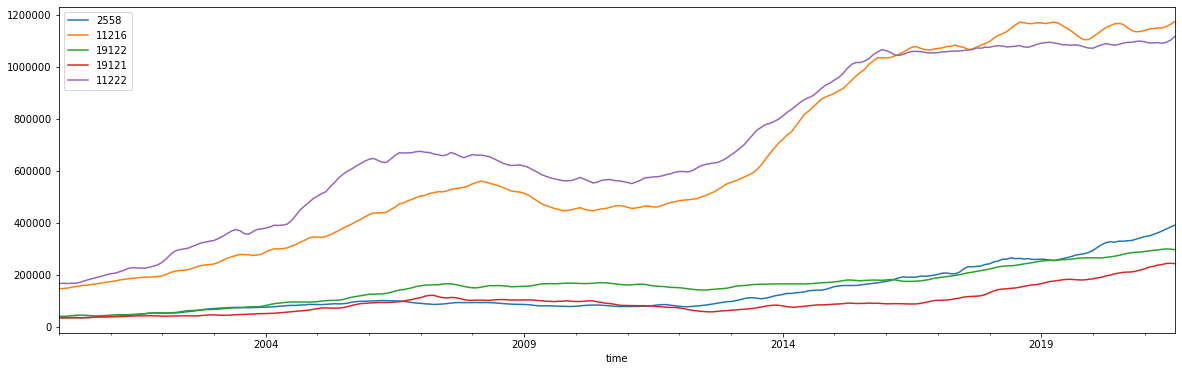

In [34]:
fig, ax = plt.subplots(figsize=(20,6))
df_2558.plot(ax=ax)
df_11216.plot(ax=ax)
df_19122.plot(ax=ax)
df_19121.plot(ax=ax)
df_11222.plot(ax=ax)
ax.legend(['2558', '11216', '19122', '19121', '11222']);
ax.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.show()

Line plot for the top 5 zipcodes

## df_2558 Sample

In [35]:
df_2558

,value
time,
2000-01-31,36773.0
2000-02-29,36071.0
2000-03-31,36554.0
2000-04-30,36148.0
2000-05-31,36472.0
...,...
2021-04-30,361349.0
2021-05-31,368526.0
2021-06-30,376187.0


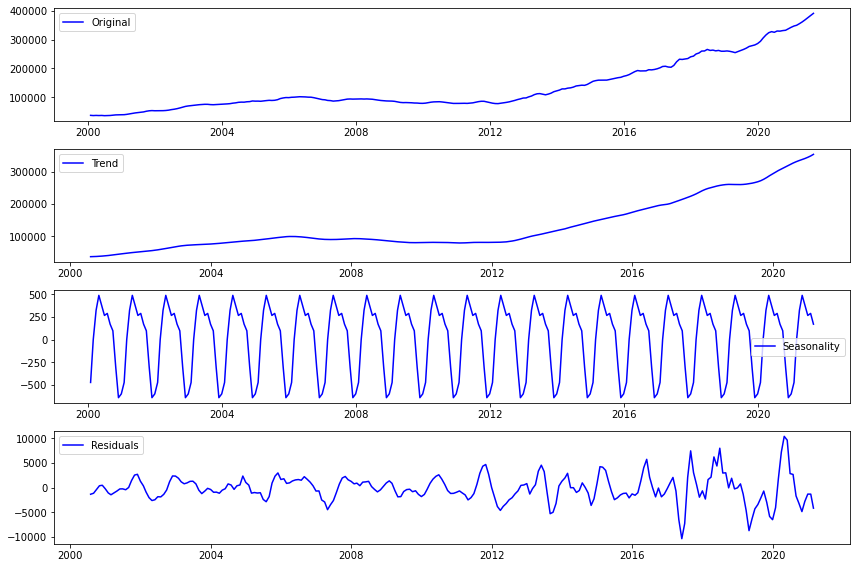

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
decom = seasonal_decompose(df_2558)
trend = decom.trend
seasonal = decom.seasonal
residual = decom.resid
# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df_2558, label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

In [37]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df_2558.diff().diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -6.140500
p-value: 0.000000


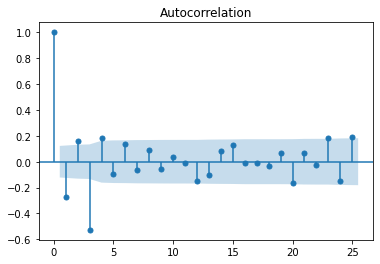

In [38]:
plot_acf(df_2558.diff().diff().dropna());

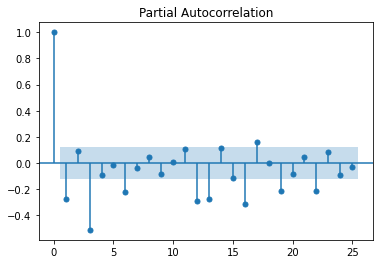

In [39]:
plot_pacf(df_2558.diff().diff().dropna());

***

## P, D, Q

C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\numpy\core\_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


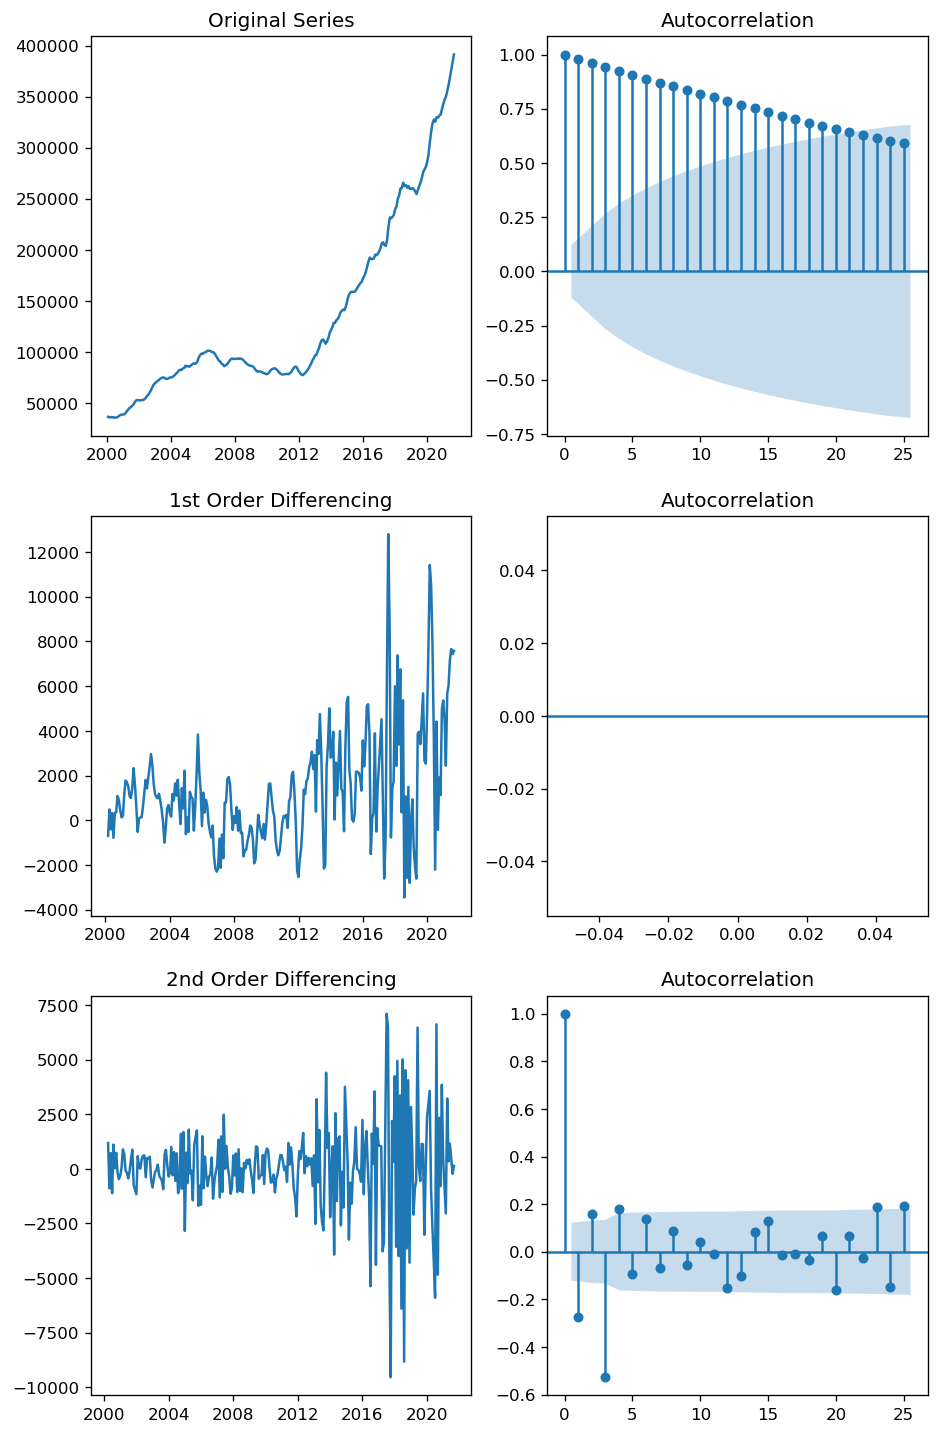

In [40]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,15), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2)
axes[0, 0].plot(df_2558); axes[0, 0].set_title('Original Series')
plot_acf(df_2558, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df_2558.diff().dropna()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df_2558.diff(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df_2558.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df_2558.diff().diff().dropna(), ax=axes[2, 1])


plt.show()

***

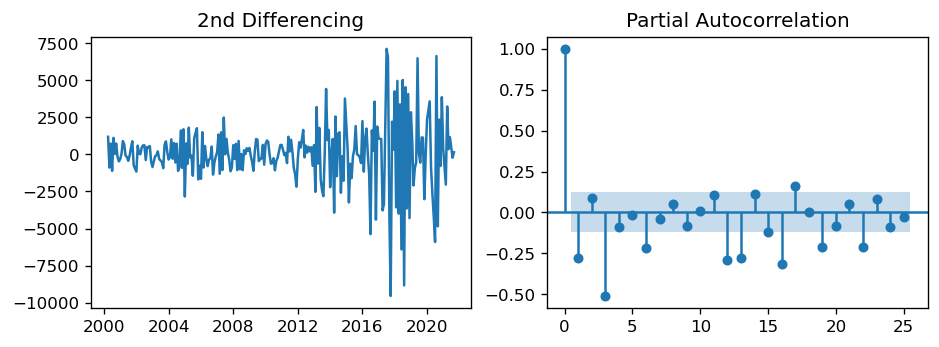

In [41]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2)
axes[0].plot(df_2558.diff().diff().dropna()); axes[0].set_title('2nd Differencing')
plot_pacf(df_2558.diff().diff().dropna(), ax=axes[1])

plt.show()

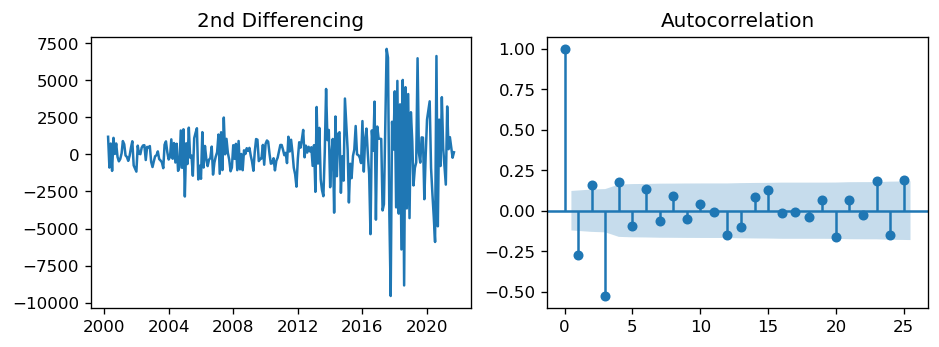

In [42]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2)
axes[0].plot(df_2558.diff().diff().dropna()); axes[0].set_title('2nd Differencing')
plot_acf(df_2558.diff().diff().dropna(), ax=axes[1])

plt.show()

In [43]:
import itertools

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [44]:
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = SARIMAX(df_2558,
                         order=comb,
                         seasonal_order=combs,
                         enforce_stationarity=False,
                         enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmo

ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =6945.726919411753
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =25586.07529444867


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 0) x (0, 0, 2, 12)12 : AIC Calculated =9815.101147389623
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =5680.111023116086


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =5361.616047414196


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 0) x (0, 1, 2, 12)12 : AIC Calculated =5083.358654184782
ARIMA (0, 0, 0) x (0, 2, 0, 12)12 : AIC Calculated =5286.82737379625


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 0) x (0, 2, 1, 12)12 : AIC Calculated =4964.659175104315


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (0, 0, 0) x (0, 2, 2, 12)12 : AIC Calculated =4693.486689088633
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =5436.99691099257


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =14645.654208783617


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 0) x (1, 0, 2, 12)12 : AIC Calculated =5141.6551432526485
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =5291.414035464193


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =5210.303910663815


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 0) x (1, 1, 2, 12)12 : AIC Calculated =4961.571034240467


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 0) x (1, 2, 0, 12)12 : AIC Calculated =4941.829537370822


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 0) x (1, 2, 1, 12)12 : AIC Calculated =4918.44779369572


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 0) x (1, 2, 2, 12)12 : AIC Calculated =4677.379595833974


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 0) x (2, 0, 0, 12)12 : AIC Calculated =5185.032827398115


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 0) x (2, 0, 1, 12)12 : AIC Calculated =5186.502902952288


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 0) x (2, 0, 2, 12)12 : AIC Calculated =5134.594329334878
ARIMA (0, 0, 0) x (2, 1, 0, 12)12 : AIC Calculated =4940.37691922622


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 0) x (2, 1, 1, 12)12 : AIC Calculated =4935.2884723909865


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 0) x (2, 1, 2, 12)12 : AIC Calculated =4932.834698548702


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 0) x (2, 2, 0, 12)12 : AIC Calculated =4678.363879835357


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 0) x (2, 2, 1, 12)12 : AIC Calculated =4672.38505436985


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 0) x (2, 2, 2, 12)12 : AIC Calculated =4645.9680965204725
ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =6731.7651819245475


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =24670.773955997935


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\st

ARIMA (0, 0, 1) x (0, 0, 2, 12)12 : AIC Calculated =9066.523382863961
ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =5485.732053702739


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =5202.019369684806


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 1) x (0, 1, 2, 12)12 : AIC Calculated =4931.8677538409975


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 1) x (0, 2, 0, 12)12 : AIC Calculated =5082.797340108271


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 1) x (0, 2, 1, 12)12 : AIC Calculated =4801.570698037129


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 1) x (0, 2, 2, 12)12 : AIC Calculated =5174.1516060133035


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =6410.195701620709


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =6360.5222404972465


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 1) x (1, 0, 2, 12)12 : AIC Calculated =6052.584727486361


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated =5233.176827415172


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated =5180.6118358362755


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 1) x (1, 1, 2, 12)12 : AIC Calculated =4917.244401410149


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 1) x (1, 2, 0, 12)12 : AIC Calculated =4843.108261516802


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 1) x (1, 2, 1, 12)12 : AIC Calculated =4799.5558320321725


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 1) x (1, 2, 2, 12)12 : AIC Calculated =4542.24277187708


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 1) x (2, 0, 0, 12)12 : AIC Calculated =6102.274035535164


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 1) x (2, 0, 1, 12)12 : AIC Calculated =6104.273881514347


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 1) x (2, 0, 2, 12)12 : AIC Calculated =6054.582090713236


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 1) x (2, 1, 0, 12)12 : AIC Calculated =4960.9027887256725


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 1) x (2, 1, 1, 12)12 : AIC Calculated =4961.237183242756


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 1) x (2, 1, 2, 12)12 : AIC Calculated =4918.861239976744


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 1) x (2, 2, 0, 12)12 : AIC Calculated =4584.007524439152


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 1) x (2, 2, 1, 12)12 : AIC Calculated =4584.71473660454


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 1) x (2, 2, 2, 12)12 : AIC Calculated =4543.479046661887


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 2) x (0, 0, 0, 12)12 : AIC Calculated =6665.086780782262


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 2) x (0, 0, 1, 12)12 : AIC Calculated =22683.603536644034


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 2) x (0, 0, 2, 12)12 : AIC Calculated =9031.547529799354


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 2) x (0, 1, 0, 12)12 : AIC Calculated =5409.464256365948


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 2) x (0, 1, 1, 12)12 : AIC Calculated =5139.294818750826


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 2) x (0, 1, 2, 12)12 : AIC Calculated =4875.1703686368965


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 2) x (0, 2, 0, 12)12 : AIC Calculated =4957.7670936099885


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 2) x (0, 2, 1, 12)12 : AIC Calculated =4686.032555666419


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 2) x (0, 2, 2, 12)12 : AIC Calculated =5074.275116206849


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 2) x (1, 0, 0, 12)12 : AIC Calculated =6415.529799819745


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 2) x (1, 0, 1, 12)12 : AIC Calculated =6339.997195144462


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 2) x (1, 0, 2, 12)12 : AIC Calculated =6031.9223484428485


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 2) x (1, 1, 0, 12)12 : AIC Calculated =5202.021128473469


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 2) x (1, 1, 1, 12)12 : AIC Calculated =5133.075328160294


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 2) x (1, 1, 2, 12)12 : AIC Calculated =4871.045761544131


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 2) x (1, 2, 0, 12)12 : AIC Calculated =4749.990581196668


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 2) x (1, 2, 1, 12)12 : AIC Calculated =4685.797982443948


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (0, 0, 2) x (1, 2, 2, 12)12 : AIC Calculated =4432.663927408896


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 2) x (2, 0, 0, 12)12 : AIC Calculated =6107.44200821772


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 2) x (2, 0, 1, 12)12 : AIC Calculated =6109.436304576206


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 2) x (2, 0, 2, 12)12 : AIC Calculated =6033.931975079709


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 2) x (2, 1, 0, 12)12 : AIC Calculated =4936.189249168061


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 2) x (2, 1, 1, 12)12 : AIC Calculated =4936.770817407025


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\st

ARIMA (0, 0, 2) x (2, 1, 2, 12)12 : AIC Calculated =4872.116508235873
ARIMA (0, 0, 2) x (2, 2, 0, 12)12 : AIC Calculated =4265.750866476396


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 0, 2) x (2, 2, 1, 12)12 : AIC Calculated =4497.1390962432615


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (0, 0, 2) x (2, 2, 2, 12)12 : AIC Calculated =4392.249353151185
ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated =4841.796069840547
ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated =4622.947772733013


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmo

ARIMA (0, 1, 0) x (0, 0, 2, 12)12 : AIC Calculated =4395.068896808507
ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated =4709.963558133712


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated =4391.0975850636205


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 0) x (0, 1, 2, 12)12 : AIC Calculated =4168.9301869938245
ARIMA (0, 1, 0) x (0, 2, 0, 12)12 : AIC Calculated =4756.482390853123


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 0) x (0, 2, 1, 12)12 : AIC Calculated =4365.196325099588


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 0) x (0, 2, 2, 12)12 : AIC Calculated =4124.251529198253
ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated =4633.7157133115015


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated =4591.011025338613


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 0) x (1, 0, 2, 12)12 : AIC Calculated =4343.687440235513
ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated =4385.019044169247


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated =4350.929865425665


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 0) x (1, 1, 2, 12)12 : AIC Calculated =4132.779779455941
ARIMA (0, 1, 0) x (1, 2, 0, 12)12 : AIC Calculated =4338.825265721149


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 0) x (1, 2, 1, 12)12 : AIC Calculated =4221.023627776707


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 0) x (1, 2, 2, 12)12 : AIC Calculated =3992.3012617341765
ARIMA (0, 1, 0) x (2, 0, 0, 12)12 : AIC Calculated =4377.532403707845


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 0) x (2, 0, 1, 12)12 : AIC Calculated =4363.139492069025


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 0) x (2, 0, 2, 12)12 : AIC Calculated =4351.448310798533
ARIMA (0, 1, 0) x (2, 1, 0, 12)12 : AIC Calculated =4149.723178492112


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 0) x (2, 1, 1, 12)12 : AIC Calculated =4145.890702229564


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 0) x (2, 1, 2, 12)12 : AIC Calculated =4127.315759719906


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 0) x (2, 2, 0, 12)12 : AIC Calculated =4042.6422975930127


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 0) x (2, 2, 1, 12)12 : AIC Calculated =3981.523875081871


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 0) x (2, 2, 2, 12)12 : AIC Calculated =3933.657069806055
ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated =4731.780709138671
ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated =4518.88480322119


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmo

ARIMA (0, 1, 1) x (0, 0, 2, 12)12 : AIC Calculated =4304.485576580402
ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated =4632.149440098806


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =4327.153528493127


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 1) x (0, 1, 2, 12)12 : AIC Calculated =4093.761880268623
ARIMA (0, 1, 1) x (0, 2, 0, 12)12 : AIC Calculated =4669.525247929092


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 1) x (0, 2, 1, 12)12 : AIC Calculated =4232.480940250919


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 1) x (0, 2, 2, 12)12 : AIC Calculated =4043.555306554355
ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated =4553.866913354232


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated =4511.1353902405335


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 1) x (1, 0, 2, 12)12 : AIC Calculated =4281.939052601407
ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =4372.878008394344


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =4293.8224975723315


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 1) x (1, 1, 2, 12)12 : AIC Calculated =4065.5915926076063


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 1) x (1, 2, 0, 12)12 : AIC Calculated =4316.129903572853


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 1) x (1, 2, 1, 12)12 : AIC Calculated =4137.019856778253


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 1) x (1, 2, 2, 12)12 : AIC Calculated =3894.068767577599
ARIMA (0, 1, 1) x (2, 0, 0, 12)12 : AIC Calculated =4334.515087669633


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 1) x (2, 0, 1, 12)12 : AIC Calculated =4327.8826692644325


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 1) x (2, 0, 2, 12)12 : AIC Calculated =4290.678710661477


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 1) x (2, 1, 0, 12)12 : AIC Calculated =4139.861424310439


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 1) x (2, 1, 1, 12)12 : AIC Calculated =4109.155908412497


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\st

ARIMA (0, 1, 1) x (2, 1, 2, 12)12 : AIC Calculated =4067.1088021021988
ARIMA (0, 1, 1) x (2, 2, 0, 12)12 : AIC Calculated =4021.8697831617446


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 1) x (2, 2, 1, 12)12 : AIC Calculated =3930.8508025296005


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 1) x (2, 2, 2, 12)12 : AIC Calculated =4042.0779845130182


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 2) x (0, 0, 0, 12)12 : AIC Calculated =4530.080922731737


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 2) x (0, 0, 1, 12)12 : AIC Calculated =4331.8486098330995


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 2) x (0, 0, 2, 12)12 : AIC Calculated =4131.815575490168
ARIMA (0, 1, 2) x (0, 1, 0, 12)12 : AIC Calculated =4540.361688809827


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 2) x (0, 1, 1, 12)12 : AIC Calculated =4172.784012521437


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 2) x (0, 1, 2, 12)12 : AIC Calculated =3934.774290461927


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 2) x (0, 2, 0, 12)12 : AIC Calculated =4542.206953064735


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 2) x (0, 2, 1, 12)12 : AIC Calculated =4211.76306721547


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 2) x (0, 2, 2, 12)12 : AIC Calculated =3961.5105647925634
ARIMA (0, 1, 2) x (1, 0, 0, 12)12 : AIC Calculated =4424.155145727525


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 2) x (1, 0, 1, 12)12 : AIC Calculated =4333.821029994293


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 2) x (1, 0, 2, 12)12 : AIC Calculated =4133.079547587387


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 2) x (1, 1, 0, 12)12 : AIC Calculated =4316.211219933195


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 2) x (1, 1, 1, 12)12 : AIC Calculated =4171.03053669381


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\st

ARIMA (0, 1, 2) x (1, 1, 2, 12)12 : AIC Calculated =3936.7217698919358
ARIMA (0, 1, 2) x (1, 2, 0, 12)12 : AIC Calculated =4310.7809840787895


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 2) x (1, 2, 1, 12)12 : AIC Calculated =4072.091591638056


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 2) x (1, 2, 2, 12)12 : AIC Calculated =3959.380679130003


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 2) x (2, 0, 0, 12)12 : AIC Calculated =4217.228348414174


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 2) x (2, 0, 1, 12)12 : AIC Calculated =4218.900403783631


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\st

ARIMA (0, 1, 2) x (2, 0, 2, 12)12 : AIC Calculated =4134.959069414545
ARIMA (0, 1, 2) x (2, 1, 0, 12)12 : AIC Calculated =4043.4521600205117


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 2) x (2, 1, 1, 12)12 : AIC Calculated =4053.040828389007


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\st

ARIMA (0, 1, 2) x (2, 1, 2, 12)12 : AIC Calculated =3933.1281466655687
ARIMA (0, 1, 2) x (2, 2, 0, 12)12 : AIC Calculated =3970.2659659418277


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 1, 2) x (2, 2, 1, 12)12 : AIC Calculated =3881.182883887399


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (0, 1, 2) x (2, 2, 2, 12)12 : AIC Calculated =3835.750252373772
ARIMA (0, 2, 0) x (0, 0, 0, 12)12 : AIC Calculated =4660.686226224273
ARIMA (0, 2, 0) x (0, 0, 1, 12)12 : AIC Calculated =4448.452702739043


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmo

ARIMA (0, 2, 0) x (0, 0, 2, 12)12 : AIC Calculated =4242.427612686624
ARIMA (0, 2, 0) x (0, 1, 0, 12)12 : AIC Calculated =4655.179096526768


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 2, 0) x (0, 1, 1, 12)12 : AIC Calculated =4334.695664464301


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 2, 0) x (0, 1, 2, 12)12 : AIC Calculated =4072.348899260229
ARIMA (0, 2, 0) x (0, 2, 0, 12)12 : AIC Calculated =4685.19582739734


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 2, 0) x (0, 2, 1, 12)12 : AIC Calculated =4291.3255431040425


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 2, 0) x (0, 2, 2, 12)12 : AIC Calculated =4051.9537643581366
ARIMA (0, 2, 0) x (1, 0, 0, 12)12 : AIC Calculated =4466.889447761384


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 2, 0) x (1, 0, 1, 12)12 : AIC Calculated =4447.541785607918


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 2, 0) x (1, 0, 2, 12)12 : AIC Calculated =4242.582605147611
ARIMA (0, 2, 0) x (1, 1, 0, 12)12 : AIC Calculated =4387.3268700570825


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 2, 0) x (1, 1, 1, 12)12 : AIC Calculated =4324.404944188871


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 2, 0) x (1, 1, 2, 12)12 : AIC Calculated =4062.5479914352536
ARIMA (0, 2, 0) x (1, 2, 0, 12)12 : AIC Calculated =4355.567574997451


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 2, 0) x (1, 2, 1, 12)12 : AIC Calculated =4226.229421054997


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 2, 0) x (1, 2, 2, 12)12 : AIC Calculated =3991.6479927199825
ARIMA (0, 2, 0) x (2, 0, 0, 12)12 : AIC Calculated =4252.767618659687


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 2, 0) x (2, 0, 1, 12)12 : AIC Calculated =4254.706618438892


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 2, 0) x (2, 0, 2, 12)12 : AIC Calculated =4239.056046064783
ARIMA (0, 2, 0) x (2, 1, 0, 12)12 : AIC Calculated =4128.764467083765


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 2, 0) x (2, 1, 1, 12)12 : AIC Calculated =4103.086709985191


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 2, 0) x (2, 1, 2, 12)12 : AIC Calculated =4084.1294751978867


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 2, 0) x (2, 2, 0, 12)12 : AIC Calculated =4040.5689619105906


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 2, 0) x (2, 2, 1, 12)12 : AIC Calculated =3972.84311889115


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 2, 0) x (2, 2, 2, 12)12 : AIC Calculated =3945.716535703089
ARIMA (0, 2, 1) x (0, 0, 0, 12)12 : AIC Calculated =4624.274087414393
ARIMA (0, 2, 1) x (0, 0, 1, 12)12 : AIC Calculated =4406.2630052605555


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmo

ARIMA (0, 2, 1) x (0, 0, 2, 12)12 : AIC Calculated =4201.185975576263
ARIMA (0, 2, 1) x (0, 1, 0, 12)12 : AIC Calculated =4629.795605321995


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 2, 1) x (0, 1, 1, 12)12 : AIC Calculated =4270.937634124011


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 2, 1) x (0, 1, 2, 12)12 : AIC Calculated =4027.0589658795384
ARIMA (0, 2, 1) x (0, 2, 0, 12)12 : AIC Calculated =4664.664139503191


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 2, 1) x (0, 2, 1, 12)12 : AIC Calculated =4300.836961694406


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 2, 1) x (0, 2, 2, 12)12 : AIC Calculated =4033.683583291001
ARIMA (0, 2, 1) x (1, 0, 0, 12)12 : AIC Calculated =4441.7342351415155


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 2, 1) x (1, 0, 1, 12)12 : AIC Calculated =4408.250939117152


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 2, 1) x (1, 0, 2, 12)12 : AIC Calculated =4203.122350596857


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 2, 1) x (1, 1, 0, 12)12 : AIC Calculated =4352.6429132444855


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 2, 1) x (1, 1, 1, 12)12 : AIC Calculated =4260.35607029227


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 2, 1) x (1, 1, 2, 12)12 : AIC Calculated =4022.7480424910336


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 2, 1) x (1, 2, 0, 12)12 : AIC Calculated =4327.97536360738


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 2, 1) x (1, 2, 1, 12)12 : AIC Calculated =4133.196522618797


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 2, 1) x (1, 2, 2, 12)12 : AIC Calculated =3866.520858811603
ARIMA (0, 2, 1) x (2, 0, 0, 12)12 : AIC Calculated =4235.47883627084


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 2, 1) x (2, 0, 1, 12)12 : AIC Calculated =4237.377393283628


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 2, 1) x (2, 0, 2, 12)12 : AIC Calculated =4205.112513694921


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 2, 1) x (2, 1, 0, 12)12 : AIC Calculated =4101.158111594852


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 2, 1) x (2, 1, 1, 12)12 : AIC Calculated =4072.7375703430034


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 2, 1) x (2, 1, 2, 12)12 : AIC Calculated =4024.7480400198965


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 2, 1) x (2, 2, 0, 12)12 : AIC Calculated =4016.639891610949


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 2, 1) x (2, 2, 1, 12)12 : AIC Calculated =3919.8114393692244


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (0, 2, 1) x (2, 2, 2, 12)12 : AIC Calculated =3891.029597549292
ARIMA (0, 2, 2) x (0, 0, 0, 12)12 : AIC Calculated =4602.041525556737


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 2, 2) x (0, 0, 1, 12)12 : AIC Calculated =4379.9228203500115


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 2, 2) x (0, 0, 2, 12)12 : AIC Calculated =4174.819766916095
ARIMA (0, 2, 2) x (0, 1, 0, 12)12 : AIC Calculated =4606.652940325379


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 2, 2) x (0, 1, 1, 12)12 : AIC Calculated =4247.138219180471


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 2, 2) x (0, 1, 2, 12)12 : AIC Calculated =3997.616102942511
ARIMA (0, 2, 2) x (0, 2, 0, 12)12 : AIC Calculated =4642.156256659039


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 2, 2) x (0, 2, 1, 12)12 : AIC Calculated =4203.981590918402


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 2, 2) x (0, 2, 2, 12)12 : AIC Calculated =4016.882596347761
ARIMA (0, 2, 2) x (1, 0, 0, 12)12 : AIC Calculated =4433.090774666753


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 2, 2) x (1, 0, 1, 12)12 : AIC Calculated =4381.891397202504


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 2, 2) x (1, 0, 2, 12)12 : AIC Calculated =4176.7235907522745


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 2, 2) x (1, 1, 0, 12)12 : AIC Calculated =4367.358105184924


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 2, 2) x (1, 1, 1, 12)12 : AIC Calculated =4236.857038587485


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 2, 2) x (1, 1, 2, 12)12 : AIC Calculated =4058.385333937046


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 2, 2) x (1, 2, 0, 12)12 : AIC Calculated =4360.19465946946


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 2, 2) x (1, 2, 1, 12)12 : AIC Calculated =4108.402811322632


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 2, 2) x (1, 2, 2, 12)12 : AIC Calculated =3843.114323404141


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 2, 2) x (2, 0, 0, 12)12 : AIC Calculated =4226.261988253494


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 2, 2) x (2, 0, 1, 12)12 : AIC Calculated =4228.159298649389


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 2, 2) x (2, 0, 2, 12)12 : AIC Calculated =4178.711450242899


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 2, 2) x (2, 1, 0, 12)12 : AIC Calculated =4094.5776687929865


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 2, 2) x (2, 1, 1, 12)12 : AIC Calculated =4064.646811719314


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\st

ARIMA (0, 2, 2) x (2, 1, 2, 12)12 : AIC Calculated =3998.059586292765
ARIMA (0, 2, 2) x (2, 2, 0, 12)12 : AIC Calculated =4011.8544912199613


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (0, 2, 2) x (2, 2, 1, 12)12 : AIC Calculated =3915.6651485973057


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (0, 2, 2) x (2, 2, 2, 12)12 : AIC Calculated =3872.4634533651442
ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =4727.184006308147


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =4512.48354632564


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 0) x (0, 0, 2, 12)12 : AIC Calculated =4367.243967384351
ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =4730.253510694957


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =4420.559758935076


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\st

ARIMA (1, 0, 0) x (0, 1, 2, 12)12 : AIC Calculated =4160.957702803231
ARIMA (1, 0, 0) x (0, 2, 0, 12)12 : AIC Calculated =4770.997857739729


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 0) x (0, 2, 1, 12)12 : AIC Calculated =4403.708906421132


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\st

ARIMA (1, 0, 0) x (0, 2, 2, 12)12 : AIC Calculated =4273.294125062928
ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =4510.341594742731


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =4677.389549345833


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 0) x (1, 0, 2, 12)12 : AIC Calculated =4383.376451260612


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =4406.099298658915


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =4399.623966494349


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 0) x (1, 1, 2, 12)12 : AIC Calculated =4173.636208029351


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 0) x (1, 2, 0, 12)12 : AIC Calculated =4401.901850495679


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 0) x (1, 2, 1, 12)12 : AIC Calculated =4364.8189463623


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 0) x (1, 2, 2, 12)12 : AIC Calculated =4126.347263773534


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 0) x (2, 0, 0, 12)12 : AIC Calculated =4300.205150654879


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 0) x (2, 0, 1, 12)12 : AIC Calculated =4444.077775712618


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 0) x (2, 0, 2, 12)12 : AIC Calculated =4374.533753981836


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 0) x (2, 1, 0, 12)12 : AIC Calculated =4174.503902165906


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\st

ARIMA (1, 0, 0) x (2, 1, 1, 12)12 : AIC Calculated =4136.797517018738
ARIMA (1, 0, 0) x (2, 1, 2, 12)12 : AIC Calculated =4175.520300112846


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 0) x (2, 2, 0, 12)12 : AIC Calculated =4143.678414188355


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 0) x (2, 2, 1, 12)12 : AIC Calculated =4127.200261153509


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 0) x (2, 2, 2, 12)12 : AIC Calculated =4127.854741187016
ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =4655.156541824663


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =4444.408238027218


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (0, 0, 2, 12)12 : AIC Calculated =4290.276394727192
ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =4653.781232067329


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =4353.619898091302


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\st

ARIMA (1, 0, 1) x (0, 1, 2, 12)12 : AIC Calculated =4092.618980711837
ARIMA (1, 0, 1) x (0, 2, 0, 12)12 : AIC Calculated =4681.848297704028


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (0, 2, 1, 12)12 : AIC Calculated =4331.079259670849


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (1, 0, 1) x (0, 2, 2, 12)12 : AIC Calculated =4100.865357895864


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =4462.105452821298


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =4595.553308591241


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (1, 0, 2, 12)12 : AIC Calculated =4304.111996460306


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated =4372.266857985881


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated =4315.185027198727


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (1, 1, 2, 12)12 : AIC Calculated =4112.457178800936


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (1, 2, 0, 12)12 : AIC Calculated =4364.0783626762495


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (1, 2, 1, 12)12 : AIC Calculated =4301.34236901849


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (1, 2, 2, 12)12 : AIC Calculated =4066.290847504144


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (2, 0, 0, 12)12 : AIC Calculated =4257.056830902622


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (2, 0, 1, 12)12 : AIC Calculated =4382.126965952236


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (2, 0, 2, 12)12 : AIC Calculated =4299.738975094035


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (2, 1, 0, 12)12 : AIC Calculated =4137.886623108499


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (2, 1, 1, 12)12 : AIC Calculated =4135.983273570671


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (2, 1, 2, 12)12 : AIC Calculated =4166.738579168021


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (2, 2, 0, 12)12 : AIC Calculated =4024.654410757277


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (2, 2, 1, 12)12 : AIC Calculated =4085.41918069451


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 1) x (2, 2, 2, 12)12 : AIC Calculated =4067.5223361233693
ARIMA (1, 0, 2) x (0, 0, 0, 12)12 : AIC Calculated =4517.254078945301


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 2) x (0, 0, 1, 12)12 : AIC Calculated =4309.070513436234


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 2) x (0, 0, 2, 12)12 : AIC Calculated =4150.602781421373
ARIMA (1, 0, 2) x (0, 1, 0, 12)12 : AIC Calculated =4573.909614841603


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 2) x (0, 1, 1, 12)12 : AIC Calculated =4262.10702670642


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 2) x (0, 1, 2, 12)12 : AIC Calculated =4449.57396990652


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 2) x (0, 2, 0, 12)12 : AIC Calculated =4560.996777026576


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 2) x (0, 2, 1, 12)12 : AIC Calculated =4237.356289029916


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 2) x (0, 2, 2, 12)12 : AIC Calculated =4439.543613999594


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 2) x (1, 0, 0, 12)12 : AIC Calculated =4349.560902888473


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 2) x (1, 0, 1, 12)12 : AIC Calculated =4455.627455905806


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 2) x (1, 0, 2, 12)12 : AIC Calculated =4165.965815094822


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 2) x (1, 1, 0, 12)12 : AIC Calculated =4328.506469155752


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\st

ARIMA (1, 0, 2) x (1, 1, 1, 12)12 : AIC Calculated =4209.0637314109335
ARIMA (1, 0, 2) x (1, 1, 2, 12)12 : AIC Calculated =4017.616820185282


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 2) x (1, 2, 0, 12)12 : AIC Calculated =4311.683558769998


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 2) x (1, 2, 1, 12)12 : AIC Calculated =4217.551187991391


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 2) x (1, 2, 2, 12)12 : AIC Calculated =3988.434097418723


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 2) x (2, 0, 0, 12)12 : AIC Calculated =4143.2435270843625


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 2) x (2, 0, 1, 12)12 : AIC Calculated =4279.192341379816


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 2) x (2, 0, 2, 12)12 : AIC Calculated =4166.550190933428


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 2) x (2, 1, 0, 12)12 : AIC Calculated =4077.9504908024514


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 2) x (2, 1, 1, 12)12 : AIC Calculated =4061.843847709103


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 2) x (2, 1, 2, 12)12 : AIC Calculated =4078.4580554964155


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 2) x (2, 2, 0, 12)12 : AIC Calculated =3975.1902826815367


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (1, 0, 2) x (2, 2, 1, 12)12 : AIC Calculated =3915.9427591019453


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 0, 2) x (2, 2, 2, 12)12 : AIC Calculated =3987.2649010996183
ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated =4646.3260979214765
ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated =4439.315967922545


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmo

ARIMA (1, 1, 0) x (0, 0, 2, 12)12 : AIC Calculated =4233.924545124286
ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated =4617.386758814918


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated =4314.2633315769


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 0) x (0, 1, 2, 12)12 : AIC Calculated =4079.9064181489503
ARIMA (1, 1, 0) x (0, 2, 0, 12)12 : AIC Calculated =4655.601444499753


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 0) x (0, 2, 1, 12)12 : AIC Calculated =4293.723727000035


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 0) x (0, 2, 2, 12)12 : AIC Calculated =3905.765610050993
ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated =4440.07326826739


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated =4440.639580044193


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 0) x (1, 0, 2, 12)12 : AIC Calculated =4235.579203454909


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated =4317.596120924891


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated =4283.68444201579


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 0) x (1, 1, 2, 12)12 : AIC Calculated =4038.713050236638


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 0) x (1, 2, 0, 12)12 : AIC Calculated =4317.710853291341


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 0) x (1, 2, 1, 12)12 : AIC Calculated =4135.48600463262


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 0) x (1, 2, 2, 12)12 : AIC Calculated =3893.6820829925277


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 0) x (2, 0, 0, 12)12 : AIC Calculated =4233.107308921336


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 0) x (2, 0, 1, 12)12 : AIC Calculated =4235.1066129655865


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 0) x (2, 0, 2, 12)12 : AIC Calculated =4237.101411790804


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 0) x (2, 1, 0, 12)12 : AIC Calculated =4072.906039003907


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 0) x (2, 1, 1, 12)12 : AIC Calculated =4053.488422313506


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 0) x (2, 1, 2, 12)12 : AIC Calculated =4080.059563953523


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 0) x (2, 2, 0, 12)12 : AIC Calculated =3984.4048771888156


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 0) x (2, 2, 1, 12)12 : AIC Calculated =3891.110580434716


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (1, 1, 0) x (2, 2, 2, 12)12 : AIC Calculated =3912.1307891958077
ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated =4626.33575814664
ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated =4415.492155374968


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmo

ARIMA (1, 1, 1) x (0, 0, 2, 12)12 : AIC Calculated =4211.766986943034
ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated =4601.483504648644


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =4272.671464388649


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 1) x (0, 1, 2, 12)12 : AIC Calculated =4024.9510794365233
ARIMA (1, 1, 1) x (0, 2, 0, 12)12 : AIC Calculated =4637.528269954354


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 1) x (0, 2, 1, 12)12 : AIC Calculated =4277.906897167644


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 1) x (0, 2, 2, 12)12 : AIC Calculated =3888.7323863848596
ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated =4433.614670305689


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated =4417.336658708589


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 1) x (1, 0, 2, 12)12 : AIC Calculated =4213.564639565073


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =4330.359896408847


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =4265.435510405538


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 1) x (1, 1, 2, 12)12 : AIC Calculated =4019.5834997612383


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 1) x (1, 2, 0, 12)12 : AIC Calculated =4285.56656447178


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 1) x (1, 2, 1, 12)12 : AIC Calculated =4117.530104399019


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (1, 1, 1) x (1, 2, 2, 12)12 : AIC Calculated =3875.5718699622976


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 1) x (2, 0, 0, 12)12 : AIC Calculated =4228.3799490836145


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 1) x (2, 0, 1, 12)12 : AIC Calculated =4230.378186690284


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 1) x (2, 0, 2, 12)12 : AIC Calculated =4215.38807606673


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 1) x (2, 1, 0, 12)12 : AIC Calculated =4093.2031851597185


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 1) x (2, 1, 1, 12)12 : AIC Calculated =4053.5197858100714


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\st

ARIMA (1, 1, 1) x (2, 1, 2, 12)12 : AIC Calculated =4020.0417835268063
ARIMA (1, 1, 1) x (2, 2, 0, 12)12 : AIC Calculated =3984.902280082498


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (1, 1, 1) x (2, 2, 1, 12)12 : AIC Calculated =3944.6080022293327


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (1, 1, 1) x (2, 2, 2, 12)12 : AIC Calculated =3894.4625690397406
ARIMA (1, 1, 2) x (0, 0, 0, 12)12 : AIC Calculated =4544.232452757322


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 2) x (0, 0, 1, 12)12 : AIC Calculated =4342.683677493329


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 2) x (0, 0, 2, 12)12 : AIC Calculated =4139.837747127543
ARIMA (1, 1, 2) x (0, 1, 0, 12)12 : AIC Calculated =4541.748493875948


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 2) x (0, 1, 1, 12)12 : AIC Calculated =4165.484155399522


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 2) x (0, 1, 2, 12)12 : AIC Calculated =3929.3197772053936


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 2) x (0, 2, 0, 12)12 : AIC Calculated =4537.032674965874


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 2) x (0, 2, 1, 12)12 : AIC Calculated =4138.455629140117


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (1, 1, 2) x (0, 2, 2, 12)12 : AIC Calculated =3811.806619286155


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 2) x (1, 0, 0, 12)12 : AIC Calculated =4376.865412387344


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 2) x (1, 0, 1, 12)12 : AIC Calculated =4344.647011051273


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 2) x (1, 0, 2, 12)12 : AIC Calculated =4141.222827458105


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 2) x (1, 1, 0, 12)12 : AIC Calculated =4274.467871157187


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 2) x (1, 1, 1, 12)12 : AIC Calculated =4221.958194170094


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\st

ARIMA (1, 1, 2) x (1, 1, 2, 12)12 : AIC Calculated =3930.6813762731085
ARIMA (1, 1, 2) x (1, 2, 0, 12)12 : AIC Calculated =4250.384676018977


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 2) x (1, 2, 1, 12)12 : AIC Calculated =4066.84769198414


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (1, 1, 2) x (1, 2, 2, 12)12 : AIC Calculated =3887.498941180483


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 2) x (2, 0, 0, 12)12 : AIC Calculated =4173.843427989116


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 2) x (2, 0, 1, 12)12 : AIC Calculated =4175.326144819614


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 2) x (2, 0, 2, 12)12 : AIC Calculated =4142.975701080699


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 2) x (2, 1, 0, 12)12 : AIC Calculated =4014.222098947354


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\st

ARIMA (1, 1, 2) x (2, 1, 1, 12)12 : AIC Calculated =3966.3547836249045


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 1, 2) x (2, 1, 2, 12)12 : AIC Calculated =3928.4930844038013
ARIMA (1, 1, 2) x (2, 2, 0, 12)12 : AIC Calculated =3937.155052558759


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (1, 1, 2) x (2, 2, 1, 12)12 : AIC Calculated =3858.3874201449376


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (1, 1, 2) x (2, 2, 2, 12)12 : AIC Calculated =3823.7401900070777
ARIMA (1, 2, 0) x (0, 0, 0, 12)12 : AIC Calculated =4642.556527881259
ARIMA (1, 2, 0) x (0, 0, 1, 12)12 : AIC Calculated =4424.633670228077


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmo

ARIMA (1, 2, 0) x (0, 0, 2, 12)12 : AIC Calculated =4219.755193718111
ARIMA (1, 2, 0) x (0, 1, 0, 12)12 : AIC Calculated =4648.539556965265


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 0) x (0, 1, 1, 12)12 : AIC Calculated =4292.981986994763


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 0) x (0, 1, 2, 12)12 : AIC Calculated =4045.8766806429544
ARIMA (1, 2, 0) x (0, 2, 0, 12)12 : AIC Calculated =4683.954119483882


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 0) x (0, 2, 1, 12)12 : AIC Calculated =4317.73892738635


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 0) x (0, 2, 2, 12)12 : AIC Calculated =4050.509469790482
ARIMA (1, 2, 0) x (1, 0, 0, 12)12 : AIC Calculated =4426.580155882853


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 0) x (1, 0, 1, 12)12 : AIC Calculated =4426.441461830061


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 0) x (1, 0, 2, 12)12 : AIC Calculated =4221.382286379354
ARIMA (1, 2, 0) x (1, 1, 0, 12)12 : AIC Calculated =4353.081760305888


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 0) x (1, 1, 1, 12)12 : AIC Calculated =4284.5965074087935


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 0) x (1, 1, 2, 12)12 : AIC Calculated =4043.233908480737


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 0) x (1, 2, 0, 12)12 : AIC Calculated =4348.227780546202


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 0) x (1, 2, 1, 12)12 : AIC Calculated =4157.854686355011


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 0) x (1, 2, 2, 12)12 : AIC Calculated =3894.3841720969567
ARIMA (1, 2, 0) x (2, 0, 0, 12)12 : AIC Calculated =4219.4744956863815


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 0) x (2, 0, 1, 12)12 : AIC Calculated =4221.474142180401


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 0) x (2, 0, 2, 12)12 : AIC Calculated =4223.241534319292


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 0) x (2, 1, 0, 12)12 : AIC Calculated =4107.93674371288


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 0) x (2, 1, 1, 12)12 : AIC Calculated =4053.860639541974


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 0) x (2, 1, 2, 12)12 : AIC Calculated =4045.200606458089


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 0) x (2, 2, 0, 12)12 : AIC Calculated =3996.01010375437


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 0) x (2, 2, 1, 12)12 : AIC Calculated =3900.3535982160547


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 0) x (2, 2, 2, 12)12 : AIC Calculated =4049.198485969899
ARIMA (1, 2, 1) x (0, 0, 0, 12)12 : AIC Calculated =4611.727186727621


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 1) x (0, 0, 1, 12)12 : AIC Calculated =4387.910483880162


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 1) x (0, 0, 2, 12)12 : AIC Calculated =4183.9026628431
ARIMA (1, 2, 1) x (0, 1, 0, 12)12 : AIC Calculated =4620.333471055507


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 1) x (0, 1, 1, 12)12 : AIC Calculated =4256.229512894719


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 1) x (0, 1, 2, 12)12 : AIC Calculated =4008.420631628327


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 1) x (0, 2, 0, 12)12 : AIC Calculated =4668.957059472674


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 1) x (0, 2, 1, 12)12 : AIC Calculated =4214.824142515556


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 1) x (0, 2, 2, 12)12 : AIC Calculated =4030.8019834236784
ARIMA (1, 2, 1) x (1, 0, 0, 12)12 : AIC Calculated =4407.14906245885


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 1) x (1, 0, 1, 12)12 : AIC Calculated =4389.910478588596


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 1) x (1, 0, 2, 12)12 : AIC Calculated =4185.310820335525


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 1) x (1, 1, 0, 12)12 : AIC Calculated =4343.430801896518


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 1) x (1, 1, 1, 12)12 : AIC Calculated =4248.283462973046


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 1) x (1, 1, 2, 12)12 : AIC Calculated =4007.73496075322


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 1) x (1, 2, 0, 12)12 : AIC Calculated =4344.55188975247


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 1) x (1, 2, 1, 12)12 : AIC Calculated =4124.09262272259


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 1) x (1, 2, 2, 12)12 : AIC Calculated =3851.817042295779


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 1) x (2, 0, 0, 12)12 : AIC Calculated =4200.023904393229


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 1) x (2, 0, 1, 12)12 : AIC Calculated =4201.213513097677


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 1) x (2, 0, 2, 12)12 : AIC Calculated =4185.899059089582


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 1) x (2, 1, 0, 12)12 : AIC Calculated =4058.6186854647167


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 1) x (2, 1, 1, 12)12 : AIC Calculated =4032.1694011629934


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 1) x (2, 1, 2, 12)12 : AIC Calculated =4018.908390995764


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 1) x (2, 2, 0, 12)12 : AIC Calculated =3979.4748424252552


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (1, 2, 1) x (2, 2, 1, 12)12 : AIC Calculated =3894.663738338688


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (1, 2, 1) x (2, 2, 2, 12)12 : AIC Calculated =3868.3023389268183
ARIMA (1, 2, 2) x (0, 0, 0, 12)12 : AIC Calculated =4587.762783531617


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 2) x (0, 0, 1, 12)12 : AIC Calculated =4368.310909969987


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 2) x (0, 0, 2, 12)12 : AIC Calculated =4159.913120112758


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 2) x (0, 1, 0, 12)12 : AIC Calculated =4577.336860706733


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\st

ARIMA (1, 2, 2) x (0, 1, 1, 12)12 : AIC Calculated =4226.734382688163


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 2) x (0, 1, 2, 12)12 : AIC Calculated =3982.2454800867044
ARIMA (1, 2, 2) x (0, 2, 0, 12)12 : AIC Calculated =4611.483412651851


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 2) x (0, 2, 1, 12)12 : AIC Calculated =4274.511149586806


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 2) x (0, 2, 2, 12)12 : AIC Calculated =4015.2204226132644


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 2) x (1, 0, 0, 12)12 : AIC Calculated =4407.172630349656


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 2) x (1, 0, 1, 12)12 : AIC Calculated =4370.0116085336485


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 2) x (1, 0, 2, 12)12 : AIC Calculated =4158.143657208756


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\st

ARIMA (1, 2, 2) x (1, 1, 0, 12)12 : AIC Calculated =4313.073303768017


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 2) x (1, 1, 1, 12)12 : AIC Calculated =4220.318557472683


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 2) x (1, 1, 2, 12)12 : AIC Calculated =3979.702837666476


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 2) x (1, 2, 0, 12)12 : AIC Calculated =4333.398118971171


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 2) x (1, 2, 1, 12)12 : AIC Calculated =4253.011862739585


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 2) x (1, 2, 2, 12)12 : AIC Calculated =4014.035598855555


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 2) x (2, 0, 0, 12)12 : AIC Calculated =4195.017918872141


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 2) x (2, 0, 1, 12)12 : AIC Calculated =4195.855833050604


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 2) x (2, 0, 2, 12)12 : AIC Calculated =4158.250622330615


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 2) x (2, 1, 0, 12)12 : AIC Calculated =4058.723208548281


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\st

ARIMA (1, 2, 2) x (2, 1, 1, 12)12 : AIC Calculated =4032.502682574698


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (1, 2, 2) x (2, 1, 2, 12)12 : AIC Calculated =3996.827573255399


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (1, 2, 2) x (2, 2, 0, 12)12 : AIC Calculated =3975.4394427523666


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (1, 2, 2) x (2, 2, 1, 12)12 : AIC Calculated =3890.6788192005743


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (1, 2, 2) x (2, 2, 2, 12)12 : AIC Calculated =4005.883674754692
ARIMA (2, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =4619.717285019277


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =4589.435836138826


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 0, 0) x (0, 0, 2, 12)12 : AIC Calculated =4334.32549578217
ARIMA (2, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =4617.9994127737555


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =4353.611164851582


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 0, 0) x (0, 1, 2, 12)12 : AIC Calculated =4441.844633966864


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 0, 0) x (0, 2, 0, 12)12 : AIC Calculated =4628.690500645258


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 0, 0) x (0, 2, 1, 12)12 : AIC Calculated =4298.025838320408


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (2, 0, 0) x (0, 2, 2, 12)12 : AIC Calculated =4080.8723232926277


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =4410.194538097481


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =4611.135555220535


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 0, 0) x (1, 0, 2, 12)12 : AIC Calculated =4348.178185703893


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =4329.470622151735


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =4316.223994641745


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 0, 0) x (1, 1, 2, 12)12 : AIC Calculated =4168.1556406812715


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 0, 0) x (1, 2, 0, 12)12 : AIC Calculated =4304.240707570554


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 0, 0) x (1, 2, 1, 12)12 : AIC Calculated =4250.304145992803


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 0, 0) x (1, 2, 2, 12)12 : AIC Calculated =4083.840402420282


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 0, 0) x (2, 0, 0, 12)12 : AIC Calculated =4204.917071941651


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 0, 0) x (2, 0, 1, 12)12 : AIC Calculated =4332.708855280172


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\st

ARIMA (2, 0, 0) x (2, 0, 2, 12)12 : AIC Calculated =4298.8479729769715
ARIMA (2, 0, 0) x (2, 1, 0, 12)12 : AIC Calculated =4092.2623343091536


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 0, 0) x (2, 1, 1, 12)12 : AIC Calculated =4086.940116707897


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 0, 0) x (2, 1, 2, 12)12 : AIC Calculated =4131.977078949631


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 0, 0) x (2, 2, 0, 12)12 : AIC Calculated =4039.9161865176243


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 0, 0) x (2, 2, 1, 12)12 : AIC Calculated =4016.605166822342


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 0, 0) x (2, 2, 2, 12)12 : AIC Calculated =4018.2833356893643
ARIMA (2, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =4621.131174030514


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =4535.577347760449


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 0, 1) x (0, 0, 2, 12)12 : AIC Calculated =4279.61306695522
ARIMA (2, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =4619.932395090398


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =4327.360820811167


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\st

ARIMA (2, 0, 1) x (0, 1, 2, 12)12 : AIC Calculated =4108.328570359525
ARIMA (2, 0, 1) x (0, 2, 0, 12)12 : AIC Calculated =4630.666701242861


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 0, 1) x (0, 2, 1, 12)12 : AIC Calculated =4281.690725732769


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (2, 0, 1) x (0, 2, 2, 12)12 : AIC Calculated =4064.1217714207496


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =4410.753548980747


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =4584.036300025155


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\st

ARIMA (2, 0, 1) x (1, 0, 2, 12)12 : AIC Calculated =4295.834203378941
ARIMA (2, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated =4330.848783466199


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated =4317.575586037894


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 0, 1) x (1, 1, 2, 12)12 : AIC Calculated =4144.998577346829


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 0, 1) x (1, 2, 0, 12)12 : AIC Calculated =4306.500545686542


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\st

ARIMA (2, 0, 1) x (1, 2, 1, 12)12 : AIC Calculated =4146.64898859436
ARIMA (2, 0, 1) x (1, 2, 2, 12)12 : AIC Calculated =4018.912877429748


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\st

ARIMA (2, 0, 1) x (2, 0, 0, 12)12 : AIC Calculated =4206.036696925783
ARIMA (2, 0, 1) x (2, 0, 1, 12)12 : AIC Calculated =4334.646613004918


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\st

ARIMA (2, 0, 1) x (2, 0, 2, 12)12 : AIC Calculated =4287.810666848602
ARIMA (2, 0, 1) x (2, 1, 0, 12)12 : AIC Calculated =4093.4731978109176


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 0, 1) x (2, 1, 1, 12)12 : AIC Calculated =4088.5479799588884


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\st

ARIMA (2, 0, 1) x (2, 1, 2, 12)12 : AIC Calculated =4097.444761029659
ARIMA (2, 0, 1) x (2, 2, 0, 12)12 : AIC Calculated =4042.0658296010224


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 0, 1) x (2, 2, 1, 12)12 : AIC Calculated =4018.423805859631


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 0, 1) x (2, 2, 2, 12)12 : AIC Calculated =4019.871176868881
ARIMA (2, 0, 2) x (0, 0, 0, 12)12 : AIC Calculated =4516.834095885453


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 0, 2) x (0, 0, 1, 12)12 : AIC Calculated =4409.799518883355


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\st

ARIMA (2, 0, 2) x (0, 0, 2, 12)12 : AIC Calculated =4133.500458169298
ARIMA (2, 0, 2) x (0, 1, 0, 12)12 : AIC Calculated =4575.8995308810845


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 0, 2) x (0, 1, 1, 12)12 : AIC Calculated =4260.606355814662


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\st

ARIMA (2, 0, 2) x (0, 1, 2, 12)12 : AIC Calculated =4155.17329100187
ARIMA (2, 0, 2) x (0, 2, 0, 12)12 : AIC Calculated =4558.629399687958


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 0, 2) x (0, 2, 1, 12)12 : AIC Calculated =4235.235551315782


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 0, 2) x (0, 2, 2, 12)12 : AIC Calculated =4334.2182073528875


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 0, 2) x (1, 0, 0, 12)12 : AIC Calculated =4325.848730616808


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 0, 2) x (1, 0, 1, 12)12 : AIC Calculated =4455.14580706219


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\st

ARIMA (2, 0, 2) x (1, 0, 2, 12)12 : AIC Calculated =4168.432235522283
ARIMA (2, 0, 2) x (1, 1, 0, 12)12 : AIC Calculated =4297.524530036174


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 0, 2) x (1, 1, 1, 12)12 : AIC Calculated =4260.936864537138


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\st

ARIMA (2, 0, 2) x (1, 1, 2, 12)12 : AIC Calculated =4014.5006063320648
ARIMA (2, 0, 2) x (1, 2, 0, 12)12 : AIC Calculated =4283.196122935562


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 0, 2) x (1, 2, 1, 12)12 : AIC Calculated =4213.769585957721


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 0, 2) x (1, 2, 2, 12)12 : AIC Calculated =3985.110934101769


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 0, 2) x (2, 0, 0, 12)12 : AIC Calculated =4121.0126803492185


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 0, 2) x (2, 0, 1, 12)12 : AIC Calculated =4260.096924857929


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\st

ARIMA (2, 0, 2) x (2, 0, 2, 12)12 : AIC Calculated =4168.1996332511135
ARIMA (2, 0, 2) x (2, 1, 0, 12)12 : AIC Calculated =4052.5418239791084


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\st

ARIMA (2, 0, 2) x (2, 1, 1, 12)12 : AIC Calculated =4036.7719374199596


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 0, 2) x (2, 1, 2, 12)12 : AIC Calculated =4079.663187295665


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 0, 2) x (2, 2, 0, 12)12 : AIC Calculated =3941.843513956073


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (2, 0, 2) x (2, 2, 1, 12)12 : AIC Calculated =3940.622115155832


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (2, 0, 2) x (2, 2, 2, 12)12 : AIC Calculated =3984.1545788151984
ARIMA (2, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated =4624.3383831309575
ARIMA (2, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated =4430.231022276446


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\st

ARIMA (2, 1, 0) x (0, 0, 2, 12)12 : AIC Calculated =4226.835876152121
ARIMA (2, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated =4601.311706877877


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated =4315.810399947254


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 1, 0) x (0, 1, 2, 12)12 : AIC Calculated =4040.280320488988
ARIMA (2, 1, 0) x (0, 2, 0, 12)12 : AIC Calculated =4636.316190779748


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 1, 0) x (0, 2, 1, 12)12 : AIC Calculated =4222.0499895781995


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 1, 0) x (0, 2, 2, 12)12 : AIC Calculated =3906.7564232145405
ARIMA (2, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated =4414.094391568008


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated =4415.100555284841


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 1, 0) x (1, 0, 2, 12)12 : AIC Calculated =4228.601028904704


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated =4298.41835533521


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated =4263.366374102329


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 1, 0) x (1, 1, 2, 12)12 : AIC Calculated =4035.1043814666027


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 1, 0) x (1, 2, 0, 12)12 : AIC Calculated =4300.078541935147


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 1, 0) x (1, 2, 1, 12)12 : AIC Calculated =4116.227247753921


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (2, 1, 0) x (1, 2, 2, 12)12 : AIC Calculated =3891.366785986066


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 1, 0) x (2, 0, 0, 12)12 : AIC Calculated =4209.383042447831


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 1, 0) x (2, 0, 1, 12)12 : AIC Calculated =4211.356088841644


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 1, 0) x (2, 0, 2, 12)12 : AIC Calculated =4213.34712002786


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 1, 0) x (2, 1, 0, 12)12 : AIC Calculated =4051.71573156414


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 1, 0) x (2, 1, 1, 12)12 : AIC Calculated =4032.8714161915495


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\st

ARIMA (2, 1, 0) x (2, 1, 2, 12)12 : AIC Calculated =4017.957629992873
ARIMA (2, 1, 0) x (2, 2, 0, 12)12 : AIC Calculated =3964.4158320642064


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 1, 0) x (2, 2, 1, 12)12 : AIC Calculated =3869.3572159884347


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (2, 1, 0) x (2, 2, 2, 12)12 : AIC Calculated =3870.433678091245


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated =4614.245709535637


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated =4411.381817608151


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 1, 1) x (0, 0, 2, 12)12 : AIC Calculated =4188.539928769295


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated =4596.351915677295


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =4291.538373117523


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\st

ARIMA (2, 1, 1) x (0, 1, 2, 12)12 : AIC Calculated =4056.5463942932574
ARIMA (2, 1, 1) x (0, 2, 0, 12)12 : AIC Calculated =4618.211074009314


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 1, 1) x (0, 2, 1, 12)12 : AIC Calculated =4263.706993084366


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (2, 1, 1) x (0, 2, 2, 12)12 : AIC Calculated =3952.9660731432723


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated =4391.994360720056


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated =4413.312887442928


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 1, 1) x (1, 0, 2, 12)12 : AIC Calculated =4190.530781203724


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =4291.3475773822765


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =4286.87094965803


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 1, 1) x (1, 1, 2, 12)12 : AIC Calculated =4057.24969484945


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 1, 1) x (1, 2, 0, 12)12 : AIC Calculated =4287.18727456305


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\st

ARIMA (2, 1, 1) x (1, 2, 1, 12)12 : AIC Calculated =4118.063714842969
ARIMA (2, 1, 1) x (1, 2, 2, 12)12 : AIC Calculated =3996.3073527711867


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 1, 1) x (2, 0, 0, 12)12 : AIC Calculated =4187.977733911229


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 1, 1) x (2, 0, 1, 12)12 : AIC Calculated =4189.194476669164


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 1, 1) x (2, 0, 2, 12)12 : AIC Calculated =4208.013302641233


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 1, 1) x (2, 1, 0, 12)12 : AIC Calculated =4071.5000015827673


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 1, 1) x (2, 1, 1, 12)12 : AIC Calculated =4059.5128123171926


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 1, 1) x (2, 1, 2, 12)12 : AIC Calculated =4061.527996205043


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 1, 1) x (2, 2, 0, 12)12 : AIC Calculated =4028.0695370432404


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (2, 1, 1) x (2, 2, 1, 12)12 : AIC Calculated =3941.918463434104


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (2, 1, 1) x (2, 2, 2, 12)12 : AIC Calculated =3999.860464615248


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 1, 2) x (0, 0, 0, 12)12 : AIC Calculated =4542.038110148662


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 1, 2) x (0, 0, 1, 12)12 : AIC Calculated =4337.84361393527


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 1, 2) x (0, 0, 2, 12)12 : AIC Calculated =4134.9205686243695


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 1, 2) x (0, 1, 0, 12)12 : AIC Calculated =4543.716767478965


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 1, 2) x (0, 1, 1, 12)12 : AIC Calculated =4165.0718942424055


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\st

ARIMA (2, 1, 2) x (0, 1, 2, 12)12 : AIC Calculated =3931.31166374719
ARIMA (2, 1, 2) x (0, 2, 0, 12)12 : AIC Calculated =4537.814907117581


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 1, 2) x (0, 2, 1, 12)12 : AIC Calculated =4139.74757482733


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (2, 1, 2) x (0, 2, 2, 12)12 : AIC Calculated =3840.1286721545557


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 1, 2) x (1, 0, 0, 12)12 : AIC Calculated =4347.509384261987


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 1, 2) x (1, 0, 1, 12)12 : AIC Calculated =4339.842929099311


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 1, 2) x (1, 0, 2, 12)12 : AIC Calculated =4135.130944652862


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 1, 2) x (1, 1, 0, 12)12 : AIC Calculated =4258.230877220604


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\st

ARIMA (2, 1, 2) x (1, 1, 1, 12)12 : AIC Calculated =4165.768788593057


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 1, 2) x (1, 1, 2, 12)12 : AIC Calculated =3932.779454501195
ARIMA (2, 1, 2) x (1, 2, 0, 12)12 : AIC Calculated =4225.120895054313


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 1, 2) x (1, 2, 1, 12)12 : AIC Calculated =4067.5130521155124


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (2, 1, 2) x (1, 2, 2, 12)12 : AIC Calculated =3827.010732565758


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 1, 2) x (2, 0, 0, 12)12 : AIC Calculated =4151.505872886843


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 1, 2) x (2, 0, 1, 12)12 : AIC Calculated =4152.940120167191


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 1, 2) x (2, 0, 2, 12)12 : AIC Calculated =4136.111952106423


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 1, 2) x (2, 1, 0, 12)12 : AIC Calculated =3998.6178125261954


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\st

ARIMA (2, 1, 2) x (2, 1, 1, 12)12 : AIC Calculated =3951.4823985144158


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (2, 1, 2) x (2, 1, 2, 12)12 : AIC Calculated =3947.3323770563748


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 1, 2) x (2, 2, 0, 12)12 : AIC Calculated =3920.478411483761


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (2, 1, 2) x (2, 2, 1, 12)12 : AIC Calculated =3886.480820912154


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (2, 1, 2) x (2, 2, 2, 12)12 : AIC Calculated =3852.7043751954643
ARIMA (2, 2, 0) x (0, 0, 0, 12)12 : AIC Calculated =4625.305995894409
ARIMA (2, 2, 0) x (0, 0, 1, 12)12 : AIC Calculated =4423.70354054425


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmo

ARIMA (2, 2, 0) x (0, 0, 2, 12)12 : AIC Calculated =4218.945032414548
ARIMA (2, 2, 0) x (0, 1, 0, 12)12 : AIC Calculated =4632.026216724342


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 2, 0) x (0, 1, 1, 12)12 : AIC Calculated =4293.444643571527


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 2, 0) x (0, 1, 2, 12)12 : AIC Calculated =4045.5534490201458
ARIMA (2, 2, 0) x (0, 2, 0, 12)12 : AIC Calculated =4666.718069343271


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 2, 0) x (0, 2, 1, 12)12 : AIC Calculated =4245.5812693320595


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 2, 0) x (0, 2, 2, 12)12 : AIC Calculated =4052.8365077507806
ARIMA (2, 2, 0) x (1, 0, 0, 12)12 : AIC Calculated =4408.743930864056


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 2, 0) x (1, 0, 1, 12)12 : AIC Calculated =4408.421084277595


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 2, 0) x (1, 0, 2, 12)12 : AIC Calculated =4220.3587025186725


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 2, 0) x (1, 1, 0, 12)12 : AIC Calculated =4323.448110464943


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 2, 0) x (1, 1, 1, 12)12 : AIC Calculated =4265.525629155112


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 2, 0) x (1, 1, 2, 12)12 : AIC Calculated =4042.9202525424903


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 2, 0) x (1, 2, 0, 12)12 : AIC Calculated =4301.188740629999


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 2, 0) x (1, 2, 1, 12)12 : AIC Calculated =4274.527671794267


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 2, 0) x (1, 2, 2, 12)12 : AIC Calculated =4051.028873165509


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 2, 0) x (2, 0, 0, 12)12 : AIC Calculated =4201.068145026145


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 2, 0) x (2, 0, 1, 12)12 : AIC Calculated =4202.77192959414


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 2, 0) x (2, 0, 2, 12)12 : AIC Calculated =4204.657291330005


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 2, 0) x (2, 1, 0, 12)12 : AIC Calculated =4061.0951893067386


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 2, 0) x (2, 1, 1, 12)12 : AIC Calculated =4034.1005784597505


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 2, 0) x (2, 1, 2, 12)12 : AIC Calculated =4037.3025310996454


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 2, 0) x (2, 2, 0, 12)12 : AIC Calculated =3975.460266708589


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 2, 0) x (2, 2, 1, 12)12 : AIC Calculated =3881.7923635111824


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 2, 0) x (2, 2, 2, 12)12 : AIC Calculated =3873.25963520329


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 2, 1) x (0, 0, 0, 12)12 : AIC Calculated =4636.99465249385


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 2, 1) x (0, 0, 1, 12)12 : AIC Calculated =4398.306919434912


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 2, 1) x (0, 0, 2, 12)12 : AIC Calculated =4192.926403671208


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 2, 1) x (0, 1, 0, 12)12 : AIC Calculated =4630.265172754569


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\st

ARIMA (2, 2, 1) x (0, 1, 1, 12)12 : AIC Calculated =4269.165991864551


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 2, 1) x (0, 1, 2, 12)12 : AIC Calculated =4106.653146901939
ARIMA (2, 2, 1) x (0, 2, 0, 12)12 : AIC Calculated =4663.276525658586


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 2, 1) x (0, 2, 1, 12)12 : AIC Calculated =4264.387037964272


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 2, 1) x (0, 2, 2, 12)12 : AIC Calculated =3993.4281670864575


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 2, 1) x (1, 0, 0, 12)12 : AIC Calculated =4400.711567715387


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 2, 1) x (1, 0, 1, 12)12 : AIC Calculated =4400.298760728057


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 2, 1) x (1, 0, 2, 12)12 : AIC Calculated =4194.211382740485


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 2, 1) x (1, 1, 0, 12)12 : AIC Calculated =4328.269829917663


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 2, 1) x (1, 1, 1, 12)12 : AIC Calculated =4273.717992000471


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\st

ARIMA (2, 2, 1) x (1, 1, 2, 12)12 : AIC Calculated =4042.264124951846
ARIMA (2, 2, 1) x (1, 2, 0, 12)12 : AIC Calculated =4305.53134614642


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\st

ARIMA (2, 2, 1) x (1, 2, 1, 12)12 : AIC Calculated =4227.847292381491


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (2, 2, 1) x (1, 2, 2, 12)12 : AIC Calculated =3990.4107372576827


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 2, 1) x (2, 0, 0, 12)12 : AIC Calculated =4191.85117609138


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 2, 1) x (2, 0, 1, 12)12 : AIC Calculated =4193.440603285786


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 2, 1) x (2, 0, 2, 12)12 : AIC Calculated =4192.714073274931


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\st

ARIMA (2, 2, 1) x (2, 1, 0, 12)12 : AIC Calculated =4073.812589846626
ARIMA (2, 2, 1) x (2, 1, 1, 12)12 : AIC Calculated =4045.575047340492


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\st

ARIMA (2, 2, 1) x (2, 1, 2, 12)12 : AIC Calculated =4046.2905990951363
ARIMA (2, 2, 1) x (2, 2, 0, 12)12 : AIC Calculated =4017.912734313846


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (2, 2, 1) x (2, 2, 1, 12)12 : AIC Calculated =3989.2805840481974


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (2, 2, 1) x (2, 2, 2, 12)12 : AIC Calculated =4004.6082085163716
ARIMA (2, 2, 2) x (0, 0, 0, 12)12 : AIC Calculated =4571.051418984603


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 2, 2) x (0, 0, 1, 12)12 : AIC Calculated =4344.594515160455


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 2, 2) x (0, 0, 2, 12)12 : AIC Calculated =4140.717765999187


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 2, 2) x (0, 1, 0, 12)12 : AIC Calculated =4568.455435760852


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 2, 2) x (0, 1, 1, 12)12 : AIC Calculated =4212.460140397222


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 2, 2) x (0, 1, 2, 12)12 : AIC Calculated =3964.0871587759875


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 2, 2) x (0, 2, 0, 12)12 : AIC Calculated =4610.212443025607


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\st

ARIMA (2, 2, 2) x (0, 2, 1, 12)12 : AIC Calculated =4182.37329061347


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (2, 2, 2) x (0, 2, 2, 12)12 : AIC Calculated =3847.5429924818022


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 2, 2) x (1, 0, 0, 12)12 : AIC Calculated =4362.341712015015


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 2, 2) x (1, 0, 1, 12)12 : AIC Calculated =4346.131135653792


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 2, 2) x (1, 0, 2, 12)12 : AIC Calculated =4142.379760482073


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 2, 2) x (1, 1, 0, 12)12 : AIC Calculated =4272.873613908042


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 2, 2) x (1, 1, 1, 12)12 : AIC Calculated =4202.143123954395


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\st

ARIMA (2, 2, 2) x (1, 1, 2, 12)12 : AIC Calculated =3963.965305958962
ARIMA (2, 2, 2) x (1, 2, 0, 12)12 : AIC Calculated =4308.169865994189


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 2, 2) x (1, 2, 1, 12)12 : AIC Calculated =4109.346691185141


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (2, 2, 2) x (1, 2, 2, 12)12 : AIC Calculated =3930.2538267733917


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 2, 2) x (2, 0, 0, 12)12 : AIC Calculated =4156.843977597215


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 2, 2) x (2, 0, 1, 12)12 : AIC Calculated =4158.4080463372065


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 2, 2) x (2, 0, 2, 12)12 : AIC Calculated =4143.372767652279


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 2, 2) x (2, 1, 0, 12)12 : AIC Calculated =4011.9513359711345


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA (2, 2, 2) x (2, 1, 1, 12)12 : AIC Calculated =3989.498809930891


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (2, 2, 2) x (2, 1, 2, 12)12 : AIC Calculated =3973.4607887674097
ARIMA (2, 2, 2) x (2, 2, 0, 12)12 : AIC Calculated =3933.649630589634


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmo

ARIMA (2, 2, 2) x (2, 2, 1, 12)12 : AIC Calculated =3917.3655423561886


C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (2, 2, 2) x (2, 2, 2, 12)12 : AIC Calculated =3821.455117262054


In [45]:
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq         (1, 1, 2)
pdqs    (0, 2, 2, 12)
aic       3811.806619
Name: 386, dtype: object

# Baseline Model

2860.292629547006

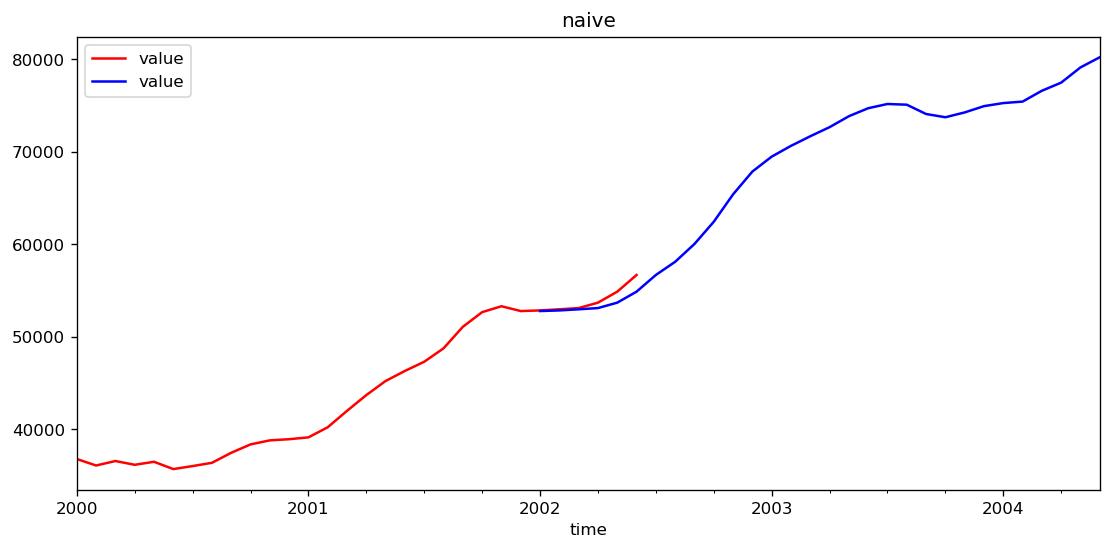

In [46]:
naive = df_2558.shift(1)
fig, ax = plt.subplots(figsize=(11, 5))
df_2558[0:30].plot(ax=ax, c='r', label='original')
naive[24:54].plot(ax=ax, c='b', label='shifted')
ax.set_title('naive')
ax.legend();
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(df_2558[1:], naive.dropna()))

***

# Iterative Modeling

In [47]:
model = SARIMAX(df_2558, order=(1, 1, 2), seasonal_order =(0, 2, 2, 12),enforce_stationarity=False, 
                                        enforce_invertibility=False) 
model_fit = model.fit()
print(model_fit.summary())

C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              value   No. Observations:                  260
Model:             SARIMAX(1, 1, 2)x(0, 2, 2, 12)   Log Likelihood               -1899.903
Date:                            Fri, 08 Oct 2021   AIC                           3811.807
Time:                                    08:31:49   BIC                           3831.832
Sample:                                01-31-2000   HQIC                          3819.904
                                     - 08-31-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2071      0.059     -3.504      0.000      -0.323      -0.091
ma.L1          0.8823      0.029   

C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


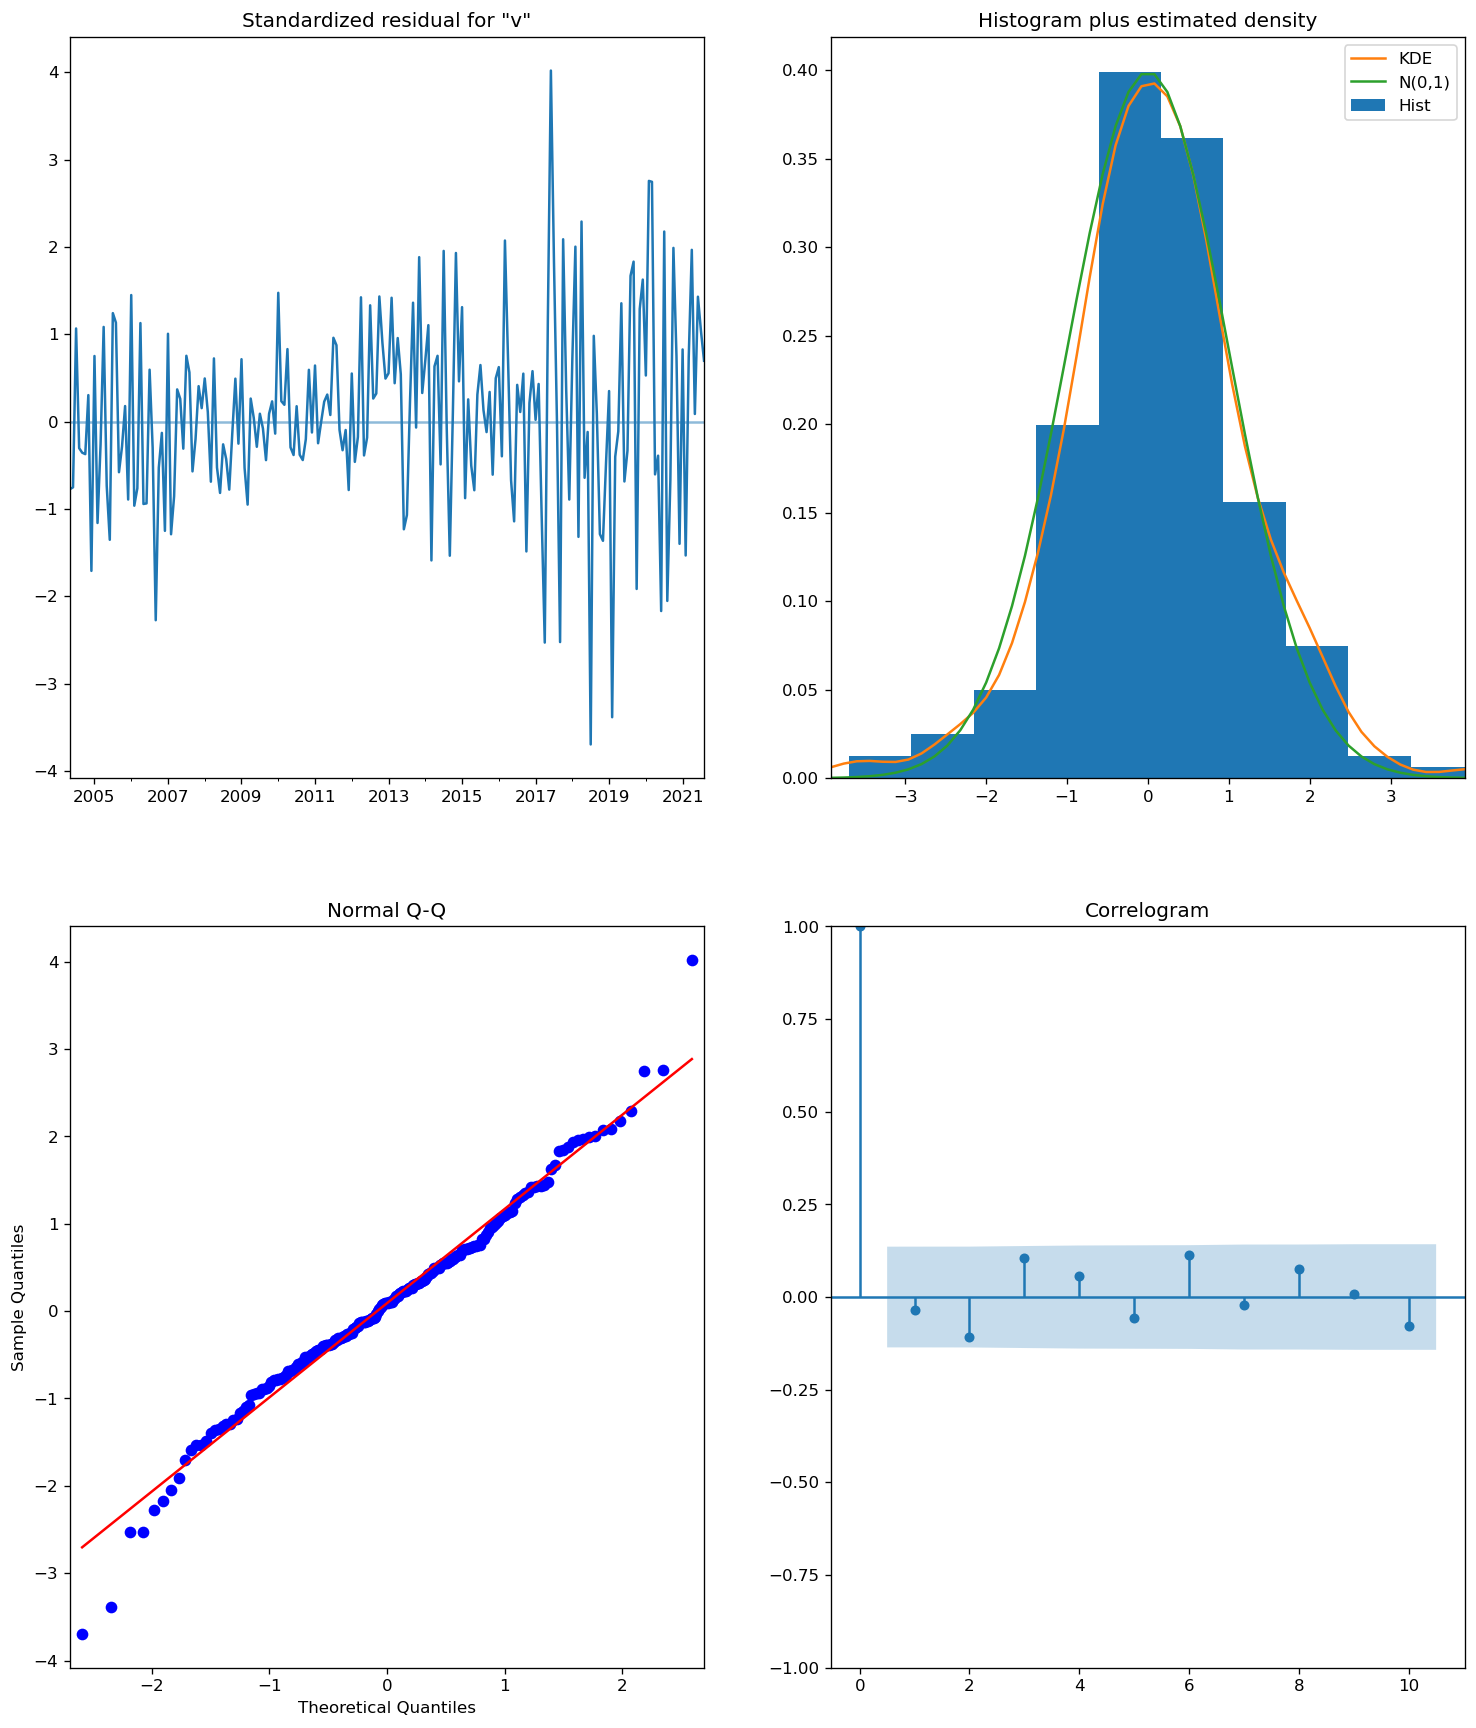

In [48]:
model_fit.plot_diagnostics(figsize=(15, 18))
plt.show()

# Validating the Model
## One-step Ahead Forecasting

In [49]:
pred = model_fit.get_prediction(start=pd.to_datetime('2019-01-31'), dynamic=False)
pred_conf = pred.conf_int()

C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


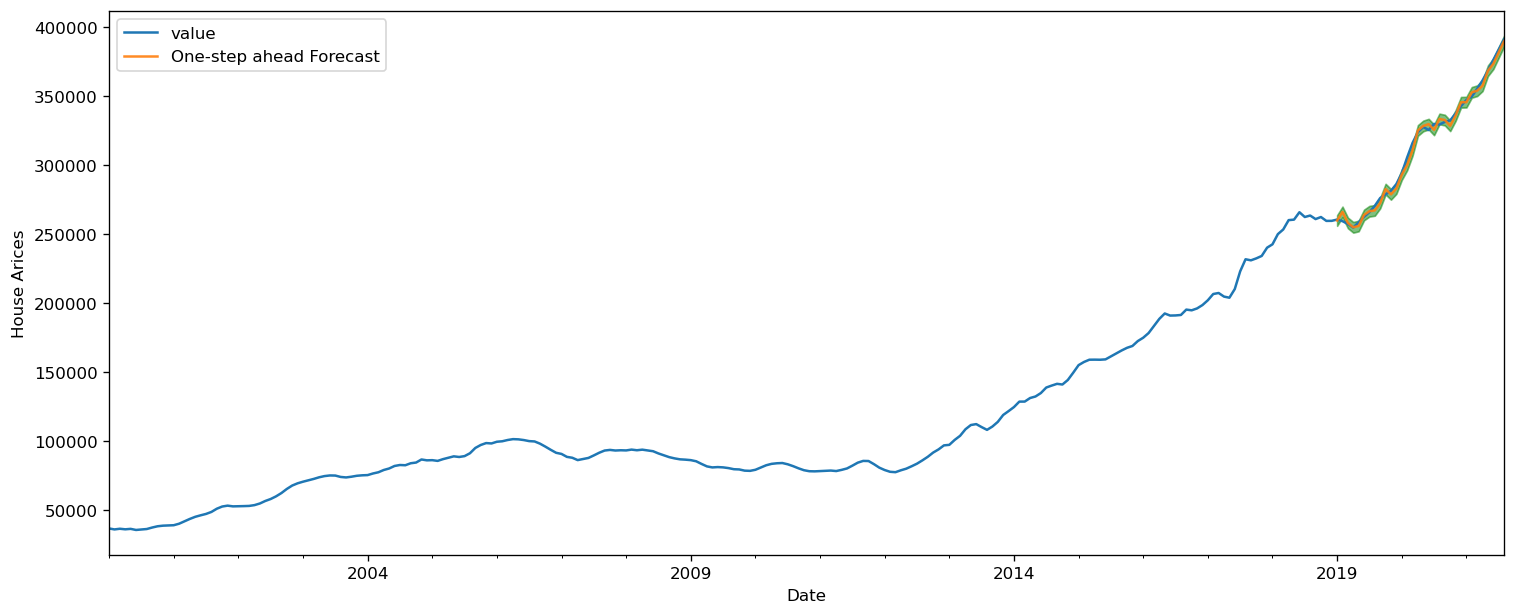

In [50]:

# Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 15, 6

# Plot observed values
ax = df_2558.plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('House Arices')
plt.legend()

plt.show()

In [51]:
df2558_forecasted = pred.predicted_mean
df2558_truth = df_2558['value']['2019-01-31':]

mse = ((df2558_forecasted - df2558_truth) ** 2).mean()
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 3033.73


# Dynamic Forecasting

In [52]:
pred_dynamic = model_fit.get_prediction(start=pd.to_datetime('2019-01-31'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

C:\Users\ronak\Anaconda3\envs\project4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


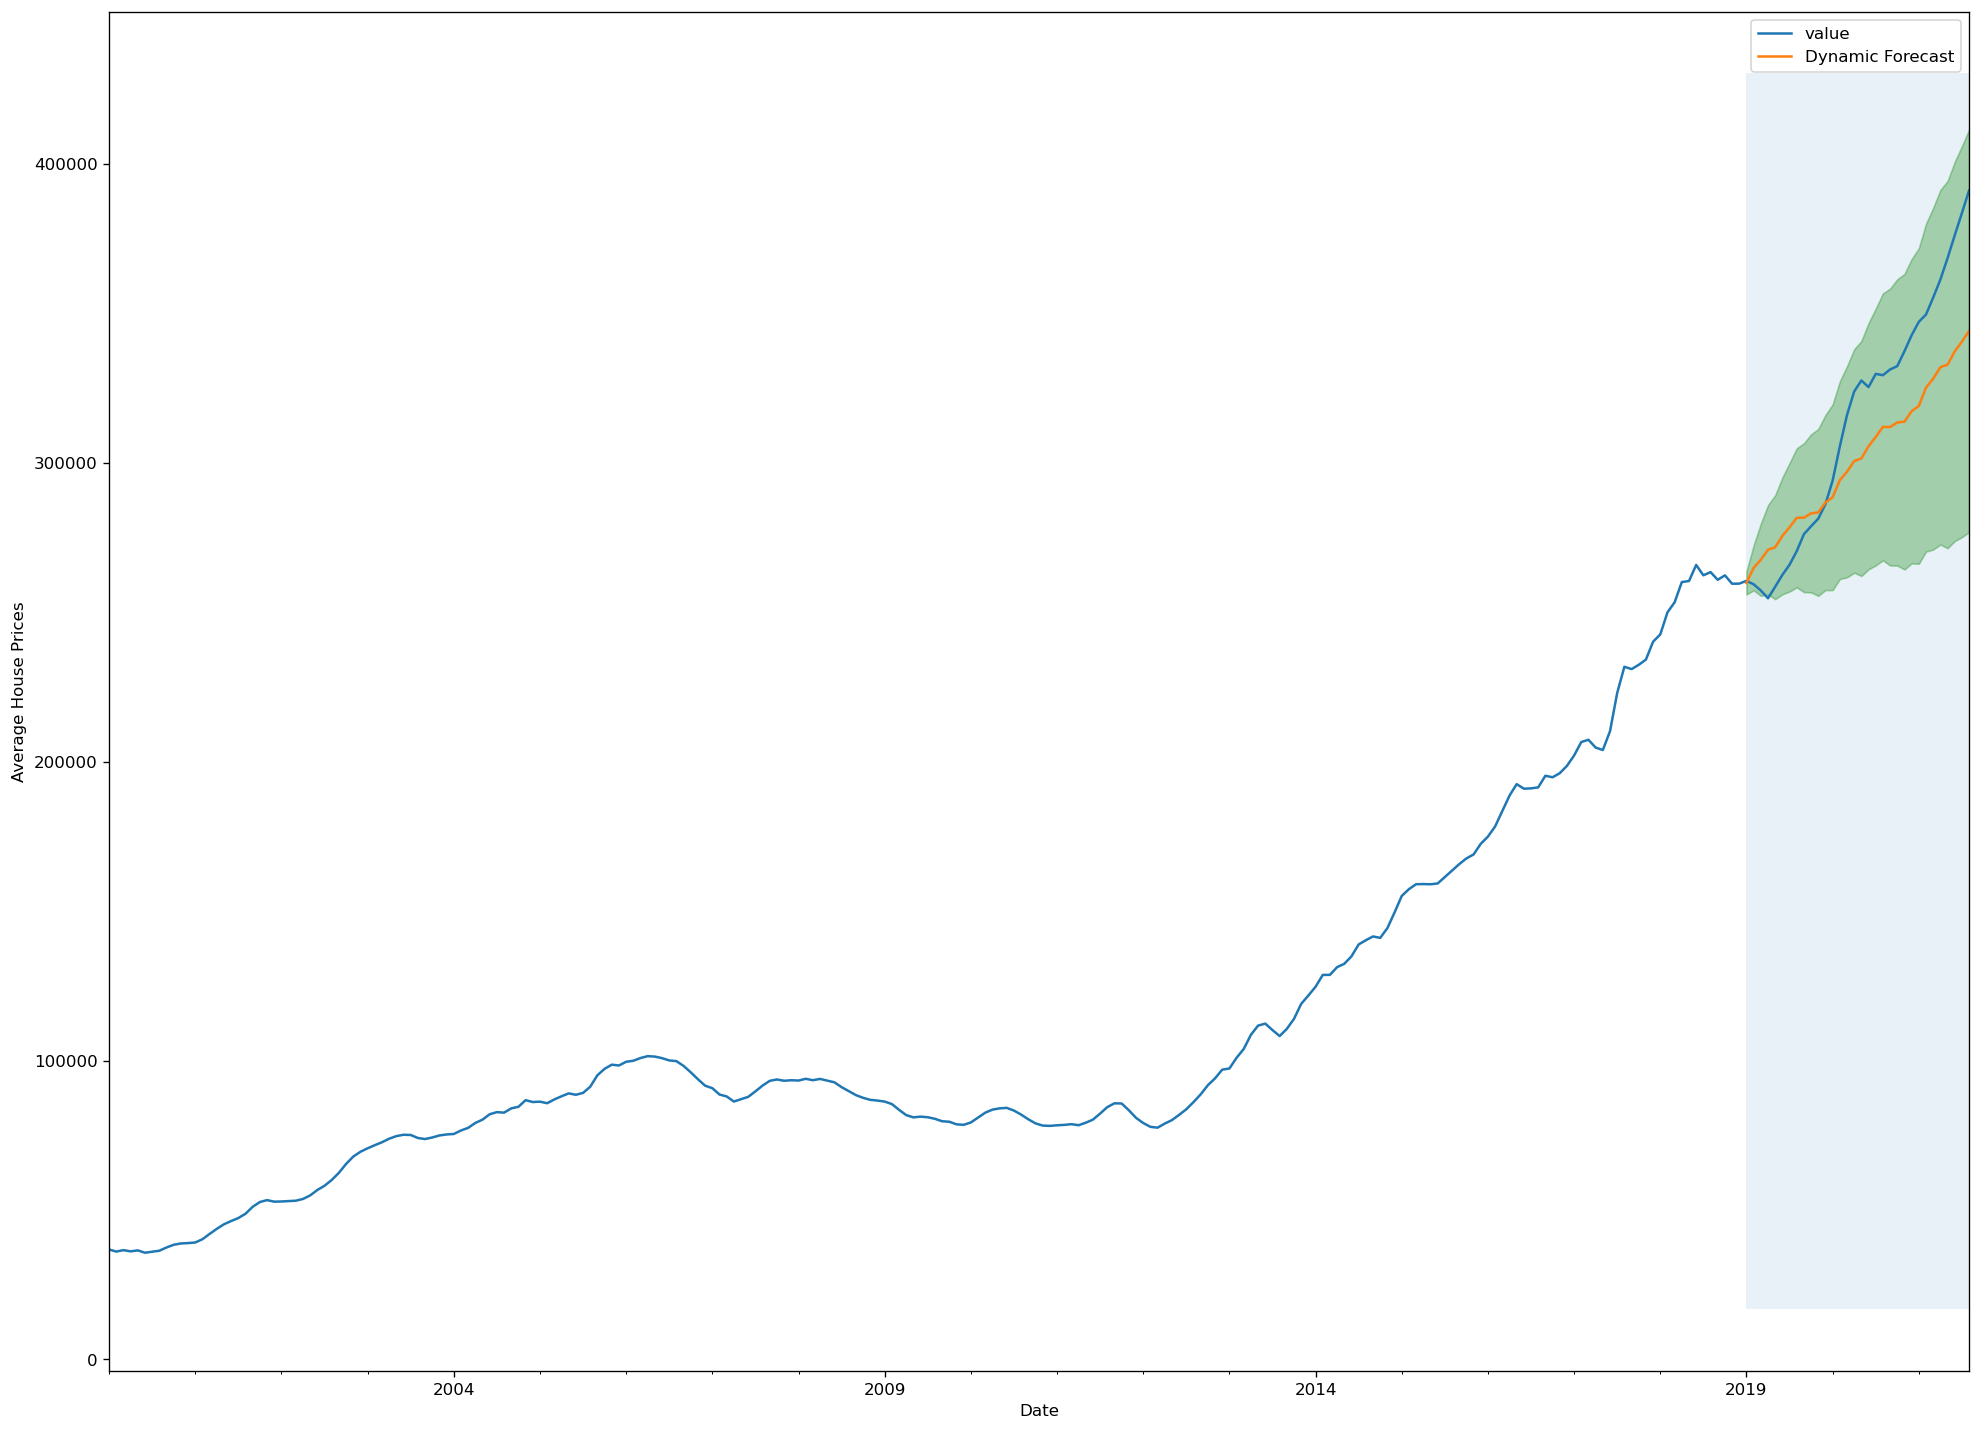

In [53]:

ax = df_2558.plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2019-01-31'), df2558_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Average House Prices')

plt.legend()
plt.show()

In [54]:
df2558_forecasted = pred_dynamic.predicted_mean
df2558_truth = df_2558['value']['2019-01-31':]

mse = ((df2558_forecasted - df2558_truth) ** 2).mean()
print(mse)

491227403.3268068


# Producing and Visualize Forecast

In [55]:
# Get forecast 500 steps ahead in future
prediction = model_fit.get_forecast(steps=100)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

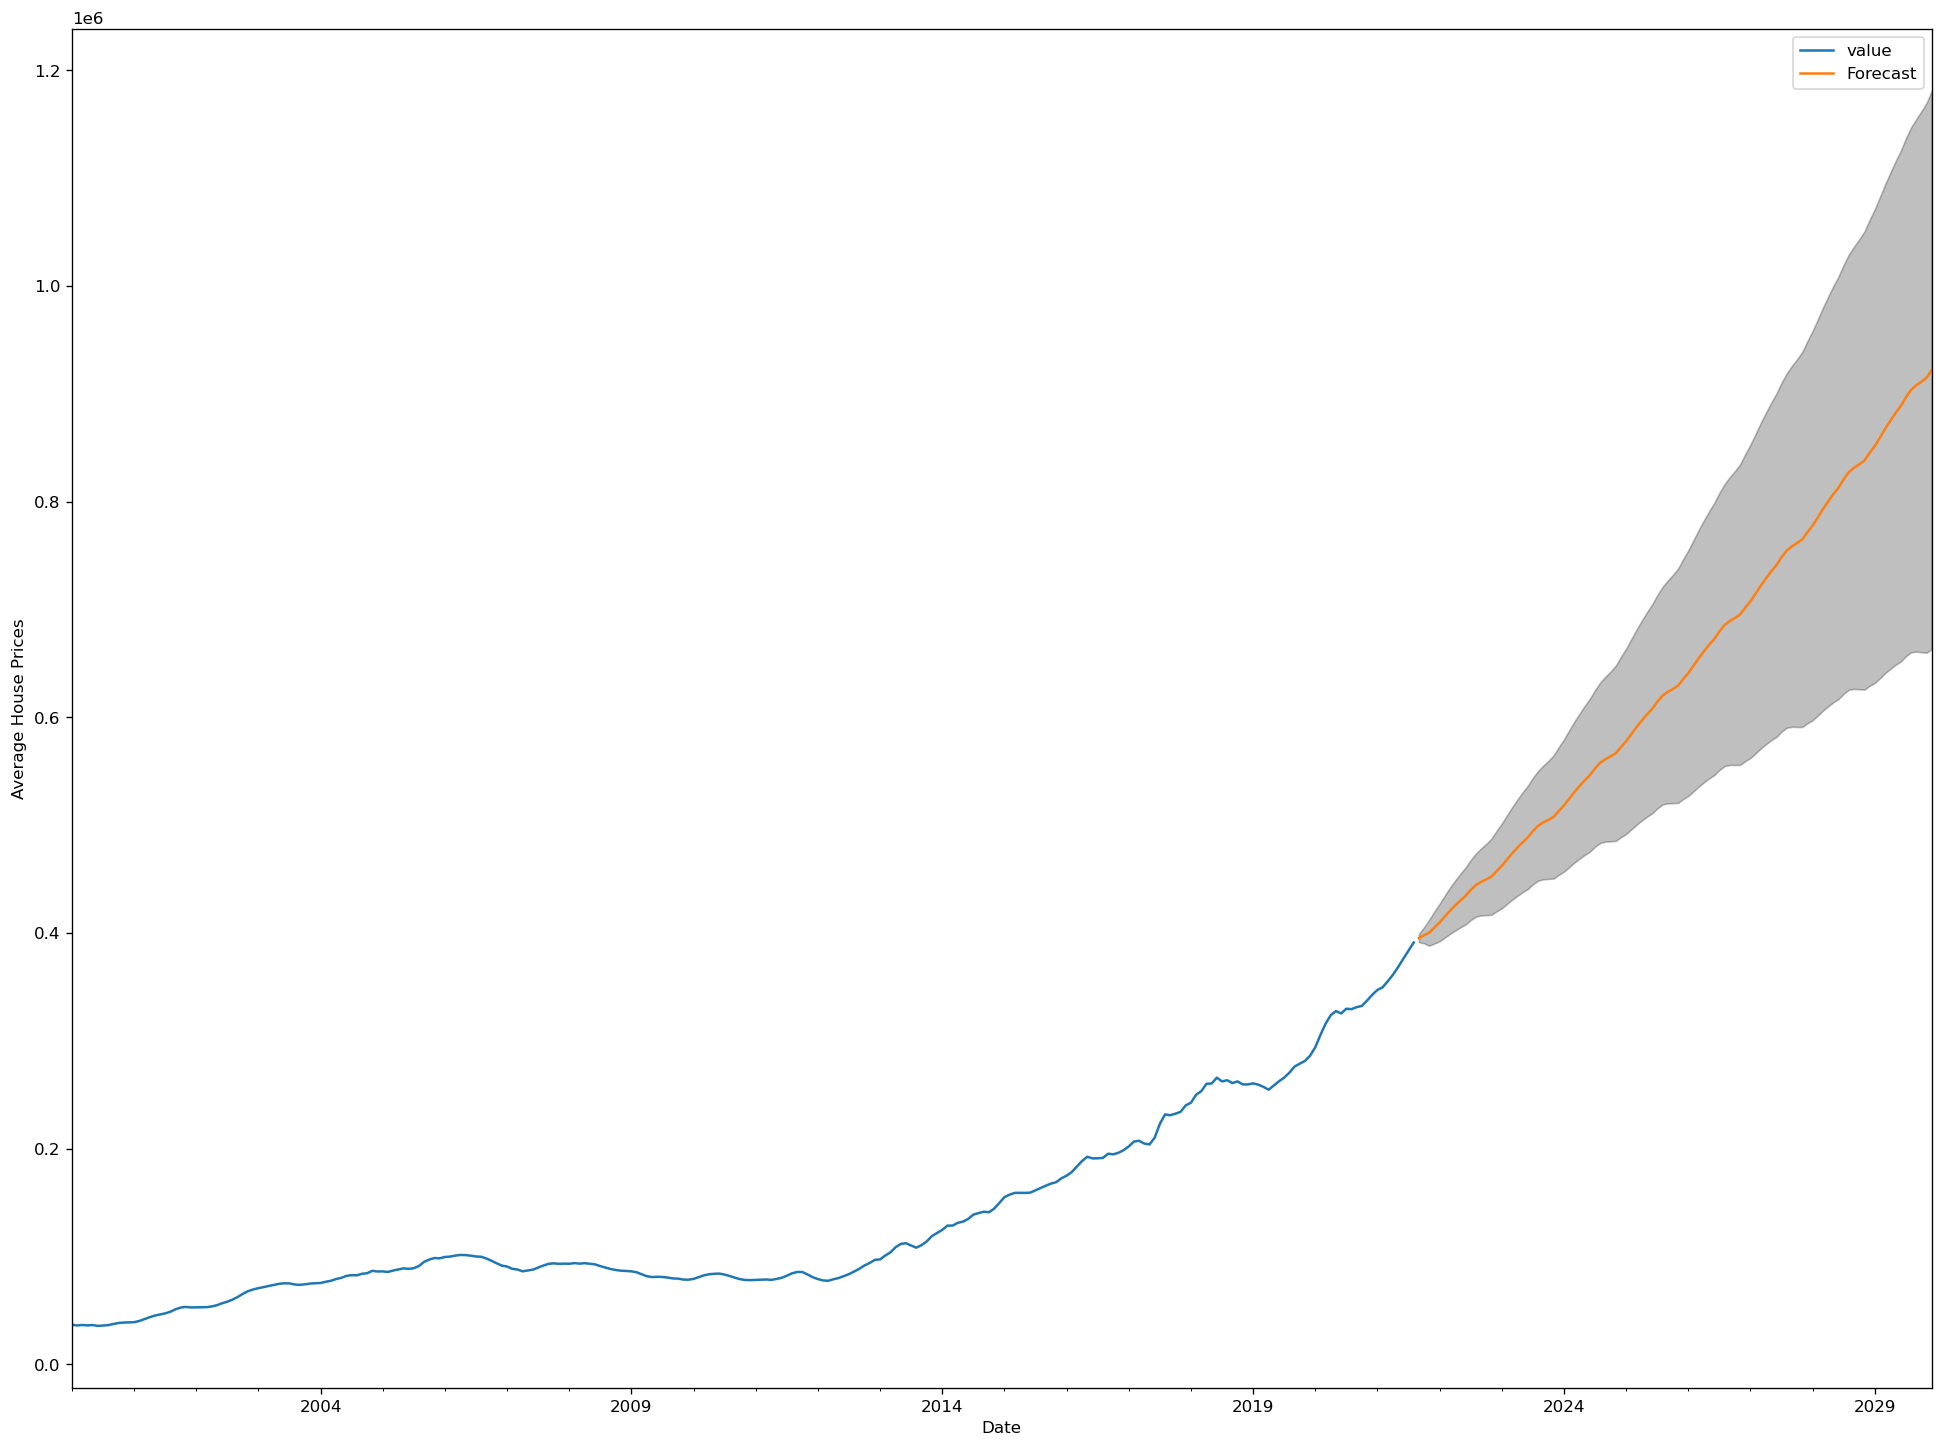

In [56]:
ax = df_2558.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Average House Prices')

plt.legend()
plt.show()